<a href="https://colab.research.google.com/github/jumadi-cloud/PenelitianEnergyConsumption/blob/main/tesis_update(backup).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Chiller Energy Consumption (kWh)

References

[Sulaiman et al](https://www.sciencedirect.com/science/article/abs/pii/S2352710224020436?via%3Dihub)

[Sumber Dataset](https://www.kaggle.com/datasets/chillerenergy/chiller-energy-data)

```
Matriks Evaluasi: RMSE, MAE
Total Dataset: 13615 rows × 10 columns
Variabel atau Features 3
X = variabel input
'Chilled Water Rate (L/sec)',
'Cooling Water Temperature (C)',
'Building Load (RT)'
y = target ['Chiller Energy Consumption (kWh)']
```
```
Sulaiman et al
KAN adalah MAE 4.2745, RMSE: 6.1023
TLBO-DL adalah MAE: 4.5173, RMSE: 6.2892
NN adalah MAE: 5.1049, RMSE: 6.7709


```


# EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/refs/heads/main/Dataset/HVAC%20Energy%20Data.csv')
df.head()

Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0                 8/18/2019 0:00                        85.6   
1                 8/18/2019 0:30                        84.3   
2                 8/18/2019 1:00                        84.6   
3                 8/18/2019 1:30                        84.8   
4                 8/18/2019 2:00                        84.7   

   Cooling Water Temperature (C)  Building Load (RT)  \
0                           31.4               479.6   
1                           31.1               460.3   
2                           31.3               462.4   
3                           31.4               458.5   
4                           31.4               455.4   

   Chiller Energy Consumption (kWh)  Outside Temperature (F)  Dew Point (F)  \
0                             116.2                       82             75   
1                             114.5                       82             75   
2                             116.8                       82             75   
3                             117.0                       82             75   
4                             117.0                       82             75   

   Humidity (%)  Wind Speed (mph)  Pressure (in)  
0            79                13          29.83  
1            79                12          29.83  
2            79                12          29.83  
3            79                12          29.83  
4            79                12          29.83

In [ ]:
# Tampilkan nama kolom-kolom dalam DataFrame
print(df.columns)

Index(['Local Time (Timezone : GMT+8h)', 'Chilled Water Rate (L/sec)',
       'Cooling Water Temperature (C)', 'Building Load (RT)',
       'Chiller Energy Consumption (kWh)', 'Outside Temperature (F)',
       'Dew Point (F)', 'Humidity (%)', 'Wind Speed (mph)', 'Pressure (in)'],
      dtype='object')


In [ ]:
# Mengubah kolom tanggal menjadi tipe datetime
df['Local Time (Timezone : GMT+8h)'] = pd.to_datetime(df['Local Time (Timezone : GMT+8h)'], format='%m/%d/%Y %H:%M')

In [ ]:
df

Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0                2019-08-18 00:00:00                        85.6   
1                2019-08-18 00:30:00                        84.3   
2                2019-08-18 01:00:00                        84.6   
3                2019-08-18 01:30:00                        84.8   
4                2019-08-18 02:00:00                        84.7   
...                              ...                         ...   
13610            2020-06-01 11:00:00                       108.6   
13611            2020-06-01 11:30:00                       108.9   
13612            2020-06-01 12:00:00                       108.7   
13613            2020-06-01 12:30:00                       108.8   
13614            2020-06-01 13:00:00                       108.7   

       Cooling Water Temperature (C)  Building Load (RT)  \
0                               31.4               479.6   
1                               31.1               460.3   
2                               31.3               462.4   
3                               31.4               458.5   
4                               31.4               455.4   
...                              ...                 ...   
13610                           33.4               579.9   
13611                           33.2               567.3   
13612                           33.0               561.7   
13613                           33.2               566.0   
13614                           33.3               569.7   

       Chiller Energy Consumption (kWh)  Outside Temperature (F)  \
0                                 116.2                       82   
1                                 114.5                       82   
2                                 116.8                       82   
3                                 117.0                       82   
4                                 117.0                       82   
...                                 ...                      ...   
13610                             132.8                       84   
13611                             128.6                       84   
13612                             125.7                       82   
13613                             127.3                       82   
13614                             129.0                       82   

       Dew Point (F)  Humidity (%)  Wind Speed (mph)  Pressure (in)  
0                 75            79                13          29.83  
1                 75            79                12          29.83  
2                 75            79                12          29.83  
3                 75            79                12          29.83  
4                 75            79                12          29.83  
...              ...           ...               ...            ...  
13610             75            74                 5          29.89  
13611             75            74                 6          29.89  
13612             75            79                 6          29.89  
13613             77            84                 3          29.86  
13614             75            79                 5          29.86  

[13615 rows x 10 columns]

In [ ]:
# Mengecek Missing Value
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

Local Time (Timezone : GMT+8h)      0
Chilled Water Rate (L/sec)          0
Cooling Water Temperature (C)       0
Building Load (RT)                  0
Chiller Energy Consumption (kWh)    0
Outside Temperature (F)             0
Dew Point (F)                       0
Humidity (%)                        0
Wind Speed (mph)                    0
Pressure (in)                       0
dtype: int64


In [ ]:
# periksa duplicate value
df.duplicated().sum()

0

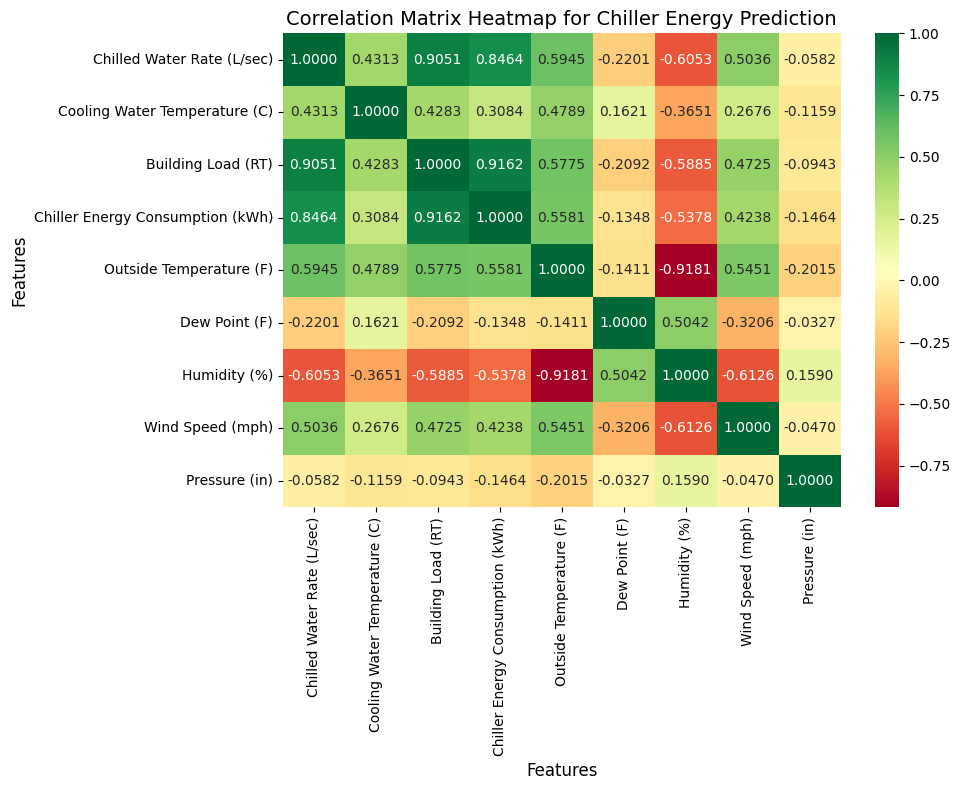

In [ ]:
correlation_matrix = df.drop(columns=['Local Time (Timezone : GMT+8h)']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap="RdYlGn", cbar=True)
plt.title('Correlation Matrix Heatmap for Chiller Energy Prediction', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
df.describe()

Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
count                          13615                13615.000000   
mean   2020-01-09 14:44:46.448769792                   96.740720   
min              2019-08-18 00:00:00                   72.400000   
25%              2019-10-29 11:45:00                   86.900000   
50%              2020-01-09 14:00:00                   94.200000   
75%              2020-03-22 12:15:00                  106.100000   
max              2020-06-01 13:00:00                  141.500000   
std                              NaN                   12.558907   

       Cooling Water Temperature (C)  Building Load (RT)  \
count                   13615.000000        13615.000000   
mean                       31.622277          520.940419   
min                        25.800000           55.100000   
25%                        30.800000          443.500000   
50%                        31.500000          495.600000   
75%                        32.500000          595.000000   
max                        36.200000         1088.400000   
std                         1.253298           96.336004   

       Chiller Energy Consumption (kWh)  Outside Temperature (F)  \
count                      13615.000000             13615.000000   
mean                         126.811605                83.104003   
min                           18.000000                73.000000   
25%                          105.600000                81.000000   
50%                          118.100000                82.000000   
75%                          138.300000                86.000000   
max                          281.200000                93.000000   
std                           30.160350                 3.841550   

       Dew Point (F)  Humidity (%)  Wind Speed (mph)  Pressure (in)  
count   13615.000000  13615.000000      13615.000000   13615.000000  
mean       74.990892     77.846272          6.306794      29.808199  
min        59.000000     34.000000          0.000000      29.620000  
25%        73.000000     70.000000          3.000000      29.770000  
50%        75.000000     79.000000          6.000000      29.800000  
75%        77.000000     84.000000          9.000000      29.830000  
max        81.000000    100.000000         21.000000      29.950000  
std         1.889539     11.050784          3.742418       0.051419

In [ ]:
df.drop(['Chiller Energy Consumption (kWh)',
         'Cooling Water Temperature (C)',
         'Wind Speed (mph)',
         'Pressure (in)'], axis=1, inplace=True)

In [ ]:
# Untuk save dataset yang sudah fiks
df
df.to_csv('/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv', index=False)

# Percobaan 1

fokus ke Learning Rate dan Jumlah Hidden Layer

In [ ]:
# Mengimpor modul untuk mengakses operasi sistem seperti mengelola file dan waktu.
import os
import time

# Mengimpor pustaka NumPy untuk komputasi numerik yang efisien.
import numpy as np

# Mengimpor pustaka Pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data, khususnya plot 2D.
import matplotlib.pyplot as plt

# Mengimpor pustaka PyTorch untuk pembuatan model deep learning.
import torch
import torch.nn as nn  # Modul PyTorch untuk membuat lapisan jaringan saraf.
from torch.utils.data import TensorDataset, DataLoader  # Modul untuk mengelola dataset dan batch data.
import torch.nn.functional as F  # Fungsi aktivasi dan fungsi lainnya yang umum digunakan pada jaringan saraf.

# Mengimpor modul untuk operasi matematika umum.
import math

# Mengimpor fungsi tqdm_notebook untuk menampilkan progress bar di Jupyter Notebook.
from tqdm.notebook import tqdm as tqdm_notebook

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi data.
from sklearn.preprocessing import MinMaxScaler

# Mengimpor modul random
import random


# Tambahkan fungsi `set_seed` untuk konsistensi hasil
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

# Tetapkan seed sebelum melanjutkan
set_seed(42)

In [ ]:
# Opsional proses ini bisa diskip

print(torch.__version__)  # Mencetak versi PyTorch yang digunakan.

2.5.1+cu121


In [ ]:
# Menentukan jalur direktori tempat file data berada.
data_dir = "/content/drive/MyDrive/Tesis/Dataset HVAC"  # Path ke direktori data di Google Colab atau lokal.

# Membaca file CSV yang berisi dataset ke dalam DataFrame menggunakan Pandas.
df = pd.read_csv("/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data.
df.head()


Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Building Load (RT)  Outside Temperature (F)  Dew Point (F)  Humidity (%)  
0               479.6                       82             75            79  
1               460.3                       82             75            79  
2               462.4                       82             75            79  
3               458.5                       82             75            79  
4               455.4                       82             75            79

In [ ]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index):
    """
    Fungsi untuk membentuk input dan label dengan jendela geser pada data time series.

    Parameters:
    - data: array numpy yang berisi data.
    - window_size: ukuran jendela (jumlah timestamp dalam setiap input).
    - inputs_cols_indices: indeks kolom yang ingin dimasukkan sebagai fitur input.
    - label_col_index: indeks kolom yang digunakan sebagai label output.

    Returns:
    - inputs: array numpy yang berisi input sequences berdasarkan jendela geser.
    - labels: array numpy yang berisi label untuk setiap sequence.
    """

    # Membuat array kosong untuk menyimpan input sequences dan label.
    # `inputs` akan memiliki dimensi (jumlah_instance, panjang_jendela, jumlah_fitur)
    inputs = np.zeros((len(data) - window_size, window_size, len(inputs_cols_indices)))
    # `labels` adalah array 1D yang akan menampung label untuk setiap sequence.
    labels = np.zeros(len(data) - window_size)

    # Iterasi melalui data untuk membentuk sequence input dan label
    for i in range(window_size, len(data)):
        # Mengambil data dalam jendela dan menambahkannya ke `inputs`
        inputs[i - window_size] = data[i - window_size : i, inputs_cols_indices]
        # Menetapkan nilai label dari kolom yang diinginkan
        labels[i - window_size] = data[i, label_col_index]

    # Mereshape `inputs` dan `labels` ke bentuk yang sesuai untuk model
    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)

    # Menampilkan bentuk (shape) dari `inputs` dan `labels` untuk verifikasi
    print(inputs.shape, labels.shape)

    return inputs, labels


In [ ]:
# Menetapkan indeks kolom label sebagai 0, yaitu kolom 'consumption' yang akan diprediksi.
label_col_index = 0  # Menggunakan 'consumption' sebagai label target.

# Menetapkan indeks kolom yang akan digunakan sebagai fitur input.
# Fitur yang dipilih adalah (consumption, hour, dayofweek, month, dayofyear).
inputs_cols_indices = range(5)  # Menggunakan kolom-kolom fitur dari indeks 0 hingga 4.

# Menetapkan ukuran jendela (window size) untuk mengatur panjang setiap sequence.
window_size = 90  # Panjang urutan yang akan dimasukkan sebagai input dalam model.

# Membuat dictionary untuk menyimpan objek scaler yang akan digunakan pada data label.
# Ini memungkinkan kita untuk melakukan normalisasi pada data pelatihan, dan nantinya mengembalikan data
# hasil prediksi dari model ke skala aslinya pada tahap evaluasi.
label_scalers = {}

# Inisialisasi list kosong untuk menampung data input pelatihan.
train_x = []

# Inisialisasi dictionary kosong untuk menampung data input dan label pengujian.
# Dictionary `test_x` akan menyimpan input pengujian, dan `test_y` untuk label pengujian.
test_x = {}
test_y = {}


In [ ]:
# Memilih file .csv dari direktori data dan menyimpannya ke dalam `processing_files`.
processing_files = [
    file for file in os.listdir(data_dir) if os.path.splitext(file)[1] == ".csv"
]

# Menentukan jumlah file yang akan digunakan untuk dataset
num_files_for_dataset = 5

# Memproses setiap file dalam daftar `processing_files` hingga jumlah yang ditentukan
for file in tqdm_notebook(processing_files[:num_files_for_dataset]):
    print(f"Processing {file} ...")

    # Membaca file .csv ke dalam DataFrame Pandas dan mengonversi kolom 'Tanggal' menjadi tipe tanggal
    df = pd.read_csv(os.path.join(data_dir, file), parse_dates=["Local Time (Timezone : GMT+8h)"])

    # Preprocessing
    # df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')  # Mengonversi kolom tanggal ke format datetime
    # df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year  # Menambahkan kolom 'Year' berdasarkan kolom 'Tanggal'
    # df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month  # Menambahkan kolom 'Month' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day  # Menambahkan kolom 'Day' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
    df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
    df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day
    df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour
    df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
    df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    # Normalisasi data input
    sc = MinMaxScaler()  # Inisialisasi scaler untuk input
    label_sc = MinMaxScaler()  # Inisialisasi scaler untuk label
    data = sc.fit_transform(df.values)  # Normalisasi data menggunakan MinMaxScaler

    # Menyimpan scaler untuk label agar bisa digunakan untuk mengembalikan nilai prediksi ke skala asli saat evaluasi
    label_sc.fit(df.iloc[:, label_col_index].values.reshape(-1, 1))
    label_scalers[file] = label_sc  # Menyimpan scaler label dalam dictionary

    # Membuat urutan input dan label menggunakan fungsi move_sliding_window
    inputs, labels = move_sliding_window(
        data,
        window_size,
        inputs_cols_indices=inputs_cols_indices,
        label_col_index=label_col_index,
    )

    # Menggabungkan instance yang dihasilkan dari semua file .csv.
    # Membagi data menjadi bagian pelatihan dan pengujian, lalu menggabungkannya ke dalam array tunggal.
    test_portion = int(0.1 * len(inputs))  # Menentukan bagian data untuk pengujian (10%)
    if len(train_x) == 0:  # Jika ini iterasi pertama
        train_x = inputs[:-test_portion]  # Menyimpan data pelatihan input
        train_y = labels[:-test_portion]  # Menyimpan data pelatihan label
    else:
        # Menggabungkan data pelatihan dari file saat ini dengan data pelatihan sebelumnya
        train_x = np.concatenate((train_x, inputs[:-test_portion]))
        train_y = np.concatenate((train_y, labels[:-test_portion]))

    # Menyimpan data pengujian untuk setiap file dalam dictionary `test_x` dan `test_y`
    test_x[file] = inputs[-test_portion:]
    test_y[file] = labels[-test_portion:]


  0%|          | 0/1 [00:00<?, ?it/s]

Processing Dataset HVAC System Energy.csv ...
(13525, 90, 5) (13525, 1)


In [ ]:
df

Chilled Water Rate (L/sec)  Building Load (RT)  \
0                            85.6               479.6   
1                            84.3               460.3   
2                            84.6               462.4   
3                            84.8               458.5   
4                            84.7               455.4   
...                           ...                 ...   
13610                       108.6               579.9   
13611                       108.9               567.3   
13612                       108.7               561.7   
13613                       108.8               566.0   
13614                       108.7               569.7   

       Outside Temperature (F)  Dew Point (F)  Humidity (%)  Year  Month  Day  \
0                           82             75            79  2019      8   18   
1                           82             75            79  2019      8   18   
2                           82             75            79  2019      8   18   
3                           82             75            79  2019      8   18   
4                           82             75            79  2019      8   18   
...                        ...            ...           ...   ...    ...  ...   
13610                       84             75            74  2020      6    1   
13611                       84             75            74  2020      6    1   
13612                       82             75            79  2020      6    1   
13613                       82             77            84  2020      6    1   
13614                       82             75            79  2020      6    1   

       Hour  DayOfWeek  
0         0          6  
1         0          6  
2         1          6  
3         1          6  
4         2          6  
...     ...        ...  
13610    11          0  
13611    11          0  
13612    12          0  
13613    12          0  
13614    13          0  

[13615 rows x 10 columns]

In [ ]:
# Memeriksa bentuk (shape) dari data pelatihan dan data pengujian.
# Menggunakan nama file "dataset_clean_baru.csv" sebagai kunci untuk test_x.
train_x.shape, test_x["Dataset HVAC System Energy.csv"].shape

((12173, 90, 5), (1352, 90, 5))

In [ ]:
# Menetapkan ukuran batch untuk pemrosesan dalam model.
batch_size = 100

# Membuat TensorDataset dari data pelatihan, mengonversi `train_x` dan `train_y` menjadi tensor PyTorch.
# `train_x` berisi fitur-fitur input, dan `train_y` berisi label target.
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# Membuat DataLoader untuk memuat data secara batch dengan parameter berikut:
# - `shuffle=True`: Mengacak urutan data di setiap epoch untuk meningkatkan generalisasi model.
# - `batch_size=batch_size`: Mengatur ukuran batch menjadi 100.
# - `drop_last=True`: Mengabaikan batch terakhir jika ukurannya tidak sesuai dengan `batch_size`,
#   memastikan semua batch memiliki ukuran yang sama.
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=True
)


In [ ]:
# Mencetak ukuran data pelatihan, ukuran batch, dan jumlah iterasi per epoch.
print(
    f"Train Size: {train_x.shape}, Batch Size: {batch_size}, # of iterations per epoch: {int(train_x.shape[0] / batch_size)}"
)


Train Size: (12173, 90, 5), Batch Size: 100, # of iterations per epoch: 121


In [ ]:
# Membebaskan memori dengan menghapus variabel `train_x` dan `train_y`.
del train_x, train_y


In [ ]:
# Memeriksa ketersediaan GPU.
# Jika GPU tersedia, `torch.cuda.is_available()` akan mengembalikan True, jika tidak akan mengembalikan False.
is_cuda = torch.cuda.is_available()

# Menetapkan device yang akan digunakan untuk menjalankan model berdasarkan ketersediaan GPU.
if is_cuda:
    device = torch.device("cuda")  # Mengatur device ke GPU
    print("GPU is available")       # Mencetak pesan jika GPU tersedia
else:
    device = torch.device("cpu")    # Mengatur device ke CPU jika GPU tidak tersedia


In [ ]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        # Menyimpan parameter input dan output
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        # Membuat grid untuk basis fungsi B-spline
        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        # Membuat bobot untuk komponen linier dasar dan komponen spline
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        # Mengatur parameter skala dan aktivasi untuk spline
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        # Menginisialisasi parameter
        self.reset_parameters()

    def reset_parameters(self):
        # Menginisialisasi bobot linier dasar dan bobot spline dengan kaiming_uniform
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 0.5) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        # Menghitung basis fungsi B-spline
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        # Menyelesaikan koefisien spline dari titik input
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        # Mengatur skala bobot spline
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        # Fungsi forward untuk lapisan KANLinear
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        # Memperbarui grid spline adaptif berdasarkan input x
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        # Menghitung kehilangan regulasi berdasarkan aktivasi dan entropi
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.1):
        super(GRUNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Mendefinisikan lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output GRU ke dimensi output yang diinginkan
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Melakukan forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output pada timestep terakhir dan meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output akhir dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

# 2. GRUNetKAN
# Mirip dengan GRUNet, tetapi menggantikan lapisan linier dengan KANLinear untuk menambah fleksibilitas.
class GRUNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.1):
        super(GRUNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.1):
        super(LSTMNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output dari LSTM ke dimensi output
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

# LSTMNetKAN
# Mirip dengan LSTMNet, tetapi menggantikan lapisan linier dengan KANLinear untuk mengembangkan fleksibilitas dan kemampuan representasi.
class LSTMNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.1):
        super(LSTMNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden


In [ ]:
def train(
    train_loader,
    learn_rate,
    hidden_dim=100,
    n_layers=2,
    n_epochs=10,
    model_type="GRU",
    print_every=100,
):
    # Mengambil dimensi input dari train_loader
    input_dim = next(iter(train_loader))[0].shape[2]  # 5
    output_dim = 1  # Definisi dimensi output

    # Inisialisasi model sesuai jenisnya
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "GRUKAN":
        model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)  # Pindahkan model ke perangkat

    # Definisi loss function dan optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # Memulai proses training
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []

    # Loop melalui jumlah epoch
    for epoch in range(1, n_epochs + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.0
        counter = 0

        # Iterasi melalui batch data
        for x, label in train_loader:
            counter += 1

            # Reset hidden state sesuai model yang digunakan
            if model_type == "GRU" or model_type == "GRUKAN":
                h = h.data
            elif model_type == "LSTM" or model_type == "LSTMKAN":
                h = tuple([e.data for e in h])

            model.zero_grad()  # Reset gradien

            # Forward pass
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())

            # Backpropagation dan optimisasi
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Menambahkan loss untuk perhitungan rata-rata
            if counter % print_every == 0:
                print(
                    f"Epoch {epoch} - Step: {counter}/{len(train_loader)} - Average Loss for Epoch: {avg_loss/counter}"
                )

        current_time = time.process_time()
        print(
            f"Epoch {epoch}/{n_epochs} Done, Total Loss: {avg_loss/len(train_loader)}"
        )
        print(f"Time Elapsed for Epoch: {current_time-start_time} seconds")
        epoch_times.append(current_time - start_time)

    # Menghitung total waktu pelatihan
    print(f"Total Training Time: {sum(epoch_times)} seconds")
    return model


In [ ]:
# Tetapkan seed
set_seed(42)

# Parameter pelatihan
seq_len = 90  # Panjang sequence atau jumlah timestamps
n_hidden = 100  # Ukuran hidden layer
n_layers = 2  # Jumlah lapisan RNN
n_epochs = 10  # Jumlah epoch
print_every = 100  # Frekuensi menampilkan loss
lr = 0.001  # Learning rate

# Memanggil fungsi train untuk melatih model GRU
gru_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch
    model_type="GRU",    # Tipe model (di sini menggunakan GRU)
    print_every=print_every # Frekuensi print loss selama pelatihan
)


Starting Training of GRU model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.0279485366307199
Epoch 1/10 Done, Total Loss: 0.024444223920360577
Time Elapsed for Epoch: 47.814079627999995 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007319123360794037
Epoch 2/10 Done, Total Loss: 0.007153049007458381
Time Elapsed for Epoch: 47.67855494 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006568423879798502
Epoch 3/10 Done, Total Loss: 0.006681565378122955
Time Elapsed for Epoch: 47.23982073099998 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006278406251221895
Epoch 4/10 Done, Total Loss: 0.006244353574800713
Time Elapsed for Epoch: 36.809332323999996 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.006205340542364866
Epoch 5/10 Done, Total Loss: 0.006273280544406619
Time Elapsed for Epoch: 34.64395312900001 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006104488638229668
Epoch 6/10 Done, Total Loss: 0.006053137873907473

In [ ]:
# Menyimpan parameter model yang sudah dilatih ke file
torch.save(gru_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRU1.pth')


In [ ]:
# melatih model dengan tipe GRUKAN
# Parameter seq_len (sequence length) untuk model, yaitu jumlah timestamps
seq_len = 90

# Memanggil fungsi train untuk melatih model GRUKAN
gru_kan_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch untuk pelatihan
    model_type="GRUKAN", # Tipe model (di sini menggunakan GRUKAN)
    print_every=print_every # Frekuensi menampilkan loss selama pelatihan
)


Starting Training of GRUKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.026392631540074943
Epoch 1/10 Done, Total Loss: 0.023052587866598417
Time Elapsed for Epoch: 50.224985077999975 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007601404639426618
Epoch 2/10 Done, Total Loss: 0.007541871974090776
Time Elapsed for Epoch: 50.93620537299995 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006751192195806653
Epoch 3/10 Done, Total Loss: 0.0067285707678399545
Time Elapsed for Epoch: 40.97088472600001 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006379139036871493
Epoch 4/10 Done, Total Loss: 0.0063296692034091094
Time Elapsed for Epoch: 37.83733430699999 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.006140090825501829
Epoch 5/10 Done, Total Loss: 0.006164128982562049
Time Elapsed for Epoch: 37.56040559600001 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006148084686137736
Epoch 6/10 Done, Total Loss: 0.006175

In [ ]:
# Menyimpan parameter model GRUKAN yang telah dilatih ke dalam file
torch.save(gru_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRUkan1.pth')


In [ ]:
lstm_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTM",
    print_every=print_every,
)

Starting Training of LSTM model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.0330707920063287
Epoch 1/10 Done, Total Loss: 0.029302788598170457
Time Elapsed for Epoch: 60.822999849999974 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.009462669934146106
Epoch 2/10 Done, Total Loss: 0.009164611073903555
Time Elapsed for Epoch: 60.700261742000066 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.00788830165285617
Epoch 3/10 Done, Total Loss: 0.0075301489126984
Time Elapsed for Epoch: 49.75841836899997 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.0067665532766841355
Epoch 4/10 Done, Total Loss: 0.006591164364579542
Time Elapsed for Epoch: 48.568580060000045 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.006337224864400923
Epoch 5/10 Done, Total Loss: 0.006324841850629646
Time Elapsed for Epoch: 47.388311192999936 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006133624368812889
Epoch 6/10 Done, Total Loss: 0.00606178726

In [ ]:
torch.save(lstm_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm1.pth')

In [ ]:
lstm_kan_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTMKAN",
    print_every=print_every,
)

Starting Training of LSTMKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.03352681459859014
Epoch 1/10 Done, Total Loss: 0.029832571891159558
Time Elapsed for Epoch: 50.08155557600003 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.010508919567801058
Epoch 2/10 Done, Total Loss: 0.010037621810324183
Time Elapsed for Epoch: 55.2932946630001 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.008204439140390605
Epoch 3/10 Done, Total Loss: 0.008028183211303077
Time Elapsed for Epoch: 52.42201936300012 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.007277702179271728
Epoch 4/10 Done, Total Loss: 0.0071002315568222
Time Elapsed for Epoch: 49.771611784000015 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.0062885097903199495
Epoch 5/10 Done, Total Loss: 0.0063875913061971264
Time Elapsed for Epoch: 49.29086048199997 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006018015949521214
Epoch 6/10 Done, Total Loss: 0.005990556

In [ ]:
torch.save(lstm_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm_kan1.pth')

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# move device to cpu for evaluation to avoid GPU memory run
device = "cpu"

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
gru_model2 = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU1.pth"))

<ipython-input-38-1856c1236ed0>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU1.pth"))


<All keys matched successfully>

In [ ]:
device = "cpu"
gru_model.to(device)

GRUNet(
  (gru): GRU(5, 100, num_layers=2, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
gru_kan_model2 = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan1.pth"))

<ipython-input-40-97080c509ac7>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan1.

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_kan_model2.to(device)

GRUNetKAN(
  (gru): GRU(5, 100, num_layers=2, batch_first=True, dropout=0.1)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
lstm_model2 = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm1.pth"))

<ipython-input-42-22b0a2785ace>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm1.pth")

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_model2.to(device)

LSTMNet(
  (lstm): LSTM(5, 100, num_layers=2, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
lstm_kan_model2 = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_kan1.pth"))

<ipython-input-44-3d734d6ca354>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_ka

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_kan_model2.to(device)

LSTMNetKAN(
  (lstm): LSTM(5, 100, num_layers=2, batch_first=True, dropout=0.1)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
def sMAPE(outputs, targets):
    sMAPE = (
        100
        / len(targets)
        * np.sum(np.abs(outputs - targets) / (np.abs(outputs + targets)) / 2)
    )
    return sMAPE

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate(model, test_x, test_y, label_scalers):
    model.to(device)
    outputs = []
    targets = []
    start_time = time.process_time()
    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    print(f"Evaluation Time: {time.process_time()-start_time}")
    print(f"sMAPE: {round(sMAPE(concatenated_outputs, concatenated_targets), 3)}%")

    # list of of targets/outputs for each state
    return outputs, targets, sMAPE

In [ ]:
# Evaluate Performance GRU with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    # Move the model to the device before the loop
    model.to(device)
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

Evaluation Time: 2.174260375999893
MAE: 2.782
RMSE: 4.612
R²: 0.779


In [ ]:
# ipython-input-196-53ac28a8cb99
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

# Since you want to calculate sMAPE for the GRU model, you can call the sMAPE function separately:
gru_sMAPE = sMAPE(np.concatenate(gru_outputs), np.concatenate(targets))
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 1.8142901280000387
MAE: 2.782
RMSE: 4.612
R²: 0.779
GRU sMAPE: 0.721%


In [ ]:
#Evaluate Performance GRUKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 1.6550662249999277
MAE: 2.782
RMSE: 4.612
R²: 0.779
GRU sMAPE: 0.721%


In [ ]:
# Evaluate Performance LSTM with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTM sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 1.6170778460000292
MAE: 2.782
RMSE: 4.612
R²: 0.779
LSTM sMAPE: 0.721%


In [ ]:
# Evaluate Performance LSTMKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def calculate_mae(outputs, targets): # Renamed to avoid conflict
    return np.mean(np.abs(outputs - targets))

def calculate_rmse(outputs, targets): # Renamed to avoid conflict
    return np.sqrt(np.mean((outputs - targets) ** 2))

def calculate_r2(outputs, targets): # Renamed to avoid conflict
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2 using the renamed functions
    mae_value = calculate_mae(concatenated_outputs, concatenated_targets)
    rmse_value = calculate_rmse(concatenated_outputs, concatenated_targets)
    r2_value = calculate_r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTMKAN sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 1.7269563180000205
MAE: 2.782
RMSE: 4.612
R²: 0.779
LSTMKAN sMAPE: 0.721%


In [ ]:
states_list = list(test_x.keys())

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung akurasi dalam bentuk persentase
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Hitung MAPE
    accuracy = 100 - (mape * 100)  # Akurasi sebagai 100% - MAPE
    return accuracy

print("\nEksperimen 1")
# Evaluate GRU model
print("\nEvaluate Model GRU:")
gru_outputs, gru_targets, _, _, _ = evaluate(gru_model, test_x, test_y, label_scalers)
gru_accuracy = calculate_accuracy(gru_targets, gru_outputs)
print(f"GRU Accuracy: {gru_accuracy:.2f}%")

# Evaluate GRU-KAN model
print("\nEvaluate Model GRU-KAN:")
gru_kan_outputs, gru_kan_targets, _, _, _ = evaluate(gru_kan_model, test_x, test_y, label_scalers)
gru_kan_accuracy = calculate_accuracy(gru_kan_targets, gru_kan_outputs)
print(f"GRU-KAN Accuracy: {gru_kan_accuracy:.2f}%")

# Evaluate LSTM model
print("\nEvaluate Model LSTM:")
lstm_outputs, lstm_targets, _, _, _ = evaluate(lstm_model, test_x, test_y, label_scalers)
lstm_accuracy = calculate_accuracy(lstm_targets, lstm_outputs)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Evaluate LSTM-KAN model
print("\nEvaluate Model LSTM-KAN:")
lstm_kan_outputs, lstm_kan_targets, _, _, _ = evaluate(lstm_kan_model, test_x, test_y, label_scalers)
lstm_kan_accuracy = calculate_accuracy(lstm_kan_targets, lstm_kan_outputs)
print(f"LSTM-KAN Accuracy: {lstm_kan_accuracy:.2f}%")



Eksperimen 1

Evaluate Model GRU:
Evaluation Time: 1.6844780180001635
MAE: 2.782
RMSE: 4.612
R²: 0.779
GRU Accuracy: 97.08%

Evaluate Model GRU-KAN:
Evaluation Time: 1.7051728759997786
MAE: 2.499
RMSE: 4.512
R²: 0.788
GRU-KAN Accuracy: 97.43%

Evaluate Model LSTM:
Evaluation Time: 2.4207501050000246
MAE: 2.866
RMSE: 4.701
R²: 0.77
LSTM Accuracy: 96.99%

Evaluate Model LSTM-KAN:
Evaluation Time: 2.4497999430000164
MAE: 2.706
RMSE: 4.606
R²: 0.779
LSTM-KAN Accuracy: 97.20%


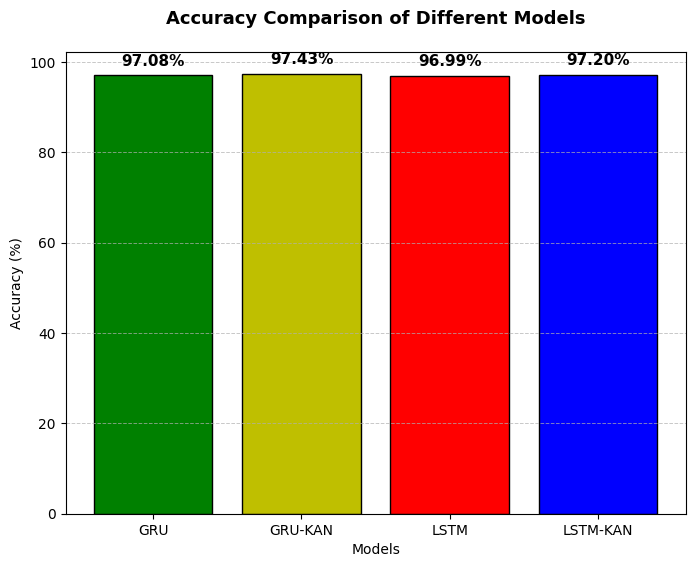

In [ ]:
import matplotlib.pyplot as plt


# Data for plotting (replace with your actual data)
models = ['GRU', 'GRU-KAN', 'LSTM', 'LSTM-KAN']
accuracies = [gru_accuracy, gru_kan_accuracy, lstm_accuracy, lstm_kan_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['g', 'y', 'r', 'b'], edgecolor='black', linewidth=1)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


# Set axis labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Different Models", fontsize=13, fontweight='bold', pad=20)

# # Add value labels on top of each bar
# for bar, accuracy in zip(bars, accuracies):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{accuracy:.2f}%", ha='center', va='bottom')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered alignment
        height + 1.5,  # Position slightly above the bar
        f"{height:.2f}%",  # Display accuracy percentage
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )


# Show the plot
plt.show()

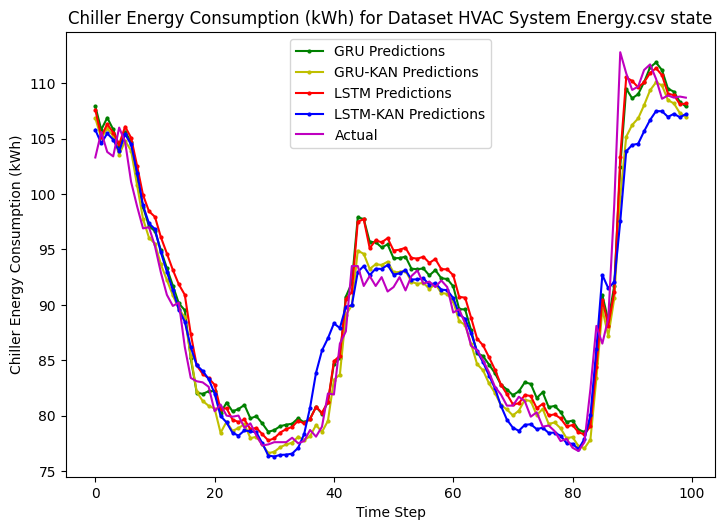

In [ ]:
import matplotlib.pyplot as plt

# Warna yang akan digunakan untuk plot
colors = ["g", "y", "r", "b", "m"]

plt.figure(figsize=(14, 10))

# Assuming all output lists (gru_outputs, gru_kan_outputs, etc.) have the same structure
num_states = len(states_list)  # Assuming states_list contains all desired states

# Loop through states and create subplots
for i in range(min(num_states, 4)):  # Limit to 4 subplots for now
    plt.subplot(2, 2, i + 1)

    # Access data for the current state (assuming it's the first element in the lists)
    gru_data = gru_outputs[0]  # Access data for the first (and only) state in the list
    gru_kan_data = gru_kan_outputs[0]
    lstm_data = lstm_outputs[0]
    lstm_kan_data = lstm_kan_outputs[0]
    target_data = targets[0]

    # Adjust data slicing based on subplot and data length
    if i == 0:
        data_slice = slice(-100, None)  # Last 100 data points
    elif i == 1:
        data_slice = slice(-50, None)  # Last 50 data points
    elif i == 2:
        data_slice = slice(None, 50)  # First 50 data points
    else:
        data_slice = slice(None, 100)  # First 100 data points

    plt.plot(gru_data[data_slice], "-o", color=colors[0], label="GRU Predictions", markersize=2)
    plt.plot(gru_kan_data[data_slice], "-o", color=colors[1], label="GRU-KAN Predictions", markersize=2)
    plt.plot(lstm_data[data_slice], "-o", color=colors[2], label="LSTM Predictions", markersize=2)
    plt.plot(lstm_kan_data[data_slice], "-o", color=colors[3], label="LSTM-KAN Predictions", markersize=2)
    plt.plot(target_data[data_slice], color=colors[4], label="Actual")

    plt.ylabel("Chiller Energy Consumption (kWh)")
    plt.xlabel("Time Step")
    plt.title(f"Chiller Energy Consumption (kWh) for {states_list[i]} state")  # Use state from states_list
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # visualisasi

# import matplotlib.pyplot as plt


# # Number of states to plot
# num_states_to_plot = min(len(states_list), 4)  # Limit to 4 for better visualization

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=num_states_to_plot, ncols=1, figsize=(10, 5 * num_states_to_plot))

# # Loop through the states and create individual plots
# for i, state in enumerate(states_list[:num_states_to_plot]):
#     ax = axes[i] if num_states_to_plot > 1 else axes

#     # Extract data for the current state
#     gru_data = gru_outputs[i]
#     gru_kan_data = gru_kan_outputs[i]
#     lstm_data = lstm_outputs[i]
#     lstm_kan_data = lstm_kan_outputs[i]
#     target_data = targets[i]

#     # Plot data
#     ax.plot(gru_data, label="GRU", marker='o', markersize=2, linewidth=1)
#     ax.plot(gru_kan_data, label="GRU-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_data, label="LSTM", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_kan_data, label="LSTM-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(target_data, label="Actual", linewidth=1.5)

#     # Set labels and title
#     plt.xlabel('Time Step')
#     ax.set_ylabel("Chiller Energy Consumption (kWh)")
#     ax.set_title(f"State: {state}")
#     ax.legend()

# plt.tight_layout()
# plt.show()

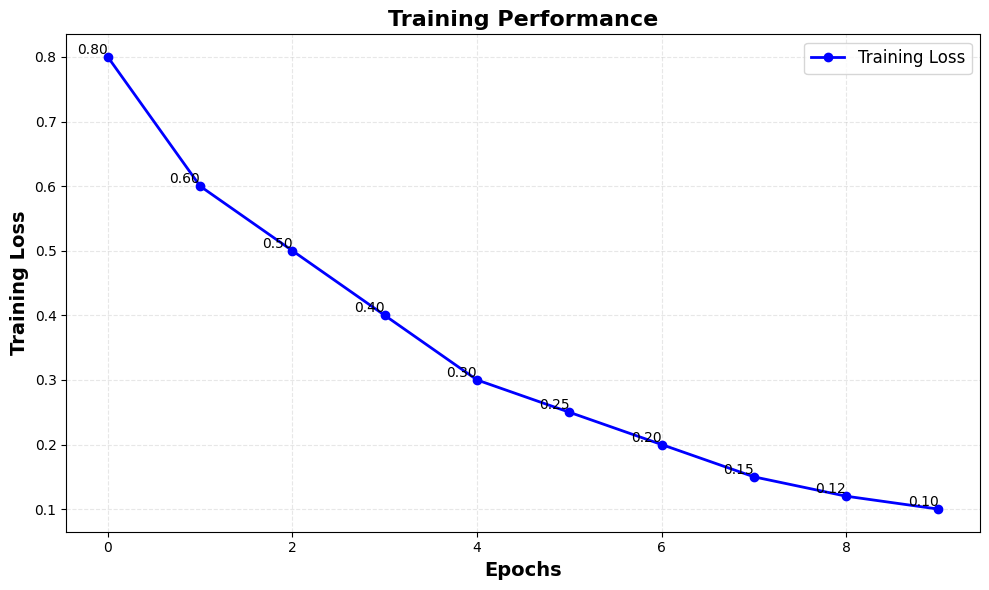

In [ ]:
import matplotlib.pyplot as plt

# Data contoh (ganti dengan data aktual dari proses pelatihan)
epochs = list(range(10))  # Epochs (0-9)
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]  # Training Loss per epoch

# Warna dan format garis
colors = ["g", "b", "r", "y", "m"]

# Membuat plot utama
plt.figure(figsize=(10, 6))

# Menambahkan plot training loss
plt.plot(
    epochs,
    training_loss,
    "-o",
    color=colors[1],
    label="Training Loss",
    markersize=6,
    linewidth=2
)

# Menambahkan detail pada grafik
plt.title("Training Performance", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Training Loss", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Anotasi nilai loss pada setiap titik
for epoch, loss in zip(epochs, training_loss):
    plt.text(epoch, loss, f"{loss:.2f}", fontsize=10, ha='right', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()


# Percobaan 2

fokus ke Learning Rate dan Jumlah Hidden Layer

In [ ]:
# Mengimpor modul untuk mengakses operasi sistem seperti mengelola file dan waktu.
import os
import time

# Mengimpor pustaka NumPy untuk komputasi numerik yang efisien.
import numpy as np

# Mengimpor pustaka Pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data, khususnya plot 2D.
import matplotlib.pyplot as plt

# Mengimpor pustaka PyTorch untuk pembuatan model deep learning.
import torch
import torch.nn as nn  # Modul PyTorch untuk membuat lapisan jaringan saraf.
from torch.utils.data import TensorDataset, DataLoader  # Modul untuk mengelola dataset dan batch data.
import torch.nn.functional as F  # Fungsi aktivasi dan fungsi lainnya yang umum digunakan pada jaringan saraf.

# Mengimpor modul untuk operasi matematika umum.
import math

# Mengimpor fungsi tqdm_notebook untuk menampilkan progress bar di Jupyter Notebook.
from tqdm.notebook import tqdm as tqdm_notebook

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi data.
from sklearn.preprocessing import MinMaxScaler

# Mengimpor modul random
import random


# Tambahkan fungsi `set_seed` untuk konsistensi hasil
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

# Tetapkan seed sebelum melanjutkan
set_seed(42)

In [ ]:
# Opsional proses ini bisa diskip

print(torch.__version__)  # Mencetak versi PyTorch yang digunakan.

2.5.1+cu121


In [ ]:
# Menentukan jalur direktori tempat file data berada.
data_dir = "/content/drive/MyDrive/Tesis/Dataset HVAC"  # Path ke direktori data di Google Colab atau lokal.

# Membaca file CSV yang berisi dataset ke dalam DataFrame menggunakan Pandas.
df = pd.read_csv("/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data.
df.head()


Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Building Load (RT)  Outside Temperature (F)  Dew Point (F)  Humidity (%)  
0               479.6                       82             75            79  
1               460.3                       82             75            79  
2               462.4                       82             75            79  
3               458.5                       82             75            79  
4               455.4                       82             75            79

In [ ]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index):
    """
    Fungsi untuk membentuk input dan label dengan jendela geser pada data time series.

    Parameters:
    - data: array numpy yang berisi data.
    - window_size: ukuran jendela (jumlah timestamp dalam setiap input).
    - inputs_cols_indices: indeks kolom yang ingin dimasukkan sebagai fitur input.
    - label_col_index: indeks kolom yang digunakan sebagai label output.

    Returns:
    - inputs: array numpy yang berisi input sequences berdasarkan jendela geser.
    - labels: array numpy yang berisi label untuk setiap sequence.
    """

    # Membuat array kosong untuk menyimpan input sequences dan label.
    # `inputs` akan memiliki dimensi (jumlah_instance, panjang_jendela, jumlah_fitur)
    inputs = np.zeros((len(data) - window_size, window_size, len(inputs_cols_indices)))
    # `labels` adalah array 1D yang akan menampung label untuk setiap sequence.
    labels = np.zeros(len(data) - window_size)

    # Iterasi melalui data untuk membentuk sequence input dan label
    for i in range(window_size, len(data)):
        # Mengambil data dalam jendela dan menambahkannya ke `inputs`
        inputs[i - window_size] = data[i - window_size : i, inputs_cols_indices]
        # Menetapkan nilai label dari kolom yang diinginkan
        labels[i - window_size] = data[i, label_col_index]

    # Mereshape `inputs` dan `labels` ke bentuk yang sesuai untuk model
    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)

    # Menampilkan bentuk (shape) dari `inputs` dan `labels` untuk verifikasi
    print(inputs.shape, labels.shape)

    return inputs, labels


In [ ]:
# Menetapkan indeks kolom label sebagai 0, yaitu kolom 'consumption' yang akan diprediksi.
label_col_index = 0  # Menggunakan 'consumption' sebagai label target.

# Menetapkan indeks kolom yang akan digunakan sebagai fitur input.
# Fitur yang dipilih adalah (consumption, hour, dayofweek, month, dayofyear).
inputs_cols_indices = range(5)  # Menggunakan kolom-kolom fitur dari indeks 0 hingga 4.

# Menetapkan ukuran jendela (window size) untuk mengatur panjang setiap sequence.
window_size = 90  # Panjang urutan yang akan dimasukkan sebagai input dalam model.

# Membuat dictionary untuk menyimpan objek scaler yang akan digunakan pada data label.
# Ini memungkinkan kita untuk melakukan normalisasi pada data pelatihan, dan nantinya mengembalikan data
# hasil prediksi dari model ke skala aslinya pada tahap evaluasi.
label_scalers = {}

# Inisialisasi list kosong untuk menampung data input pelatihan.
train_x = []

# Inisialisasi dictionary kosong untuk menampung data input dan label pengujian.
# Dictionary `test_x` akan menyimpan input pengujian, dan `test_y` untuk label pengujian.
test_x = {}
test_y = {}


In [ ]:
# Memilih file .csv dari direktori data dan menyimpannya ke dalam `processing_files`.
processing_files = [
    file for file in os.listdir(data_dir) if os.path.splitext(file)[1] == ".csv"
]

# Menentukan jumlah file yang akan digunakan untuk dataset
num_files_for_dataset = 5

# Memproses setiap file dalam daftar `processing_files` hingga jumlah yang ditentukan
for file in tqdm_notebook(processing_files[:num_files_for_dataset]):
    print(f"Processing {file} ...")

    # Membaca file .csv ke dalam DataFrame Pandas dan mengonversi kolom 'Tanggal' menjadi tipe tanggal
    df = pd.read_csv(os.path.join(data_dir, file), parse_dates=["Local Time (Timezone : GMT+8h)"])

    # Preprocessing
    # df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')  # Mengonversi kolom tanggal ke format datetime
    # df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year  # Menambahkan kolom 'Year' berdasarkan kolom 'Tanggal'
    # df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month  # Menambahkan kolom 'Month' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day  # Menambahkan kolom 'Day' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
    df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
    df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day
    df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour
    df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
    df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    # Normalisasi data input
    sc = MinMaxScaler()  # Inisialisasi scaler untuk input
    label_sc = MinMaxScaler()  # Inisialisasi scaler untuk label
    data = sc.fit_transform(df.values)  # Normalisasi data menggunakan MinMaxScaler

    # Menyimpan scaler untuk label agar bisa digunakan untuk mengembalikan nilai prediksi ke skala asli saat evaluasi
    label_sc.fit(df.iloc[:, label_col_index].values.reshape(-1, 1))
    label_scalers[file] = label_sc  # Menyimpan scaler label dalam dictionary

    # Membuat urutan input dan label menggunakan fungsi move_sliding_window
    inputs, labels = move_sliding_window(
        data,
        window_size,
        inputs_cols_indices=inputs_cols_indices,
        label_col_index=label_col_index,
    )

    # Menggabungkan instance yang dihasilkan dari semua file .csv.
    # Membagi data menjadi bagian pelatihan dan pengujian, lalu menggabungkannya ke dalam array tunggal.
    test_portion = int(0.1 * len(inputs))  # Menentukan bagian data untuk pengujian (10%)
    if len(train_x) == 0:  # Jika ini iterasi pertama
        train_x = inputs[:-test_portion]  # Menyimpan data pelatihan input
        train_y = labels[:-test_portion]  # Menyimpan data pelatihan label
    else:
        # Menggabungkan data pelatihan dari file saat ini dengan data pelatihan sebelumnya
        train_x = np.concatenate((train_x, inputs[:-test_portion]))
        train_y = np.concatenate((train_y, labels[:-test_portion]))

    # Menyimpan data pengujian untuk setiap file dalam dictionary `test_x` dan `test_y`
    test_x[file] = inputs[-test_portion:]
    test_y[file] = labels[-test_portion:]


  0%|          | 0/1 [00:00<?, ?it/s]

Processing Dataset HVAC System Energy.csv ...
(13525, 90, 5) (13525, 1)


In [ ]:
df

Chilled Water Rate (L/sec)  Building Load (RT)  \
0                            85.6               479.6   
1                            84.3               460.3   
2                            84.6               462.4   
3                            84.8               458.5   
4                            84.7               455.4   
...                           ...                 ...   
13610                       108.6               579.9   
13611                       108.9               567.3   
13612                       108.7               561.7   
13613                       108.8               566.0   
13614                       108.7               569.7   

       Outside Temperature (F)  Dew Point (F)  Humidity (%)  Year  Month  Day  \
0                           82             75            79  2019      8   18   
1                           82             75            79  2019      8   18   
2                           82             75            79  2019      8   18   
3                           82             75            79  2019      8   18   
4                           82             75            79  2019      8   18   
...                        ...            ...           ...   ...    ...  ...   
13610                       84             75            74  2020      6    1   
13611                       84             75            74  2020      6    1   
13612                       82             75            79  2020      6    1   
13613                       82             77            84  2020      6    1   
13614                       82             75            79  2020      6    1   

       Hour  DayOfWeek  
0         0          6  
1         0          6  
2         1          6  
3         1          6  
4         2          6  
...     ...        ...  
13610    11          0  
13611    11          0  
13612    12          0  
13613    12          0  
13614    13          0  

[13615 rows x 10 columns]

In [ ]:
# Memeriksa bentuk (shape) dari data pelatihan dan data pengujian.
# Menggunakan nama file "dataset_clean_baru.csv" sebagai kunci untuk test_x.
train_x.shape, test_x["Dataset HVAC System Energy.csv"].shape

((12173, 90, 5), (1352, 90, 5))

In [ ]:
# Menetapkan ukuran batch untuk pemrosesan dalam model.
batch_size = 100

# Membuat TensorDataset dari data pelatihan, mengonversi `train_x` dan `train_y` menjadi tensor PyTorch.
# `train_x` berisi fitur-fitur input, dan `train_y` berisi label target.
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# Membuat DataLoader untuk memuat data secara batch dengan parameter berikut:
# - `shuffle=True`: Mengacak urutan data di setiap epoch untuk meningkatkan generalisasi model.
# - `batch_size=batch_size`: Mengatur ukuran batch menjadi 100.
# - `drop_last=True`: Mengabaikan batch terakhir jika ukurannya tidak sesuai dengan `batch_size`,
#   memastikan semua batch memiliki ukuran yang sama.
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=True
)


In [ ]:
# Mencetak ukuran data pelatihan, ukuran batch, dan jumlah iterasi per epoch.
print(
    f"Train Size: {train_x.shape}, Batch Size: {batch_size}, # of iterations per epoch: {int(train_x.shape[0] / batch_size)}"
)


Train Size: (12173, 90, 5), Batch Size: 100, # of iterations per epoch: 121


In [ ]:
# Membebaskan memori dengan menghapus variabel `train_x` dan `train_y`.
del train_x, train_y


In [ ]:
# Memeriksa ketersediaan GPU.
# Jika GPU tersedia, `torch.cuda.is_available()` akan mengembalikan True, jika tidak akan mengembalikan False.
is_cuda = torch.cuda.is_available()

# Menetapkan device yang akan digunakan untuk menjalankan model berdasarkan ketersediaan GPU.
if is_cuda:
    device = torch.device("cuda")  # Mengatur device ke GPU
    print("GPU is available")       # Mencetak pesan jika GPU tersedia
else:
    device = torch.device("cpu")    # Mengatur device ke CPU jika GPU tidak tersedia


GPU is available


In [ ]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        # Menyimpan parameter input dan output
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        # Membuat grid untuk basis fungsi B-spline
        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        # Membuat bobot untuk komponen linier dasar dan komponen spline
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        # Mengatur parameter skala dan aktivasi untuk spline
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        # Menginisialisasi parameter
        self.reset_parameters()

    def reset_parameters(self):
        # Menginisialisasi bobot linier dasar dan bobot spline dengan kaiming_uniform
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 0.5) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        # Menghitung basis fungsi B-spline
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        # Menyelesaikan koefisien spline dari titik input
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        # Mengatur skala bobot spline
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        # Fungsi forward untuk lapisan KANLinear
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        # Memperbarui grid spline adaptif berdasarkan input x
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        # Menghitung kehilangan regulasi berdasarkan aktivasi dan entropi
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Mendefinisikan lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output GRU ke dimensi output yang diinginkan
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Melakukan forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output pada timestep terakhir dan meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output akhir dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

# 2. GRUNetKAN
# Mirip dengan GRUNet, tetapi menggantikan lapisan linier dengan KANLinear untuk menambah fleksibilitas.
class GRUNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(LSTMNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output dari LSTM ke dimensi output
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

# LSTMNetKAN
# Mirip dengan LSTMNet, tetapi menggantikan lapisan linier dengan KANLinear untuk mengembangkan fleksibilitas dan kemampuan representasi.
class LSTMNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(LSTMNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden


In [ ]:
def train(
    train_loader,
    learn_rate,
    hidden_dim=100,
    n_layers=3,
    n_epochs=10,
    model_type="GRU",
    print_every=100,
):
    # Mengambil dimensi input dari train_loader
    input_dim = next(iter(train_loader))[0].shape[2]  # 5
    output_dim = 1  # Definisi dimensi output

    # Inisialisasi model sesuai jenisnya
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "GRUKAN":
        model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)  # Pindahkan model ke perangkat

    # Definisi loss function dan optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # Memulai proses training
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []

    # Loop melalui jumlah epoch
    for epoch in range(1, n_epochs + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.0
        counter = 0

        # Iterasi melalui batch data
        for x, label in train_loader:
            counter += 1

            # Reset hidden state sesuai model yang digunakan
            if model_type == "GRU" or model_type == "GRUKAN":
                h = h.data
            elif model_type == "LSTM" or model_type == "LSTMKAN":
                h = tuple([e.data for e in h])

            model.zero_grad()  # Reset gradien

            # Forward pass
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())

            # Backpropagation dan optimisasi
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Menambahkan loss untuk perhitungan rata-rata
            if counter % print_every == 0:
                print(
                    f"Epoch {epoch} - Step: {counter}/{len(train_loader)} - Average Loss for Epoch: {avg_loss/counter}"
                )

        current_time = time.process_time()
        print(
            f"Epoch {epoch}/{n_epochs} Done, Total Loss: {avg_loss/len(train_loader)}"
        )
        print(f"Time Elapsed for Epoch: {current_time-start_time} seconds")
        epoch_times.append(current_time - start_time)

    # Menghitung total waktu pelatihan
    print(f"Total Training Time: {sum(epoch_times)} seconds")
    return model


In [ ]:
# Tetapkan seed
set_seed(42)

# Parameter pelatihan
seq_len = 90  # Panjang sequence atau jumlah timestamps
n_hidden = 100  # Ukuran hidden layer
n_layers = 3  # Jumlah lapisan RNN
n_epochs = 10  # Jumlah epoch
print_every = 100  # Frekuensi menampilkan loss
lr = 0.002  # Learning rate

# Memanggil fungsi train untuk melatih model GRU
gru_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch
    model_type="GRU",    # Tipe model (di sini menggunakan GRU)
    print_every=print_every # Frekuensi print loss selama pelatihan
)


Starting Training of GRU model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.013092378112487495
Epoch 1/10 Done, Total Loss: 0.012250640945247382
Time Elapsed for Epoch: 1.1897286320000013 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.00675539973191917
Epoch 2/10 Done, Total Loss: 0.0067951132481809985
Time Elapsed for Epoch: 0.802780813 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.0063330223876982925
Epoch 3/10 Done, Total Loss: 0.00619143492365179
Time Elapsed for Epoch: 0.8142962909999998 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005986656191525981
Epoch 4/10 Done, Total Loss: 0.005956916316520146
Time Elapsed for Epoch: 0.8177339679999989 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.00543241549632512
Epoch 5/10 Done, Total Loss: 0.005387501644878841
Time Elapsed for Epoch: 0.8072407479999981 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.0050503602414391936
Epoch 6/10 Done, Total Loss: 0.00510002023632

In [ ]:
# Menyimpan parameter model yang sudah dilatih ke file
torch.save(gru_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRU2.pth')


In [ ]:
# melatih model dengan tipe GRUKAN
# Parameter seq_len (sequence length) untuk model, yaitu jumlah timestamps
seq_len = 90

# Memanggil fungsi train untuk melatih model GRUKAN
gru_kan_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch untuk pelatihan
    model_type="GRUKAN", # Tipe model (di sini menggunakan GRUKAN)
    print_every=print_every # Frekuensi menampilkan loss selama pelatihan
)


Starting Training of GRUKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.01990943503100425
Epoch 1/10 Done, Total Loss: 0.01771527514908432
Time Elapsed for Epoch: 1.102766625000001 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.006967409078497439
Epoch 2/10 Done, Total Loss: 0.00698680715050456
Time Elapsed for Epoch: 0.9267919599999992 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006443043258041143
Epoch 3/10 Done, Total Loss: 0.006423131426149779
Time Elapsed for Epoch: 0.9332909919999999 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005867553574498743
Epoch 4/10 Done, Total Loss: 0.005847373994621487
Time Elapsed for Epoch: 0.9351949680000011 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005759293718729169
Epoch 5/10 Done, Total Loss: 0.005627731380845644
Time Elapsed for Epoch: 0.9287101450000002 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005349969503004104
Epoch 6/10 Done, Total Loss: 0.00535414

In [ ]:
# Menyimpan parameter model GRUKAN yang telah dilatih ke dalam file
torch.save(gru_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRUkan2.pth')


In [ ]:
lstm_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTM",
    print_every=print_every,
)

Starting Training of LSTM model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.029510136866010724
Epoch 1/10 Done, Total Loss: 0.02640698634257371
Time Elapsed for Epoch: 1.493782166999999 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.008931870262604207
Epoch 2/10 Done, Total Loss: 0.008736772714798485
Time Elapsed for Epoch: 1.2240805980000005 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.007152240353170782
Epoch 3/10 Done, Total Loss: 0.007180184197096416
Time Elapsed for Epoch: 1.219142962999996 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006472680969163775
Epoch 4/10 Done, Total Loss: 0.006395502860680961
Time Elapsed for Epoch: 1.2183555909999981 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.0060843945853412155
Epoch 5/10 Done, Total Loss: 0.006020578653897998
Time Elapsed for Epoch: 1.2571911870000037 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005798084321431815
Epoch 6/10 Done, Total Loss: 0.00581704

In [ ]:
torch.save(lstm_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm2.pth')

In [ ]:
lstm_kan_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTMKAN",
    print_every=print_every,
)

Starting Training of LSTMKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.03148923560976982
Epoch 1/10 Done, Total Loss: 0.02796880628775097
Time Elapsed for Epoch: 1.4935843770000048 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.008947648832108825
Epoch 2/10 Done, Total Loss: 0.008638498244406887
Time Elapsed for Epoch: 1.352847863000001 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.007095846924930811
Epoch 3/10 Done, Total Loss: 0.007002135499165016
Time Elapsed for Epoch: 1.3443090239999975 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006298678116872907
Epoch 4/10 Done, Total Loss: 0.006188132741473122
Time Elapsed for Epoch: 1.338899898000001 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005871508670970797
Epoch 5/10 Done, Total Loss: 0.005867337630984704
Time Elapsed for Epoch: 1.3621078040000043 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005666503477841616
Epoch 6/10 Done, Total Loss: 0.0056637

In [ ]:
torch.save(lstm_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm_kan2.pth')

In [ ]:
!nvidia-smi

Tue Dec 10 05:28:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0              30W /  70W |    531MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# move device to cpu for evaluation to avoid GPU memory run
device = "cpu"

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
gru_model2 = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU2.pth"))

<ipython-input-29-c4563c3c5eb7>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU2.pth"))


<All keys matched successfully>

In [ ]:
device = "cpu"
gru_model.to(device)

GRUNet(
  (gru): GRU(5, 100, num_layers=3, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
gru_kan_model2 = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan2.pth"))

<ipython-input-31-7ac779cc5992>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan2.

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_kan_model2.to(device)

GRUNetKAN(
  (gru): GRU(5, 100, num_layers=3, batch_first=True, dropout=0.2)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
lstm_model2 = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm2.pth"))

<ipython-input-33-16bbf0a0ce1f>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm2.pth")

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_model2.to(device)

LSTMNet(
  (lstm): LSTM(5, 100, num_layers=3, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
lstm_kan_model2 = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_kan2.pth"))

<ipython-input-35-97fa3a1a8dc8>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_ka

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_kan_model2.to(device)

LSTMNetKAN(
  (lstm): LSTM(5, 100, num_layers=3, batch_first=True, dropout=0.2)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
def sMAPE(outputs, targets):
    sMAPE = (
        100
        / len(targets)
        * np.sum(np.abs(outputs - targets) / (np.abs(outputs + targets)) / 2)
    )
    return sMAPE

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate(model, test_x, test_y, label_scalers):
    model.to(device)
    outputs = []
    targets = []
    start_time = time.process_time()
    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    print(f"Evaluation Time: {time.process_time()-start_time}")
    print(f"sMAPE: {round(sMAPE(concatenated_outputs, concatenated_targets), 3)}%")

    # list of of targets/outputs for each state
    return outputs, targets, sMAPE

In [ ]:
# Evaluate Performance GRU with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    # Move the model to the device before the loop
    model.to(device)
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

Evaluation Time: 0.019843907000002048
MAE: 2.347
RMSE: 4.172
R²: 0.819


In [ ]:
# ipython-input-196-53ac28a8cb99
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

# Since you want to calculate sMAPE for the GRU model, you can call the sMAPE function separately:
gru_sMAPE = sMAPE(np.concatenate(gru_outputs), np.concatenate(targets))
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.01635293300000029
MAE: 2.347
RMSE: 4.172
R²: 0.819
GRU sMAPE: 0.605%


In [ ]:
#Evaluate Performance GRUKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.015706601000005094
MAE: 2.347
RMSE: 4.172
R²: 0.819
GRU sMAPE: 0.605%


In [ ]:
# Evaluate Performance LSTM with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTM sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.01323535400000253
MAE: 2.347
RMSE: 4.172
R²: 0.819
LSTM sMAPE: 0.605%


In [ ]:
# Evaluate Performance LSTMKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def calculate_mae(outputs, targets): # Renamed to avoid conflict
    return np.mean(np.abs(outputs - targets))

def calculate_rmse(outputs, targets): # Renamed to avoid conflict
    return np.sqrt(np.mean((outputs - targets) ** 2))

def calculate_r2(outputs, targets): # Renamed to avoid conflict
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2 using the renamed functions
    mae_value = calculate_mae(concatenated_outputs, concatenated_targets)
    rmse_value = calculate_rmse(concatenated_outputs, concatenated_targets)
    r2_value = calculate_r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTMKAN sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.02544891499999835
MAE: 2.347
RMSE: 4.172
R²: 0.819
LSTMKAN sMAPE: 0.605%


In [ ]:
states_list = list(test_x.keys())

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung akurasi dalam bentuk persentase
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Hitung MAPE
    accuracy = 100 - (mape * 100)  # Akurasi sebagai 100% - MAPE
    return accuracy

print("\nEksperimen 2")
# Evaluate GRU model
print("\nEvaluate Model GRU:")
gru_outputs, gru_targets, _, _, _ = evaluate(gru_model, test_x, test_y, label_scalers)
gru_accuracy = calculate_accuracy(gru_targets, gru_outputs)
print(f"GRU Accuracy: {gru_accuracy:.2f}%")

# Evaluate GRU-KAN model
print("\nEvaluate Model GRU-KAN:")
gru_kan_outputs, gru_kan_targets, _, _, _ = evaluate(gru_kan_model, test_x, test_y, label_scalers)
gru_kan_accuracy = calculate_accuracy(gru_kan_targets, gru_kan_outputs)
print(f"GRU-KAN Accuracy: {gru_kan_accuracy:.2f}%")

# Evaluate LSTM model
print("\nEvaluate Model LSTM:")
lstm_outputs, lstm_targets, _, _, _ = evaluate(lstm_model, test_x, test_y, label_scalers)
lstm_accuracy = calculate_accuracy(lstm_targets, lstm_outputs)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Evaluate LSTM-KAN model
print("\nEvaluate Model LSTM-KAN:")
lstm_kan_outputs, lstm_kan_targets, _, _, _ = evaluate(lstm_kan_model, test_x, test_y, label_scalers)
lstm_kan_accuracy = calculate_accuracy(lstm_kan_targets, lstm_kan_outputs)
print(f"LSTM-KAN Accuracy: {lstm_kan_accuracy:.2f}%")



Eksperimen 2

Evaluate Model GRU:
Evaluation Time: 0.031106473999997775
MAE: 2.347
RMSE: 4.172
R²: 0.819
GRU Accuracy: 97.57%

Evaluate Model GRU-KAN:
Evaluation Time: 0.025802359000003605
MAE: 2.242
RMSE: 4.168
R²: 0.819
GRU-KAN Accuracy: 97.68%

Evaluate Model LSTM:
Evaluation Time: 0.041682845000003965
MAE: 2.389
RMSE: 4.328
R²: 0.805
LSTM Accuracy: 97.52%

Evaluate Model LSTM-KAN:
Evaluation Time: 0.041514878000000976
MAE: 2.529
RMSE: 4.419
R²: 0.797
LSTM-KAN Accuracy: 97.37%


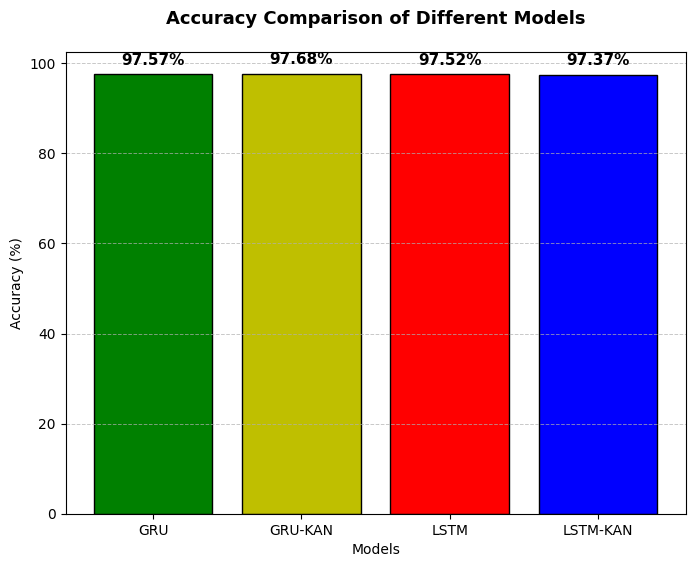

In [ ]:
import matplotlib.pyplot as plt


# Data for plotting (replace with your actual data)
models = ['GRU', 'GRU-KAN', 'LSTM', 'LSTM-KAN']
accuracies = [gru_accuracy, gru_kan_accuracy, lstm_accuracy, lstm_kan_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['g', 'y', 'r', 'b'], edgecolor='black', linewidth=1)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


# Set axis labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Different Models", fontsize=13, fontweight='bold', pad=20)

# # Add value labels on top of each bar
# for bar, accuracy in zip(bars, accuracies):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{accuracy:.2f}%", ha='center', va='bottom')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered alignment
        height + 1.5,  # Position slightly above the bar
        f"{height:.2f}%",  # Display accuracy percentage
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )


# Show the plot
plt.show()

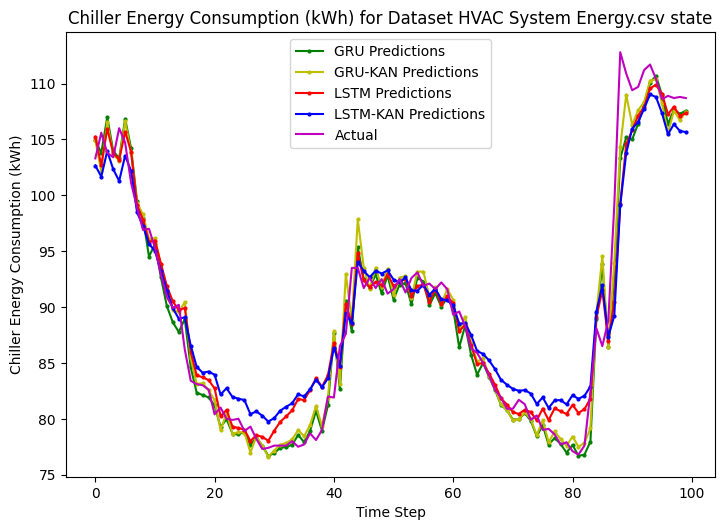

In [ ]:
import matplotlib.pyplot as plt

# Warna yang akan digunakan untuk plot
colors = ["g", "y", "r", "b", "m"]

plt.figure(figsize=(14, 10))

# Assuming all output lists (gru_outputs, gru_kan_outputs, etc.) have the same structure
num_states = len(states_list)  # Assuming states_list contains all desired states

# Loop through states and create subplots
for i in range(min(num_states, 4)):  # Limit to 4 subplots for now
    plt.subplot(2, 2, i + 1)

    # Access data for the current state (assuming it's the first element in the lists)
    gru_data = gru_outputs[0]  # Access data for the first (and only) state in the list
    gru_kan_data = gru_kan_outputs[0]
    lstm_data = lstm_outputs[0]
    lstm_kan_data = lstm_kan_outputs[0]
    target_data = targets[0]

    # Adjust data slicing based on subplot and data length
    if i == 0:
        data_slice = slice(-100, None)  # Last 100 data points
    elif i == 1:
        data_slice = slice(-50, None)  # Last 50 data points
    elif i == 2:
        data_slice = slice(None, 50)  # First 50 data points
    else:
        data_slice = slice(None, 100)  # First 100 data points

    plt.plot(gru_data[data_slice], "-o", color=colors[0], label="GRU Predictions", markersize=2)
    plt.plot(gru_kan_data[data_slice], "-o", color=colors[1], label="GRU-KAN Predictions", markersize=2)
    plt.plot(lstm_data[data_slice], "-o", color=colors[2], label="LSTM Predictions", markersize=2)
    plt.plot(lstm_kan_data[data_slice], "-o", color=colors[3], label="LSTM-KAN Predictions", markersize=2)
    plt.plot(target_data[data_slice], color=colors[4], label="Actual")

    plt.ylabel("Chiller Energy Consumption (kWh)")
    plt.xlabel("Time Step")
    plt.title(f"Chiller Energy Consumption (kWh) for {states_list[i]} state")  # Use state from states_list
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # visualisasi

# import matplotlib.pyplot as plt


# # Number of states to plot
# num_states_to_plot = min(len(states_list), 4)  # Limit to 4 for better visualization

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=num_states_to_plot, ncols=1, figsize=(10, 5 * num_states_to_plot))

# # Loop through the states and create individual plots
# for i, state in enumerate(states_list[:num_states_to_plot]):
#     ax = axes[i] if num_states_to_plot > 1 else axes

#     # Extract data for the current state
#     gru_data = gru_outputs[i]
#     gru_kan_data = gru_kan_outputs[i]
#     lstm_data = lstm_outputs[i]
#     lstm_kan_data = lstm_kan_outputs[i]
#     target_data = targets[i]

#     # Plot data
#     ax.plot(gru_data, label="GRU", marker='o', markersize=2, linewidth=1)
#     ax.plot(gru_kan_data, label="GRU-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_data, label="LSTM", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_kan_data, label="LSTM-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(target_data, label="Actual", linewidth=1.5)

#     # Set labels and title
#     plt.xlabel('Time Step')
#     ax.set_ylabel("Chiller Energy Consumption (kWh)")
#     ax.set_title(f"State: {state}")
#     ax.legend()

# plt.tight_layout()
# plt.show()

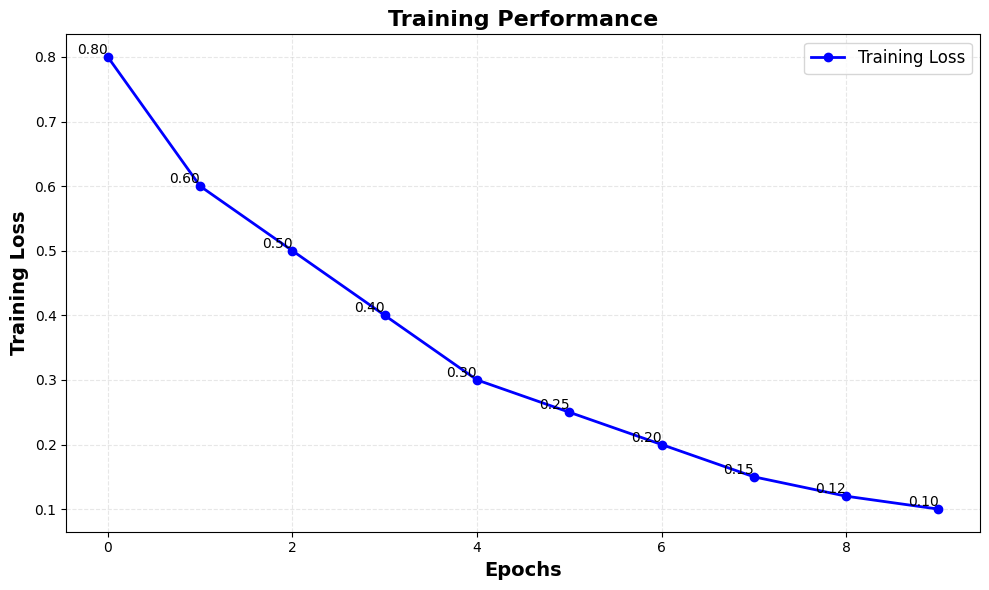

In [ ]:
import matplotlib.pyplot as plt

# Data contoh (ganti dengan data aktual dari proses pelatihan)
epochs = list(range(10))  # Epochs (0-9)
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]  # Training Loss per epoch

# Warna dan format garis
colors = ["g", "b", "r", "y", "m"]

# Membuat plot utama
plt.figure(figsize=(10, 6))

# Menambahkan plot training loss
plt.plot(
    epochs,
    training_loss,
    "-o",
    color=colors[1],
    label="Training Loss",
    markersize=6,
    linewidth=2
)

# Menambahkan detail pada grafik
plt.title("Training Performance", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Training Loss", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Anotasi nilai loss pada setiap titik
for epoch, loss in zip(epochs, training_loss):
    plt.text(epoch, loss, f"{loss:.2f}", fontsize=10, ha='right', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()


# Percobaan 3

fokus ke Learning Rate dan Jumlah Hidden Layer

In [ ]:
# Mengimpor modul untuk mengakses operasi sistem seperti mengelola file dan waktu.
import os
import time

# Mengimpor pustaka NumPy untuk komputasi numerik yang efisien.
import numpy as np

# Mengimpor pustaka Pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data, khususnya plot 2D.
import matplotlib.pyplot as plt

# Mengimpor pustaka PyTorch untuk pembuatan model deep learning.
import torch
import torch.nn as nn  # Modul PyTorch untuk membuat lapisan jaringan saraf.
from torch.utils.data import TensorDataset, DataLoader  # Modul untuk mengelola dataset dan batch data.
import torch.nn.functional as F  # Fungsi aktivasi dan fungsi lainnya yang umum digunakan pada jaringan saraf.

# Mengimpor modul untuk operasi matematika umum.
import math

# Mengimpor fungsi tqdm_notebook untuk menampilkan progress bar di Jupyter Notebook.
from tqdm.notebook import tqdm as tqdm_notebook

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi data.
from sklearn.preprocessing import MinMaxScaler

# Mengimpor modul random
import random


# Tambahkan fungsi `set_seed` untuk konsistensi hasil
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

# Tetapkan seed sebelum melanjutkan
set_seed(42)

In [ ]:
# Opsional proses ini bisa diskip

print(torch.__version__)  # Mencetak versi PyTorch yang digunakan.

2.5.1+cu121


In [ ]:
# Menentukan jalur direktori tempat file data berada.
data_dir = "/content/drive/MyDrive/Tesis/Dataset HVAC"  # Path ke direktori data di Google Colab atau lokal.

# Membaca file CSV yang berisi dataset ke dalam DataFrame menggunakan Pandas.
df = pd.read_csv("/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data.
df.head()


Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Building Load (RT)  Outside Temperature (F)  Dew Point (F)  Humidity (%)  
0               479.6                       82             75            79  
1               460.3                       82             75            79  
2               462.4                       82             75            79  
3               458.5                       82             75            79  
4               455.4                       82             75            79

In [ ]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index):
    """
    Fungsi untuk membentuk input dan label dengan jendela geser pada data time series.

    Parameters:
    - data: array numpy yang berisi data.
    - window_size: ukuran jendela (jumlah timestamp dalam setiap input).
    - inputs_cols_indices: indeks kolom yang ingin dimasukkan sebagai fitur input.
    - label_col_index: indeks kolom yang digunakan sebagai label output.

    Returns:
    - inputs: array numpy yang berisi input sequences berdasarkan jendela geser.
    - labels: array numpy yang berisi label untuk setiap sequence.
    """

    # Membuat array kosong untuk menyimpan input sequences dan label.
    # `inputs` akan memiliki dimensi (jumlah_instance, panjang_jendela, jumlah_fitur)
    inputs = np.zeros((len(data) - window_size, window_size, len(inputs_cols_indices)))
    # `labels` adalah array 1D yang akan menampung label untuk setiap sequence.
    labels = np.zeros(len(data) - window_size)

    # Iterasi melalui data untuk membentuk sequence input dan label
    for i in range(window_size, len(data)):
        # Mengambil data dalam jendela dan menambahkannya ke `inputs`
        inputs[i - window_size] = data[i - window_size : i, inputs_cols_indices]
        # Menetapkan nilai label dari kolom yang diinginkan
        labels[i - window_size] = data[i, label_col_index]

    # Mereshape `inputs` dan `labels` ke bentuk yang sesuai untuk model
    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)

    # Menampilkan bentuk (shape) dari `inputs` dan `labels` untuk verifikasi
    print(inputs.shape, labels.shape)

    return inputs, labels


In [ ]:
# Menetapkan indeks kolom label sebagai 0, yaitu kolom 'consumption' yang akan diprediksi.
label_col_index = 0  # Menggunakan 'consumption' sebagai label target.

# Menetapkan indeks kolom yang akan digunakan sebagai fitur input.
# Fitur yang dipilih adalah (consumption, hour, dayofweek, month, dayofyear).
inputs_cols_indices = range(5)  # Menggunakan kolom-kolom fitur dari indeks 0 hingga 4.

# Menetapkan ukuran jendela (window size) untuk mengatur panjang setiap sequence.
window_size = 90  # Panjang urutan yang akan dimasukkan sebagai input dalam model.

# Membuat dictionary untuk menyimpan objek scaler yang akan digunakan pada data label.
# Ini memungkinkan kita untuk melakukan normalisasi pada data pelatihan, dan nantinya mengembalikan data
# hasil prediksi dari model ke skala aslinya pada tahap evaluasi.
label_scalers = {}

# Inisialisasi list kosong untuk menampung data input pelatihan.
train_x = []

# Inisialisasi dictionary kosong untuk menampung data input dan label pengujian.
# Dictionary `test_x` akan menyimpan input pengujian, dan `test_y` untuk label pengujian.
test_x = {}
test_y = {}


In [ ]:
# Memilih file .csv dari direktori data dan menyimpannya ke dalam `processing_files`.
processing_files = [
    file for file in os.listdir(data_dir) if os.path.splitext(file)[1] == ".csv"
]

# Menentukan jumlah file yang akan digunakan untuk dataset
num_files_for_dataset = 5

# Memproses setiap file dalam daftar `processing_files` hingga jumlah yang ditentukan
for file in tqdm_notebook(processing_files[:num_files_for_dataset]):
    print(f"Processing {file} ...")

    # Membaca file .csv ke dalam DataFrame Pandas dan mengonversi kolom 'Tanggal' menjadi tipe tanggal
    df = pd.read_csv(os.path.join(data_dir, file), parse_dates=["Local Time (Timezone : GMT+8h)"])

    # Preprocessing
    # df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')  # Mengonversi kolom tanggal ke format datetime
    # df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year  # Menambahkan kolom 'Year' berdasarkan kolom 'Tanggal'
    # df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month  # Menambahkan kolom 'Month' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day  # Menambahkan kolom 'Day' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
    df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
    df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day
    df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour
    df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
    df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    # Normalisasi data input
    sc = MinMaxScaler()  # Inisialisasi scaler untuk input
    label_sc = MinMaxScaler()  # Inisialisasi scaler untuk label
    data = sc.fit_transform(df.values)  # Normalisasi data menggunakan MinMaxScaler

    # Menyimpan scaler untuk label agar bisa digunakan untuk mengembalikan nilai prediksi ke skala asli saat evaluasi
    label_sc.fit(df.iloc[:, label_col_index].values.reshape(-1, 1))
    label_scalers[file] = label_sc  # Menyimpan scaler label dalam dictionary

    # Membuat urutan input dan label menggunakan fungsi move_sliding_window
    inputs, labels = move_sliding_window(
        data,
        window_size,
        inputs_cols_indices=inputs_cols_indices,
        label_col_index=label_col_index,
    )

    # Menggabungkan instance yang dihasilkan dari semua file .csv.
    # Membagi data menjadi bagian pelatihan dan pengujian, lalu menggabungkannya ke dalam array tunggal.
    test_portion = int(0.1 * len(inputs))  # Menentukan bagian data untuk pengujian (10%)
    if len(train_x) == 0:  # Jika ini iterasi pertama
        train_x = inputs[:-test_portion]  # Menyimpan data pelatihan input
        train_y = labels[:-test_portion]  # Menyimpan data pelatihan label
    else:
        # Menggabungkan data pelatihan dari file saat ini dengan data pelatihan sebelumnya
        train_x = np.concatenate((train_x, inputs[:-test_portion]))
        train_y = np.concatenate((train_y, labels[:-test_portion]))

    # Menyimpan data pengujian untuk setiap file dalam dictionary `test_x` dan `test_y`
    test_x[file] = inputs[-test_portion:]
    test_y[file] = labels[-test_portion:]


  0%|          | 0/1 [00:00<?, ?it/s]

Processing Dataset HVAC System Energy.csv ...
(13525, 90, 5) (13525, 1)


In [ ]:
df

Chilled Water Rate (L/sec)  Building Load (RT)  \
0                            85.6               479.6   
1                            84.3               460.3   
2                            84.6               462.4   
3                            84.8               458.5   
4                            84.7               455.4   
...                           ...                 ...   
13610                       108.6               579.9   
13611                       108.9               567.3   
13612                       108.7               561.7   
13613                       108.8               566.0   
13614                       108.7               569.7   

       Outside Temperature (F)  Dew Point (F)  Humidity (%)  Year  Month  Day  \
0                           82             75            79  2019      8   18   
1                           82             75            79  2019      8   18   
2                           82             75            79  2019      8   18   
3                           82             75            79  2019      8   18   
4                           82             75            79  2019      8   18   
...                        ...            ...           ...   ...    ...  ...   
13610                       84             75            74  2020      6    1   
13611                       84             75            74  2020      6    1   
13612                       82             75            79  2020      6    1   
13613                       82             77            84  2020      6    1   
13614                       82             75            79  2020      6    1   

       Hour  DayOfWeek  
0         0          6  
1         0          6  
2         1          6  
3         1          6  
4         2          6  
...     ...        ...  
13610    11          0  
13611    11          0  
13612    12          0  
13613    12          0  
13614    13          0  

[13615 rows x 10 columns]

In [ ]:
# Memeriksa bentuk (shape) dari data pelatihan dan data pengujian.
# Menggunakan nama file "dataset_clean_baru.csv" sebagai kunci untuk test_x.
train_x.shape, test_x["Dataset HVAC System Energy.csv"].shape

((12173, 90, 5), (1352, 90, 5))

In [ ]:
# Menetapkan ukuran batch untuk pemrosesan dalam model.
batch_size = 100

# Membuat TensorDataset dari data pelatihan, mengonversi `train_x` dan `train_y` menjadi tensor PyTorch.
# `train_x` berisi fitur-fitur input, dan `train_y` berisi label target.
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# Membuat DataLoader untuk memuat data secara batch dengan parameter berikut:
# - `shuffle=True`: Mengacak urutan data di setiap epoch untuk meningkatkan generalisasi model.
# - `batch_size=batch_size`: Mengatur ukuran batch menjadi 100.
# - `drop_last=True`: Mengabaikan batch terakhir jika ukurannya tidak sesuai dengan `batch_size`,
#   memastikan semua batch memiliki ukuran yang sama.
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=True
)


In [ ]:
# Mencetak ukuran data pelatihan, ukuran batch, dan jumlah iterasi per epoch.
print(
    f"Train Size: {train_x.shape}, Batch Size: {batch_size}, # of iterations per epoch: {int(train_x.shape[0] / batch_size)}"
)


Train Size: (12173, 90, 5), Batch Size: 100, # of iterations per epoch: 121


In [ ]:
# Membebaskan memori dengan menghapus variabel `train_x` dan `train_y`.
del train_x, train_y


In [ ]:
# Memeriksa ketersediaan GPU.
# Jika GPU tersedia, `torch.cuda.is_available()` akan mengembalikan True, jika tidak akan mengembalikan False.
is_cuda = torch.cuda.is_available()

# Menetapkan device yang akan digunakan untuk menjalankan model berdasarkan ketersediaan GPU.
if is_cuda:
    device = torch.device("cuda")  # Mengatur device ke GPU
    print("GPU is available")       # Mencetak pesan jika GPU tersedia
else:
    device = torch.device("cpu")    # Mengatur device ke CPU jika GPU tidak tersedia


GPU is available


In [ ]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        # Menyimpan parameter input dan output
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        # Membuat grid untuk basis fungsi B-spline
        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        # Membuat bobot untuk komponen linier dasar dan komponen spline
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        # Mengatur parameter skala dan aktivasi untuk spline
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        # Menginisialisasi parameter
        self.reset_parameters()

    def reset_parameters(self):
        # Menginisialisasi bobot linier dasar dan bobot spline dengan kaiming_uniform
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 0.5) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        # Menghitung basis fungsi B-spline
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        # Menyelesaikan koefisien spline dari titik input
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        # Mengatur skala bobot spline
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        # Fungsi forward untuk lapisan KANLinear
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        # Memperbarui grid spline adaptif berdasarkan input x
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        # Menghitung kehilangan regulasi berdasarkan aktivasi dan entropi
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(GRUNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Mendefinisikan lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output GRU ke dimensi output yang diinginkan
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Melakukan forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output pada timestep terakhir dan meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output akhir dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

# 2. GRUNetKAN
# Mirip dengan GRUNet, tetapi menggantikan lapisan linier dengan KANLinear untuk menambah fleksibilitas.
class GRUNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(GRUNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(LSTMNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output dari LSTM ke dimensi output
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

# LSTMNetKAN
# Mirip dengan LSTMNet, tetapi menggantikan lapisan linier dengan KANLinear untuk mengembangkan fleksibilitas dan kemampuan representasi.
class LSTMNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(LSTMNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden


In [ ]:
def train(
    train_loader,
    learn_rate,
    hidden_dim=100,
    n_layers=4,
    n_epochs=10,
    model_type="GRU",
    print_every=100,
):
    # Mengambil dimensi input dari train_loader
    input_dim = next(iter(train_loader))[0].shape[2]  # 5
    output_dim = 1  # Definisi dimensi output

    # Inisialisasi model sesuai jenisnya
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "GRUKAN":
        model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)  # Pindahkan model ke perangkat

    # Definisi loss function dan optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # Memulai proses training
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []

    # Loop melalui jumlah epoch
    for epoch in range(1, n_epochs + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.0
        counter = 0

        # Iterasi melalui batch data
        for x, label in train_loader:
            counter += 1

            # Reset hidden state sesuai model yang digunakan
            if model_type == "GRU" or model_type == "GRUKAN":
                h = h.data
            elif model_type == "LSTM" or model_type == "LSTMKAN":
                h = tuple([e.data for e in h])

            model.zero_grad()  # Reset gradien

            # Forward pass
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())

            # Backpropagation dan optimisasi
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Menambahkan loss untuk perhitungan rata-rata
            if counter % print_every == 0:
                print(
                    f"Epoch {epoch} - Step: {counter}/{len(train_loader)} - Average Loss for Epoch: {avg_loss/counter}"
                )

        current_time = time.process_time()
        print(
            f"Epoch {epoch}/{n_epochs} Done, Total Loss: {avg_loss/len(train_loader)}"
        )
        print(f"Time Elapsed for Epoch: {current_time-start_time} seconds")
        epoch_times.append(current_time - start_time)

    # Menghitung total waktu pelatihan
    print(f"Total Training Time: {sum(epoch_times)} seconds")
    return model


In [ ]:
# Tetapkan seed
set_seed(42)

# Parameter pelatihan
seq_len = 90  # Panjang sequence atau jumlah timestamps
n_hidden = 100  # Ukuran hidden layer
n_layers = 4  # Jumlah lapisan RNN
n_epochs = 10  # Jumlah epoch
print_every = 100  # Frekuensi menampilkan loss
lr = 0.003  # Learning rate

# Memanggil fungsi train untuk melatih model GRU
gru_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch
    model_type="GRU",    # Tipe model (di sini menggunakan GRU)
    print_every=print_every # Frekuensi print loss selama pelatihan
)


Starting Training of GRU model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.01737110677175224
Epoch 1/10 Done, Total Loss: 0.01571445407592191
Time Elapsed for Epoch: 1.2368524290000025 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.006974034332670271
Epoch 2/10 Done, Total Loss: 0.006858994364584527
Time Elapsed for Epoch: 1.1127298309999958 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006307066844310611
Epoch 3/10 Done, Total Loss: 0.00625233640624903
Time Elapsed for Epoch: 1.1162374019999959 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.00548069371143356
Epoch 4/10 Done, Total Loss: 0.005431537907031819
Time Elapsed for Epoch: 1.041237604999992 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005345502097625286
Epoch 5/10 Done, Total Loss: 0.0053083094352594585
Time Elapsed for Epoch: 1.0434765319999997 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005091314821038395
Epoch 6/10 Done, Total Loss: 0.00506956953

In [ ]:
# Menyimpan parameter model yang sudah dilatih ke file
torch.save(gru_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRU3.pth')


In [ ]:
# melatih model dengan tipe GRUKAN
# Parameter seq_len (sequence length) untuk model, yaitu jumlah timestamps
seq_len = 90

# Memanggil fungsi train untuk melatih model GRUKAN
gru_kan_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch untuk pelatihan
    model_type="GRUKAN", # Tipe model (di sini menggunakan GRUKAN)
    print_every=print_every # Frekuensi menampilkan loss selama pelatihan
)


Starting Training of GRUKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.01905323995742947
Epoch 1/10 Done, Total Loss: 0.01695677963439529
Time Elapsed for Epoch: 1.4192392540000043 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.0067904557147994635
Epoch 2/10 Done, Total Loss: 0.006721983098017036
Time Elapsed for Epoch: 1.2957057759999913 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.005965666442643851
Epoch 3/10 Done, Total Loss: 0.005900625195277254
Time Elapsed for Epoch: 1.2504738340000046 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005510938410880044
Epoch 4/10 Done, Total Loss: 0.005555766508606655
Time Elapsed for Epoch: 1.213222493999993 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005197375788120553
Epoch 5/10 Done, Total Loss: 0.005179254291001861
Time Elapsed for Epoch: 1.2147537499999999 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005062994176987559
Epoch 6/10 Done, Total Loss: 0.004980

In [ ]:
# Menyimpan parameter model GRUKAN yang telah dilatih ke dalam file
torch.save(gru_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRUkan3.pth')


In [ ]:
lstm_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTM",
    print_every=print_every,
)

Starting Training of LSTM model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.03139668632298708
Epoch 1/10 Done, Total Loss: 0.02795547449360948
Time Elapsed for Epoch: 1.2827317309999984 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.00868066405877471
Epoch 2/10 Done, Total Loss: 0.008436217561579687
Time Elapsed for Epoch: 1.2708370209999913 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006829563342034817
Epoch 3/10 Done, Total Loss: 0.006835206817789388
Time Elapsed for Epoch: 1.2838779309999921 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006224293983541429
Epoch 4/10 Done, Total Loss: 0.006149241562224616
Time Elapsed for Epoch: 1.3740670730000062 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005790674558375031
Epoch 5/10 Done, Total Loss: 0.00574699043650334
Time Elapsed for Epoch: 1.405947819000005 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005585610195994377
Epoch 6/10 Done, Total Loss: 0.00562396659

In [ ]:
torch.save(lstm_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm3.pth')

In [ ]:
lstm_kan_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTMKAN",
    print_every=print_every,
)

Starting Training of LSTMKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.03385524988174438
Epoch 1/10 Done, Total Loss: 0.03011515707331748
Time Elapsed for Epoch: 1.6581043519999952 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.008637500335462392
Epoch 2/10 Done, Total Loss: 0.00856197105089495
Time Elapsed for Epoch: 1.584372497000004 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.007311571757309138
Epoch 3/10 Done, Total Loss: 0.007139712953093377
Time Elapsed for Epoch: 1.671089852999998 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006262011867947876
Epoch 4/10 Done, Total Loss: 0.0062086203054732775
Time Elapsed for Epoch: 1.622722564 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005694983953144401
Epoch 5/10 Done, Total Loss: 0.005753518576726071
Time Elapsed for Epoch: 1.5293737390000075 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005576209388673306
Epoch 6/10 Done, Total Loss: 0.00554946577368

In [ ]:
torch.save(lstm_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm_kan3.pth')

In [ ]:
!nvidia-smi

Tue Dec 10 05:33:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0              29W /  70W |   2325MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# move device to cpu for evaluation to avoid GPU memory run
device = "cpu"

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 4
gru_model2 = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU3.pth"))

<ipython-input-77-63e1125431dc>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU3.pth"))


<All keys matched successfully>

In [ ]:
device = "cpu"
gru_model.to(device)

GRUNet(
  (gru): GRU(5, 100, num_layers=4, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 4
gru_kan_model2 = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan3.pth"))

<ipython-input-79-80bc14a232e9>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan3.

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_kan_model2.to(device)

GRUNetKAN(
  (gru): GRU(5, 100, num_layers=4, batch_first=True, dropout=0.3)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 4
lstm_model2 = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm3.pth"))

<ipython-input-81-15efb1410d5a>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm3.pth")

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_model2.to(device)

LSTMNet(
  (lstm): LSTM(5, 100, num_layers=4, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 4
lstm_kan_model2 = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_kan3.pth"))

<ipython-input-83-20ca1e8c4208>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_ka

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_kan_model2.to(device)

LSTMNetKAN(
  (lstm): LSTM(5, 100, num_layers=4, batch_first=True, dropout=0.3)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
def sMAPE(outputs, targets):
    sMAPE = (
        100
        / len(targets)
        * np.sum(np.abs(outputs - targets) / (np.abs(outputs + targets)) / 2)
    )
    return sMAPE

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate(model, test_x, test_y, label_scalers):
    model.to(device)
    outputs = []
    targets = []
    start_time = time.process_time()
    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    print(f"Evaluation Time: {time.process_time()-start_time}")
    print(f"sMAPE: {round(sMAPE(concatenated_outputs, concatenated_targets), 3)}%")

    # list of of targets/outputs for each state
    return outputs, targets, sMAPE

In [ ]:
# Evaluate Performance GRU with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    # Move the model to the device before the loop
    model.to(device)
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

Evaluation Time: 0.019825699000008967
MAE: 2.482
RMSE: 4.238
R²: 0.813


In [ ]:
# ipython-input-196-53ac28a8cb99
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

# Since you want to calculate sMAPE for the GRU model, you can call the sMAPE function separately:
gru_sMAPE = sMAPE(np.concatenate(gru_outputs), np.concatenate(targets))
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.012665638999990847
MAE: 2.482
RMSE: 4.238
R²: 0.813
GRU sMAPE: 0.646%


In [ ]:
#Evaluate Performance GRUKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.02129829899999436
MAE: 2.482
RMSE: 4.238
R²: 0.813
GRU sMAPE: 0.646%


In [ ]:
# Evaluate Performance LSTM with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTM sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.03149679199999866
MAE: 2.482
RMSE: 4.238
R²: 0.813
LSTM sMAPE: 0.646%


In [ ]:
# Evaluate Performance LSTMKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def calculate_mae(outputs, targets): # Renamed to avoid conflict
    return np.mean(np.abs(outputs - targets))

def calculate_rmse(outputs, targets): # Renamed to avoid conflict
    return np.sqrt(np.mean((outputs - targets) ** 2))

def calculate_r2(outputs, targets): # Renamed to avoid conflict
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2 using the renamed functions
    mae_value = calculate_mae(concatenated_outputs, concatenated_targets)
    rmse_value = calculate_rmse(concatenated_outputs, concatenated_targets)
    r2_value = calculate_r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTMKAN sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.05595332299999711
MAE: 2.482
RMSE: 4.238
R²: 0.813
LSTMKAN sMAPE: 0.646%


In [ ]:
states_list = list(test_x.keys())

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung akurasi dalam bentuk persentase
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Hitung MAPE
    accuracy = 100 - (mape * 100)  # Akurasi sebagai 100% - MAPE
    return accuracy

print("\nEksperimen 3")
# Evaluate GRU model
print("\nEvaluate Model GRU:")
gru_outputs, gru_targets, _, _, _ = evaluate(gru_model, test_x, test_y, label_scalers)
gru_accuracy = calculate_accuracy(gru_targets, gru_outputs)
print(f"GRU Accuracy: {gru_accuracy:.2f}%")

# Evaluate GRU-KAN model
print("\nEvaluate Model GRU-KAN:")
gru_kan_outputs, gru_kan_targets, _, _, _ = evaluate(gru_kan_model, test_x, test_y, label_scalers)
gru_kan_accuracy = calculate_accuracy(gru_kan_targets, gru_kan_outputs)
print(f"GRU-KAN Accuracy: {gru_kan_accuracy:.2f}%")

# Evaluate LSTM model
print("\nEvaluate Model LSTM:")
lstm_outputs, lstm_targets, _, _, _ = evaluate(lstm_model, test_x, test_y, label_scalers)
lstm_accuracy = calculate_accuracy(lstm_targets, lstm_outputs)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Evaluate LSTM-KAN model
print("\nEvaluate Model LSTM-KAN:")
lstm_kan_outputs, lstm_kan_targets, _, _, _ = evaluate(lstm_kan_model, test_x, test_y, label_scalers)
lstm_kan_accuracy = calculate_accuracy(lstm_kan_targets, lstm_kan_outputs)
print(f"LSTM-KAN Accuracy: {lstm_kan_accuracy:.2f}%")



Eksperimen 3

Evaluate Model GRU:
Evaluation Time: 0.025109438000001205
MAE: 2.482
RMSE: 4.238
R²: 0.813
GRU Accuracy: 97.41%

Evaluate Model GRU-KAN:
Evaluation Time: 0.023968394999997145
MAE: 2.541
RMSE: 4.202
R²: 0.816
GRU-KAN Accuracy: 97.34%

Evaluate Model LSTM:
Evaluation Time: 0.028978689999988205
MAE: 2.391
RMSE: 4.378
R²: 0.801
LSTM Accuracy: 97.55%

Evaluate Model LSTM-KAN:
Evaluation Time: 0.030639253999993343
MAE: 2.663
RMSE: 4.623
R²: 0.778
LSTM-KAN Accuracy: 97.23%


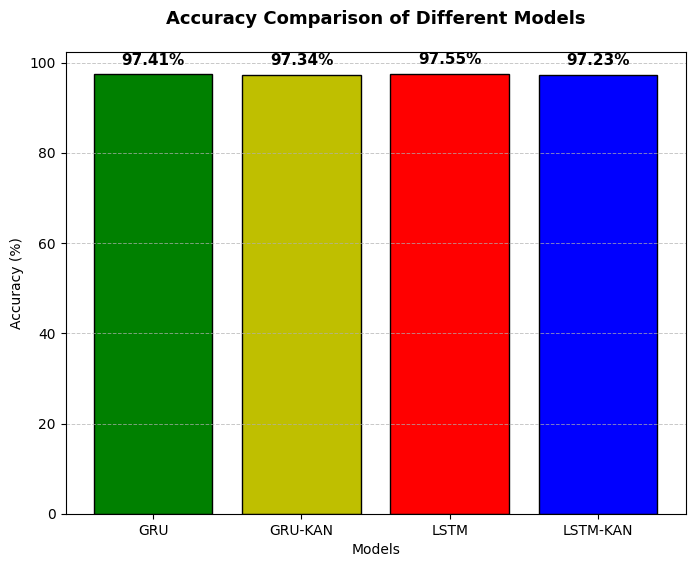

In [ ]:
import matplotlib.pyplot as plt


# Data for plotting (replace with your actual data)
models = ['GRU', 'GRU-KAN', 'LSTM', 'LSTM-KAN']
accuracies = [gru_accuracy, gru_kan_accuracy, lstm_accuracy, lstm_kan_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['g', 'y', 'r', 'b'], edgecolor='black', linewidth=1)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


# Set axis labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Different Models", fontsize=13, fontweight='bold', pad=20)

# # Add value labels on top of each bar
# for bar, accuracy in zip(bars, accuracies):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{accuracy:.2f}%", ha='center', va='bottom')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered alignment
        height + 1.5,  # Position slightly above the bar
        f"{height:.2f}%",  # Display accuracy percentage
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )


# Show the plot
plt.show()

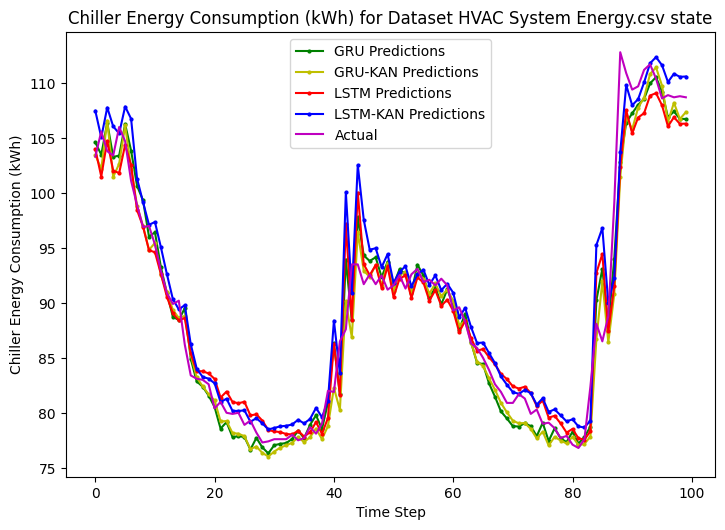

In [ ]:
import matplotlib.pyplot as plt

# Warna yang akan digunakan untuk plot
colors = ["g", "y", "r", "b", "m"]

plt.figure(figsize=(14, 10))

# Assuming all output lists (gru_outputs, gru_kan_outputs, etc.) have the same structure
num_states = len(states_list)  # Assuming states_list contains all desired states

# Loop through states and create subplots
for i in range(min(num_states, 4)):  # Limit to 4 subplots for now
    plt.subplot(2, 2, i + 1)

    # Access data for the current state (assuming it's the first element in the lists)
    gru_data = gru_outputs[0]  # Access data for the first (and only) state in the list
    gru_kan_data = gru_kan_outputs[0]
    lstm_data = lstm_outputs[0]
    lstm_kan_data = lstm_kan_outputs[0]
    target_data = targets[0]

    # Adjust data slicing based on subplot and data length
    if i == 0:
        data_slice = slice(-100, None)  # Last 100 data points
    elif i == 1:
        data_slice = slice(-50, None)  # Last 50 data points
    elif i == 2:
        data_slice = slice(None, 50)  # First 50 data points
    else:
        data_slice = slice(None, 100)  # First 100 data points

    plt.plot(gru_data[data_slice], "-o", color=colors[0], label="GRU Predictions", markersize=2)
    plt.plot(gru_kan_data[data_slice], "-o", color=colors[1], label="GRU-KAN Predictions", markersize=2)
    plt.plot(lstm_data[data_slice], "-o", color=colors[2], label="LSTM Predictions", markersize=2)
    plt.plot(lstm_kan_data[data_slice], "-o", color=colors[3], label="LSTM-KAN Predictions", markersize=2)
    plt.plot(target_data[data_slice], color=colors[4], label="Actual")

    plt.ylabel("Chiller Energy Consumption (kWh)")
    plt.xlabel("Time Step")
    plt.title(f"Chiller Energy Consumption (kWh) for {states_list[i]} state")  # Use state from states_list
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # visualisasi

# import matplotlib.pyplot as plt


# # Number of states to plot
# num_states_to_plot = min(len(states_list), 4)  # Limit to 4 for better visualization

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=num_states_to_plot, ncols=1, figsize=(10, 5 * num_states_to_plot))

# # Loop through the states and create individual plots
# for i, state in enumerate(states_list[:num_states_to_plot]):
#     ax = axes[i] if num_states_to_plot > 1 else axes

#     # Extract data for the current state
#     gru_data = gru_outputs[i]
#     gru_kan_data = gru_kan_outputs[i]
#     lstm_data = lstm_outputs[i]
#     lstm_kan_data = lstm_kan_outputs[i]
#     target_data = targets[i]

#     # Plot data
#     ax.plot(gru_data, label="GRU", marker='o', markersize=2, linewidth=1)
#     ax.plot(gru_kan_data, label="GRU-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_data, label="LSTM", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_kan_data, label="LSTM-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(target_data, label="Actual", linewidth=1.5)

#     # Set labels and title
#     plt.xlabel('Time Step')
#     ax.set_ylabel("Chiller Energy Consumption (kWh)")
#     ax.set_title(f"State: {state}")
#     ax.legend()

# plt.tight_layout()
# plt.show()

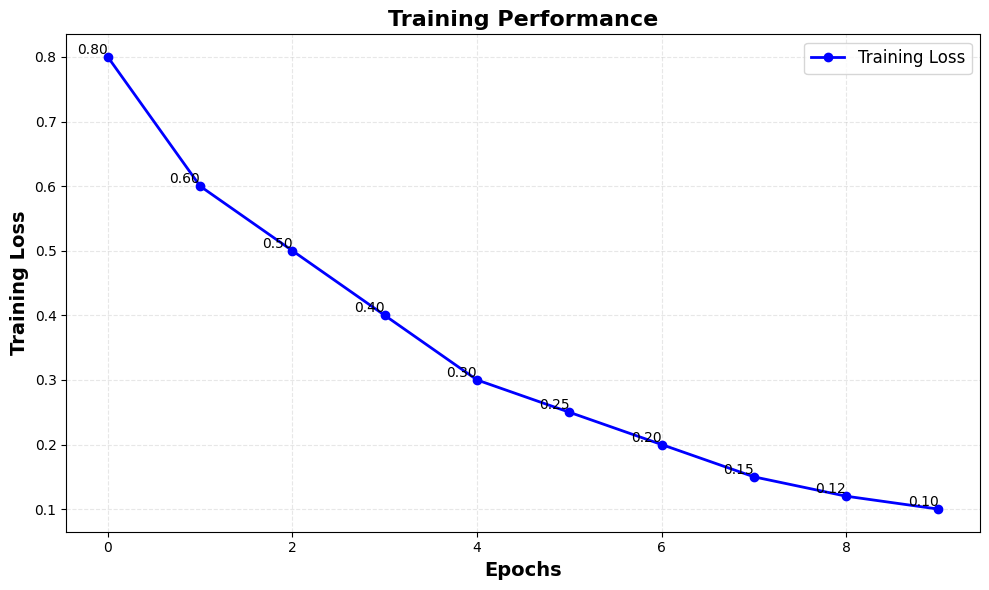

In [ ]:
import matplotlib.pyplot as plt

# Data contoh (ganti dengan data aktual dari proses pelatihan)
epochs = list(range(10))  # Epochs (0-9)
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]  # Training Loss per epoch

# Warna dan format garis
colors = ["g", "b", "r", "y", "m"]

# Membuat plot utama
plt.figure(figsize=(10, 6))

# Menambahkan plot training loss
plt.plot(
    epochs,
    training_loss,
    "-o",
    color=colors[1],
    label="Training Loss",
    markersize=6,
    linewidth=2
)

# Menambahkan detail pada grafik
plt.title("Training Performance", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Training Loss", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Anotasi nilai loss pada setiap titik
for epoch, loss in zip(epochs, training_loss):
    plt.text(epoch, loss, f"{loss:.2f}", fontsize=10, ha='right', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()


# Percobaan 4

fokus ke Learning Rate dan Jumlah Hidden Layer

In [ ]:
# Mengimpor modul untuk mengakses operasi sistem seperti mengelola file dan waktu.
import os
import time

# Mengimpor pustaka NumPy untuk komputasi numerik yang efisien.
import numpy as np

# Mengimpor pustaka Pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data, khususnya plot 2D.
import matplotlib.pyplot as plt

# Mengimpor pustaka PyTorch untuk pembuatan model deep learning.
import torch
import torch.nn as nn  # Modul PyTorch untuk membuat lapisan jaringan saraf.
from torch.utils.data import TensorDataset, DataLoader  # Modul untuk mengelola dataset dan batch data.
import torch.nn.functional as F  # Fungsi aktivasi dan fungsi lainnya yang umum digunakan pada jaringan saraf.

# Mengimpor modul untuk operasi matematika umum.
import math

# Mengimpor fungsi tqdm_notebook untuk menampilkan progress bar di Jupyter Notebook.
from tqdm.notebook import tqdm as tqdm_notebook

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi data.
from sklearn.preprocessing import MinMaxScaler

# Mengimpor modul random
import random


# Tambahkan fungsi `set_seed` untuk konsistensi hasil
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

# Tetapkan seed sebelum melanjutkan
set_seed(42)

In [ ]:
# Opsional proses ini bisa diskip

print(torch.__version__)  # Mencetak versi PyTorch yang digunakan.

2.5.1+cu121


In [ ]:
# Menentukan jalur direktori tempat file data berada.
data_dir = "/content/drive/MyDrive/Tesis/Dataset HVAC"  # Path ke direktori data di Google Colab atau lokal.

# Membaca file CSV yang berisi dataset ke dalam DataFrame menggunakan Pandas.
df = pd.read_csv("/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data.
df.head()


Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Building Load (RT)  Outside Temperature (F)  Dew Point (F)  Humidity (%)  
0               479.6                       82             75            79  
1               460.3                       82             75            79  
2               462.4                       82             75            79  
3               458.5                       82             75            79  
4               455.4                       82             75            79

In [ ]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index):
    """
    Fungsi untuk membentuk input dan label dengan jendela geser pada data time series.

    Parameters:
    - data: array numpy yang berisi data.
    - window_size: ukuran jendela (jumlah timestamp dalam setiap input).
    - inputs_cols_indices: indeks kolom yang ingin dimasukkan sebagai fitur input.
    - label_col_index: indeks kolom yang digunakan sebagai label output.

    Returns:
    - inputs: array numpy yang berisi input sequences berdasarkan jendela geser.
    - labels: array numpy yang berisi label untuk setiap sequence.
    """

    # Membuat array kosong untuk menyimpan input sequences dan label.
    # `inputs` akan memiliki dimensi (jumlah_instance, panjang_jendela, jumlah_fitur)
    inputs = np.zeros((len(data) - window_size, window_size, len(inputs_cols_indices)))
    # `labels` adalah array 1D yang akan menampung label untuk setiap sequence.
    labels = np.zeros(len(data) - window_size)

    # Iterasi melalui data untuk membentuk sequence input dan label
    for i in range(window_size, len(data)):
        # Mengambil data dalam jendela dan menambahkannya ke `inputs`
        inputs[i - window_size] = data[i - window_size : i, inputs_cols_indices]
        # Menetapkan nilai label dari kolom yang diinginkan
        labels[i - window_size] = data[i, label_col_index]

    # Mereshape `inputs` dan `labels` ke bentuk yang sesuai untuk model
    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)

    # Menampilkan bentuk (shape) dari `inputs` dan `labels` untuk verifikasi
    print(inputs.shape, labels.shape)

    return inputs, labels


In [ ]:
# Menetapkan indeks kolom label sebagai 0, yaitu kolom 'consumption' yang akan diprediksi.
label_col_index = 0  # Menggunakan 'consumption' sebagai label target.

# Menetapkan indeks kolom yang akan digunakan sebagai fitur input.
# Fitur yang dipilih adalah (consumption, hour, dayofweek, month, dayofyear).
inputs_cols_indices = range(5)  # Menggunakan kolom-kolom fitur dari indeks 0 hingga 4.

# Menetapkan ukuran jendela (window size) untuk mengatur panjang setiap sequence.
window_size = 90  # Panjang urutan yang akan dimasukkan sebagai input dalam model.

# Membuat dictionary untuk menyimpan objek scaler yang akan digunakan pada data label.
# Ini memungkinkan kita untuk melakukan normalisasi pada data pelatihan, dan nantinya mengembalikan data
# hasil prediksi dari model ke skala aslinya pada tahap evaluasi.
label_scalers = {}

# Inisialisasi list kosong untuk menampung data input pelatihan.
train_x = []

# Inisialisasi dictionary kosong untuk menampung data input dan label pengujian.
# Dictionary `test_x` akan menyimpan input pengujian, dan `test_y` untuk label pengujian.
test_x = {}
test_y = {}


In [ ]:
# Memilih file .csv dari direktori data dan menyimpannya ke dalam `processing_files`.
processing_files = [
    file for file in os.listdir(data_dir) if os.path.splitext(file)[1] == ".csv"
]

# Menentukan jumlah file yang akan digunakan untuk dataset
num_files_for_dataset = 5

# Memproses setiap file dalam daftar `processing_files` hingga jumlah yang ditentukan
for file in tqdm_notebook(processing_files[:num_files_for_dataset]):
    print(f"Processing {file} ...")

    # Membaca file .csv ke dalam DataFrame Pandas dan mengonversi kolom 'Tanggal' menjadi tipe tanggal
    df = pd.read_csv(os.path.join(data_dir, file), parse_dates=["Local Time (Timezone : GMT+8h)"])

    # Preprocessing
    # df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')  # Mengonversi kolom tanggal ke format datetime
    # df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year  # Menambahkan kolom 'Year' berdasarkan kolom 'Tanggal'
    # df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month  # Menambahkan kolom 'Month' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day  # Menambahkan kolom 'Day' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
    df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
    df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day
    df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour
    df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
    df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    # Normalisasi data input
    sc = MinMaxScaler()  # Inisialisasi scaler untuk input
    label_sc = MinMaxScaler()  # Inisialisasi scaler untuk label
    data = sc.fit_transform(df.values)  # Normalisasi data menggunakan MinMaxScaler

    # Menyimpan scaler untuk label agar bisa digunakan untuk mengembalikan nilai prediksi ke skala asli saat evaluasi
    label_sc.fit(df.iloc[:, label_col_index].values.reshape(-1, 1))
    label_scalers[file] = label_sc  # Menyimpan scaler label dalam dictionary

    # Membuat urutan input dan label menggunakan fungsi move_sliding_window
    inputs, labels = move_sliding_window(
        data,
        window_size,
        inputs_cols_indices=inputs_cols_indices,
        label_col_index=label_col_index,
    )

    # Menggabungkan instance yang dihasilkan dari semua file .csv.
    # Membagi data menjadi bagian pelatihan dan pengujian, lalu menggabungkannya ke dalam array tunggal.
    test_portion = int(0.1 * len(inputs))  # Menentukan bagian data untuk pengujian (10%)
    if len(train_x) == 0:  # Jika ini iterasi pertama
        train_x = inputs[:-test_portion]  # Menyimpan data pelatihan input
        train_y = labels[:-test_portion]  # Menyimpan data pelatihan label
    else:
        # Menggabungkan data pelatihan dari file saat ini dengan data pelatihan sebelumnya
        train_x = np.concatenate((train_x, inputs[:-test_portion]))
        train_y = np.concatenate((train_y, labels[:-test_portion]))

    # Menyimpan data pengujian untuk setiap file dalam dictionary `test_x` dan `test_y`
    test_x[file] = inputs[-test_portion:]
    test_y[file] = labels[-test_portion:]


  0%|          | 0/1 [00:00<?, ?it/s]

Processing Dataset HVAC System Energy.csv ...
(13525, 90, 5) (13525, 1)


In [ ]:
df

Chilled Water Rate (L/sec)  Building Load (RT)  \
0                            85.6               479.6   
1                            84.3               460.3   
2                            84.6               462.4   
3                            84.8               458.5   
4                            84.7               455.4   
...                           ...                 ...   
13610                       108.6               579.9   
13611                       108.9               567.3   
13612                       108.7               561.7   
13613                       108.8               566.0   
13614                       108.7               569.7   

       Outside Temperature (F)  Dew Point (F)  Humidity (%)  Year  Month  Day  \
0                           82             75            79  2019      8   18   
1                           82             75            79  2019      8   18   
2                           82             75            79  2019      8   18   
3                           82             75            79  2019      8   18   
4                           82             75            79  2019      8   18   
...                        ...            ...           ...   ...    ...  ...   
13610                       84             75            74  2020      6    1   
13611                       84             75            74  2020      6    1   
13612                       82             75            79  2020      6    1   
13613                       82             77            84  2020      6    1   
13614                       82             75            79  2020      6    1   

       Hour  DayOfWeek  
0         0          6  
1         0          6  
2         1          6  
3         1          6  
4         2          6  
...     ...        ...  
13610    11          0  
13611    11          0  
13612    12          0  
13613    12          0  
13614    13          0  

[13615 rows x 10 columns]

In [ ]:
# Memeriksa bentuk (shape) dari data pelatihan dan data pengujian.
# Menggunakan nama file "dataset_clean_baru.csv" sebagai kunci untuk test_x.
train_x.shape, test_x["Dataset HVAC System Energy.csv"].shape

((12173, 90, 5), (1352, 90, 5))

In [ ]:
# Menetapkan ukuran batch untuk pemrosesan dalam model.
batch_size = 100

# Membuat TensorDataset dari data pelatihan, mengonversi `train_x` dan `train_y` menjadi tensor PyTorch.
# `train_x` berisi fitur-fitur input, dan `train_y` berisi label target.
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# Membuat DataLoader untuk memuat data secara batch dengan parameter berikut:
# - `shuffle=True`: Mengacak urutan data di setiap epoch untuk meningkatkan generalisasi model.
# - `batch_size=batch_size`: Mengatur ukuran batch menjadi 100.
# - `drop_last=True`: Mengabaikan batch terakhir jika ukurannya tidak sesuai dengan `batch_size`,
#   memastikan semua batch memiliki ukuran yang sama.
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=True
)


In [ ]:
# Mencetak ukuran data pelatihan, ukuran batch, dan jumlah iterasi per epoch.
print(
    f"Train Size: {train_x.shape}, Batch Size: {batch_size}, # of iterations per epoch: {int(train_x.shape[0] / batch_size)}"
)


Train Size: (12173, 90, 5), Batch Size: 100, # of iterations per epoch: 121


In [ ]:
# Membebaskan memori dengan menghapus variabel `train_x` dan `train_y`.
del train_x, train_y


In [ ]:
# Memeriksa ketersediaan GPU.
# Jika GPU tersedia, `torch.cuda.is_available()` akan mengembalikan True, jika tidak akan mengembalikan False.
is_cuda = torch.cuda.is_available()

# Menetapkan device yang akan digunakan untuk menjalankan model berdasarkan ketersediaan GPU.
if is_cuda:
    device = torch.device("cuda")  # Mengatur device ke GPU
    print("GPU is available")       # Mencetak pesan jika GPU tersedia
else:
    device = torch.device("cpu")    # Mengatur device ke CPU jika GPU tidak tersedia


GPU is available


In [ ]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        # Menyimpan parameter input dan output
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        # Membuat grid untuk basis fungsi B-spline
        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        # Membuat bobot untuk komponen linier dasar dan komponen spline
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        # Mengatur parameter skala dan aktivasi untuk spline
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        # Menginisialisasi parameter
        self.reset_parameters()

    def reset_parameters(self):
        # Menginisialisasi bobot linier dasar dan bobot spline dengan kaiming_uniform
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 0.5) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        # Menghitung basis fungsi B-spline
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        # Menyelesaikan koefisien spline dari titik input
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        # Mengatur skala bobot spline
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        # Fungsi forward untuk lapisan KANLinear
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        # Memperbarui grid spline adaptif berdasarkan input x
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        # Menghitung kehilangan regulasi berdasarkan aktivasi dan entropi
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.4):
        super(GRUNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Mendefinisikan lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output GRU ke dimensi output yang diinginkan
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Melakukan forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output pada timestep terakhir dan meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output akhir dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

# 2. GRUNetKAN
# Mirip dengan GRUNet, tetapi menggantikan lapisan linier dengan KANLinear untuk menambah fleksibilitas.
class GRUNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.4):
        super(GRUNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.4):
        super(LSTMNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output dari LSTM ke dimensi output
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

# LSTMNetKAN
# Mirip dengan LSTMNet, tetapi menggantikan lapisan linier dengan KANLinear untuk mengembangkan fleksibilitas dan kemampuan representasi.
class LSTMNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.4):
        super(LSTMNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden


In [ ]:
def train(
    train_loader,
    learn_rate,
    hidden_dim=100,
    n_layers=5,
    n_epochs=10,
    model_type="GRU",
    print_every=100,
):
    # Mengambil dimensi input dari train_loader
    input_dim = next(iter(train_loader))[0].shape[2]  # 5
    output_dim = 1  # Definisi dimensi output

    # Inisialisasi model sesuai jenisnya
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "GRUKAN":
        model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)  # Pindahkan model ke perangkat

    # Definisi loss function dan optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # Memulai proses training
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []

    # Loop melalui jumlah epoch
    for epoch in range(1, n_epochs + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.0
        counter = 0

        # Iterasi melalui batch data
        for x, label in train_loader:
            counter += 1

            # Reset hidden state sesuai model yang digunakan
            if model_type == "GRU" or model_type == "GRUKAN":
                h = h.data
            elif model_type == "LSTM" or model_type == "LSTMKAN":
                h = tuple([e.data for e in h])

            model.zero_grad()  # Reset gradien

            # Forward pass
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())

            # Backpropagation dan optimisasi
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Menambahkan loss untuk perhitungan rata-rata
            if counter % print_every == 0:
                print(
                    f"Epoch {epoch} - Step: {counter}/{len(train_loader)} - Average Loss for Epoch: {avg_loss/counter}"
                )

        current_time = time.process_time()
        print(
            f"Epoch {epoch}/{n_epochs} Done, Total Loss: {avg_loss/len(train_loader)}"
        )
        print(f"Time Elapsed for Epoch: {current_time-start_time} seconds")
        epoch_times.append(current_time - start_time)

    # Menghitung total waktu pelatihan
    print(f"Total Training Time: {sum(epoch_times)} seconds")
    return model


In [ ]:
# Tetapkan seed
set_seed(42)

# Parameter pelatihan
seq_len = 90  # Panjang sequence atau jumlah timestamps
n_hidden = 100  # Ukuran hidden layer
n_layers = 5  # Jumlah lapisan RNN
n_epochs = 10  # Jumlah epoch
print_every = 100  # Frekuensi menampilkan loss
lr = 0.004  # Learning rate

# Memanggil fungsi train untuk melatih model GRU
gru_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch
    model_type="GRU",    # Tipe model (di sini menggunakan GRU)
    print_every=print_every # Frekuensi print loss selama pelatihan
)


Starting Training of GRU model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.018061264804564416
Epoch 1/10 Done, Total Loss: 0.016100339680017273
Time Elapsed for Epoch: 1.3048569810000004 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007295398127753288
Epoch 2/10 Done, Total Loss: 0.0071779503005995485
Time Elapsed for Epoch: 1.2449131380000011 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006210038007702678
Epoch 3/10 Done, Total Loss: 0.006104132478040728
Time Elapsed for Epoch: 1.2497546290000088 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005593253988772631
Epoch 4/10 Done, Total Loss: 0.005595232462048654
Time Elapsed for Epoch: 1.2089370309999907 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005770734788384289
Epoch 5/10 Done, Total Loss: 0.005706284035474431
Time Elapsed for Epoch: 1.191406661000002 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.00534043105551973
Epoch 6/10 Done, Total Loss: 0.00543585

In [ ]:
# Menyimpan parameter model yang sudah dilatih ke file
torch.save(gru_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRU4.pth')


In [ ]:
# melatih model dengan tipe GRUKAN
# Parameter seq_len (sequence length) untuk model, yaitu jumlah timestamps
seq_len = 90

# Memanggil fungsi train untuk melatih model GRUKAN
gru_kan_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch untuk pelatihan
    model_type="GRUKAN", # Tipe model (di sini menggunakan GRUKAN)
    print_every=print_every # Frekuensi menampilkan loss selama pelatihan
)


Starting Training of GRUKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.019759501949883997
Epoch 1/10 Done, Total Loss: 0.01760350783309353
Time Elapsed for Epoch: 1.550706756000011 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.00661992508918047
Epoch 2/10 Done, Total Loss: 0.006535252252178005
Time Elapsed for Epoch: 1.4801329219999957 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006240173794794828
Epoch 3/10 Done, Total Loss: 0.006152224905927442
Time Elapsed for Epoch: 1.4974960380000084 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005753479625564068
Epoch 4/10 Done, Total Loss: 0.005670016629559811
Time Elapsed for Epoch: 1.4977857080000092 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005365188325522467
Epoch 5/10 Done, Total Loss: 0.0054950528876271006
Time Elapsed for Epoch: 1.3377607540000156 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005287882150150835
Epoch 6/10 Done, Total Loss: 0.005294

In [ ]:
# Menyimpan parameter model GRUKAN yang telah dilatih ke dalam file
torch.save(gru_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRUkan4.pth')


In [ ]:
lstm_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTM",
    print_every=print_every,
)

Starting Training of LSTM model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.028924527037888767
Epoch 1/10 Done, Total Loss: 0.025815615680622905
Time Elapsed for Epoch: 1.4438760139999829 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.008157256876584142
Epoch 2/10 Done, Total Loss: 0.0079978142907335
Time Elapsed for Epoch: 1.657720581999996 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006803129338659346
Epoch 3/10 Done, Total Loss: 0.006654840772817573
Time Elapsed for Epoch: 1.7405863330000102 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.0060296247084625065
Epoch 4/10 Done, Total Loss: 0.006077105951041353
Time Elapsed for Epoch: 1.7186504339999829 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.0059279121900908645
Epoch 5/10 Done, Total Loss: 0.005896835726462613
Time Elapsed for Epoch: 1.6373461900000166 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005647543894592672
Epoch 6/10 Done, Total Loss: 0.0056237

In [ ]:
torch.save(lstm_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm4.pth')

In [ ]:
lstm_kan_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTMKAN",
    print_every=print_every,
)

Starting Training of LSTMKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.03576332680881023
Epoch 1/10 Done, Total Loss: 0.031999842186789376
Time Elapsed for Epoch: 1.6860421069999916 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.008703608456999063
Epoch 2/10 Done, Total Loss: 0.008499041426742127
Time Elapsed for Epoch: 1.6685694459999922 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.0068630412500351665
Epoch 3/10 Done, Total Loss: 0.006770965525849669
Time Elapsed for Epoch: 1.9432219450000048 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006499615171924234
Epoch 4/10 Done, Total Loss: 0.006327822989176128
Time Elapsed for Epoch: 1.8983342080000227 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005917426757514476
Epoch 5/10 Done, Total Loss: 0.005904680726018326
Time Elapsed for Epoch: 1.8258718449999947 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005638545751571656
Epoch 6/10 Done, Total Loss: 0.005

In [ ]:
torch.save(lstm_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm_kan4.pth')

In [ ]:
!nvidia-smi

Tue Dec 10 05:39:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0              29W /  70W |   3353MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# move device to cpu for evaluation to avoid GPU memory run
device = "cpu"

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 5
gru_model2 = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU4.pth"))

<ipython-input-124-8fe0112b56cf>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU4.pth"))

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_model.to(device)

GRUNet(
  (gru): GRU(5, 100, num_layers=5, batch_first=True, dropout=0.4)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 5
gru_kan_model2 = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan4.pth"))

<ipython-input-126-e9667f5689e6>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan4

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_kan_model2.to(device)

GRUNetKAN(
  (gru): GRU(5, 100, num_layers=5, batch_first=True, dropout=0.4)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 5
lstm_model2 = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm4.pth"))

<ipython-input-128-fc482f29dcf7>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm4.pth"

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_model2.to(device)

LSTMNet(
  (lstm): LSTM(5, 100, num_layers=5, batch_first=True, dropout=0.4)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 5
lstm_kan_model2 = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_kan4.pth"))

<ipython-input-130-e0c15c9827be>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_k

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_kan_model2.to(device)

LSTMNetKAN(
  (lstm): LSTM(5, 100, num_layers=5, batch_first=True, dropout=0.4)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
def sMAPE(outputs, targets):
    sMAPE = (
        100
        / len(targets)
        * np.sum(np.abs(outputs - targets) / (np.abs(outputs + targets)) / 2)
    )
    return sMAPE

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate(model, test_x, test_y, label_scalers):
    model.to(device)
    outputs = []
    targets = []
    start_time = time.process_time()
    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    print(f"Evaluation Time: {time.process_time()-start_time}")
    print(f"sMAPE: {round(sMAPE(concatenated_outputs, concatenated_targets), 3)}%")

    # list of of targets/outputs for each state
    return outputs, targets, sMAPE

In [ ]:
# Evaluate Performance GRU with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    # Move the model to the device before the loop
    model.to(device)
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

Evaluation Time: 0.019260112000011986
MAE: 2.928
RMSE: 4.605
R²: 0.779


In [ ]:
# ipython-input-196-53ac28a8cb99
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

# Since you want to calculate sMAPE for the GRU model, you can call the sMAPE function separately:
gru_sMAPE = sMAPE(np.concatenate(gru_outputs), np.concatenate(targets))
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.01559673099998804
MAE: 2.928
RMSE: 4.605
R²: 0.779
GRU sMAPE: 0.754%


In [ ]:
#Evaluate Performance GRUKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.02956385600000999
MAE: 2.928
RMSE: 4.605
R²: 0.779
GRU sMAPE: 0.754%


In [ ]:
# Evaluate Performance LSTM with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTM sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.021721089999999776
MAE: 2.928
RMSE: 4.605
R²: 0.779
LSTM sMAPE: 0.754%


In [ ]:
# Evaluate Performance LSTMKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def calculate_mae(outputs, targets): # Renamed to avoid conflict
    return np.mean(np.abs(outputs - targets))

def calculate_rmse(outputs, targets): # Renamed to avoid conflict
    return np.sqrt(np.mean((outputs - targets) ** 2))

def calculate_r2(outputs, targets): # Renamed to avoid conflict
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2 using the renamed functions
    mae_value = calculate_mae(concatenated_outputs, concatenated_targets)
    rmse_value = calculate_rmse(concatenated_outputs, concatenated_targets)
    r2_value = calculate_r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTMKAN sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.024764892999996846
MAE: 2.928
RMSE: 4.605
R²: 0.779
LSTMKAN sMAPE: 0.754%


In [ ]:
states_list = list(test_x.keys())

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung akurasi dalam bentuk persentase
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Hitung MAPE
    accuracy = 100 - (mape * 100)  # Akurasi sebagai 100% - MAPE
    return accuracy

print("\nEksperimen 4")
# Evaluate GRU model
print("\nEvaluate Model GRU:")
gru_outputs, gru_targets, _, _, _ = evaluate(gru_model, test_x, test_y, label_scalers)
gru_accuracy = calculate_accuracy(gru_targets, gru_outputs)
print(f"GRU Accuracy: {gru_accuracy:.2f}%")

# Evaluate GRU-KAN model
print("\nEvaluate Model GRU-KAN:")
gru_kan_outputs, gru_kan_targets, _, _, _ = evaluate(gru_kan_model, test_x, test_y, label_scalers)
gru_kan_accuracy = calculate_accuracy(gru_kan_targets, gru_kan_outputs)
print(f"GRU-KAN Accuracy: {gru_kan_accuracy:.2f}%")

# Evaluate LSTM model
print("\nEvaluate Model LSTM:")
lstm_outputs, lstm_targets, _, _, _ = evaluate(lstm_model, test_x, test_y, label_scalers)
lstm_accuracy = calculate_accuracy(lstm_targets, lstm_outputs)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Evaluate LSTM-KAN model
print("\nEvaluate Model LSTM-KAN:")
lstm_kan_outputs, lstm_kan_targets, _, _, _ = evaluate(lstm_kan_model, test_x, test_y, label_scalers)
lstm_kan_accuracy = calculate_accuracy(lstm_kan_targets, lstm_kan_outputs)
print(f"LSTM-KAN Accuracy: {lstm_kan_accuracy:.2f}%")



Eksperimen 4

Evaluate Model GRU:
Evaluation Time: 0.01739704400000619
MAE: 2.928
RMSE: 4.605
R²: 0.779
GRU Accuracy: 96.93%

Evaluate Model GRU-KAN:
Evaluation Time: 0.017561800000009953
MAE: 3.358
RMSE: 4.836
R²: 0.757
GRU-KAN Accuracy: 96.43%

Evaluate Model LSTM:
Evaluation Time: 0.025660177000020212
MAE: 3.147
RMSE: 4.795
R²: 0.761
LSTM Accuracy: 96.65%

Evaluate Model LSTM-KAN:
Evaluation Time: 0.02164032300001395
MAE: 2.733
RMSE: 4.414
R²: 0.797
LSTM-KAN Accuracy: 97.14%


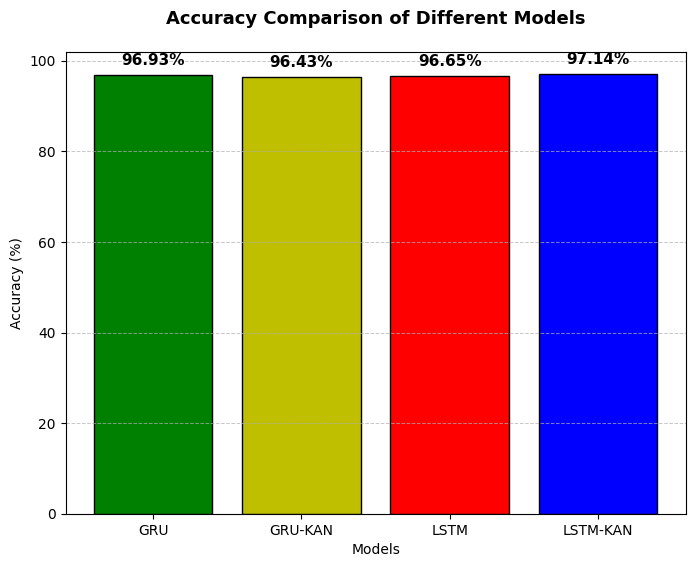

In [ ]:
import matplotlib.pyplot as plt


# Data for plotting (replace with your actual data)
models = ['GRU', 'GRU-KAN', 'LSTM', 'LSTM-KAN']
accuracies = [gru_accuracy, gru_kan_accuracy, lstm_accuracy, lstm_kan_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['g', 'y', 'r', 'b'], edgecolor='black', linewidth=1)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


# Set axis labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Different Models", fontsize=13, fontweight='bold', pad=20)

# # Add value labels on top of each bar
# for bar, accuracy in zip(bars, accuracies):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{accuracy:.2f}%", ha='center', va='bottom')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered alignment
        height + 1.5,  # Position slightly above the bar
        f"{height:.2f}%",  # Display accuracy percentage
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )


# Show the plot
plt.show()

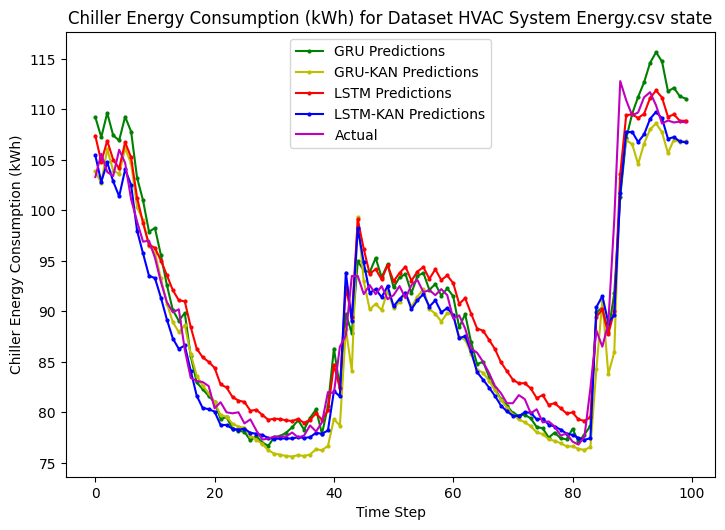

In [ ]:
import matplotlib.pyplot as plt

# Warna yang akan digunakan untuk plot
colors = ["g", "y", "r", "b", "m"]

plt.figure(figsize=(14, 10))

# Assuming all output lists (gru_outputs, gru_kan_outputs, etc.) have the same structure
num_states = len(states_list)  # Assuming states_list contains all desired states

# Loop through states and create subplots
for i in range(min(num_states, 4)):  # Limit to 4 subplots for now
    plt.subplot(2, 2, i + 1)

    # Access data for the current state (assuming it's the first element in the lists)
    gru_data = gru_outputs[0]  # Access data for the first (and only) state in the list
    gru_kan_data = gru_kan_outputs[0]
    lstm_data = lstm_outputs[0]
    lstm_kan_data = lstm_kan_outputs[0]
    target_data = targets[0]

    # Adjust data slicing based on subplot and data length
    if i == 0:
        data_slice = slice(-100, None)  # Last 100 data points
    elif i == 1:
        data_slice = slice(-50, None)  # Last 50 data points
    elif i == 2:
        data_slice = slice(None, 50)  # First 50 data points
    else:
        data_slice = slice(None, 100)  # First 100 data points

    plt.plot(gru_data[data_slice], "-o", color=colors[0], label="GRU Predictions", markersize=2)
    plt.plot(gru_kan_data[data_slice], "-o", color=colors[1], label="GRU-KAN Predictions", markersize=2)
    plt.plot(lstm_data[data_slice], "-o", color=colors[2], label="LSTM Predictions", markersize=2)
    plt.plot(lstm_kan_data[data_slice], "-o", color=colors[3], label="LSTM-KAN Predictions", markersize=2)
    plt.plot(target_data[data_slice], color=colors[4], label="Actual")

    plt.ylabel("Chiller Energy Consumption (kWh)")
    plt.xlabel("Time Step")
    plt.title(f"Chiller Energy Consumption (kWh) for {states_list[i]} state")  # Use state from states_list
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # visualisasi

# import matplotlib.pyplot as plt


# # Number of states to plot
# num_states_to_plot = min(len(states_list), 4)  # Limit to 4 for better visualization

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=num_states_to_plot, ncols=1, figsize=(10, 5 * num_states_to_plot))

# # Loop through the states and create individual plots
# for i, state in enumerate(states_list[:num_states_to_plot]):
#     ax = axes[i] if num_states_to_plot > 1 else axes

#     # Extract data for the current state
#     gru_data = gru_outputs[i]
#     gru_kan_data = gru_kan_outputs[i]
#     lstm_data = lstm_outputs[i]
#     lstm_kan_data = lstm_kan_outputs[i]
#     target_data = targets[i]

#     # Plot data
#     ax.plot(gru_data, label="GRU", marker='o', markersize=2, linewidth=1)
#     ax.plot(gru_kan_data, label="GRU-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_data, label="LSTM", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_kan_data, label="LSTM-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(target_data, label="Actual", linewidth=1.5)

#     # Set labels and title
#     plt.xlabel('Time Step')
#     ax.set_ylabel("Chiller Energy Consumption (kWh)")
#     ax.set_title(f"State: {state}")
#     ax.legend()

# plt.tight_layout()
# plt.show()

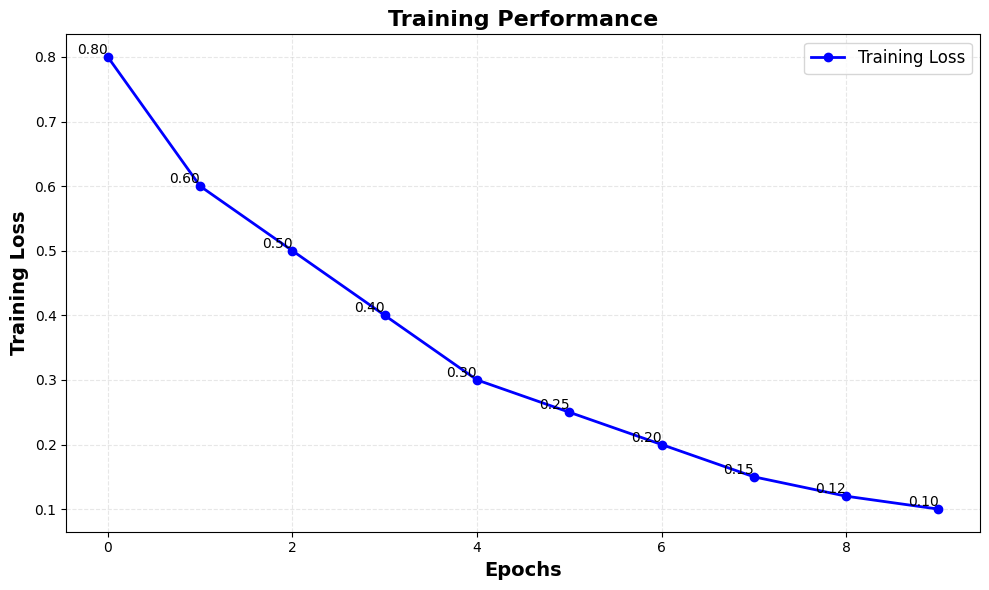

In [ ]:
import matplotlib.pyplot as plt

# Data contoh (ganti dengan data aktual dari proses pelatihan)
epochs = list(range(10))  # Epochs (0-9)
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]  # Training Loss per epoch

# Warna dan format garis
colors = ["g", "b", "r", "y", "m"]

# Membuat plot utama
plt.figure(figsize=(10, 6))

# Menambahkan plot training loss
plt.plot(
    epochs,
    training_loss,
    "-o",
    color=colors[1],
    label="Training Loss",
    markersize=6,
    linewidth=2
)

# Menambahkan detail pada grafik
plt.title("Training Performance", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Training Loss", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Anotasi nilai loss pada setiap titik
for epoch, loss in zip(epochs, training_loss):
    plt.text(epoch, loss, f"{loss:.2f}", fontsize=10, ha='right', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()


# Percobaan 5

fokus ke Learning Rate dan Jumlah Hidden Layer

In [ ]:
# Mengimpor modul untuk mengakses operasi sistem seperti mengelola file dan waktu.
import os
import time

# Mengimpor pustaka NumPy untuk komputasi numerik yang efisien.
import numpy as np

# Mengimpor pustaka Pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data, khususnya plot 2D.
import matplotlib.pyplot as plt

# Mengimpor pustaka PyTorch untuk pembuatan model deep learning.
import torch
import torch.nn as nn  # Modul PyTorch untuk membuat lapisan jaringan saraf.
from torch.utils.data import TensorDataset, DataLoader  # Modul untuk mengelola dataset dan batch data.
import torch.nn.functional as F  # Fungsi aktivasi dan fungsi lainnya yang umum digunakan pada jaringan saraf.

# Mengimpor modul untuk operasi matematika umum.
import math

# Mengimpor fungsi tqdm_notebook untuk menampilkan progress bar di Jupyter Notebook.
from tqdm.notebook import tqdm as tqdm_notebook

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi data.
from sklearn.preprocessing import MinMaxScaler

# Mengimpor modul random
import random


# Tambahkan fungsi `set_seed` untuk konsistensi hasil
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

# Tetapkan seed sebelum melanjutkan
set_seed(42)

In [ ]:
# Opsional proses ini bisa diskip

print(torch.__version__)  # Mencetak versi PyTorch yang digunakan.

2.5.1+cu121


In [ ]:
# Menentukan jalur direktori tempat file data berada.
data_dir = "/content/drive/MyDrive/Tesis/Dataset HVAC"  # Path ke direktori data di Google Colab atau lokal.

# Membaca file CSV yang berisi dataset ke dalam DataFrame menggunakan Pandas.
df = pd.read_csv("/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data.
df.head()


Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Building Load (RT)  Outside Temperature (F)  Dew Point (F)  Humidity (%)  
0               479.6                       82             75            79  
1               460.3                       82             75            79  
2               462.4                       82             75            79  
3               458.5                       82             75            79  
4               455.4                       82             75            79

In [ ]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index):
    """
    Fungsi untuk membentuk input dan label dengan jendela geser pada data time series.

    Parameters:
    - data: array numpy yang berisi data.
    - window_size: ukuran jendela (jumlah timestamp dalam setiap input).
    - inputs_cols_indices: indeks kolom yang ingin dimasukkan sebagai fitur input.
    - label_col_index: indeks kolom yang digunakan sebagai label output.

    Returns:
    - inputs: array numpy yang berisi input sequences berdasarkan jendela geser.
    - labels: array numpy yang berisi label untuk setiap sequence.
    """

    # Membuat array kosong untuk menyimpan input sequences dan label.
    # `inputs` akan memiliki dimensi (jumlah_instance, panjang_jendela, jumlah_fitur)
    inputs = np.zeros((len(data) - window_size, window_size, len(inputs_cols_indices)))
    # `labels` adalah array 1D yang akan menampung label untuk setiap sequence.
    labels = np.zeros(len(data) - window_size)

    # Iterasi melalui data untuk membentuk sequence input dan label
    for i in range(window_size, len(data)):
        # Mengambil data dalam jendela dan menambahkannya ke `inputs`
        inputs[i - window_size] = data[i - window_size : i, inputs_cols_indices]
        # Menetapkan nilai label dari kolom yang diinginkan
        labels[i - window_size] = data[i, label_col_index]

    # Mereshape `inputs` dan `labels` ke bentuk yang sesuai untuk model
    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)

    # Menampilkan bentuk (shape) dari `inputs` dan `labels` untuk verifikasi
    print(inputs.shape, labels.shape)

    return inputs, labels


In [ ]:
# Menetapkan indeks kolom label sebagai 0, yaitu kolom 'consumption' yang akan diprediksi.
label_col_index = 0  # Menggunakan 'consumption' sebagai label target.

# Menetapkan indeks kolom yang akan digunakan sebagai fitur input.
# Fitur yang dipilih adalah (consumption, hour, dayofweek, month, dayofyear).
inputs_cols_indices = range(5)  # Menggunakan kolom-kolom fitur dari indeks 0 hingga 4.

# Menetapkan ukuran jendela (window size) untuk mengatur panjang setiap sequence.
window_size = 90  # Panjang urutan yang akan dimasukkan sebagai input dalam model.

# Membuat dictionary untuk menyimpan objek scaler yang akan digunakan pada data label.
# Ini memungkinkan kita untuk melakukan normalisasi pada data pelatihan, dan nantinya mengembalikan data
# hasil prediksi dari model ke skala aslinya pada tahap evaluasi.
label_scalers = {}

# Inisialisasi list kosong untuk menampung data input pelatihan.
train_x = []

# Inisialisasi dictionary kosong untuk menampung data input dan label pengujian.
# Dictionary `test_x` akan menyimpan input pengujian, dan `test_y` untuk label pengujian.
test_x = {}
test_y = {}


In [ ]:
# Memilih file .csv dari direktori data dan menyimpannya ke dalam `processing_files`.
processing_files = [
    file for file in os.listdir(data_dir) if os.path.splitext(file)[1] == ".csv"
]

# Menentukan jumlah file yang akan digunakan untuk dataset
num_files_for_dataset = 5

# Memproses setiap file dalam daftar `processing_files` hingga jumlah yang ditentukan
for file in tqdm_notebook(processing_files[:num_files_for_dataset]):
    print(f"Processing {file} ...")

    # Membaca file .csv ke dalam DataFrame Pandas dan mengonversi kolom 'Tanggal' menjadi tipe tanggal
    df = pd.read_csv(os.path.join(data_dir, file), parse_dates=["Local Time (Timezone : GMT+8h)"])

    # Preprocessing
    # df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')  # Mengonversi kolom tanggal ke format datetime
    # df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year  # Menambahkan kolom 'Year' berdasarkan kolom 'Tanggal'
    # df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month  # Menambahkan kolom 'Month' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day  # Menambahkan kolom 'Day' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
    df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
    df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day
    df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour
    df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
    df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    # Normalisasi data input
    sc = MinMaxScaler()  # Inisialisasi scaler untuk input
    label_sc = MinMaxScaler()  # Inisialisasi scaler untuk label
    data = sc.fit_transform(df.values)  # Normalisasi data menggunakan MinMaxScaler

    # Menyimpan scaler untuk label agar bisa digunakan untuk mengembalikan nilai prediksi ke skala asli saat evaluasi
    label_sc.fit(df.iloc[:, label_col_index].values.reshape(-1, 1))
    label_scalers[file] = label_sc  # Menyimpan scaler label dalam dictionary

    # Membuat urutan input dan label menggunakan fungsi move_sliding_window
    inputs, labels = move_sliding_window(
        data,
        window_size,
        inputs_cols_indices=inputs_cols_indices,
        label_col_index=label_col_index,
    )

    # Menggabungkan instance yang dihasilkan dari semua file .csv.
    # Membagi data menjadi bagian pelatihan dan pengujian, lalu menggabungkannya ke dalam array tunggal.
    test_portion = int(0.1 * len(inputs))  # Menentukan bagian data untuk pengujian (10%)
    if len(train_x) == 0:  # Jika ini iterasi pertama
        train_x = inputs[:-test_portion]  # Menyimpan data pelatihan input
        train_y = labels[:-test_portion]  # Menyimpan data pelatihan label
    else:
        # Menggabungkan data pelatihan dari file saat ini dengan data pelatihan sebelumnya
        train_x = np.concatenate((train_x, inputs[:-test_portion]))
        train_y = np.concatenate((train_y, labels[:-test_portion]))

    # Menyimpan data pengujian untuk setiap file dalam dictionary `test_x` dan `test_y`
    test_x[file] = inputs[-test_portion:]
    test_y[file] = labels[-test_portion:]


  0%|          | 0/1 [00:00<?, ?it/s]

Processing Dataset HVAC System Energy.csv ...
(13525, 90, 5) (13525, 1)


In [ ]:
df

Chilled Water Rate (L/sec)  Building Load (RT)  \
0                            85.6               479.6   
1                            84.3               460.3   
2                            84.6               462.4   
3                            84.8               458.5   
4                            84.7               455.4   
...                           ...                 ...   
13610                       108.6               579.9   
13611                       108.9               567.3   
13612                       108.7               561.7   
13613                       108.8               566.0   
13614                       108.7               569.7   

       Outside Temperature (F)  Dew Point (F)  Humidity (%)  Year  Month  Day  \
0                           82             75            79  2019      8   18   
1                           82             75            79  2019      8   18   
2                           82             75            79  2019      8   18   
3                           82             75            79  2019      8   18   
4                           82             75            79  2019      8   18   
...                        ...            ...           ...   ...    ...  ...   
13610                       84             75            74  2020      6    1   
13611                       84             75            74  2020      6    1   
13612                       82             75            79  2020      6    1   
13613                       82             77            84  2020      6    1   
13614                       82             75            79  2020      6    1   

       Hour  DayOfWeek  
0         0          6  
1         0          6  
2         1          6  
3         1          6  
4         2          6  
...     ...        ...  
13610    11          0  
13611    11          0  
13612    12          0  
13613    12          0  
13614    13          0  

[13615 rows x 10 columns]

In [ ]:
# Memeriksa bentuk (shape) dari data pelatihan dan data pengujian.
# Menggunakan nama file "dataset_clean_baru.csv" sebagai kunci untuk test_x.
train_x.shape, test_x["Dataset HVAC System Energy.csv"].shape

((12173, 90, 5), (1352, 90, 5))

In [ ]:
# Menetapkan ukuran batch untuk pemrosesan dalam model.
batch_size = 100

# Membuat TensorDataset dari data pelatihan, mengonversi `train_x` dan `train_y` menjadi tensor PyTorch.
# `train_x` berisi fitur-fitur input, dan `train_y` berisi label target.
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# Membuat DataLoader untuk memuat data secara batch dengan parameter berikut:
# - `shuffle=True`: Mengacak urutan data di setiap epoch untuk meningkatkan generalisasi model.
# - `batch_size=batch_size`: Mengatur ukuran batch menjadi 100.
# - `drop_last=True`: Mengabaikan batch terakhir jika ukurannya tidak sesuai dengan `batch_size`,
#   memastikan semua batch memiliki ukuran yang sama.
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=True
)


In [ ]:
# Mencetak ukuran data pelatihan, ukuran batch, dan jumlah iterasi per epoch.
print(
    f"Train Size: {train_x.shape}, Batch Size: {batch_size}, # of iterations per epoch: {int(train_x.shape[0] / batch_size)}"
)


Train Size: (12173, 90, 5), Batch Size: 100, # of iterations per epoch: 121


In [ ]:
# Membebaskan memori dengan menghapus variabel `train_x` dan `train_y`.
del train_x, train_y


In [ ]:
# Memeriksa ketersediaan GPU.
# Jika GPU tersedia, `torch.cuda.is_available()` akan mengembalikan True, jika tidak akan mengembalikan False.
is_cuda = torch.cuda.is_available()

# Menetapkan device yang akan digunakan untuk menjalankan model berdasarkan ketersediaan GPU.
if is_cuda:
    device = torch.device("cuda")  # Mengatur device ke GPU
    print("GPU is available")       # Mencetak pesan jika GPU tersedia
else:
    device = torch.device("cpu")    # Mengatur device ke CPU jika GPU tidak tersedia


GPU is available


In [ ]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        # Menyimpan parameter input dan output
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        # Membuat grid untuk basis fungsi B-spline
        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        # Membuat bobot untuk komponen linier dasar dan komponen spline
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        # Mengatur parameter skala dan aktivasi untuk spline
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        # Menginisialisasi parameter
        self.reset_parameters()

    def reset_parameters(self):
        # Menginisialisasi bobot linier dasar dan bobot spline dengan kaiming_uniform
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 0.5) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        # Menghitung basis fungsi B-spline
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        # Menyelesaikan koefisien spline dari titik input
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        # Mengatur skala bobot spline
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        # Fungsi forward untuk lapisan KANLinear
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        # Memperbarui grid spline adaptif berdasarkan input x
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        # Menghitung kehilangan regulasi berdasarkan aktivasi dan entropi
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super(GRUNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Mendefinisikan lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output GRU ke dimensi output yang diinginkan
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Melakukan forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output pada timestep terakhir dan meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output akhir dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

# 2. GRUNetKAN
# Mirip dengan GRUNet, tetapi menggantikan lapisan linier dengan KANLinear untuk menambah fleksibilitas.
class GRUNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super(GRUNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super(LSTMNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output dari LSTM ke dimensi output
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

# LSTMNetKAN
# Mirip dengan LSTMNet, tetapi menggantikan lapisan linier dengan KANLinear untuk mengembangkan fleksibilitas dan kemampuan representasi.
class LSTMNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super(LSTMNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden


In [ ]:
def train(
    train_loader,
    learn_rate,
    hidden_dim=100,
    n_layers=2,
    n_epochs=10,
    model_type="GRU",
    print_every=100,
):
    # Mengambil dimensi input dari train_loader
    input_dim = next(iter(train_loader))[0].shape[2]  # 5
    output_dim = 1  # Definisi dimensi output

    # Inisialisasi model sesuai jenisnya
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "GRUKAN":
        model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)  # Pindahkan model ke perangkat

    # Definisi loss function dan optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # Memulai proses training
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []

    # Loop melalui jumlah epoch
    for epoch in range(1, n_epochs + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.0
        counter = 0

        # Iterasi melalui batch data
        for x, label in train_loader:
            counter += 1

            # Reset hidden state sesuai model yang digunakan
            if model_type == "GRU" or model_type == "GRUKAN":
                h = h.data
            elif model_type == "LSTM" or model_type == "LSTMKAN":
                h = tuple([e.data for e in h])

            model.zero_grad()  # Reset gradien

            # Forward pass
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())

            # Backpropagation dan optimisasi
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Menambahkan loss untuk perhitungan rata-rata
            if counter % print_every == 0:
                print(
                    f"Epoch {epoch} - Step: {counter}/{len(train_loader)} - Average Loss for Epoch: {avg_loss/counter}"
                )

        current_time = time.process_time()
        print(
            f"Epoch {epoch}/{n_epochs} Done, Total Loss: {avg_loss/len(train_loader)}"
        )
        print(f"Time Elapsed for Epoch: {current_time-start_time} seconds")
        epoch_times.append(current_time - start_time)

    # Menghitung total waktu pelatihan
    print(f"Total Training Time: {sum(epoch_times)} seconds")
    return model


In [ ]:
# Tetapkan seed
set_seed(42)

# Parameter pelatihan
seq_len = 90  # Panjang sequence atau jumlah timestamps
n_hidden = 100  # Ukuran hidden layer
n_layers = 2  # Jumlah lapisan RNN
n_epochs = 10  # Jumlah epoch
print_every = 100  # Frekuensi menampilkan loss
lr = 0.005  # Learning rate

# Memanggil fungsi train untuk melatih model GRU
gru_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch
    model_type="GRU",    # Tipe model (di sini menggunakan GRU)
    print_every=print_every # Frekuensi print loss selama pelatihan
)


Starting Training of GRU model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.015895044466014953
Epoch 1/10 Done, Total Loss: 0.01435458134813619
Time Elapsed for Epoch: 0.7987470699999903 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.0070383972302079205
Epoch 2/10 Done, Total Loss: 0.006996922826101957
Time Elapsed for Epoch: 0.6675765159999969 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006312086775433272
Epoch 3/10 Done, Total Loss: 0.006346662309451783
Time Elapsed for Epoch: 0.6698483689999932 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005722328585106879
Epoch 4/10 Done, Total Loss: 0.005886086287777409
Time Elapsed for Epoch: 0.6692295320000028 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005482506700791419
Epoch 5/10 Done, Total Loss: 0.0055590728278587425
Time Elapsed for Epoch: 0.6528388639999889 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005152262096526101
Epoch 6/10 Done, Total Loss: 0.005145

In [ ]:
# Menyimpan parameter model yang sudah dilatih ke file
torch.save(gru_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRU5.pth')


In [ ]:
# melatih model dengan tipe GRUKAN
# Parameter seq_len (sequence length) untuk model, yaitu jumlah timestamps
seq_len = 90

# Memanggil fungsi train untuk melatih model GRUKAN
gru_kan_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch untuk pelatihan
    model_type="GRUKAN", # Tipe model (di sini menggunakan GRUKAN)
    print_every=print_every # Frekuensi menampilkan loss selama pelatihan
)


Starting Training of GRUKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.01356810966040939
Epoch 1/10 Done, Total Loss: 0.012485157690695987
Time Elapsed for Epoch: 1.1126145730000019 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.006737333822529763
Epoch 2/10 Done, Total Loss: 0.006739963567623299
Time Elapsed for Epoch: 0.9901588699999877 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006213517810683697
Epoch 3/10 Done, Total Loss: 0.006020301558492967
Time Elapsed for Epoch: 0.8847414109999931 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.00550657968968153
Epoch 4/10 Done, Total Loss: 0.0054486961804391925
Time Elapsed for Epoch: 0.8644749899999908 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005326619215775281
Epoch 5/10 Done, Total Loss: 0.005265604044610927
Time Elapsed for Epoch: 0.8769505090000109 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.004724327776348219
Epoch 6/10 Done, Total Loss: 0.00475

In [ ]:
# Menyimpan parameter model GRUKAN yang telah dilatih ke dalam file
torch.save(gru_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRUkan5.pth')


In [ ]:
lstm_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTM",
    print_every=print_every,
)

Starting Training of LSTM model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.020048175621777773
Epoch 1/10 Done, Total Loss: 0.01803571788963577
Time Elapsed for Epoch: 1.0110119249999912 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007367749984841794
Epoch 2/10 Done, Total Loss: 0.007328527304151457
Time Elapsed for Epoch: 0.8738342120000198 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.0066363317344803364
Epoch 3/10 Done, Total Loss: 0.006793474306136924
Time Elapsed for Epoch: 0.8756957109999917 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006463876739144325
Epoch 4/10 Done, Total Loss: 0.006402116386250646
Time Elapsed for Epoch: 0.86760455000001 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.006078889290802181
Epoch 5/10 Done, Total Loss: 0.006143548475840121
Time Elapsed for Epoch: 0.8666469259999872 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005594479215797037
Epoch 6/10 Done, Total Loss: 0.00572872

In [ ]:
torch.save(lstm_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm5.pth')

In [ ]:
lstm_kan_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTMKAN",
    print_every=print_every,
)

Starting Training of LSTMKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.02323815517826006
Epoch 1/10 Done, Total Loss: 0.020619573331368733
Time Elapsed for Epoch: 1.2568629390000012 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007352221929468214
Epoch 2/10 Done, Total Loss: 0.007393610286564867
Time Elapsed for Epoch: 1.1018284060000099 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006647165461909026
Epoch 3/10 Done, Total Loss: 0.006699559642463799
Time Elapsed for Epoch: 1.0352657060000183 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.0061804195051081475
Epoch 4/10 Done, Total Loss: 0.006018229848743717
Time Elapsed for Epoch: 1.0991325269999948 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005590858121868223
Epoch 5/10 Done, Total Loss: 0.005689978089629988
Time Elapsed for Epoch: 1.095967967000007 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005458356845192611
Epoch 6/10 Done, Total Loss: 0.0054

In [ ]:
torch.save(lstm_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm_kan5.pth')

In [ ]:
!nvidia-smi

Tue Dec 10 05:45:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0              29W /  70W |   4393MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# move device to cpu for evaluation to avoid GPU memory run
device = "cpu"

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
gru_model2 = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU5.pth"))

<ipython-input-172-a68d1df7adc8>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU5.pth"))

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_model.to(device)

GRUNet(
  (gru): GRU(5, 100, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
gru_kan_model2 = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan5.pth"))

<ipython-input-174-c90a04d2f708>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan5

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_kan_model2.to(device)

GRUNetKAN(
  (gru): GRU(5, 100, num_layers=2, batch_first=True, dropout=0.5)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
lstm_model2 = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm5.pth"))

<ipython-input-176-ec4acc9e3c3b>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm5.pth"

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_model2.to(device)

LSTMNet(
  (lstm): LSTM(5, 100, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
lstm_kan_model2 = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_kan5.pth"))

<ipython-input-178-3fc250ebaba8>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_k

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_kan_model2.to(device)

LSTMNetKAN(
  (lstm): LSTM(5, 100, num_layers=2, batch_first=True, dropout=0.5)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
def sMAPE(outputs, targets):
    sMAPE = (
        100
        / len(targets)
        * np.sum(np.abs(outputs - targets) / (np.abs(outputs + targets)) / 2)
    )
    return sMAPE

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate(model, test_x, test_y, label_scalers):
    model.to(device)
    outputs = []
    targets = []
    start_time = time.process_time()
    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    print(f"Evaluation Time: {time.process_time()-start_time}")
    print(f"sMAPE: {round(sMAPE(concatenated_outputs, concatenated_targets), 3)}%")

    # list of of targets/outputs for each state
    return outputs, targets, sMAPE

In [ ]:
# Evaluate Performance GRU with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    # Move the model to the device before the loop
    model.to(device)
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

Evaluation Time: 0.01473141899998609
MAE: 2.429
RMSE: 4.233
R²: 0.814


In [ ]:
# ipython-input-196-53ac28a8cb99
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

# Since you want to calculate sMAPE for the GRU model, you can call the sMAPE function separately:
gru_sMAPE = sMAPE(np.concatenate(gru_outputs), np.concatenate(targets))
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.014999232000008078
MAE: 2.429
RMSE: 4.233
R²: 0.814
GRU sMAPE: 0.631%


In [ ]:
#Evaluate Performance GRUKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.01666616299999646
MAE: 2.429
RMSE: 4.233
R²: 0.814
GRU sMAPE: 0.631%


In [ ]:
# Evaluate Performance LSTM with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTM sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.030351908000000094
MAE: 2.429
RMSE: 4.233
R²: 0.814
LSTM sMAPE: 0.631%


In [ ]:
# Evaluate Performance LSTMKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def calculate_mae(outputs, targets): # Renamed to avoid conflict
    return np.mean(np.abs(outputs - targets))

def calculate_rmse(outputs, targets): # Renamed to avoid conflict
    return np.sqrt(np.mean((outputs - targets) ** 2))

def calculate_r2(outputs, targets): # Renamed to avoid conflict
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2 using the renamed functions
    mae_value = calculate_mae(concatenated_outputs, concatenated_targets)
    rmse_value = calculate_rmse(concatenated_outputs, concatenated_targets)
    r2_value = calculate_r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTMKAN sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.014820103999994672
MAE: 2.429
RMSE: 4.233
R²: 0.814
LSTMKAN sMAPE: 0.631%


In [ ]:
states_list = list(test_x.keys())

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung akurasi dalam bentuk persentase
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Hitung MAPE
    accuracy = 100 - (mape * 100)  # Akurasi sebagai 100% - MAPE
    return accuracy

print("\nEksperimen 5")
# Evaluate GRU model
print("\nEvaluate Model GRU:")
gru_outputs, gru_targets, _, _, _ = evaluate(gru_model, test_x, test_y, label_scalers)
gru_accuracy = calculate_accuracy(gru_targets, gru_outputs)
print(f"GRU Accuracy: {gru_accuracy:.2f}%")

# Evaluate GRU-KAN model
print("\nEvaluate Model GRU-KAN:")
gru_kan_outputs, gru_kan_targets, _, _, _ = evaluate(gru_kan_model, test_x, test_y, label_scalers)
gru_kan_accuracy = calculate_accuracy(gru_kan_targets, gru_kan_outputs)
print(f"GRU-KAN Accuracy: {gru_kan_accuracy:.2f}%")

# Evaluate LSTM model
print("\nEvaluate Model LSTM:")
lstm_outputs, lstm_targets, _, _, _ = evaluate(lstm_model, test_x, test_y, label_scalers)
lstm_accuracy = calculate_accuracy(lstm_targets, lstm_outputs)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Evaluate LSTM-KAN model
print("\nEvaluate Model LSTM-KAN:")
lstm_kan_outputs, lstm_kan_targets, _, _, _ = evaluate(lstm_kan_model, test_x, test_y, label_scalers)
lstm_kan_accuracy = calculate_accuracy(lstm_kan_targets, lstm_kan_outputs)
print(f"LSTM-KAN Accuracy: {lstm_kan_accuracy:.2f}%")



Eksperimen 5

Evaluate Model GRU:
Evaluation Time: 0.01022318199997585
MAE: 2.429
RMSE: 4.233
R²: 0.814
GRU Accuracy: 97.46%

Evaluate Model GRU-KAN:
Evaluation Time: 0.010032424999991463
MAE: 3.423
RMSE: 4.868
R²: 0.753
GRU-KAN Accuracy: 96.33%

Evaluate Model LSTM:
Evaluation Time: 0.012143170000001646
MAE: 2.652
RMSE: 4.56
R²: 0.784
LSTM Accuracy: 97.21%

Evaluate Model LSTM-KAN:
Evaluation Time: 0.010487463000004027
MAE: 2.775
RMSE: 4.53
R²: 0.786
LSTM-KAN Accuracy: 97.07%


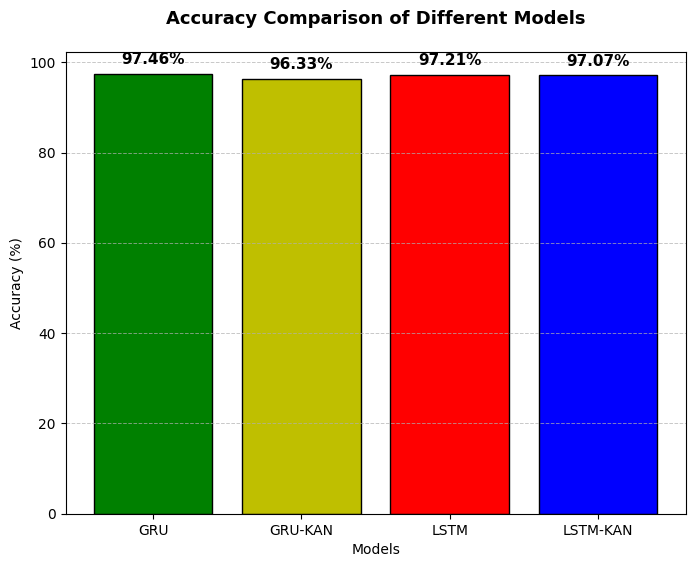

In [ ]:
import matplotlib.pyplot as plt


# Data for plotting (replace with your actual data)
models = ['GRU', 'GRU-KAN', 'LSTM', 'LSTM-KAN']
accuracies = [gru_accuracy, gru_kan_accuracy, lstm_accuracy, lstm_kan_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['g', 'y', 'r', 'b'], edgecolor='black', linewidth=1)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


# Set axis labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Different Models", fontsize=13, fontweight='bold', pad=20)

# # Add value labels on top of each bar
# for bar, accuracy in zip(bars, accuracies):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{accuracy:.2f}%", ha='center', va='bottom')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered alignment
        height + 1.5,  # Position slightly above the bar
        f"{height:.2f}%",  # Display accuracy percentage
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )


# Show the plot
plt.show()

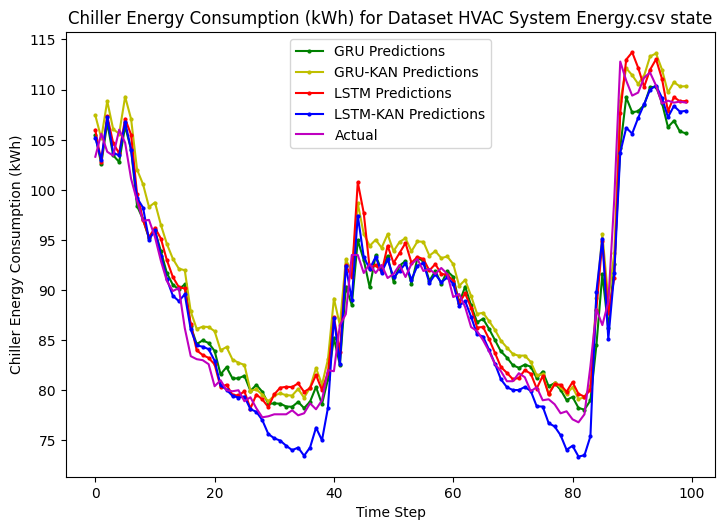

In [ ]:
import matplotlib.pyplot as plt

# Warna yang akan digunakan untuk plot
colors = ["g", "y", "r", "b", "m"]

plt.figure(figsize=(14, 10))

# Assuming all output lists (gru_outputs, gru_kan_outputs, etc.) have the same structure
num_states = len(states_list)  # Assuming states_list contains all desired states

# Loop through states and create subplots
for i in range(min(num_states, 4)):  # Limit to 4 subplots for now
    plt.subplot(2, 2, i + 1)

    # Access data for the current state (assuming it's the first element in the lists)
    gru_data = gru_outputs[0]  # Access data for the first (and only) state in the list
    gru_kan_data = gru_kan_outputs[0]
    lstm_data = lstm_outputs[0]
    lstm_kan_data = lstm_kan_outputs[0]
    target_data = targets[0]

    # Adjust data slicing based on subplot and data length
    if i == 0:
        data_slice = slice(-100, None)  # Last 100 data points
    elif i == 1:
        data_slice = slice(-50, None)  # Last 50 data points
    elif i == 2:
        data_slice = slice(None, 50)  # First 50 data points
    else:
        data_slice = slice(None, 100)  # First 100 data points

    plt.plot(gru_data[data_slice], "-o", color=colors[0], label="GRU Predictions", markersize=2)
    plt.plot(gru_kan_data[data_slice], "-o", color=colors[1], label="GRU-KAN Predictions", markersize=2)
    plt.plot(lstm_data[data_slice], "-o", color=colors[2], label="LSTM Predictions", markersize=2)
    plt.plot(lstm_kan_data[data_slice], "-o", color=colors[3], label="LSTM-KAN Predictions", markersize=2)
    plt.plot(target_data[data_slice], color=colors[4], label="Actual")

    plt.ylabel("Chiller Energy Consumption (kWh)")
    plt.xlabel("Time Step")
    plt.title(f"Chiller Energy Consumption (kWh) for {states_list[i]} state")  # Use state from states_list
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # visualisasi

# import matplotlib.pyplot as plt


# # Number of states to plot
# num_states_to_plot = min(len(states_list), 4)  # Limit to 4 for better visualization

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=num_states_to_plot, ncols=1, figsize=(10, 5 * num_states_to_plot))

# # Loop through the states and create individual plots
# for i, state in enumerate(states_list[:num_states_to_plot]):
#     ax = axes[i] if num_states_to_plot > 1 else axes

#     # Extract data for the current state
#     gru_data = gru_outputs[i]
#     gru_kan_data = gru_kan_outputs[i]
#     lstm_data = lstm_outputs[i]
#     lstm_kan_data = lstm_kan_outputs[i]
#     target_data = targets[i]

#     # Plot data
#     ax.plot(gru_data, label="GRU", marker='o', markersize=2, linewidth=1)
#     ax.plot(gru_kan_data, label="GRU-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_data, label="LSTM", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_kan_data, label="LSTM-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(target_data, label="Actual", linewidth=1.5)

#     # Set labels and title
#     plt.xlabel('Time Step')
#     ax.set_ylabel("Chiller Energy Consumption (kWh)")
#     ax.set_title(f"State: {state}")
#     ax.legend()

# plt.tight_layout()
# plt.show()

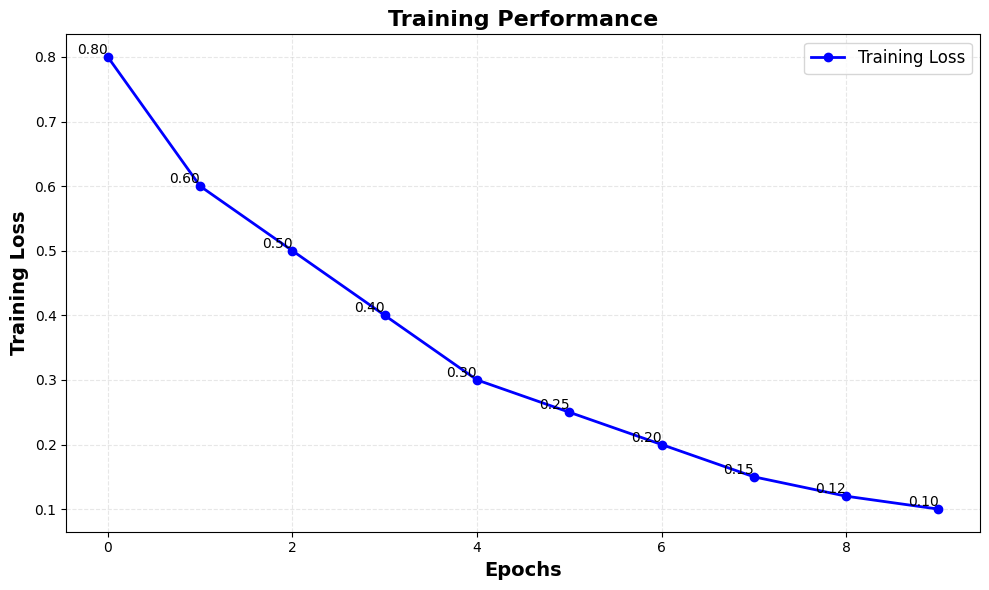

In [ ]:
import matplotlib.pyplot as plt

# Data contoh (ganti dengan data aktual dari proses pelatihan)
epochs = list(range(10))  # Epochs (0-9)
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]  # Training Loss per epoch

# Warna dan format garis
colors = ["g", "b", "r", "y", "m"]

# Membuat plot utama
plt.figure(figsize=(10, 6))

# Menambahkan plot training loss
plt.plot(
    epochs,
    training_loss,
    "-o",
    color=colors[1],
    label="Training Loss",
    markersize=6,
    linewidth=2
)

# Menambahkan detail pada grafik
plt.title("Training Performance", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Training Loss", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Anotasi nilai loss pada setiap titik
for epoch, loss in zip(epochs, training_loss):
    plt.text(epoch, loss, f"{loss:.2f}", fontsize=10, ha='right', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()


# Percobaan ke 6

In [ ]:
# Mengimpor modul untuk mengakses operasi sistem seperti mengelola file dan waktu.
import os
import time

# Mengimpor pustaka NumPy untuk komputasi numerik yang efisien.
import numpy as np

# Mengimpor pustaka Pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data, khususnya plot 2D.
import matplotlib.pyplot as plt

# Mengimpor pustaka PyTorch untuk pembuatan model deep learning.
import torch
import torch.nn as nn  # Modul PyTorch untuk membuat lapisan jaringan saraf.
from torch.utils.data import TensorDataset, DataLoader  # Modul untuk mengelola dataset dan batch data.
import torch.nn.functional as F  # Fungsi aktivasi dan fungsi lainnya yang umum digunakan pada jaringan saraf.

# Mengimpor modul untuk operasi matematika umum.
import math

# Mengimpor fungsi tqdm_notebook untuk menampilkan progress bar di Jupyter Notebook.
from tqdm.notebook import tqdm as tqdm_notebook

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi data.
from sklearn.preprocessing import MinMaxScaler

# Mengimpor modul random
import random


# Tambahkan fungsi `set_seed` untuk konsistensi hasil
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

# Tetapkan seed sebelum melanjutkan
set_seed(42)

In [ ]:
# Opsional proses ini bisa diskip

print(torch.__version__)  # Mencetak versi PyTorch yang digunakan.

2.5.1+cu121


In [ ]:
# Menentukan jalur direktori tempat file data berada.
data_dir = "/content/drive/MyDrive/Tesis/Dataset HVAC"  # Path ke direktori data di Google Colab atau lokal.

# Membaca file CSV yang berisi dataset ke dalam DataFrame menggunakan Pandas.
df = pd.read_csv("/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data.
df.head()


Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Building Load (RT)  Outside Temperature (F)  Dew Point (F)  Humidity (%)  
0               479.6                       82             75            79  
1               460.3                       82             75            79  
2               462.4                       82             75            79  
3               458.5                       82             75            79  
4               455.4                       82             75            79

In [ ]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index):
    """
    Fungsi untuk membentuk input dan label dengan jendela geser pada data time series.

    Parameters:
    - data: array numpy yang berisi data.
    - window_size: ukuran jendela (jumlah timestamp dalam setiap input).
    - inputs_cols_indices: indeks kolom yang ingin dimasukkan sebagai fitur input.
    - label_col_index: indeks kolom yang digunakan sebagai label output.

    Returns:
    - inputs: array numpy yang berisi input sequences berdasarkan jendela geser.
    - labels: array numpy yang berisi label untuk setiap sequence.
    """

    # Membuat array kosong untuk menyimpan input sequences dan label.
    # `inputs` akan memiliki dimensi (jumlah_instance, panjang_jendela, jumlah_fitur)
    inputs = np.zeros((len(data) - window_size, window_size, len(inputs_cols_indices)))
    # `labels` adalah array 1D yang akan menampung label untuk setiap sequence.
    labels = np.zeros(len(data) - window_size)

    # Iterasi melalui data untuk membentuk sequence input dan label
    for i in range(window_size, len(data)):
        # Mengambil data dalam jendela dan menambahkannya ke `inputs`
        inputs[i - window_size] = data[i - window_size : i, inputs_cols_indices]
        # Menetapkan nilai label dari kolom yang diinginkan
        labels[i - window_size] = data[i, label_col_index]

    # Mereshape `inputs` dan `labels` ke bentuk yang sesuai untuk model
    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)

    # Menampilkan bentuk (shape) dari `inputs` dan `labels` untuk verifikasi
    print(inputs.shape, labels.shape)

    return inputs, labels


In [ ]:
# Menetapkan indeks kolom label sebagai 0, yaitu kolom 'consumption' yang akan diprediksi.
label_col_index = 0  # Menggunakan 'consumption' sebagai label target.

# Menetapkan indeks kolom yang akan digunakan sebagai fitur input.
# Fitur yang dipilih adalah (consumption, hour, dayofweek, month, dayofyear).
inputs_cols_indices = range(5)  # Menggunakan kolom-kolom fitur dari indeks 0 hingga 4.

# Menetapkan ukuran jendela (window size) untuk mengatur panjang setiap sequence.
window_size = 90  # Panjang urutan yang akan dimasukkan sebagai input dalam model.

# Membuat dictionary untuk menyimpan objek scaler yang akan digunakan pada data label.
# Ini memungkinkan kita untuk melakukan normalisasi pada data pelatihan, dan nantinya mengembalikan data
# hasil prediksi dari model ke skala aslinya pada tahap evaluasi.
label_scalers = {}

# Inisialisasi list kosong untuk menampung data input pelatihan.
train_x = []

# Inisialisasi dictionary kosong untuk menampung data input dan label pengujian.
# Dictionary `test_x` akan menyimpan input pengujian, dan `test_y` untuk label pengujian.
test_x = {}
test_y = {}


In [ ]:
# Memilih file .csv dari direktori data dan menyimpannya ke dalam `processing_files`.
processing_files = [
    file for file in os.listdir(data_dir) if os.path.splitext(file)[1] == ".csv"
]

# Menentukan jumlah file yang akan digunakan untuk dataset
num_files_for_dataset = 5

# Memproses setiap file dalam daftar `processing_files` hingga jumlah yang ditentukan
for file in tqdm_notebook(processing_files[:num_files_for_dataset]):
    print(f"Processing {file} ...")

    # Membaca file .csv ke dalam DataFrame Pandas dan mengonversi kolom 'Tanggal' menjadi tipe tanggal
    df = pd.read_csv(os.path.join(data_dir, file), parse_dates=["Local Time (Timezone : GMT+8h)"])

    # Preprocessing
    # df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')  # Mengonversi kolom tanggal ke format datetime
    # df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year  # Menambahkan kolom 'Year' berdasarkan kolom 'Tanggal'
    # df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month  # Menambahkan kolom 'Month' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day  # Menambahkan kolom 'Day' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
    df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
    df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day
    df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour
    df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
    df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    # Normalisasi data input
    sc = MinMaxScaler()  # Inisialisasi scaler untuk input
    label_sc = MinMaxScaler()  # Inisialisasi scaler untuk label
    data = sc.fit_transform(df.values)  # Normalisasi data menggunakan MinMaxScaler

    # Menyimpan scaler untuk label agar bisa digunakan untuk mengembalikan nilai prediksi ke skala asli saat evaluasi
    label_sc.fit(df.iloc[:, label_col_index].values.reshape(-1, 1))
    label_scalers[file] = label_sc  # Menyimpan scaler label dalam dictionary

    # Membuat urutan input dan label menggunakan fungsi move_sliding_window
    inputs, labels = move_sliding_window(
        data,
        window_size,
        inputs_cols_indices=inputs_cols_indices,
        label_col_index=label_col_index,
    )

    # Menggabungkan instance yang dihasilkan dari semua file .csv.
    # Membagi data menjadi bagian pelatihan dan pengujian, lalu menggabungkannya ke dalam array tunggal.
    test_portion = int(0.1 * len(inputs))  # Menentukan bagian data untuk pengujian (10%)
    if len(train_x) == 0:  # Jika ini iterasi pertama
        train_x = inputs[:-test_portion]  # Menyimpan data pelatihan input
        train_y = labels[:-test_portion]  # Menyimpan data pelatihan label
    else:
        # Menggabungkan data pelatihan dari file saat ini dengan data pelatihan sebelumnya
        train_x = np.concatenate((train_x, inputs[:-test_portion]))
        train_y = np.concatenate((train_y, labels[:-test_portion]))

    # Menyimpan data pengujian untuk setiap file dalam dictionary `test_x` dan `test_y`
    test_x[file] = inputs[-test_portion:]
    test_y[file] = labels[-test_portion:]


  0%|          | 0/1 [00:00<?, ?it/s]

Processing Dataset HVAC System Energy.csv ...
(13525, 90, 5) (13525, 1)


In [ ]:
df

Chilled Water Rate (L/sec)  Building Load (RT)  \
0                            85.6               479.6   
1                            84.3               460.3   
2                            84.6               462.4   
3                            84.8               458.5   
4                            84.7               455.4   
...                           ...                 ...   
13610                       108.6               579.9   
13611                       108.9               567.3   
13612                       108.7               561.7   
13613                       108.8               566.0   
13614                       108.7               569.7   

       Outside Temperature (F)  Dew Point (F)  Humidity (%)  Year  Month  Day  \
0                           82             75            79  2019      8   18   
1                           82             75            79  2019      8   18   
2                           82             75            79  2019      8   18   
3                           82             75            79  2019      8   18   
4                           82             75            79  2019      8   18   
...                        ...            ...           ...   ...    ...  ...   
13610                       84             75            74  2020      6    1   
13611                       84             75            74  2020      6    1   
13612                       82             75            79  2020      6    1   
13613                       82             77            84  2020      6    1   
13614                       82             75            79  2020      6    1   

       Hour  DayOfWeek  
0         0          6  
1         0          6  
2         1          6  
3         1          6  
4         2          6  
...     ...        ...  
13610    11          0  
13611    11          0  
13612    12          0  
13613    12          0  
13614    13          0  

[13615 rows x 10 columns]

In [ ]:
# Memeriksa bentuk (shape) dari data pelatihan dan data pengujian.
# Menggunakan nama file "dataset_clean_baru.csv" sebagai kunci untuk test_x.
train_x.shape, test_x["Dataset HVAC System Energy.csv"].shape

((12173, 90, 5), (1352, 90, 5))

In [ ]:
# Menetapkan ukuran batch untuk pemrosesan dalam model.
batch_size = 100

# Membuat TensorDataset dari data pelatihan, mengonversi `train_x` dan `train_y` menjadi tensor PyTorch.
# `train_x` berisi fitur-fitur input, dan `train_y` berisi label target.
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# Membuat DataLoader untuk memuat data secara batch dengan parameter berikut:
# - `shuffle=True`: Mengacak urutan data di setiap epoch untuk meningkatkan generalisasi model.
# - `batch_size=batch_size`: Mengatur ukuran batch menjadi 100.
# - `drop_last=True`: Mengabaikan batch terakhir jika ukurannya tidak sesuai dengan `batch_size`,
#   memastikan semua batch memiliki ukuran yang sama.
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=True
)


In [ ]:
# Mencetak ukuran data pelatihan, ukuran batch, dan jumlah iterasi per epoch.
print(
    f"Train Size: {train_x.shape}, Batch Size: {batch_size}, # of iterations per epoch: {int(train_x.shape[0] / batch_size)}"
)


Train Size: (12173, 90, 5), Batch Size: 100, # of iterations per epoch: 121


In [ ]:
# Membebaskan memori dengan menghapus variabel `train_x` dan `train_y`.
del train_x, train_y


In [ ]:
# Memeriksa ketersediaan GPU.
# Jika GPU tersedia, `torch.cuda.is_available()` akan mengembalikan True, jika tidak akan mengembalikan False.
is_cuda = torch.cuda.is_available()

# Menetapkan device yang akan digunakan untuk menjalankan model berdasarkan ketersediaan GPU.
if is_cuda:
    device = torch.device("cuda")  # Mengatur device ke GPU
    print("GPU is available")       # Mencetak pesan jika GPU tersedia
else:
    device = torch.device("cpu")    # Mengatur device ke CPU jika GPU tidak tersedia


GPU is available


In [ ]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        # Menyimpan parameter input dan output
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        # Membuat grid untuk basis fungsi B-spline
        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        # Membuat bobot untuk komponen linier dasar dan komponen spline
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        # Mengatur parameter skala dan aktivasi untuk spline
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        # Menginisialisasi parameter
        self.reset_parameters()

    def reset_parameters(self):
        # Menginisialisasi bobot linier dasar dan bobot spline dengan kaiming_uniform
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 0.5) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        # Menghitung basis fungsi B-spline
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        # Menyelesaikan koefisien spline dari titik input
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        # Mengatur skala bobot spline
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        # Fungsi forward untuk lapisan KANLinear
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        # Memperbarui grid spline adaptif berdasarkan input x
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        # Menghitung kehilangan regulasi berdasarkan aktivasi dan entropi
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(GRUNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Mendefinisikan lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output GRU ke dimensi output yang diinginkan
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Melakukan forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output pada timestep terakhir dan meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output akhir dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

# 2. GRUNetKAN
# Mirip dengan GRUNet, tetapi menggantikan lapisan linier dengan KANLinear untuk menambah fleksibilitas.
class GRUNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(GRUNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(LSTMNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output dari LSTM ke dimensi output
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

# LSTMNetKAN
# Mirip dengan LSTMNet, tetapi menggantikan lapisan linier dengan KANLinear untuk mengembangkan fleksibilitas dan kemampuan representasi.
class LSTMNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(LSTMNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden


In [ ]:
def train(
    train_loader,
    learn_rate,
    hidden_dim=100,
    n_layers=3,
    n_epochs=10,
    model_type="GRU",
    print_every=100,
):
    # Mengambil dimensi input dari train_loader
    input_dim = next(iter(train_loader))[0].shape[2]  # 5
    output_dim = 1  # Definisi dimensi output

    # Inisialisasi model sesuai jenisnya
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "GRUKAN":
        model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)  # Pindahkan model ke perangkat

    # Definisi loss function dan optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # Memulai proses training
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []

    # Loop melalui jumlah epoch
    for epoch in range(1, n_epochs + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.0
        counter = 0

        # Iterasi melalui batch data
        for x, label in train_loader:
            counter += 1

            # Reset hidden state sesuai model yang digunakan
            if model_type == "GRU" or model_type == "GRUKAN":
                h = h.data
            elif model_type == "LSTM" or model_type == "LSTMKAN":
                h = tuple([e.data for e in h])

            model.zero_grad()  # Reset gradien

            # Forward pass
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())

            # Backpropagation dan optimisasi
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Menambahkan loss untuk perhitungan rata-rata
            if counter % print_every == 0:
                print(
                    f"Epoch {epoch} - Step: {counter}/{len(train_loader)} - Average Loss for Epoch: {avg_loss/counter}"
                )

        current_time = time.process_time()
        print(
            f"Epoch {epoch}/{n_epochs} Done, Total Loss: {avg_loss/len(train_loader)}"
        )
        print(f"Time Elapsed for Epoch: {current_time-start_time} seconds")
        epoch_times.append(current_time - start_time)

    # Menghitung total waktu pelatihan
    print(f"Total Training Time: {sum(epoch_times)} seconds")
    return model


In [ ]:
# Tetapkan seed
set_seed(42)

# Parameter pelatihan
seq_len = 90  # Panjang sequence atau jumlah timestamps
n_hidden = 100  # Ukuran hidden layer
n_layers = 3  # Jumlah lapisan RNN
n_epochs = 10  # Jumlah epoch
print_every = 100  # Frekuensi menampilkan loss
lr = 0.005  # Learning rate

# Memanggil fungsi train untuk melatih model GRU
gru_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch
    model_type="GRU",    # Tipe model (di sini menggunakan GRU)
    print_every=print_every # Frekuensi print loss selama pelatihan
)


Starting Training of GRU model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.013321497819852084
Epoch 1/10 Done, Total Loss: 0.012294639367610216
Time Elapsed for Epoch: 1.0044506080000133 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.006563699962571263
Epoch 2/10 Done, Total Loss: 0.0066495615169252
Time Elapsed for Epoch: 0.845786554 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.005802760255755856
Epoch 3/10 Done, Total Loss: 0.0056628459585399546
Time Elapsed for Epoch: 0.7982929659999911 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005219581193523481
Epoch 4/10 Done, Total Loss: 0.005196038343989837
Time Elapsed for Epoch: 0.8607799690000206 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.004870245649944991
Epoch 5/10 Done, Total Loss: 0.004842945282185866
Time Elapsed for Epoch: 0.8517798259999836 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.004906466578831896
Epoch 6/10 Done, Total Loss: 0.005006779711655

In [ ]:
# Menyimpan parameter model yang sudah dilatih ke file
torch.save(gru_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRU6.pth')


In [ ]:
# melatih model dengan tipe GRUKAN
# Parameter seq_len (sequence length) untuk model, yaitu jumlah timestamps
seq_len = 90

# Memanggil fungsi train untuk melatih model GRUKAN
gru_kan_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch untuk pelatihan
    model_type="GRUKAN", # Tipe model (di sini menggunakan GRUKAN)
    print_every=print_every # Frekuensi menampilkan loss selama pelatihan
)


Starting Training of GRUKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.014987392539624125
Epoch 1/10 Done, Total Loss: 0.013496842114100894
Time Elapsed for Epoch: 1.0718161519999967 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.006438457975164056
Epoch 2/10 Done, Total Loss: 0.006535983328853757
Time Elapsed for Epoch: 1.0363197389999925 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.005846601678058505
Epoch 3/10 Done, Total Loss: 0.005781978378380256
Time Elapsed for Epoch: 1.028371528000008 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005286591093754396
Epoch 4/10 Done, Total Loss: 0.005285089725844008
Time Elapsed for Epoch: 1.0818158959999948 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.004959491074550897
Epoch 5/10 Done, Total Loss: 0.004858905370616592
Time Elapsed for Epoch: 1.0823713390000194 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.00464537346852012
Epoch 6/10 Done, Total Loss: 0.004664

In [ ]:
# Menyimpan parameter model GRUKAN yang telah dilatih ke dalam file
torch.save(gru_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRUkan6.pth')


In [ ]:
lstm_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTM",
    print_every=print_every,
)

Starting Training of LSTM model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.030974386781454085
Epoch 1/10 Done, Total Loss: 0.027293487451970577
Time Elapsed for Epoch: 1.1803155040000206 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007906257321592421
Epoch 2/10 Done, Total Loss: 0.007760525134599899
Time Elapsed for Epoch: 1.0532901609999783 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006744050255510956
Epoch 3/10 Done, Total Loss: 0.006708722461538374
Time Elapsed for Epoch: 1.04323402899999 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005914987789001316
Epoch 4/10 Done, Total Loss: 0.005878211493596189
Time Elapsed for Epoch: 1.1852771519999976 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005485517231281847
Epoch 5/10 Done, Total Loss: 0.005500410088869043
Time Elapsed for Epoch: 1.1710721359999923 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.0053097570152021946
Epoch 6/10 Done, Total Loss: 0.0053411

In [ ]:
torch.save(lstm_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm6.pth')

In [ ]:
lstm_kan_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTMKAN",
    print_every=print_every,
)

Starting Training of LSTMKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.033267198344692585
Epoch 1/10 Done, Total Loss: 0.0290657492885597
Time Elapsed for Epoch: 1.2959145469999953 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.0078678823960945
Epoch 2/10 Done, Total Loss: 0.007629408079684396
Time Elapsed for Epoch: 1.3752060490000417 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006576466087717563
Epoch 3/10 Done, Total Loss: 0.0064825215473124555
Time Elapsed for Epoch: 1.375557420000007 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005778642661171034
Epoch 4/10 Done, Total Loss: 0.005658232570387238
Time Elapsed for Epoch: 1.3597053660000142 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005434171671513468
Epoch 5/10 Done, Total Loss: 0.005431797099492151
Time Elapsed for Epoch: 1.3644456240000409 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005154885284136981
Epoch 6/10 Done, Total Loss: 0.0052006

In [ ]:
torch.save(lstm_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm_kan6.pth')

In [ ]:
!nvidia-smi

Tue Dec 10 05:53:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0              29W /  70W |   4397MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# move device to cpu for evaluation to avoid GPU memory run
device = "cpu"

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
gru_model2 = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU6.pth"))

<ipython-input-220-6f72cd398a03>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU6.pth"))

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_model.to(device)

GRUNet(
  (gru): GRU(5, 100, num_layers=3, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
gru_kan_model2 = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan6.pth"))

<ipython-input-226-ef4e5e932bcf>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan6

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_kan_model2.to(device)

GRUNetKAN(
  (gru): GRU(5, 100, num_layers=3, batch_first=True, dropout=0.3)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
lstm_model2 = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm6.pth"))

<ipython-input-228-eda373e05325>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm6.pth"

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_model2.to(device)

LSTMNet(
  (lstm): LSTM(5, 100, num_layers=3, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
lstm_kan_model2 = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_kan6.pth"))

<ipython-input-230-3ef78927ece6>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_k

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_kan_model2.to(device)

LSTMNetKAN(
  (lstm): LSTM(5, 100, num_layers=3, batch_first=True, dropout=0.3)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
def sMAPE(outputs, targets):
    sMAPE = (
        100
        / len(targets)
        * np.sum(np.abs(outputs - targets) / (np.abs(outputs + targets)) / 2)
    )
    return sMAPE

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate(model, test_x, test_y, label_scalers):
    model.to(device)
    outputs = []
    targets = []
    start_time = time.process_time()
    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    print(f"Evaluation Time: {time.process_time()-start_time}")
    print(f"sMAPE: {round(sMAPE(concatenated_outputs, concatenated_targets), 3)}%")

    # list of of targets/outputs for each state
    return outputs, targets, sMAPE

In [ ]:
# Evaluate Performance GRU with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    # Move the model to the device before the loop
    model.to(device)
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

Evaluation Time: 0.01546288600002299
MAE: 2.33
RMSE: 4.151
R²: 0.821


In [ ]:
# ipython-input-196-53ac28a8cb99
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

# Since you want to calculate sMAPE for the GRU model, you can call the sMAPE function separately:
gru_sMAPE = sMAPE(np.concatenate(gru_outputs), np.concatenate(targets))
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.020436571000004733
MAE: 2.33
RMSE: 4.151
R²: 0.821
GRU sMAPE: 0.598%


In [ ]:
#Evaluate Performance GRUKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.024442149999970297
MAE: 2.33
RMSE: 4.151
R²: 0.821
GRU sMAPE: 0.598%


In [ ]:
# Evaluate Performance LSTM with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTM sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.02106415600002265
MAE: 2.33
RMSE: 4.151
R²: 0.821
LSTM sMAPE: 0.598%


In [ ]:
# Evaluate Performance LSTMKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def calculate_mae(outputs, targets): # Renamed to avoid conflict
    return np.mean(np.abs(outputs - targets))

def calculate_rmse(outputs, targets): # Renamed to avoid conflict
    return np.sqrt(np.mean((outputs - targets) ** 2))

def calculate_r2(outputs, targets): # Renamed to avoid conflict
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2 using the renamed functions
    mae_value = calculate_mae(concatenated_outputs, concatenated_targets)
    rmse_value = calculate_rmse(concatenated_outputs, concatenated_targets)
    r2_value = calculate_r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTMKAN sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.02492523500001198
MAE: 2.33
RMSE: 4.151
R²: 0.821
LSTMKAN sMAPE: 0.598%


In [ ]:
states_list = list(test_x.keys())

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung akurasi dalam bentuk persentase
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Hitung MAPE
    accuracy = 100 - (mape * 100)  # Akurasi sebagai 100% - MAPE
    return accuracy

print("\nEksperimen 6")
# Evaluate GRU model
print("\nEvaluate Model GRU:")
gru_outputs, gru_targets, _, _, _ = evaluate(gru_model, test_x, test_y, label_scalers)
gru_accuracy = calculate_accuracy(gru_targets, gru_outputs)
print(f"GRU Accuracy: {gru_accuracy:.2f}%")

# Evaluate GRU-KAN model
print("\nEvaluate Model GRU-KAN:")
gru_kan_outputs, gru_kan_targets, _, _, _ = evaluate(gru_kan_model, test_x, test_y, label_scalers)
gru_kan_accuracy = calculate_accuracy(gru_kan_targets, gru_kan_outputs)
print(f"GRU-KAN Accuracy: {gru_kan_accuracy:.2f}%")

# Evaluate LSTM model
print("\nEvaluate Model LSTM:")
lstm_outputs, lstm_targets, _, _, _ = evaluate(lstm_model, test_x, test_y, label_scalers)
lstm_accuracy = calculate_accuracy(lstm_targets, lstm_outputs)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Evaluate LSTM-KAN model
print("\nEvaluate Model LSTM-KAN:")
lstm_kan_outputs, lstm_kan_targets, _, _, _ = evaluate(lstm_kan_model, test_x, test_y, label_scalers)
lstm_kan_accuracy = calculate_accuracy(lstm_kan_targets, lstm_kan_outputs)
print(f"LSTM-KAN Accuracy: {lstm_kan_accuracy:.2f}%")



Eksperimen 6

Evaluate Model GRU:
Evaluation Time: 0.04521169699995653
MAE: 2.33
RMSE: 4.151
R²: 0.821
GRU Accuracy: 97.59%

Evaluate Model GRU-KAN:
Evaluation Time: 0.04424805799999376
MAE: 2.418
RMSE: 4.264
R²: 0.811
GRU-KAN Accuracy: 97.51%

Evaluate Model LSTM:
Evaluation Time: 0.07817720399998507
MAE: 2.3
RMSE: 4.255
R²: 0.812
LSTM Accuracy: 97.64%

Evaluate Model LSTM-KAN:
Evaluation Time: 0.06358385600003658
MAE: 2.665
RMSE: 4.433
R²: 0.796
LSTM-KAN Accuracy: 97.20%


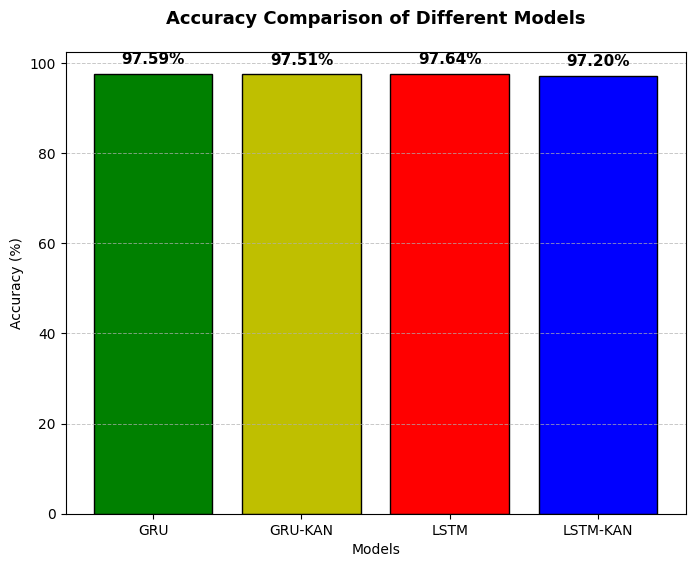

In [ ]:
import matplotlib.pyplot as plt


# Data for plotting (replace with your actual data)
models = ['GRU', 'GRU-KAN', 'LSTM', 'LSTM-KAN']
accuracies = [gru_accuracy, gru_kan_accuracy, lstm_accuracy, lstm_kan_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['g', 'y', 'r', 'b'], edgecolor='black', linewidth=1)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


# Set axis labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Different Models", fontsize=13, fontweight='bold', pad=20)

# # Add value labels on top of each bar
# for bar, accuracy in zip(bars, accuracies):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{accuracy:.2f}%", ha='center', va='bottom')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered alignment
        height + 1.5,  # Position slightly above the bar
        f"{height:.2f}%",  # Display accuracy percentage
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )


# Show the plot
plt.show()

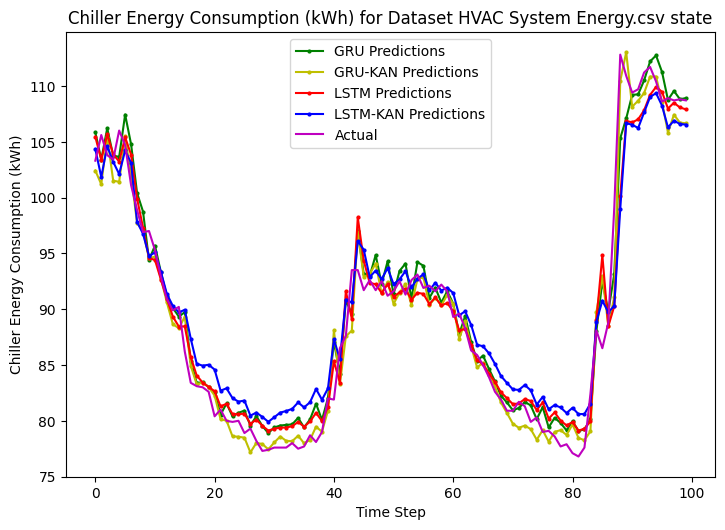

In [ ]:
import matplotlib.pyplot as plt

# Warna yang akan digunakan untuk plot
colors = ["g", "y", "r", "b", "m"]

plt.figure(figsize=(14, 10))

# Assuming all output lists (gru_outputs, gru_kan_outputs, etc.) have the same structure
num_states = len(states_list)  # Assuming states_list contains all desired states

# Loop through states and create subplots
for i in range(min(num_states, 4)):  # Limit to 4 subplots for now
    plt.subplot(2, 2, i + 1)

    # Access data for the current state (assuming it's the first element in the lists)
    gru_data = gru_outputs[0]  # Access data for the first (and only) state in the list
    gru_kan_data = gru_kan_outputs[0]
    lstm_data = lstm_outputs[0]
    lstm_kan_data = lstm_kan_outputs[0]
    target_data = targets[0]

    # Adjust data slicing based on subplot and data length
    if i == 0:
        data_slice = slice(-100, None)  # Last 100 data points
    elif i == 1:
        data_slice = slice(-50, None)  # Last 50 data points
    elif i == 2:
        data_slice = slice(None, 50)  # First 50 data points
    else:
        data_slice = slice(None, 100)  # First 100 data points

    plt.plot(gru_data[data_slice], "-o", color=colors[0], label="GRU Predictions", markersize=2)
    plt.plot(gru_kan_data[data_slice], "-o", color=colors[1], label="GRU-KAN Predictions", markersize=2)
    plt.plot(lstm_data[data_slice], "-o", color=colors[2], label="LSTM Predictions", markersize=2)
    plt.plot(lstm_kan_data[data_slice], "-o", color=colors[3], label="LSTM-KAN Predictions", markersize=2)
    plt.plot(target_data[data_slice], color=colors[4], label="Actual")

    plt.ylabel("Chiller Energy Consumption (kWh)")
    plt.xlabel("Time Step")
    plt.title(f"Chiller Energy Consumption (kWh) for {states_list[i]} state")  # Use state from states_list
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # visualisasi

# import matplotlib.pyplot as plt


# # Number of states to plot
# num_states_to_plot = min(len(states_list), 4)  # Limit to 4 for better visualization

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=num_states_to_plot, ncols=1, figsize=(10, 5 * num_states_to_plot))

# # Loop through the states and create individual plots
# for i, state in enumerate(states_list[:num_states_to_plot]):
#     ax = axes[i] if num_states_to_plot > 1 else axes

#     # Extract data for the current state
#     gru_data = gru_outputs[i]
#     gru_kan_data = gru_kan_outputs[i]
#     lstm_data = lstm_outputs[i]
#     lstm_kan_data = lstm_kan_outputs[i]
#     target_data = targets[i]

#     # Plot data
#     ax.plot(gru_data, label="GRU", marker='o', markersize=2, linewidth=1)
#     ax.plot(gru_kan_data, label="GRU-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_data, label="LSTM", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_kan_data, label="LSTM-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(target_data, label="Actual", linewidth=1.5)

#     # Set labels and title
#     plt.xlabel('Time Step')
#     ax.set_ylabel("Chiller Energy Consumption (kWh)")
#     ax.set_title(f"State: {state}")
#     ax.legend()

# plt.tight_layout()
# plt.show()

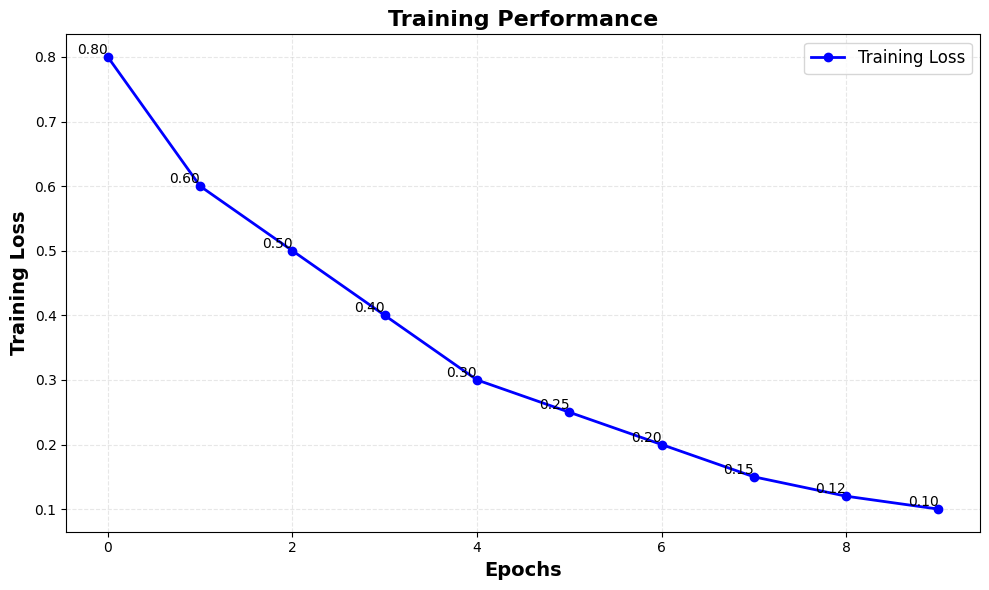

In [ ]:
import matplotlib.pyplot as plt

# Data contoh (ganti dengan data aktual dari proses pelatihan)
epochs = list(range(10))  # Epochs (0-9)
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]  # Training Loss per epoch

# Warna dan format garis
colors = ["g", "b", "r", "y", "m"]

# Membuat plot utama
plt.figure(figsize=(10, 6))

# Menambahkan plot training loss
plt.plot(
    epochs,
    training_loss,
    "-o",
    color=colors[1],
    label="Training Loss",
    markersize=6,
    linewidth=2
)

# Menambahkan detail pada grafik
plt.title("Training Performance", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Training Loss", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Anotasi nilai loss pada setiap titik
for epoch, loss in zip(epochs, training_loss):
    plt.text(epoch, loss, f"{loss:.2f}", fontsize=10, ha='right', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()


# Percobaan ke 7

In [ ]:
# Mengimpor modul untuk mengakses operasi sistem seperti mengelola file dan waktu.
import os
import time

# Mengimpor pustaka NumPy untuk komputasi numerik yang efisien.
import numpy as np

# Mengimpor pustaka Pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data, khususnya plot 2D.
import matplotlib.pyplot as plt

# Mengimpor pustaka PyTorch untuk pembuatan model deep learning.
import torch
import torch.nn as nn  # Modul PyTorch untuk membuat lapisan jaringan saraf.
from torch.utils.data import TensorDataset, DataLoader  # Modul untuk mengelola dataset dan batch data.
import torch.nn.functional as F  # Fungsi aktivasi dan fungsi lainnya yang umum digunakan pada jaringan saraf.

# Mengimpor modul untuk operasi matematika umum.
import math

# Mengimpor fungsi tqdm_notebook untuk menampilkan progress bar di Jupyter Notebook.
from tqdm.notebook import tqdm as tqdm_notebook

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi data.
from sklearn.preprocessing import MinMaxScaler

# Mengimpor modul random
import random


# Tambahkan fungsi `set_seed` untuk konsistensi hasil
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

# Tetapkan seed sebelum melanjutkan
set_seed(42)

In [ ]:
# Opsional proses ini bisa diskip

print(torch.__version__)  # Mencetak versi PyTorch yang digunakan.

2.5.1+cu121


In [ ]:
# Menentukan jalur direktori tempat file data berada.
data_dir = "/content/drive/MyDrive/Tesis/Dataset HVAC"  # Path ke direktori data di Google Colab atau lokal.

# Membaca file CSV yang berisi dataset ke dalam DataFrame menggunakan Pandas.
df = pd.read_csv("/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data.
df.head()


Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Building Load (RT)  Outside Temperature (F)  Dew Point (F)  Humidity (%)  
0               479.6                       82             75            79  
1               460.3                       82             75            79  
2               462.4                       82             75            79  
3               458.5                       82             75            79  
4               455.4                       82             75            79

In [ ]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index):
    """
    Fungsi untuk membentuk input dan label dengan jendela geser pada data time series.

    Parameters:
    - data: array numpy yang berisi data.
    - window_size: ukuran jendela (jumlah timestamp dalam setiap input).
    - inputs_cols_indices: indeks kolom yang ingin dimasukkan sebagai fitur input.
    - label_col_index: indeks kolom yang digunakan sebagai label output.

    Returns:
    - inputs: array numpy yang berisi input sequences berdasarkan jendela geser.
    - labels: array numpy yang berisi label untuk setiap sequence.
    """

    # Membuat array kosong untuk menyimpan input sequences dan label.
    # `inputs` akan memiliki dimensi (jumlah_instance, panjang_jendela, jumlah_fitur)
    inputs = np.zeros((len(data) - window_size, window_size, len(inputs_cols_indices)))
    # `labels` adalah array 1D yang akan menampung label untuk setiap sequence.
    labels = np.zeros(len(data) - window_size)

    # Iterasi melalui data untuk membentuk sequence input dan label
    for i in range(window_size, len(data)):
        # Mengambil data dalam jendela dan menambahkannya ke `inputs`
        inputs[i - window_size] = data[i - window_size : i, inputs_cols_indices]
        # Menetapkan nilai label dari kolom yang diinginkan
        labels[i - window_size] = data[i, label_col_index]

    # Mereshape `inputs` dan `labels` ke bentuk yang sesuai untuk model
    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)

    # Menampilkan bentuk (shape) dari `inputs` dan `labels` untuk verifikasi
    print(inputs.shape, labels.shape)

    return inputs, labels


In [ ]:
# Menetapkan indeks kolom label sebagai 0, yaitu kolom 'consumption' yang akan diprediksi.
label_col_index = 0  # Menggunakan 'consumption' sebagai label target.

# Menetapkan indeks kolom yang akan digunakan sebagai fitur input.
# Fitur yang dipilih adalah (consumption, hour, dayofweek, month, dayofyear).
inputs_cols_indices = range(5)  # Menggunakan kolom-kolom fitur dari indeks 0 hingga 4.

# Menetapkan ukuran jendela (window size) untuk mengatur panjang setiap sequence.
window_size = 90  # Panjang urutan yang akan dimasukkan sebagai input dalam model.

# Membuat dictionary untuk menyimpan objek scaler yang akan digunakan pada data label.
# Ini memungkinkan kita untuk melakukan normalisasi pada data pelatihan, dan nantinya mengembalikan data
# hasil prediksi dari model ke skala aslinya pada tahap evaluasi.
label_scalers = {}

# Inisialisasi list kosong untuk menampung data input pelatihan.
train_x = []

# Inisialisasi dictionary kosong untuk menampung data input dan label pengujian.
# Dictionary `test_x` akan menyimpan input pengujian, dan `test_y` untuk label pengujian.
test_x = {}
test_y = {}


In [ ]:
# Memilih file .csv dari direktori data dan menyimpannya ke dalam `processing_files`.
processing_files = [
    file for file in os.listdir(data_dir) if os.path.splitext(file)[1] == ".csv"
]

# Menentukan jumlah file yang akan digunakan untuk dataset
num_files_for_dataset = 5

# Memproses setiap file dalam daftar `processing_files` hingga jumlah yang ditentukan
for file in tqdm_notebook(processing_files[:num_files_for_dataset]):
    print(f"Processing {file} ...")

    # Membaca file .csv ke dalam DataFrame Pandas dan mengonversi kolom 'Tanggal' menjadi tipe tanggal
    df = pd.read_csv(os.path.join(data_dir, file), parse_dates=["Local Time (Timezone : GMT+8h)"])

    # Preprocessing
    # df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')  # Mengonversi kolom tanggal ke format datetime
    # df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year  # Menambahkan kolom 'Year' berdasarkan kolom 'Tanggal'
    # df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month  # Menambahkan kolom 'Month' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day  # Menambahkan kolom 'Day' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
    df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
    df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day
    df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour
    df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
    df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    # Normalisasi data input
    sc = MinMaxScaler()  # Inisialisasi scaler untuk input
    label_sc = MinMaxScaler()  # Inisialisasi scaler untuk label
    data = sc.fit_transform(df.values)  # Normalisasi data menggunakan MinMaxScaler

    # Menyimpan scaler untuk label agar bisa digunakan untuk mengembalikan nilai prediksi ke skala asli saat evaluasi
    label_sc.fit(df.iloc[:, label_col_index].values.reshape(-1, 1))
    label_scalers[file] = label_sc  # Menyimpan scaler label dalam dictionary

    # Membuat urutan input dan label menggunakan fungsi move_sliding_window
    inputs, labels = move_sliding_window(
        data,
        window_size,
        inputs_cols_indices=inputs_cols_indices,
        label_col_index=label_col_index,
    )

    # Menggabungkan instance yang dihasilkan dari semua file .csv.
    # Membagi data menjadi bagian pelatihan dan pengujian, lalu menggabungkannya ke dalam array tunggal.
    test_portion = int(0.1 * len(inputs))  # Menentukan bagian data untuk pengujian (10%)
    if len(train_x) == 0:  # Jika ini iterasi pertama
        train_x = inputs[:-test_portion]  # Menyimpan data pelatihan input
        train_y = labels[:-test_portion]  # Menyimpan data pelatihan label
    else:
        # Menggabungkan data pelatihan dari file saat ini dengan data pelatihan sebelumnya
        train_x = np.concatenate((train_x, inputs[:-test_portion]))
        train_y = np.concatenate((train_y, labels[:-test_portion]))

    # Menyimpan data pengujian untuk setiap file dalam dictionary `test_x` dan `test_y`
    test_x[file] = inputs[-test_portion:]
    test_y[file] = labels[-test_portion:]


  0%|          | 0/1 [00:00<?, ?it/s]

Processing Dataset HVAC System Energy.csv ...
(13525, 90, 5) (13525, 1)


In [ ]:
df

Chilled Water Rate (L/sec)  Building Load (RT)  \
0                            85.6               479.6   
1                            84.3               460.3   
2                            84.6               462.4   
3                            84.8               458.5   
4                            84.7               455.4   
...                           ...                 ...   
13610                       108.6               579.9   
13611                       108.9               567.3   
13612                       108.7               561.7   
13613                       108.8               566.0   
13614                       108.7               569.7   

       Outside Temperature (F)  Dew Point (F)  Humidity (%)  Year  Month  Day  \
0                           82             75            79  2019      8   18   
1                           82             75            79  2019      8   18   
2                           82             75            79  2019      8   18   
3                           82             75            79  2019      8   18   
4                           82             75            79  2019      8   18   
...                        ...            ...           ...   ...    ...  ...   
13610                       84             75            74  2020      6    1   
13611                       84             75            74  2020      6    1   
13612                       82             75            79  2020      6    1   
13613                       82             77            84  2020      6    1   
13614                       82             75            79  2020      6    1   

       Hour  DayOfWeek  
0         0          6  
1         0          6  
2         1          6  
3         1          6  
4         2          6  
...     ...        ...  
13610    11          0  
13611    11          0  
13612    12          0  
13613    12          0  
13614    13          0  

[13615 rows x 10 columns]

In [ ]:
# Memeriksa bentuk (shape) dari data pelatihan dan data pengujian.
# Menggunakan nama file "dataset_clean_baru.csv" sebagai kunci untuk test_x.
train_x.shape, test_x["Dataset HVAC System Energy.csv"].shape

((12173, 90, 5), (1352, 90, 5))

In [ ]:
# Menetapkan ukuran batch untuk pemrosesan dalam model.
batch_size = 100

# Membuat TensorDataset dari data pelatihan, mengonversi `train_x` dan `train_y` menjadi tensor PyTorch.
# `train_x` berisi fitur-fitur input, dan `train_y` berisi label target.
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# Membuat DataLoader untuk memuat data secara batch dengan parameter berikut:
# - `shuffle=True`: Mengacak urutan data di setiap epoch untuk meningkatkan generalisasi model.
# - `batch_size=batch_size`: Mengatur ukuran batch menjadi 100.
# - `drop_last=True`: Mengabaikan batch terakhir jika ukurannya tidak sesuai dengan `batch_size`,
#   memastikan semua batch memiliki ukuran yang sama.
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=True
)


In [ ]:
# Mencetak ukuran data pelatihan, ukuran batch, dan jumlah iterasi per epoch.
print(
    f"Train Size: {train_x.shape}, Batch Size: {batch_size}, # of iterations per epoch: {int(train_x.shape[0] / batch_size)}"
)


Train Size: (12173, 90, 5), Batch Size: 100, # of iterations per epoch: 121


In [ ]:
# Membebaskan memori dengan menghapus variabel `train_x` dan `train_y`.
del train_x, train_y


In [ ]:
# Memeriksa ketersediaan GPU.
# Jika GPU tersedia, `torch.cuda.is_available()` akan mengembalikan True, jika tidak akan mengembalikan False.
is_cuda = torch.cuda.is_available()

# Menetapkan device yang akan digunakan untuk menjalankan model berdasarkan ketersediaan GPU.
if is_cuda:
    device = torch.device("cuda")  # Mengatur device ke GPU
    print("GPU is available")       # Mencetak pesan jika GPU tersedia
else:
    device = torch.device("cpu")    # Mengatur device ke CPU jika GPU tidak tersedia


GPU is available


In [ ]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        # Menyimpan parameter input dan output
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        # Membuat grid untuk basis fungsi B-spline
        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        # Membuat bobot untuk komponen linier dasar dan komponen spline
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        # Mengatur parameter skala dan aktivasi untuk spline
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        # Menginisialisasi parameter
        self.reset_parameters()

    def reset_parameters(self):
        # Menginisialisasi bobot linier dasar dan bobot spline dengan kaiming_uniform
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 0.5) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        # Menghitung basis fungsi B-spline
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        # Menyelesaikan koefisien spline dari titik input
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        # Mengatur skala bobot spline
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        # Fungsi forward untuk lapisan KANLinear
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        # Memperbarui grid spline adaptif berdasarkan input x
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        # Menghitung kehilangan regulasi berdasarkan aktivasi dan entropi
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.4):
        super(GRUNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Mendefinisikan lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output GRU ke dimensi output yang diinginkan
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Melakukan forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output pada timestep terakhir dan meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output akhir dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

# 2. GRUNetKAN
# Mirip dengan GRUNet, tetapi menggantikan lapisan linier dengan KANLinear untuk menambah fleksibilitas.
class GRUNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.4):
        super(GRUNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.4):
        super(LSTMNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output dari LSTM ke dimensi output
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

# LSTMNetKAN
# Mirip dengan LSTMNet, tetapi menggantikan lapisan linier dengan KANLinear untuk mengembangkan fleksibilitas dan kemampuan representasi.
class LSTMNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.4):
        super(LSTMNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden


In [ ]:
def train(
    train_loader,
    learn_rate,
    hidden_dim=100,
    n_layers=4,
    n_epochs=10,
    model_type="GRU",
    print_every=100,
):
    # Mengambil dimensi input dari train_loader
    input_dim = next(iter(train_loader))[0].shape[2]  # 5
    output_dim = 1  # Definisi dimensi output

    # Inisialisasi model sesuai jenisnya
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "GRUKAN":
        model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)  # Pindahkan model ke perangkat

    # Definisi loss function dan optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # Memulai proses training
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []

    # Loop melalui jumlah epoch
    for epoch in range(1, n_epochs + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.0
        counter = 0

        # Iterasi melalui batch data
        for x, label in train_loader:
            counter += 1

            # Reset hidden state sesuai model yang digunakan
            if model_type == "GRU" or model_type == "GRUKAN":
                h = h.data
            elif model_type == "LSTM" or model_type == "LSTMKAN":
                h = tuple([e.data for e in h])

            model.zero_grad()  # Reset gradien

            # Forward pass
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())

            # Backpropagation dan optimisasi
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Menambahkan loss untuk perhitungan rata-rata
            if counter % print_every == 0:
                print(
                    f"Epoch {epoch} - Step: {counter}/{len(train_loader)} - Average Loss for Epoch: {avg_loss/counter}"
                )

        current_time = time.process_time()
        print(
            f"Epoch {epoch}/{n_epochs} Done, Total Loss: {avg_loss/len(train_loader)}"
        )
        print(f"Time Elapsed for Epoch: {current_time-start_time} seconds")
        epoch_times.append(current_time - start_time)

    # Menghitung total waktu pelatihan
    print(f"Total Training Time: {sum(epoch_times)} seconds")
    return model


In [ ]:
# Tetapkan seed
set_seed(42)

# Parameter pelatihan
seq_len = 90  # Panjang sequence atau jumlah timestamps
n_hidden = 100  # Ukuran hidden layer
n_layers = 4  # Jumlah lapisan RNN
n_epochs = 10  # Jumlah epoch
print_every = 100  # Frekuensi menampilkan loss
lr = 0.0075  # Learning rate

# Memanggil fungsi train untuk melatih model GRU
gru_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch
    model_type="GRU",    # Tipe model (di sini menggunakan GRU)
    print_every=print_every # Frekuensi print loss selama pelatihan
)


Starting Training of GRU model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.016465717600658535
Epoch 1/10 Done, Total Loss: 0.014944933466459354
Time Elapsed for Epoch: 1.2043286669999702 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.006739176909904927
Epoch 2/10 Done, Total Loss: 0.006548873795396533
Time Elapsed for Epoch: 1.0648087370000212 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.005952976096887141
Epoch 3/10 Done, Total Loss: 0.005933327729282669
Time Elapsed for Epoch: 1.1130282009999632 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005390240594279021
Epoch 4/10 Done, Total Loss: 0.00536036314750629
Time Elapsed for Epoch: 1.1235127460000172 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005256421001395211
Epoch 5/10 Done, Total Loss: 0.005291649374210329
Time Elapsed for Epoch: 1.1168578679999541 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005062052314169705
Epoch 6/10 Done, Total Loss: 0.00506427

In [ ]:
# Menyimpan parameter model yang sudah dilatih ke file
torch.save(gru_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRU7.pth')


In [ ]:
# melatih model dengan tipe GRUKAN
# Parameter seq_len (sequence length) untuk model, yaitu jumlah timestamps
seq_len = 90

# Memanggil fungsi train untuk melatih model GRUKAN
gru_kan_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch untuk pelatihan
    model_type="GRUKAN", # Tipe model (di sini menggunakan GRUKAN)
    print_every=print_every # Frekuensi menampilkan loss selama pelatihan
)


Starting Training of GRUKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.023556427033618092
Epoch 1/10 Done, Total Loss: 0.02064166692362652
Time Elapsed for Epoch: 1.2716201350000347 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.006512045450508594
Epoch 2/10 Done, Total Loss: 0.00638189929737594
Time Elapsed for Epoch: 1.1910187610000094 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.005762646500952542
Epoch 3/10 Done, Total Loss: 0.005754420943635185
Time Elapsed for Epoch: 1.252531867000016 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.0052719619637355206
Epoch 4/10 Done, Total Loss: 0.005381849979258274
Time Elapsed for Epoch: 1.2392730899999833 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005367320976220071
Epoch 5/10 Done, Total Loss: 0.005347705777149555
Time Elapsed for Epoch: 1.2263393489999999 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005040378547273576
Epoch 6/10 Done, Total Loss: 0.005038

In [ ]:
# Menyimpan parameter model GRUKAN yang telah dilatih ke dalam file
torch.save(gru_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRUkan7.pth')


In [ ]:
lstm_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTM",
    print_every=print_every,
)

Starting Training of LSTM model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.030777802667580546
Epoch 1/10 Done, Total Loss: 0.027065890910457975
Time Elapsed for Epoch: 1.4586142949999612 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007698631647508591
Epoch 2/10 Done, Total Loss: 0.00762353613895695
Time Elapsed for Epoch: 1.4839356030000204 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006422463827766478
Epoch 3/10 Done, Total Loss: 0.006405703432873384
Time Elapsed for Epoch: 1.4907806150000056 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.00646908099995926
Epoch 4/10 Done, Total Loss: 0.006315937673688428
Time Elapsed for Epoch: 1.4282126619999644 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005640035525429994
Epoch 5/10 Done, Total Loss: 0.005579779559577053
Time Elapsed for Epoch: 1.3921195780000062 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005428523980081082
Epoch 6/10 Done, Total Loss: 0.00550338

In [ ]:
torch.save(lstm_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm7.pth')

In [ ]:
lstm_kan_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTMKAN",
    print_every=print_every,
)

Starting Training of LSTMKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.03069672305136919
Epoch 1/10 Done, Total Loss: 0.02711185959190869
Time Elapsed for Epoch: 1.5421132650000118 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007924039070494472
Epoch 2/10 Done, Total Loss: 0.007851878887288704
Time Elapsed for Epoch: 1.419847338000011 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006833420796319842
Epoch 3/10 Done, Total Loss: 0.006877328024807671
Time Elapsed for Epoch: 1.5608086999999955 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006067720381543041
Epoch 4/10 Done, Total Loss: 0.006027342688122933
Time Elapsed for Epoch: 1.593532458000027 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005867316811345518
Epoch 5/10 Done, Total Loss: 0.005890869064071823
Time Elapsed for Epoch: 1.5587413289999859 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.00527142524253577
Epoch 6/10 Done, Total Loss: 0.00532917

In [ ]:
torch.save(lstm_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm_kan7.pth')

In [ ]:
!nvidia-smi

Tue Dec 10 06:01:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0              29W /  70W |   4399MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# move device to cpu for evaluation to avoid GPU memory run
device = "cpu"

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 4
gru_model2 = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU7.pth"))

<ipython-input-273-500f0e3392f8>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU7.pth"))

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_model.to(device)

GRUNet(
  (gru): GRU(5, 100, num_layers=4, batch_first=True, dropout=0.4)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 4
gru_kan_model2 = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan7.pth"))

<ipython-input-275-87f93f3fa14e>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan7

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_kan_model2.to(device)

GRUNetKAN(
  (gru): GRU(5, 100, num_layers=4, batch_first=True, dropout=0.4)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 4
lstm_model2 = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm7.pth"))

<ipython-input-277-dd439ee4a1d9>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm7.pth"

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_model2.to(device)

LSTMNet(
  (lstm): LSTM(5, 100, num_layers=4, batch_first=True, dropout=0.4)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 4
lstm_kan_model2 = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_kan7.pth"))

<ipython-input-279-8980d3b39608>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_k

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_kan_model2.to(device)

LSTMNetKAN(
  (lstm): LSTM(5, 100, num_layers=4, batch_first=True, dropout=0.4)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
def sMAPE(outputs, targets):
    sMAPE = (
        100
        / len(targets)
        * np.sum(np.abs(outputs - targets) / (np.abs(outputs + targets)) / 2)
    )
    return sMAPE

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate(model, test_x, test_y, label_scalers):
    model.to(device)
    outputs = []
    targets = []
    start_time = time.process_time()
    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    print(f"Evaluation Time: {time.process_time()-start_time}")
    print(f"sMAPE: {round(sMAPE(concatenated_outputs, concatenated_targets), 3)}%")

    # list of of targets/outputs for each state
    return outputs, targets, sMAPE

In [ ]:
# Evaluate Performance GRU with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    # Move the model to the device before the loop
    model.to(device)
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

Evaluation Time: 0.059556461999989097
MAE: 2.76
RMSE: 4.381
R²: 0.8


In [ ]:
# ipython-input-196-53ac28a8cb99
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

# Since you want to calculate sMAPE for the GRU model, you can call the sMAPE function separately:
gru_sMAPE = sMAPE(np.concatenate(gru_outputs), np.concatenate(targets))
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.0320521599999779
MAE: 2.76
RMSE: 4.381
R²: 0.8
GRU sMAPE: 0.728%


In [ ]:
#Evaluate Performance GRUKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.028794577000041954
MAE: 2.76
RMSE: 4.381
R²: 0.8
GRU sMAPE: 0.728%


In [ ]:
# Evaluate Performance LSTM with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTM sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.016819132000023274
MAE: 2.76
RMSE: 4.381
R²: 0.8
LSTM sMAPE: 0.728%


In [ ]:
# Evaluate Performance LSTMKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def calculate_mae(outputs, targets): # Renamed to avoid conflict
    return np.mean(np.abs(outputs - targets))

def calculate_rmse(outputs, targets): # Renamed to avoid conflict
    return np.sqrt(np.mean((outputs - targets) ** 2))

def calculate_r2(outputs, targets): # Renamed to avoid conflict
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2 using the renamed functions
    mae_value = calculate_mae(concatenated_outputs, concatenated_targets)
    rmse_value = calculate_rmse(concatenated_outputs, concatenated_targets)
    r2_value = calculate_r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTMKAN sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.02440226999999595
MAE: 2.76
RMSE: 4.381
R²: 0.8
LSTMKAN sMAPE: 0.728%


In [ ]:
states_list = list(test_x.keys())

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung akurasi dalam bentuk persentase
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Hitung MAPE
    accuracy = 100 - (mape * 100)  # Akurasi sebagai 100% - MAPE
    return accuracy

print("\nEksperimen 7")
# Evaluate GRU model
print("\nEvaluate Model GRU:")
gru_outputs, gru_targets, _, _, _ = evaluate(gru_model, test_x, test_y, label_scalers)
gru_accuracy = calculate_accuracy(gru_targets, gru_outputs)
print(f"GRU Accuracy: {gru_accuracy:.2f}%")

# Evaluate GRU-KAN model
print("\nEvaluate Model GRU-KAN:")
gru_kan_outputs, gru_kan_targets, _, _, _ = evaluate(gru_kan_model, test_x, test_y, label_scalers)
gru_kan_accuracy = calculate_accuracy(gru_kan_targets, gru_kan_outputs)
print(f"GRU-KAN Accuracy: {gru_kan_accuracy:.2f}%")

# Evaluate LSTM model
print("\nEvaluate Model LSTM:")
lstm_outputs, lstm_targets, _, _, _ = evaluate(lstm_model, test_x, test_y, label_scalers)
lstm_accuracy = calculate_accuracy(lstm_targets, lstm_outputs)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Evaluate LSTM-KAN model
print("\nEvaluate Model LSTM-KAN:")
lstm_kan_outputs, lstm_kan_targets, _, _, _ = evaluate(lstm_kan_model, test_x, test_y, label_scalers)
lstm_kan_accuracy = calculate_accuracy(lstm_kan_targets, lstm_kan_outputs)
print(f"LSTM-KAN Accuracy: {lstm_kan_accuracy:.2f}%")



Eksperimen 7

Evaluate Model GRU:
Evaluation Time: 0.03255262599998332
MAE: 2.76
RMSE: 4.381
R²: 0.8
GRU Accuracy: 97.08%

Evaluate Model GRU-KAN:
Evaluation Time: 0.031427756000027784
MAE: 3.139
RMSE: 4.543
R²: 0.785
GRU-KAN Accuracy: 96.66%

Evaluate Model LSTM:
Evaluation Time: 0.0568578040000034
MAE: 2.483
RMSE: 4.391
R²: 0.799
LSTM Accuracy: 97.46%

Evaluate Model LSTM-KAN:
Evaluation Time: 0.03739190400000325
MAE: 2.629
RMSE: 4.352
R²: 0.803
LSTM-KAN Accuracy: 97.24%


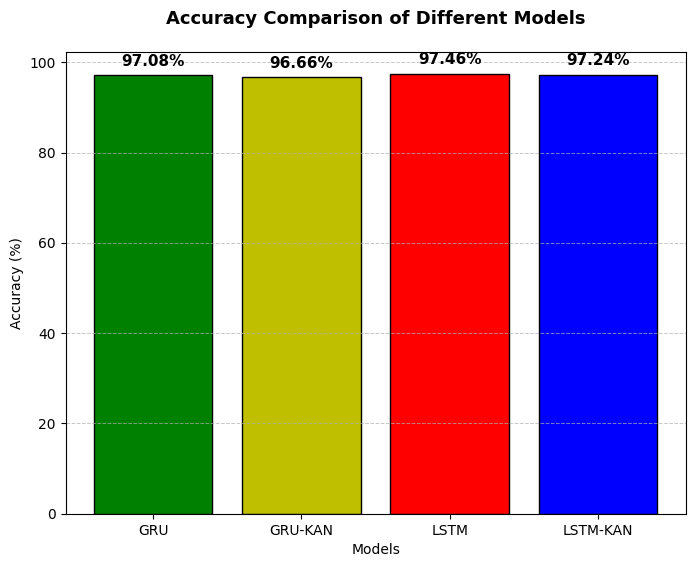

In [ ]:
import matplotlib.pyplot as plt


# Data for plotting (replace with your actual data)
models = ['GRU', 'GRU-KAN', 'LSTM', 'LSTM-KAN']
accuracies = [gru_accuracy, gru_kan_accuracy, lstm_accuracy, lstm_kan_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['g', 'y', 'r', 'b'], edgecolor='black', linewidth=1)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


# Set axis labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Different Models", fontsize=13, fontweight='bold', pad=20)

# # Add value labels on top of each bar
# for bar, accuracy in zip(bars, accuracies):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{accuracy:.2f}%", ha='center', va='bottom')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered alignment
        height + 1.5,  # Position slightly above the bar
        f"{height:.2f}%",  # Display accuracy percentage
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )


# Show the plot
plt.show()

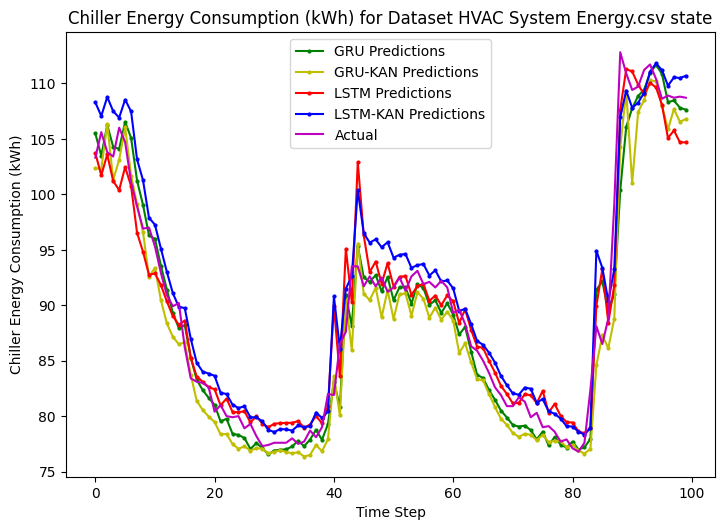

In [ ]:
import matplotlib.pyplot as plt

# Warna yang akan digunakan untuk plot
colors = ["g", "y", "r", "b", "m"]

plt.figure(figsize=(14, 10))

# Assuming all output lists (gru_outputs, gru_kan_outputs, etc.) have the same structure
num_states = len(states_list)  # Assuming states_list contains all desired states

# Loop through states and create subplots
for i in range(min(num_states, 4)):  # Limit to 4 subplots for now
    plt.subplot(2, 2, i + 1)

    # Access data for the current state (assuming it's the first element in the lists)
    gru_data = gru_outputs[0]  # Access data for the first (and only) state in the list
    gru_kan_data = gru_kan_outputs[0]
    lstm_data = lstm_outputs[0]
    lstm_kan_data = lstm_kan_outputs[0]
    target_data = targets[0]

    # Adjust data slicing based on subplot and data length
    if i == 0:
        data_slice = slice(-100, None)  # Last 100 data points
    elif i == 1:
        data_slice = slice(-50, None)  # Last 50 data points
    elif i == 2:
        data_slice = slice(None, 50)  # First 50 data points
    else:
        data_slice = slice(None, 100)  # First 100 data points

    plt.plot(gru_data[data_slice], "-o", color=colors[0], label="GRU Predictions", markersize=2)
    plt.plot(gru_kan_data[data_slice], "-o", color=colors[1], label="GRU-KAN Predictions", markersize=2)
    plt.plot(lstm_data[data_slice], "-o", color=colors[2], label="LSTM Predictions", markersize=2)
    plt.plot(lstm_kan_data[data_slice], "-o", color=colors[3], label="LSTM-KAN Predictions", markersize=2)
    plt.plot(target_data[data_slice], color=colors[4], label="Actual")

    plt.ylabel("Chiller Energy Consumption (kWh)")
    plt.xlabel("Time Step")
    plt.title(f"Chiller Energy Consumption (kWh) for {states_list[i]} state")  # Use state from states_list
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # visualisasi

# import matplotlib.pyplot as plt


# # Number of states to plot
# num_states_to_plot = min(len(states_list), 4)  # Limit to 4 for better visualization

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=num_states_to_plot, ncols=1, figsize=(10, 5 * num_states_to_plot))

# # Loop through the states and create individual plots
# for i, state in enumerate(states_list[:num_states_to_plot]):
#     ax = axes[i] if num_states_to_plot > 1 else axes

#     # Extract data for the current state
#     gru_data = gru_outputs[i]
#     gru_kan_data = gru_kan_outputs[i]
#     lstm_data = lstm_outputs[i]
#     lstm_kan_data = lstm_kan_outputs[i]
#     target_data = targets[i]

#     # Plot data
#     ax.plot(gru_data, label="GRU", marker='o', markersize=2, linewidth=1)
#     ax.plot(gru_kan_data, label="GRU-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_data, label="LSTM", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_kan_data, label="LSTM-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(target_data, label="Actual", linewidth=1.5)

#     # Set labels and title
#     plt.xlabel('Time Step')
#     ax.set_ylabel("Chiller Energy Consumption (kWh)")
#     ax.set_title(f"State: {state}")
#     ax.legend()

# plt.tight_layout()
# plt.show()

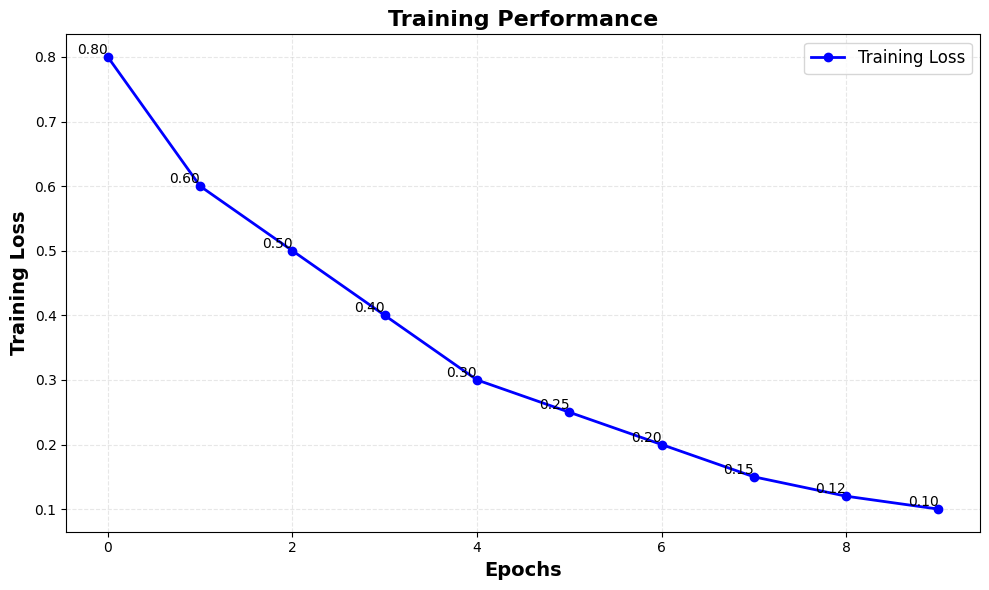

In [ ]:
import matplotlib.pyplot as plt

# Data contoh (ganti dengan data aktual dari proses pelatihan)
epochs = list(range(10))  # Epochs (0-9)
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]  # Training Loss per epoch

# Warna dan format garis
colors = ["g", "b", "r", "y", "m"]

# Membuat plot utama
plt.figure(figsize=(10, 6))

# Menambahkan plot training loss
plt.plot(
    epochs,
    training_loss,
    "-o",
    color=colors[1],
    label="Training Loss",
    markersize=6,
    linewidth=2
)

# Menambahkan detail pada grafik
plt.title("Training Performance", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Training Loss", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Anotasi nilai loss pada setiap titik
for epoch, loss in zip(epochs, training_loss):
    plt.text(epoch, loss, f"{loss:.2f}", fontsize=10, ha='right', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()


# Percobaan ke 8

In [ ]:
# Mengimpor modul untuk mengakses operasi sistem seperti mengelola file dan waktu.
import os
import time

# Mengimpor pustaka NumPy untuk komputasi numerik yang efisien.
import numpy as np

# Mengimpor pustaka Pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data, khususnya plot 2D.
import matplotlib.pyplot as plt

# Mengimpor pustaka PyTorch untuk pembuatan model deep learning.
import torch
import torch.nn as nn  # Modul PyTorch untuk membuat lapisan jaringan saraf.
from torch.utils.data import TensorDataset, DataLoader  # Modul untuk mengelola dataset dan batch data.
import torch.nn.functional as F  # Fungsi aktivasi dan fungsi lainnya yang umum digunakan pada jaringan saraf.

# Mengimpor modul untuk operasi matematika umum.
import math

# Mengimpor fungsi tqdm_notebook untuk menampilkan progress bar di Jupyter Notebook.
from tqdm.notebook import tqdm as tqdm_notebook

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi data.
from sklearn.preprocessing import MinMaxScaler

# Mengimpor modul random
import random


# Tambahkan fungsi `set_seed` untuk konsistensi hasil
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

# Tetapkan seed sebelum melanjutkan
set_seed(42)

In [ ]:
# Opsional proses ini bisa diskip

print(torch.__version__)  # Mencetak versi PyTorch yang digunakan.

2.5.1+cu121


In [ ]:
# Menentukan jalur direktori tempat file data berada.
data_dir = "/content/drive/MyDrive/Tesis/Dataset HVAC"  # Path ke direktori data di Google Colab atau lokal.

# Membaca file CSV yang berisi dataset ke dalam DataFrame menggunakan Pandas.
df = pd.read_csv("/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data.
df.head()


Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Building Load (RT)  Outside Temperature (F)  Dew Point (F)  Humidity (%)  
0               479.6                       82             75            79  
1               460.3                       82             75            79  
2               462.4                       82             75            79  
3               458.5                       82             75            79  
4               455.4                       82             75            79

In [ ]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index):
    """
    Fungsi untuk membentuk input dan label dengan jendela geser pada data time series.

    Parameters:
    - data: array numpy yang berisi data.
    - window_size: ukuran jendela (jumlah timestamp dalam setiap input).
    - inputs_cols_indices: indeks kolom yang ingin dimasukkan sebagai fitur input.
    - label_col_index: indeks kolom yang digunakan sebagai label output.

    Returns:
    - inputs: array numpy yang berisi input sequences berdasarkan jendela geser.
    - labels: array numpy yang berisi label untuk setiap sequence.
    """

    # Membuat array kosong untuk menyimpan input sequences dan label.
    # `inputs` akan memiliki dimensi (jumlah_instance, panjang_jendela, jumlah_fitur)
    inputs = np.zeros((len(data) - window_size, window_size, len(inputs_cols_indices)))
    # `labels` adalah array 1D yang akan menampung label untuk setiap sequence.
    labels = np.zeros(len(data) - window_size)

    # Iterasi melalui data untuk membentuk sequence input dan label
    for i in range(window_size, len(data)):
        # Mengambil data dalam jendela dan menambahkannya ke `inputs`
        inputs[i - window_size] = data[i - window_size : i, inputs_cols_indices]
        # Menetapkan nilai label dari kolom yang diinginkan
        labels[i - window_size] = data[i, label_col_index]

    # Mereshape `inputs` dan `labels` ke bentuk yang sesuai untuk model
    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)

    # Menampilkan bentuk (shape) dari `inputs` dan `labels` untuk verifikasi
    print(inputs.shape, labels.shape)

    return inputs, labels


In [ ]:
# Menetapkan indeks kolom label sebagai 0, yaitu kolom 'consumption' yang akan diprediksi.
label_col_index = 0  # Menggunakan 'consumption' sebagai label target.

# Menetapkan indeks kolom yang akan digunakan sebagai fitur input.
# Fitur yang dipilih adalah (consumption, hour, dayofweek, month, dayofyear).
inputs_cols_indices = range(5)  # Menggunakan kolom-kolom fitur dari indeks 0 hingga 4.

# Menetapkan ukuran jendela (window size) untuk mengatur panjang setiap sequence.
window_size = 90  # Panjang urutan yang akan dimasukkan sebagai input dalam model.

# Membuat dictionary untuk menyimpan objek scaler yang akan digunakan pada data label.
# Ini memungkinkan kita untuk melakukan normalisasi pada data pelatihan, dan nantinya mengembalikan data
# hasil prediksi dari model ke skala aslinya pada tahap evaluasi.
label_scalers = {}

# Inisialisasi list kosong untuk menampung data input pelatihan.
train_x = []

# Inisialisasi dictionary kosong untuk menampung data input dan label pengujian.
# Dictionary `test_x` akan menyimpan input pengujian, dan `test_y` untuk label pengujian.
test_x = {}
test_y = {}


In [ ]:
# Memilih file .csv dari direktori data dan menyimpannya ke dalam `processing_files`.
processing_files = [
    file for file in os.listdir(data_dir) if os.path.splitext(file)[1] == ".csv"
]

# Menentukan jumlah file yang akan digunakan untuk dataset
num_files_for_dataset = 5

# Memproses setiap file dalam daftar `processing_files` hingga jumlah yang ditentukan
for file in tqdm_notebook(processing_files[:num_files_for_dataset]):
    print(f"Processing {file} ...")

    # Membaca file .csv ke dalam DataFrame Pandas dan mengonversi kolom 'Tanggal' menjadi tipe tanggal
    df = pd.read_csv(os.path.join(data_dir, file), parse_dates=["Local Time (Timezone : GMT+8h)"])

    # Preprocessing
    # df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')  # Mengonversi kolom tanggal ke format datetime
    # df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year  # Menambahkan kolom 'Year' berdasarkan kolom 'Tanggal'
    # df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month  # Menambahkan kolom 'Month' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day  # Menambahkan kolom 'Day' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
    df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
    df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day
    df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour
    df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
    df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    # Normalisasi data input
    sc = MinMaxScaler()  # Inisialisasi scaler untuk input
    label_sc = MinMaxScaler()  # Inisialisasi scaler untuk label
    data = sc.fit_transform(df.values)  # Normalisasi data menggunakan MinMaxScaler

    # Menyimpan scaler untuk label agar bisa digunakan untuk mengembalikan nilai prediksi ke skala asli saat evaluasi
    label_sc.fit(df.iloc[:, label_col_index].values.reshape(-1, 1))
    label_scalers[file] = label_sc  # Menyimpan scaler label dalam dictionary

    # Membuat urutan input dan label menggunakan fungsi move_sliding_window
    inputs, labels = move_sliding_window(
        data,
        window_size,
        inputs_cols_indices=inputs_cols_indices,
        label_col_index=label_col_index,
    )

    # Menggabungkan instance yang dihasilkan dari semua file .csv.
    # Membagi data menjadi bagian pelatihan dan pengujian, lalu menggabungkannya ke dalam array tunggal.
    test_portion = int(0.1 * len(inputs))  # Menentukan bagian data untuk pengujian (10%)
    if len(train_x) == 0:  # Jika ini iterasi pertama
        train_x = inputs[:-test_portion]  # Menyimpan data pelatihan input
        train_y = labels[:-test_portion]  # Menyimpan data pelatihan label
    else:
        # Menggabungkan data pelatihan dari file saat ini dengan data pelatihan sebelumnya
        train_x = np.concatenate((train_x, inputs[:-test_portion]))
        train_y = np.concatenate((train_y, labels[:-test_portion]))

    # Menyimpan data pengujian untuk setiap file dalam dictionary `test_x` dan `test_y`
    test_x[file] = inputs[-test_portion:]
    test_y[file] = labels[-test_portion:]


  0%|          | 0/1 [00:00<?, ?it/s]

Processing Dataset HVAC System Energy.csv ...
(13525, 90, 5) (13525, 1)


In [ ]:
df

Chilled Water Rate (L/sec)  Building Load (RT)  \
0                            85.6               479.6   
1                            84.3               460.3   
2                            84.6               462.4   
3                            84.8               458.5   
4                            84.7               455.4   
...                           ...                 ...   
13610                       108.6               579.9   
13611                       108.9               567.3   
13612                       108.7               561.7   
13613                       108.8               566.0   
13614                       108.7               569.7   

       Outside Temperature (F)  Dew Point (F)  Humidity (%)  Year  Month  Day  \
0                           82             75            79  2019      8   18   
1                           82             75            79  2019      8   18   
2                           82             75            79  2019      8   18   
3                           82             75            79  2019      8   18   
4                           82             75            79  2019      8   18   
...                        ...            ...           ...   ...    ...  ...   
13610                       84             75            74  2020      6    1   
13611                       84             75            74  2020      6    1   
13612                       82             75            79  2020      6    1   
13613                       82             77            84  2020      6    1   
13614                       82             75            79  2020      6    1   

       Hour  DayOfWeek  
0         0          6  
1         0          6  
2         1          6  
3         1          6  
4         2          6  
...     ...        ...  
13610    11          0  
13611    11          0  
13612    12          0  
13613    12          0  
13614    13          0  

[13615 rows x 10 columns]

In [ ]:
# Memeriksa bentuk (shape) dari data pelatihan dan data pengujian.
# Menggunakan nama file "dataset_clean_baru.csv" sebagai kunci untuk test_x.
train_x.shape, test_x["Dataset HVAC System Energy.csv"].shape

((12173, 90, 5), (1352, 90, 5))

In [ ]:
# Menetapkan ukuran batch untuk pemrosesan dalam model.
batch_size = 100

# Membuat TensorDataset dari data pelatihan, mengonversi `train_x` dan `train_y` menjadi tensor PyTorch.
# `train_x` berisi fitur-fitur input, dan `train_y` berisi label target.
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# Membuat DataLoader untuk memuat data secara batch dengan parameter berikut:
# - `shuffle=True`: Mengacak urutan data di setiap epoch untuk meningkatkan generalisasi model.
# - `batch_size=batch_size`: Mengatur ukuran batch menjadi 100.
# - `drop_last=True`: Mengabaikan batch terakhir jika ukurannya tidak sesuai dengan `batch_size`,
#   memastikan semua batch memiliki ukuran yang sama.
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=True
)


In [ ]:
# Mencetak ukuran data pelatihan, ukuran batch, dan jumlah iterasi per epoch.
print(
    f"Train Size: {train_x.shape}, Batch Size: {batch_size}, # of iterations per epoch: {int(train_x.shape[0] / batch_size)}"
)


Train Size: (12173, 90, 5), Batch Size: 100, # of iterations per epoch: 121


In [ ]:
# Membebaskan memori dengan menghapus variabel `train_x` dan `train_y`.
del train_x, train_y


In [ ]:
# Memeriksa ketersediaan GPU.
# Jika GPU tersedia, `torch.cuda.is_available()` akan mengembalikan True, jika tidak akan mengembalikan False.
is_cuda = torch.cuda.is_available()

# Menetapkan device yang akan digunakan untuk menjalankan model berdasarkan ketersediaan GPU.
if is_cuda:
    device = torch.device("cuda")  # Mengatur device ke GPU
    print("GPU is available")       # Mencetak pesan jika GPU tersedia
else:
    device = torch.device("cpu")    # Mengatur device ke CPU jika GPU tidak tersedia


GPU is available


In [ ]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        # Menyimpan parameter input dan output
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        # Membuat grid untuk basis fungsi B-spline
        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        # Membuat bobot untuk komponen linier dasar dan komponen spline
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        # Mengatur parameter skala dan aktivasi untuk spline
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        # Menginisialisasi parameter
        self.reset_parameters()

    def reset_parameters(self):
        # Menginisialisasi bobot linier dasar dan bobot spline dengan kaiming_uniform
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 0.5) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        # Menghitung basis fungsi B-spline
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        # Menyelesaikan koefisien spline dari titik input
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        # Mengatur skala bobot spline
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        # Fungsi forward untuk lapisan KANLinear
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        # Memperbarui grid spline adaptif berdasarkan input x
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        # Menghitung kehilangan regulasi berdasarkan aktivasi dan entropi
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super(GRUNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Mendefinisikan lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output GRU ke dimensi output yang diinginkan
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Melakukan forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output pada timestep terakhir dan meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output akhir dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

# 2. GRUNetKAN
# Mirip dengan GRUNet, tetapi menggantikan lapisan linier dengan KANLinear untuk menambah fleksibilitas.
class GRUNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super(GRUNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super(LSTMNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output dari LSTM ke dimensi output
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

# LSTMNetKAN
# Mirip dengan LSTMNet, tetapi menggantikan lapisan linier dengan KANLinear untuk mengembangkan fleksibilitas dan kemampuan representasi.
class LSTMNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super(LSTMNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden


In [ ]:
def train(
    train_loader,
    learn_rate,
    hidden_dim=100,
    n_layers=4,
    n_epochs=10,
    model_type="GRU",
    print_every=100,
):
    # Mengambil dimensi input dari train_loader
    input_dim = next(iter(train_loader))[0].shape[2]  # 5
    output_dim = 1  # Definisi dimensi output

    # Inisialisasi model sesuai jenisnya
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "GRUKAN":
        model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)  # Pindahkan model ke perangkat

    # Definisi loss function dan optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # Memulai proses training
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []

    # Loop melalui jumlah epoch
    for epoch in range(1, n_epochs + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.0
        counter = 0

        # Iterasi melalui batch data
        for x, label in train_loader:
            counter += 1

            # Reset hidden state sesuai model yang digunakan
            if model_type == "GRU" or model_type == "GRUKAN":
                h = h.data
            elif model_type == "LSTM" or model_type == "LSTMKAN":
                h = tuple([e.data for e in h])

            model.zero_grad()  # Reset gradien

            # Forward pass
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())

            # Backpropagation dan optimisasi
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Menambahkan loss untuk perhitungan rata-rata
            if counter % print_every == 0:
                print(
                    f"Epoch {epoch} - Step: {counter}/{len(train_loader)} - Average Loss for Epoch: {avg_loss/counter}"
                )

        current_time = time.process_time()
        print(
            f"Epoch {epoch}/{n_epochs} Done, Total Loss: {avg_loss/len(train_loader)}"
        )
        print(f"Time Elapsed for Epoch: {current_time-start_time} seconds")
        epoch_times.append(current_time - start_time)

    # Menghitung total waktu pelatihan
    print(f"Total Training Time: {sum(epoch_times)} seconds")
    return model


In [ ]:
# Tetapkan seed
set_seed(42)

# Parameter pelatihan
seq_len = 90  # Panjang sequence atau jumlah timestamps
n_hidden = 100  # Ukuran hidden layer
n_layers = 4  # Jumlah lapisan RNN
n_epochs = 10  # Jumlah epoch
print_every = 100  # Frekuensi menampilkan loss
lr = 0.01  # Learning rate

# Memanggil fungsi train untuk melatih model GRU
gru_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch
    model_type="GRU",    # Tipe model (di sini menggunakan GRU)
    print_every=print_every # Frekuensi print loss selama pelatihan
)


Starting Training of GRU model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.018978001698851586
Epoch 1/10 Done, Total Loss: 0.017148922005098714
Time Elapsed for Epoch: 1.1983240410000349 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.006945852828212082
Epoch 2/10 Done, Total Loss: 0.006897302431031323
Time Elapsed for Epoch: 1.0138121020000312 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006163220098242164
Epoch 3/10 Done, Total Loss: 0.006112522782357641
Time Elapsed for Epoch: 1.0003869530000316 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005735011459328234
Epoch 4/10 Done, Total Loss: 0.005729792668476455
Time Elapsed for Epoch: 1.0242870629999743 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005666392925195396
Epoch 5/10 Done, Total Loss: 0.0057634933705418565
Time Elapsed for Epoch: 1.1163831970000047 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.00545211438788101
Epoch 6/10 Done, Total Loss: 0.0054443

In [ ]:
# Menyimpan parameter model yang sudah dilatih ke file
torch.save(gru_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRU8.pth')


In [ ]:
# melatih model dengan tipe GRUKAN
# Parameter seq_len (sequence length) untuk model, yaitu jumlah timestamps
seq_len = 90

# Memanggil fungsi train untuk melatih model GRUKAN
gru_kan_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch untuk pelatihan
    model_type="GRUKAN", # Tipe model (di sini menggunakan GRUKAN)
    print_every=print_every # Frekuensi menampilkan loss selama pelatihan
)


Starting Training of GRUKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.02052738416939974
Epoch 1/10 Done, Total Loss: 0.018175355916889
Time Elapsed for Epoch: 1.3940090350000105 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.0070585645525716246
Epoch 2/10 Done, Total Loss: 0.007012763612880564
Time Elapsed for Epoch: 1.2424628449999773 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006562525411136448
Epoch 3/10 Done, Total Loss: 0.00643080256856239
Time Elapsed for Epoch: 1.266896428999985 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005718749416992068
Epoch 4/10 Done, Total Loss: 0.005837938917631453
Time Elapsed for Epoch: 1.2599830259999862 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005915515820961445
Epoch 5/10 Done, Total Loss: 0.005914206376052962
Time Elapsed for Epoch: 1.2665232679999576 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005562698438297957
Epoch 6/10 Done, Total Loss: 0.005534365

In [ ]:
# Menyimpan parameter model GRUKAN yang telah dilatih ke dalam file
torch.save(gru_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRUkan8.pth')


In [ ]:
lstm_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTM",
    print_every=print_every,
)

Starting Training of LSTM model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.047260494180954994
Epoch 1/10 Done, Total Loss: 0.040589201171720816
Time Elapsed for Epoch: 1.4241846619999592 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.0076463877176865935
Epoch 2/10 Done, Total Loss: 0.00767202382091402
Time Elapsed for Epoch: 1.4914761350000276 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006732243823353201
Epoch 3/10 Done, Total Loss: 0.006715985122791006
Time Elapsed for Epoch: 1.4559283469999968 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006393397303763777
Epoch 4/10 Done, Total Loss: 0.006280278675412097
Time Elapsed for Epoch: 1.2971406439999669 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005794267931487411
Epoch 5/10 Done, Total Loss: 0.005697006665647399
Time Elapsed for Epoch: 1.2966562510000017 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005731881693936885
Epoch 6/10 Done, Total Loss: 0.005753

In [ ]:
torch.save(lstm_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm8.pth')

In [ ]:
lstm_kan_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTMKAN",
    print_every=print_every,
)

Starting Training of LSTMKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.03070563733112067
Epoch 1/10 Done, Total Loss: 0.026770201365440345
Time Elapsed for Epoch: 1.4746866570000066 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007558220839127898
Epoch 2/10 Done, Total Loss: 0.007582130726457627
Time Elapsed for Epoch: 1.488255143999993 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006805303960572928
Epoch 3/10 Done, Total Loss: 0.006728428596830811
Time Elapsed for Epoch: 1.8502950949999786 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006146886246278882
Epoch 4/10 Done, Total Loss: 0.006071502825799437
Time Elapsed for Epoch: 1.8539909460000104 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005854007767047733
Epoch 5/10 Done, Total Loss: 0.005897581854388733
Time Elapsed for Epoch: 1.8081590849999998 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005692166255321354
Epoch 6/10 Done, Total Loss: 0.00575

In [ ]:
torch.save(lstm_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm_kan8.pth')

In [ ]:
!nvidia-smi

Tue Dec 10 06:06:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0              29W /  70W |   4399MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# move device to cpu for evaluation to avoid GPU memory run
device = "cpu"

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 4
gru_model2 = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU8.pth"))

<ipython-input-321-2df55de1089a>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU8.pth"))

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_model.to(device)

GRUNet(
  (gru): GRU(5, 100, num_layers=4, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 4
gru_kan_model2 = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan8.pth"))

<ipython-input-323-0f71f9e0fc4a>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan8

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_kan_model2.to(device)

GRUNetKAN(
  (gru): GRU(5, 100, num_layers=4, batch_first=True, dropout=0.5)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 4
lstm_model2 = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm8.pth"))

<ipython-input-325-6db0944b839e>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm8.pth"

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_model2.to(device)

LSTMNet(
  (lstm): LSTM(5, 100, num_layers=4, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 4
lstm_kan_model2 = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_kan8.pth"))

<ipython-input-327-b4efa94fd9a9>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_k

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_kan_model2.to(device)

LSTMNetKAN(
  (lstm): LSTM(5, 100, num_layers=4, batch_first=True, dropout=0.5)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
def sMAPE(outputs, targets):
    sMAPE = (
        100
        / len(targets)
        * np.sum(np.abs(outputs - targets) / (np.abs(outputs + targets)) / 2)
    )
    return sMAPE

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate(model, test_x, test_y, label_scalers):
    model.to(device)
    outputs = []
    targets = []
    start_time = time.process_time()
    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    print(f"Evaluation Time: {time.process_time()-start_time}")
    print(f"sMAPE: {round(sMAPE(concatenated_outputs, concatenated_targets), 3)}%")

    # list of of targets/outputs for each state
    return outputs, targets, sMAPE

In [ ]:
# Evaluate Performance GRU with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    # Move the model to the device before the loop
    model.to(device)
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

Evaluation Time: 0.024721441999986382
MAE: 2.659
RMSE: 4.325
R²: 0.805


In [ ]:
# ipython-input-196-53ac28a8cb99
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

# Since you want to calculate sMAPE for the GRU model, you can call the sMAPE function separately:
gru_sMAPE = sMAPE(np.concatenate(gru_outputs), np.concatenate(targets))
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.01615566499998522
MAE: 2.659
RMSE: 4.325
R²: 0.805
GRU sMAPE: 0.695%


In [ ]:
#Evaluate Performance GRUKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.01990293900001916
MAE: 2.659
RMSE: 4.325
R²: 0.805
GRU sMAPE: 0.695%


In [ ]:
# Evaluate Performance LSTM with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTM sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.021375245999990966
MAE: 2.659
RMSE: 4.325
R²: 0.805
LSTM sMAPE: 0.695%


In [ ]:
# Evaluate Performance LSTMKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def calculate_mae(outputs, targets): # Renamed to avoid conflict
    return np.mean(np.abs(outputs - targets))

def calculate_rmse(outputs, targets): # Renamed to avoid conflict
    return np.sqrt(np.mean((outputs - targets) ** 2))

def calculate_r2(outputs, targets): # Renamed to avoid conflict
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2 using the renamed functions
    mae_value = calculate_mae(concatenated_outputs, concatenated_targets)
    rmse_value = calculate_rmse(concatenated_outputs, concatenated_targets)
    r2_value = calculate_r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTMKAN sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.017003693999981806
MAE: 2.659
RMSE: 4.325
R²: 0.805
LSTMKAN sMAPE: 0.695%


In [ ]:
states_list = list(test_x.keys())

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung akurasi dalam bentuk persentase
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Hitung MAPE
    accuracy = 100 - (mape * 100)  # Akurasi sebagai 100% - MAPE
    return accuracy

print("\nEksperimen 8")
# Evaluate GRU model
print("\nEvaluate Model GRU:")
gru_outputs, gru_targets, _, _, _ = evaluate(gru_model, test_x, test_y, label_scalers)
gru_accuracy = calculate_accuracy(gru_targets, gru_outputs)
print(f"GRU Accuracy: {gru_accuracy:.2f}%")

# Evaluate GRU-KAN model
print("\nEvaluate Model GRU-KAN:")
gru_kan_outputs, gru_kan_targets, _, _, _ = evaluate(gru_kan_model, test_x, test_y, label_scalers)
gru_kan_accuracy = calculate_accuracy(gru_kan_targets, gru_kan_outputs)
print(f"GRU-KAN Accuracy: {gru_kan_accuracy:.2f}%")

# Evaluate LSTM model
print("\nEvaluate Model LSTM:")
lstm_outputs, lstm_targets, _, _, _ = evaluate(lstm_model, test_x, test_y, label_scalers)
lstm_accuracy = calculate_accuracy(lstm_targets, lstm_outputs)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Evaluate LSTM-KAN model
print("\nEvaluate Model LSTM-KAN:")
lstm_kan_outputs, lstm_kan_targets, _, _, _ = evaluate(lstm_kan_model, test_x, test_y, label_scalers)
lstm_kan_accuracy = calculate_accuracy(lstm_kan_targets, lstm_kan_outputs)
print(f"LSTM-KAN Accuracy: {lstm_kan_accuracy:.2f}%")



Eksperimen 8

Evaluate Model GRU:
Evaluation Time: 0.02230843300003471
MAE: 2.659
RMSE: 4.325
R²: 0.805
GRU Accuracy: 97.22%

Evaluate Model GRU-KAN:
Evaluation Time: 0.018436831999963488
MAE: 2.883
RMSE: 4.649
R²: 0.775
GRU-KAN Accuracy: 96.98%

Evaluate Model LSTM:
Evaluation Time: 0.012871291999999812
MAE: 2.63
RMSE: 4.366
R²: 0.802
LSTM Accuracy: 97.25%

Evaluate Model LSTM-KAN:
Evaluation Time: 0.02112836399999196
MAE: 3.347
RMSE: 4.932
R²: 0.747
LSTM-KAN Accuracy: 96.44%


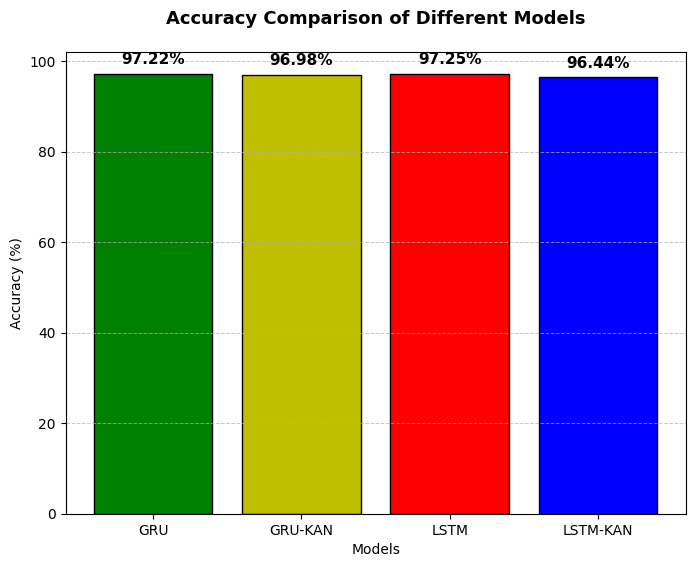

In [ ]:
import matplotlib.pyplot as plt


# Data for plotting (replace with your actual data)
models = ['GRU', 'GRU-KAN', 'LSTM', 'LSTM-KAN']
accuracies = [gru_accuracy, gru_kan_accuracy, lstm_accuracy, lstm_kan_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['g', 'y', 'r', 'b'], edgecolor='black', linewidth=1)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


# Set axis labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Different Models", fontsize=13, fontweight='bold', pad=20)

# # Add value labels on top of each bar
# for bar, accuracy in zip(bars, accuracies):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{accuracy:.2f}%", ha='center', va='bottom')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered alignment
        height + 1.5,  # Position slightly above the bar
        f"{height:.2f}%",  # Display accuracy percentage
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )


# Show the plot
plt.show()

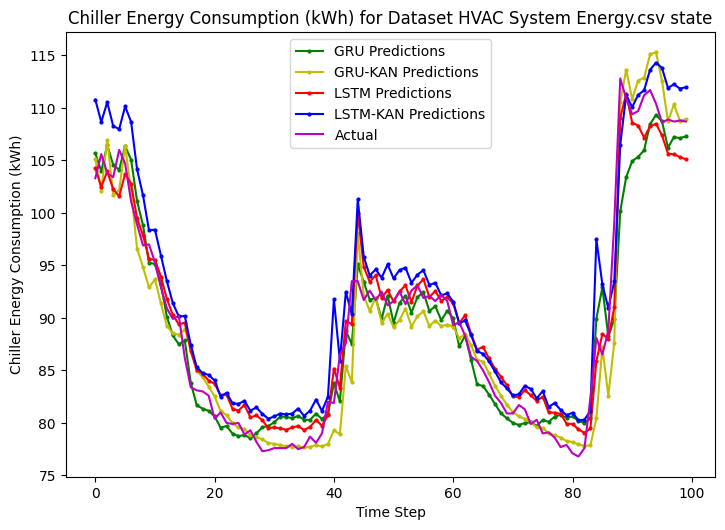

In [ ]:
import matplotlib.pyplot as plt

# Warna yang akan digunakan untuk plot
colors = ["g", "y", "r", "b", "m"]

plt.figure(figsize=(14, 10))

# Assuming all output lists (gru_outputs, gru_kan_outputs, etc.) have the same structure
num_states = len(states_list)  # Assuming states_list contains all desired states

# Loop through states and create subplots
for i in range(min(num_states, 4)):  # Limit to 4 subplots for now
    plt.subplot(2, 2, i + 1)

    # Access data for the current state (assuming it's the first element in the lists)
    gru_data = gru_outputs[0]  # Access data for the first (and only) state in the list
    gru_kan_data = gru_kan_outputs[0]
    lstm_data = lstm_outputs[0]
    lstm_kan_data = lstm_kan_outputs[0]
    target_data = targets[0]

    # Adjust data slicing based on subplot and data length
    if i == 0:
        data_slice = slice(-100, None)  # Last 100 data points
    elif i == 1:
        data_slice = slice(-50, None)  # Last 50 data points
    elif i == 2:
        data_slice = slice(None, 50)  # First 50 data points
    else:
        data_slice = slice(None, 100)  # First 100 data points

    plt.plot(gru_data[data_slice], "-o", color=colors[0], label="GRU Predictions", markersize=2)
    plt.plot(gru_kan_data[data_slice], "-o", color=colors[1], label="GRU-KAN Predictions", markersize=2)
    plt.plot(lstm_data[data_slice], "-o", color=colors[2], label="LSTM Predictions", markersize=2)
    plt.plot(lstm_kan_data[data_slice], "-o", color=colors[3], label="LSTM-KAN Predictions", markersize=2)
    plt.plot(target_data[data_slice], color=colors[4], label="Actual")

    plt.ylabel("Chiller Energy Consumption (kWh)")
    plt.xlabel("Time Step")
    plt.title(f"Chiller Energy Consumption (kWh) for {states_list[i]} state")  # Use state from states_list
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # visualisasi

# import matplotlib.pyplot as plt


# # Number of states to plot
# num_states_to_plot = min(len(states_list), 4)  # Limit to 4 for better visualization

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=num_states_to_plot, ncols=1, figsize=(10, 5 * num_states_to_plot))

# # Loop through the states and create individual plots
# for i, state in enumerate(states_list[:num_states_to_plot]):
#     ax = axes[i] if num_states_to_plot > 1 else axes

#     # Extract data for the current state
#     gru_data = gru_outputs[i]
#     gru_kan_data = gru_kan_outputs[i]
#     lstm_data = lstm_outputs[i]
#     lstm_kan_data = lstm_kan_outputs[i]
#     target_data = targets[i]

#     # Plot data
#     ax.plot(gru_data, label="GRU", marker='o', markersize=2, linewidth=1)
#     ax.plot(gru_kan_data, label="GRU-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_data, label="LSTM", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_kan_data, label="LSTM-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(target_data, label="Actual", linewidth=1.5)

#     # Set labels and title
#     plt.xlabel('Time Step')
#     ax.set_ylabel("Chiller Energy Consumption (kWh)")
#     ax.set_title(f"State: {state}")
#     ax.legend()

# plt.tight_layout()
# plt.show()

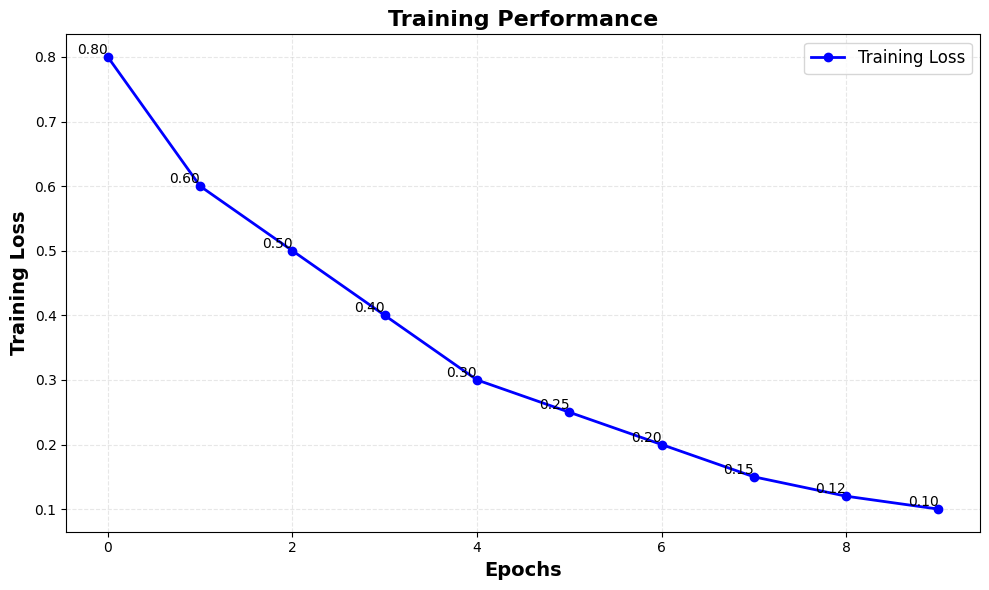

In [ ]:
import matplotlib.pyplot as plt

# Data contoh (ganti dengan data aktual dari proses pelatihan)
epochs = list(range(10))  # Epochs (0-9)
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]  # Training Loss per epoch

# Warna dan format garis
colors = ["g", "b", "r", "y", "m"]

# Membuat plot utama
plt.figure(figsize=(10, 6))

# Menambahkan plot training loss
plt.plot(
    epochs,
    training_loss,
    "-o",
    color=colors[1],
    label="Training Loss",
    markersize=6,
    linewidth=2
)

# Menambahkan detail pada grafik
plt.title("Training Performance", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Training Loss", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Anotasi nilai loss pada setiap titik
for epoch, loss in zip(epochs, training_loss):
    plt.text(epoch, loss, f"{loss:.2f}", fontsize=10, ha='right', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()


# Percobaan 9

fokus ke Learning Rate dan Jumlah Hidden Layer

In [ ]:
# Mengimpor modul untuk mengakses operasi sistem seperti mengelola file dan waktu.
import os
import time

# Mengimpor pustaka NumPy untuk komputasi numerik yang efisien.
import numpy as np

# Mengimpor pustaka Pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data, khususnya plot 2D.
import matplotlib.pyplot as plt

# Mengimpor pustaka PyTorch untuk pembuatan model deep learning.
import torch
import torch.nn as nn  # Modul PyTorch untuk membuat lapisan jaringan saraf.
from torch.utils.data import TensorDataset, DataLoader  # Modul untuk mengelola dataset dan batch data.
import torch.nn.functional as F  # Fungsi aktivasi dan fungsi lainnya yang umum digunakan pada jaringan saraf.

# Mengimpor modul untuk operasi matematika umum.
import math

# Mengimpor fungsi tqdm_notebook untuk menampilkan progress bar di Jupyter Notebook.
from tqdm.notebook import tqdm as tqdm_notebook

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi data.
from sklearn.preprocessing import MinMaxScaler

# Mengimpor modul random
import random


# Tambahkan fungsi `set_seed` untuk konsistensi hasil
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

# Tetapkan seed sebelum melanjutkan
set_seed(42)

In [ ]:
# Opsional proses ini bisa diskip

print(torch.__version__)  # Mencetak versi PyTorch yang digunakan.

2.5.1+cu121


In [ ]:
# Menentukan jalur direktori tempat file data berada.
data_dir = "/content/drive/MyDrive/Tesis/Dataset HVAC"  # Path ke direktori data di Google Colab atau lokal.

# Membaca file CSV yang berisi dataset ke dalam DataFrame menggunakan Pandas.
df = pd.read_csv("/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data.
df.head()


Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Building Load (RT)  Outside Temperature (F)  Dew Point (F)  Humidity (%)  
0               479.6                       82             75            79  
1               460.3                       82             75            79  
2               462.4                       82             75            79  
3               458.5                       82             75            79  
4               455.4                       82             75            79

In [ ]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index):
    """
    Fungsi untuk membentuk input dan label dengan jendela geser pada data time series.

    Parameters:
    - data: array numpy yang berisi data.
    - window_size: ukuran jendela (jumlah timestamp dalam setiap input).
    - inputs_cols_indices: indeks kolom yang ingin dimasukkan sebagai fitur input.
    - label_col_index: indeks kolom yang digunakan sebagai label output.

    Returns:
    - inputs: array numpy yang berisi input sequences berdasarkan jendela geser.
    - labels: array numpy yang berisi label untuk setiap sequence.
    """

    # Membuat array kosong untuk menyimpan input sequences dan label.
    # `inputs` akan memiliki dimensi (jumlah_instance, panjang_jendela, jumlah_fitur)
    inputs = np.zeros((len(data) - window_size, window_size, len(inputs_cols_indices)))
    # `labels` adalah array 1D yang akan menampung label untuk setiap sequence.
    labels = np.zeros(len(data) - window_size)

    # Iterasi melalui data untuk membentuk sequence input dan label
    for i in range(window_size, len(data)):
        # Mengambil data dalam jendela dan menambahkannya ke `inputs`
        inputs[i - window_size] = data[i - window_size : i, inputs_cols_indices]
        # Menetapkan nilai label dari kolom yang diinginkan
        labels[i - window_size] = data[i, label_col_index]

    # Mereshape `inputs` dan `labels` ke bentuk yang sesuai untuk model
    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)

    # Menampilkan bentuk (shape) dari `inputs` dan `labels` untuk verifikasi
    print(inputs.shape, labels.shape)

    return inputs, labels


In [ ]:
# Menetapkan indeks kolom label sebagai 0, yaitu kolom 'consumption' yang akan diprediksi.
label_col_index = 0  # Menggunakan 'consumption' sebagai label target.

# Menetapkan indeks kolom yang akan digunakan sebagai fitur input.
# Fitur yang dipilih adalah (consumption, hour, dayofweek, month, dayofyear).
inputs_cols_indices = range(5)  # Menggunakan kolom-kolom fitur dari indeks 0 hingga 4.

# Menetapkan ukuran jendela (window size) untuk mengatur panjang setiap sequence.
window_size = 90  # Panjang urutan yang akan dimasukkan sebagai input dalam model.

# Membuat dictionary untuk menyimpan objek scaler yang akan digunakan pada data label.
# Ini memungkinkan kita untuk melakukan normalisasi pada data pelatihan, dan nantinya mengembalikan data
# hasil prediksi dari model ke skala aslinya pada tahap evaluasi.
label_scalers = {}

# Inisialisasi list kosong untuk menampung data input pelatihan.
train_x = []

# Inisialisasi dictionary kosong untuk menampung data input dan label pengujian.
# Dictionary `test_x` akan menyimpan input pengujian, dan `test_y` untuk label pengujian.
test_x = {}
test_y = {}


In [ ]:
# Memilih file .csv dari direktori data dan menyimpannya ke dalam `processing_files`.
processing_files = [
    file for file in os.listdir(data_dir) if os.path.splitext(file)[1] == ".csv"
]

# Menentukan jumlah file yang akan digunakan untuk dataset
num_files_for_dataset = 5

# Memproses setiap file dalam daftar `processing_files` hingga jumlah yang ditentukan
for file in tqdm_notebook(processing_files[:num_files_for_dataset]):
    print(f"Processing {file} ...")

    # Membaca file .csv ke dalam DataFrame Pandas dan mengonversi kolom 'Tanggal' menjadi tipe tanggal
    df = pd.read_csv(os.path.join(data_dir, file), parse_dates=["Local Time (Timezone : GMT+8h)"])

    # Preprocessing
    # df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')  # Mengonversi kolom tanggal ke format datetime
    # df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year  # Menambahkan kolom 'Year' berdasarkan kolom 'Tanggal'
    # df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month  # Menambahkan kolom 'Month' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day  # Menambahkan kolom 'Day' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
    df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
    df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day
    df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour
    df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
    df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    # Normalisasi data input
    sc = MinMaxScaler()  # Inisialisasi scaler untuk input
    label_sc = MinMaxScaler()  # Inisialisasi scaler untuk label
    data = sc.fit_transform(df.values)  # Normalisasi data menggunakan MinMaxScaler

    # Menyimpan scaler untuk label agar bisa digunakan untuk mengembalikan nilai prediksi ke skala asli saat evaluasi
    label_sc.fit(df.iloc[:, label_col_index].values.reshape(-1, 1))
    label_scalers[file] = label_sc  # Menyimpan scaler label dalam dictionary

    # Membuat urutan input dan label menggunakan fungsi move_sliding_window
    inputs, labels = move_sliding_window(
        data,
        window_size,
        inputs_cols_indices=inputs_cols_indices,
        label_col_index=label_col_index,
    )

    # Menggabungkan instance yang dihasilkan dari semua file .csv.
    # Membagi data menjadi bagian pelatihan dan pengujian, lalu menggabungkannya ke dalam array tunggal.
    test_portion = int(0.1 * len(inputs))  # Menentukan bagian data untuk pengujian (10%)
    if len(train_x) == 0:  # Jika ini iterasi pertama
        train_x = inputs[:-test_portion]  # Menyimpan data pelatihan input
        train_y = labels[:-test_portion]  # Menyimpan data pelatihan label
    else:
        # Menggabungkan data pelatihan dari file saat ini dengan data pelatihan sebelumnya
        train_x = np.concatenate((train_x, inputs[:-test_portion]))
        train_y = np.concatenate((train_y, labels[:-test_portion]))

    # Menyimpan data pengujian untuk setiap file dalam dictionary `test_x` dan `test_y`
    test_x[file] = inputs[-test_portion:]
    test_y[file] = labels[-test_portion:]


  0%|          | 0/1 [00:00<?, ?it/s]

Processing Dataset HVAC System Energy.csv ...
(13525, 90, 5) (13525, 1)


In [ ]:
df

Chilled Water Rate (L/sec)  Building Load (RT)  \
0                            85.6               479.6   
1                            84.3               460.3   
2                            84.6               462.4   
3                            84.8               458.5   
4                            84.7               455.4   
...                           ...                 ...   
13610                       108.6               579.9   
13611                       108.9               567.3   
13612                       108.7               561.7   
13613                       108.8               566.0   
13614                       108.7               569.7   

       Outside Temperature (F)  Dew Point (F)  Humidity (%)  Year  Month  Day  \
0                           82             75            79  2019      8   18   
1                           82             75            79  2019      8   18   
2                           82             75            79  2019      8   18   
3                           82             75            79  2019      8   18   
4                           82             75            79  2019      8   18   
...                        ...            ...           ...   ...    ...  ...   
13610                       84             75            74  2020      6    1   
13611                       84             75            74  2020      6    1   
13612                       82             75            79  2020      6    1   
13613                       82             77            84  2020      6    1   
13614                       82             75            79  2020      6    1   

       Hour  DayOfWeek  
0         0          6  
1         0          6  
2         1          6  
3         1          6  
4         2          6  
...     ...        ...  
13610    11          0  
13611    11          0  
13612    12          0  
13613    12          0  
13614    13          0  

[13615 rows x 10 columns]

In [ ]:
# Memeriksa bentuk (shape) dari data pelatihan dan data pengujian.
# Menggunakan nama file "dataset_clean_baru.csv" sebagai kunci untuk test_x.
train_x.shape, test_x["Dataset HVAC System Energy.csv"].shape

((12173, 90, 5), (1352, 90, 5))

In [ ]:
# Menetapkan ukuran batch untuk pemrosesan dalam model.
batch_size = 100

# Membuat TensorDataset dari data pelatihan, mengonversi `train_x` dan `train_y` menjadi tensor PyTorch.
# `train_x` berisi fitur-fitur input, dan `train_y` berisi label target.
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# Membuat DataLoader untuk memuat data secara batch dengan parameter berikut:
# - `shuffle=True`: Mengacak urutan data di setiap epoch untuk meningkatkan generalisasi model.
# - `batch_size=batch_size`: Mengatur ukuran batch menjadi 100.
# - `drop_last=True`: Mengabaikan batch terakhir jika ukurannya tidak sesuai dengan `batch_size`,
#   memastikan semua batch memiliki ukuran yang sama.
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=True
)


In [ ]:
# Mencetak ukuran data pelatihan, ukuran batch, dan jumlah iterasi per epoch.
print(
    f"Train Size: {train_x.shape}, Batch Size: {batch_size}, # of iterations per epoch: {int(train_x.shape[0] / batch_size)}"
)


Train Size: (12173, 90, 5), Batch Size: 100, # of iterations per epoch: 121


In [ ]:
# Membebaskan memori dengan menghapus variabel `train_x` dan `train_y`.
del train_x, train_y


In [ ]:
# Memeriksa ketersediaan GPU.
# Jika GPU tersedia, `torch.cuda.is_available()` akan mengembalikan True, jika tidak akan mengembalikan False.
is_cuda = torch.cuda.is_available()

# Menetapkan device yang akan digunakan untuk menjalankan model berdasarkan ketersediaan GPU.
if is_cuda:
    device = torch.device("cuda")  # Mengatur device ke GPU
    print("GPU is available")       # Mencetak pesan jika GPU tersedia
else:
    device = torch.device("cpu")    # Mengatur device ke CPU jika GPU tidak tersedia


GPU is available


In [ ]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        # Menyimpan parameter input dan output
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        # Membuat grid untuk basis fungsi B-spline
        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        # Membuat bobot untuk komponen linier dasar dan komponen spline
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        # Mengatur parameter skala dan aktivasi untuk spline
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        # Menginisialisasi parameter
        self.reset_parameters()

    def reset_parameters(self):
        # Menginisialisasi bobot linier dasar dan bobot spline dengan kaiming_uniform
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 0.5) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        # Menghitung basis fungsi B-spline
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        # Menyelesaikan koefisien spline dari titik input
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        # Mengatur skala bobot spline
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        # Fungsi forward untuk lapisan KANLinear
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        # Memperbarui grid spline adaptif berdasarkan input x
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        # Menghitung kehilangan regulasi berdasarkan aktivasi dan entropi
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(GRUNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Mendefinisikan lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output GRU ke dimensi output yang diinginkan
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Melakukan forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output pada timestep terakhir dan meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output akhir dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

# 2. GRUNetKAN
# Mirip dengan GRUNet, tetapi menggantikan lapisan linier dengan KANLinear untuk menambah fleksibilitas.
class GRUNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(GRUNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(LSTMNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output dari LSTM ke dimensi output
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

# LSTMNetKAN
# Mirip dengan LSTMNet, tetapi menggantikan lapisan linier dengan KANLinear untuk mengembangkan fleksibilitas dan kemampuan representasi.
class LSTMNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(LSTMNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden


In [ ]:
def train(
    train_loader,
    learn_rate,
    hidden_dim=100,
    n_layers=2,
    n_epochs=10,
    model_type="GRU",
    print_every=100,
):
    # Mengambil dimensi input dari train_loader
    input_dim = next(iter(train_loader))[0].shape[2]  # 5
    output_dim = 1  # Definisi dimensi output

    # Inisialisasi model sesuai jenisnya
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "GRUKAN":
        model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)  # Pindahkan model ke perangkat

    # Definisi loss function dan optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # Memulai proses training
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []

    # Loop melalui jumlah epoch
    for epoch in range(1, n_epochs + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.0
        counter = 0

        # Iterasi melalui batch data
        for x, label in train_loader:
            counter += 1

            # Reset hidden state sesuai model yang digunakan
            if model_type == "GRU" or model_type == "GRUKAN":
                h = h.data
            elif model_type == "LSTM" or model_type == "LSTMKAN":
                h = tuple([e.data for e in h])

            model.zero_grad()  # Reset gradien

            # Forward pass
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())

            # Backpropagation dan optimisasi
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Menambahkan loss untuk perhitungan rata-rata
            if counter % print_every == 0:
                print(
                    f"Epoch {epoch} - Step: {counter}/{len(train_loader)} - Average Loss for Epoch: {avg_loss/counter}"
                )

        current_time = time.process_time()
        print(
            f"Epoch {epoch}/{n_epochs} Done, Total Loss: {avg_loss/len(train_loader)}"
        )
        print(f"Time Elapsed for Epoch: {current_time-start_time} seconds")
        epoch_times.append(current_time - start_time)

    # Menghitung total waktu pelatihan
    print(f"Total Training Time: {sum(epoch_times)} seconds")
    return model


In [ ]:
# Tetapkan seed
set_seed(42)

# Parameter pelatihan
seq_len = 90  # Panjang sequence atau jumlah timestamps
n_hidden = 100  # Ukuran hidden layer
n_layers = 2  # Jumlah lapisan RNN
n_epochs = 10  # Jumlah epoch
print_every = 100  # Frekuensi menampilkan loss
lr = 0.001  # Learning rate

# Memanggil fungsi train untuk melatih model GRU
gru_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch
    model_type="GRU",    # Tipe model (di sini menggunakan GRU)
    print_every=print_every # Frekuensi print loss selama pelatihan
)


Starting Training of GRU model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.02793748814612627
Epoch 1/10 Done, Total Loss: 0.024589647588989703
Time Elapsed for Epoch: 0.8179162599999472 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007814133670181037
Epoch 2/10 Done, Total Loss: 0.00777490139931194
Time Elapsed for Epoch: 0.6646937700000422 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.0069665020168758925
Epoch 3/10 Done, Total Loss: 0.006999052327880559
Time Elapsed for Epoch: 0.6673524830000019 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.0064854719885624945
Epoch 4/10 Done, Total Loss: 0.00661996624832742
Time Elapsed for Epoch: 0.6733089549999818 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.006515893992036581
Epoch 5/10 Done, Total Loss: 0.006654039671844687
Time Elapsed for Epoch: 0.6716029709999702 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006255371762672439
Epoch 6/10 Done, Total Loss: 0.00624054

In [ ]:
# Menyimpan parameter model yang sudah dilatih ke file
torch.save(gru_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRU9.pth')


In [ ]:
# melatih model dengan tipe GRUKAN
# Parameter seq_len (sequence length) untuk model, yaitu jumlah timestamps
seq_len = 90

# Memanggil fungsi train untuk melatih model GRUKAN
gru_kan_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch untuk pelatihan
    model_type="GRUKAN", # Tipe model (di sini menggunakan GRUKAN)
    print_every=print_every # Frekuensi menampilkan loss selama pelatihan
)


Starting Training of GRUKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.023999209636822342
Epoch 1/10 Done, Total Loss: 0.02145120682779792
Time Elapsed for Epoch: 0.9193317250000064 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007512373600620776
Epoch 2/10 Done, Total Loss: 0.00753694822172796
Time Elapsed for Epoch: 0.8856007869999871 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.00720960252918303
Epoch 3/10 Done, Total Loss: 0.0070518643599126705
Time Elapsed for Epoch: 0.9015267540000309 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.0065827310876920815
Epoch 4/10 Done, Total Loss: 0.006509398416161907
Time Elapsed for Epoch: 0.9357518780000191 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.006496234429068864
Epoch 5/10 Done, Total Loss: 0.006535655253158867
Time Elapsed for Epoch: 0.9122351480000361 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006229631220921874
Epoch 6/10 Done, Total Loss: 0.00625

In [ ]:
# Menyimpan parameter model GRUKAN yang telah dilatih ke dalam file
torch.save(gru_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRUkan9.pth')


In [ ]:
lstm_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTM",
    print_every=print_every,
)

Starting Training of LSTM model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.028359568221494557
Epoch 1/10 Done, Total Loss: 0.025400816412904294
Time Elapsed for Epoch: 0.88892118199999 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.009298186767846345
Epoch 2/10 Done, Total Loss: 0.009101988505264206
Time Elapsed for Epoch: 0.8896995339999876 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.007760113331023603
Epoch 3/10 Done, Total Loss: 0.007801426353302499
Time Elapsed for Epoch: 0.8754373009999767 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.007098414711654186
Epoch 4/10 Done, Total Loss: 0.0070416330444541845
Time Elapsed for Epoch: 0.9002377129999672 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.006571257966570556
Epoch 5/10 Done, Total Loss: 0.006673905494322708
Time Elapsed for Epoch: 0.8726562530000024 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006128779787104577
Epoch 6/10 Done, Total Loss: 0.0062919

In [ ]:
torch.save(lstm_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm9.pth')

In [ ]:
lstm_kan_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTMKAN",
    print_every=print_every,
)

Starting Training of LSTMKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.033193059423938395
Epoch 1/10 Done, Total Loss: 0.029479764047856172
Time Elapsed for Epoch: 1.0807374529999834 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.010276174605824053
Epoch 2/10 Done, Total Loss: 0.01030009358828841
Time Elapsed for Epoch: 1.0972304660000418 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.008297680490650237
Epoch 3/10 Done, Total Loss: 0.008328211128188313
Time Elapsed for Epoch: 1.0795121369999947 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.007382617190014571
Epoch 4/10 Done, Total Loss: 0.007144261524850919
Time Elapsed for Epoch: 1.0965927980000174 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.006273272410035133
Epoch 5/10 Done, Total Loss: 0.006342707894557763
Time Elapsed for Epoch: 1.0919909330000337 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006277285600081086
Epoch 6/10 Done, Total Loss: 0.0061

In [ ]:
torch.save(lstm_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm_kan9.pth')

In [ ]:
!nvidia-smi

Tue Dec 10 06:11:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0              29W /  70W |   4399MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# move device to cpu for evaluation to avoid GPU memory run
device = "cpu"

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
gru_model2 = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU9.pth"))

<ipython-input-370-1683e19ebd89>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU9.pth"))

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_model.to(device)

GRUNet(
  (gru): GRU(5, 100, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
gru_kan_model2 = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan9.pth"))

<ipython-input-372-cecdf8719f01>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan9

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_kan_model2.to(device)

GRUNetKAN(
  (gru): GRU(5, 100, num_layers=2, batch_first=True, dropout=0.3)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
lstm_model2 = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm9.pth"))

<ipython-input-374-20bb71daed36>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm9.pth"

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_model2.to(device)

LSTMNet(
  (lstm): LSTM(5, 100, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
lstm_kan_model2 = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_kan9.pth"))

<ipython-input-376-f95d15ed5d74>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_k

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_kan_model2.to(device)

LSTMNetKAN(
  (lstm): LSTM(5, 100, num_layers=2, batch_first=True, dropout=0.3)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
def sMAPE(outputs, targets):
    sMAPE = (
        100
        / len(targets)
        * np.sum(np.abs(outputs - targets) / (np.abs(outputs + targets)) / 2)
    )
    return sMAPE

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate(model, test_x, test_y, label_scalers):
    model.to(device)
    outputs = []
    targets = []
    start_time = time.process_time()
    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    print(f"Evaluation Time: {time.process_time()-start_time}")
    print(f"sMAPE: {round(sMAPE(concatenated_outputs, concatenated_targets), 3)}%")

    # list of of targets/outputs for each state
    return outputs, targets, sMAPE

In [ ]:
# Evaluate Performance GRU with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    # Move the model to the device before the loop
    model.to(device)
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

Evaluation Time: 0.018454200999997283
MAE: 2.4
RMSE: 4.538
R²: 0.786


In [ ]:
# ipython-input-196-53ac28a8cb99
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

# Since you want to calculate sMAPE for the GRU model, you can call the sMAPE function separately:
gru_sMAPE = sMAPE(np.concatenate(gru_outputs), np.concatenate(targets))
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.014939315999981773
MAE: 2.4
RMSE: 4.538
R²: 0.786
GRU sMAPE: 0.614%


In [ ]:
#Evaluate Performance GRUKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.026318231000004744
MAE: 2.4
RMSE: 4.538
R²: 0.786
GRU sMAPE: 0.614%


In [ ]:
# Evaluate Performance LSTM with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTM sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.019792894999966393
MAE: 2.4
RMSE: 4.538
R²: 0.786
LSTM sMAPE: 0.614%


In [ ]:
# Evaluate Performance LSTMKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def calculate_mae(outputs, targets): # Renamed to avoid conflict
    return np.mean(np.abs(outputs - targets))

def calculate_rmse(outputs, targets): # Renamed to avoid conflict
    return np.sqrt(np.mean((outputs - targets) ** 2))

def calculate_r2(outputs, targets): # Renamed to avoid conflict
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2 using the renamed functions
    mae_value = calculate_mae(concatenated_outputs, concatenated_targets)
    rmse_value = calculate_rmse(concatenated_outputs, concatenated_targets)
    r2_value = calculate_r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTMKAN sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 0.018993601000033777
MAE: 2.4
RMSE: 4.538
R²: 0.786
LSTMKAN sMAPE: 0.614%


In [ ]:
states_list = list(test_x.keys())

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung akurasi dalam bentuk persentase
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Hitung MAPE
    accuracy = 100 - (mape * 100)  # Akurasi sebagai 100% - MAPE
    return accuracy

print("\nEksperimen 9 ")
# Evaluate GRU model
print("\nEvaluate Model GRU:")
gru_outputs, gru_targets, _, _, _ = evaluate(gru_model, test_x, test_y, label_scalers)
gru_accuracy = calculate_accuracy(gru_targets, gru_outputs)
print(f"GRU Accuracy: {gru_accuracy:.2f}%")

# Evaluate GRU-KAN model
print("\nEvaluate Model GRU-KAN:")
gru_kan_outputs, gru_kan_targets, _, _, _ = evaluate(gru_kan_model, test_x, test_y, label_scalers)
gru_kan_accuracy = calculate_accuracy(gru_kan_targets, gru_kan_outputs)
print(f"GRU-KAN Accuracy: {gru_kan_accuracy:.2f}%")

# Evaluate LSTM model
print("\nEvaluate Model LSTM:")
lstm_outputs, lstm_targets, _, _, _ = evaluate(lstm_model, test_x, test_y, label_scalers)
lstm_accuracy = calculate_accuracy(lstm_targets, lstm_outputs)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Evaluate LSTM-KAN model
print("\nEvaluate Model LSTM-KAN:")
lstm_kan_outputs, lstm_kan_targets, _, _, _ = evaluate(lstm_kan_model, test_x, test_y, label_scalers)
lstm_kan_accuracy = calculate_accuracy(lstm_kan_targets, lstm_kan_outputs)
print(f"LSTM-KAN Accuracy: {lstm_kan_accuracy:.2f}%")



Eksperimen 9 

Evaluate Model GRU:
Evaluation Time: 0.018415998000023137
MAE: 2.4
RMSE: 4.538
R²: 0.786
GRU Accuracy: 97.54%

Evaluate Model GRU-KAN:
Evaluation Time: 0.019271240000023226
MAE: 2.646
RMSE: 4.633
R²: 0.777
GRU-KAN Accuracy: 97.25%

Evaluate Model LSTM:
Evaluation Time: 0.02956977100001268
MAE: 3.237
RMSE: 4.9
R²: 0.75
LSTM Accuracy: 96.56%

Evaluate Model LSTM-KAN:
Evaluation Time: 0.014680940999994618
MAE: 2.658
RMSE: 4.593
R²: 0.78
LSTM-KAN Accuracy: 97.23%


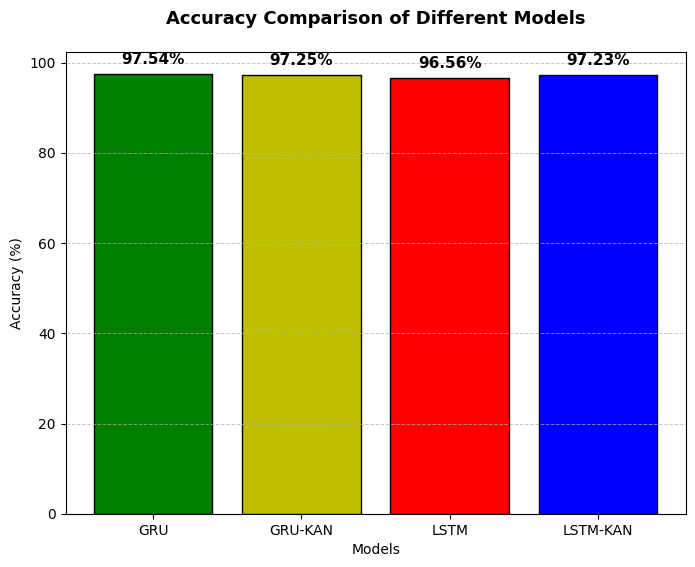

In [ ]:
import matplotlib.pyplot as plt


# Data for plotting (replace with your actual data)
models = ['GRU', 'GRU-KAN', 'LSTM', 'LSTM-KAN']
accuracies = [gru_accuracy, gru_kan_accuracy, lstm_accuracy, lstm_kan_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['g', 'y', 'r', 'b'], edgecolor='black', linewidth=1)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


# Set axis labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Different Models", fontsize=13, fontweight='bold', pad=20)

# # Add value labels on top of each bar
# for bar, accuracy in zip(bars, accuracies):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{accuracy:.2f}%", ha='center', va='bottom')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered alignment
        height + 1.5,  # Position slightly above the bar
        f"{height:.2f}%",  # Display accuracy percentage
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )


# Show the plot
plt.show()

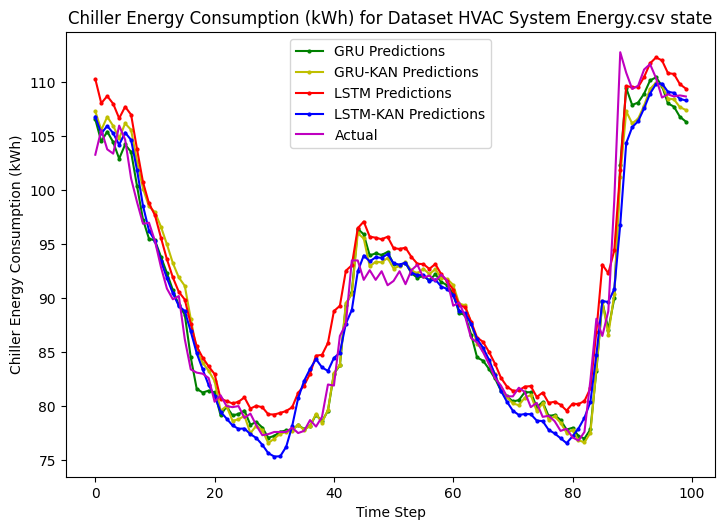

In [ ]:
import matplotlib.pyplot as plt

# Warna yang akan digunakan untuk plot
colors = ["g", "y", "r", "b", "m"]

plt.figure(figsize=(14, 10))

# Assuming all output lists (gru_outputs, gru_kan_outputs, etc.) have the same structure
num_states = len(states_list)  # Assuming states_list contains all desired states

# Loop through states and create subplots
for i in range(min(num_states, 4)):  # Limit to 4 subplots for now
    plt.subplot(2, 2, i + 1)

    # Access data for the current state (assuming it's the first element in the lists)
    gru_data = gru_outputs[0]  # Access data for the first (and only) state in the list
    gru_kan_data = gru_kan_outputs[0]
    lstm_data = lstm_outputs[0]
    lstm_kan_data = lstm_kan_outputs[0]
    target_data = targets[0]

    # Adjust data slicing based on subplot and data length
    if i == 0:
        data_slice = slice(-100, None)  # Last 100 data points
    elif i == 1:
        data_slice = slice(-50, None)  # Last 50 data points
    elif i == 2:
        data_slice = slice(None, 50)  # First 50 data points
    else:
        data_slice = slice(None, 100)  # First 100 data points

    plt.plot(gru_data[data_slice], "-o", color=colors[0], label="GRU Predictions", markersize=2)
    plt.plot(gru_kan_data[data_slice], "-o", color=colors[1], label="GRU-KAN Predictions", markersize=2)
    plt.plot(lstm_data[data_slice], "-o", color=colors[2], label="LSTM Predictions", markersize=2)
    plt.plot(lstm_kan_data[data_slice], "-o", color=colors[3], label="LSTM-KAN Predictions", markersize=2)
    plt.plot(target_data[data_slice], color=colors[4], label="Actual")

    plt.ylabel("Chiller Energy Consumption (kWh)")
    plt.xlabel("Time Step")
    plt.title(f"Chiller Energy Consumption (kWh) for {states_list[i]} state")  # Use state from states_list
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # visualisasi

# import matplotlib.pyplot as plt


# # Number of states to plot
# num_states_to_plot = min(len(states_list), 4)  # Limit to 4 for better visualization

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=num_states_to_plot, ncols=1, figsize=(10, 5 * num_states_to_plot))

# # Loop through the states and create individual plots
# for i, state in enumerate(states_list[:num_states_to_plot]):
#     ax = axes[i] if num_states_to_plot > 1 else axes

#     # Extract data for the current state
#     gru_data = gru_outputs[i]
#     gru_kan_data = gru_kan_outputs[i]
#     lstm_data = lstm_outputs[i]
#     lstm_kan_data = lstm_kan_outputs[i]
#     target_data = targets[i]

#     # Plot data
#     ax.plot(gru_data, label="GRU", marker='o', markersize=2, linewidth=1)
#     ax.plot(gru_kan_data, label="GRU-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_data, label="LSTM", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_kan_data, label="LSTM-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(target_data, label="Actual", linewidth=1.5)

#     # Set labels and title
#     plt.xlabel('Time Step')
#     ax.set_ylabel("Chiller Energy Consumption (kWh)")
#     ax.set_title(f"State: {state}")
#     ax.legend()

# plt.tight_layout()
# plt.show()

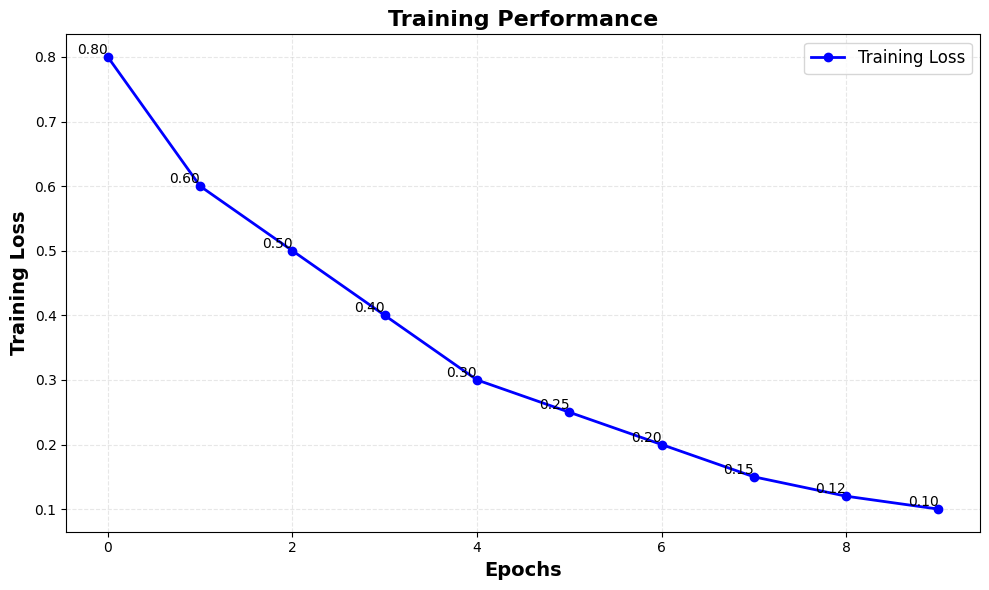

In [ ]:
import matplotlib.pyplot as plt

# Data contoh (ganti dengan data aktual dari proses pelatihan)
epochs = list(range(10))  # Epochs (0-9)
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]  # Training Loss per epoch

# Warna dan format garis
colors = ["g", "b", "r", "y", "m"]

# Membuat plot utama
plt.figure(figsize=(10, 6))

# Menambahkan plot training loss
plt.plot(
    epochs,
    training_loss,
    "-o",
    color=colors[1],
    label="Training Loss",
    markersize=6,
    linewidth=2
)

# Menambahkan detail pada grafik
plt.title("Training Performance", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Training Loss", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Anotasi nilai loss pada setiap titik
for epoch, loss in zip(epochs, training_loss):
    plt.text(epoch, loss, f"{loss:.2f}", fontsize=10, ha='right', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()


# Percobaan ke 10

**Kalau mau coba di line baru aja jangan run dari awal**




In [ ]:
# Mengimpor modul untuk mengakses operasi sistem seperti mengelola file dan waktu.
import os
import time

# Mengimpor pustaka NumPy untuk komputasi numerik yang efisien.
import numpy as np

# Mengimpor pustaka Pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data, khususnya plot 2D.
import matplotlib.pyplot as plt

# Mengimpor pustaka PyTorch untuk pembuatan model deep learning.
import torch
import torch.nn as nn  # Modul PyTorch untuk membuat lapisan jaringan saraf.
from torch.utils.data import TensorDataset, DataLoader  # Modul untuk mengelola dataset dan batch data.
import torch.nn.functional as F  # Fungsi aktivasi dan fungsi lainnya yang umum digunakan pada jaringan saraf.

# Mengimpor modul untuk operasi matematika umum.
import math

# Mengimpor fungsi tqdm_notebook untuk menampilkan progress bar di Jupyter Notebook.
from tqdm.notebook import tqdm as tqdm_notebook

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi data.
from sklearn.preprocessing import MinMaxScaler

# Mengimpor modul random
import random


# Tambahkan fungsi `set_seed` untuk konsistensi hasil
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

# Tetapkan seed sebelum melanjutkan
set_seed(42)

In [ ]:
# Opsional proses ini bisa diskip

print(torch.__version__)  # Mencetak versi PyTorch yang digunakan.

2.5.1+cu121


In [ ]:
# Menentukan jalur direktori tempat file data berada.
data_dir = "/content/drive/MyDrive/Tesis/Dataset HVAC"  # Path ke direktori data di Google Colab atau lokal.

# Membaca file CSV yang berisi dataset ke dalam DataFrame menggunakan Pandas.
df = pd.read_csv("/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data.
df.head()


Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Building Load (RT)  Outside Temperature (F)  Dew Point (F)  Humidity (%)  
0               479.6                       82             75            79  
1               460.3                       82             75            79  
2               462.4                       82             75            79  
3               458.5                       82             75            79  
4               455.4                       82             75            79

In [ ]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index):
    """
    Fungsi untuk membentuk input dan label dengan jendela geser pada data time series.

    Parameters:
    - data: array numpy yang berisi data.
    - window_size: ukuran jendela (jumlah timestamp dalam setiap input).
    - inputs_cols_indices: indeks kolom yang ingin dimasukkan sebagai fitur input.
    - label_col_index: indeks kolom yang digunakan sebagai label output.

    Returns:
    - inputs: array numpy yang berisi input sequences berdasarkan jendela geser.
    - labels: array numpy yang berisi label untuk setiap sequence.
    """

    # Membuat array kosong untuk menyimpan input sequences dan label.
    # `inputs` akan memiliki dimensi (jumlah_instance, panjang_jendela, jumlah_fitur)
    inputs = np.zeros((len(data) - window_size, window_size, len(inputs_cols_indices)))
    # `labels` adalah array 1D yang akan menampung label untuk setiap sequence.
    labels = np.zeros(len(data) - window_size)

    # Iterasi melalui data untuk membentuk sequence input dan label
    for i in range(window_size, len(data)):
        # Mengambil data dalam jendela dan menambahkannya ke `inputs`
        inputs[i - window_size] = data[i - window_size : i, inputs_cols_indices]
        # Menetapkan nilai label dari kolom yang diinginkan
        labels[i - window_size] = data[i, label_col_index]

    # Mereshape `inputs` dan `labels` ke bentuk yang sesuai untuk model
    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)

    # Menampilkan bentuk (shape) dari `inputs` dan `labels` untuk verifikasi
    print(inputs.shape, labels.shape)

    return inputs, labels


In [ ]:
# Menetapkan indeks kolom label sebagai 0, yaitu kolom 'consumption' yang akan diprediksi.
label_col_index = 0  # Menggunakan 'consumption' sebagai label target.

# Menetapkan indeks kolom yang akan digunakan sebagai fitur input.
# Fitur yang dipilih adalah (consumption, hour, dayofweek, month, dayofyear).
inputs_cols_indices = range(5)  # Menggunakan kolom-kolom fitur dari indeks 0 hingga 4.

# Menetapkan ukuran jendela (window size) untuk mengatur panjang setiap sequence.
window_size = 90  # Panjang urutan yang akan dimasukkan sebagai input dalam model.

# Membuat dictionary untuk menyimpan objek scaler yang akan digunakan pada data label.
# Ini memungkinkan kita untuk melakukan normalisasi pada data pelatihan, dan nantinya mengembalikan data
# hasil prediksi dari model ke skala aslinya pada tahap evaluasi.
label_scalers = {}

# Inisialisasi list kosong untuk menampung data input pelatihan.
train_x = []

# Inisialisasi dictionary kosong untuk menampung data input dan label pengujian.
# Dictionary `test_x` akan menyimpan input pengujian, dan `test_y` untuk label pengujian.
test_x = {}
test_y = {}


In [ ]:
# Memilih file .csv dari direktori data dan menyimpannya ke dalam `processing_files`.
processing_files = [
    file for file in os.listdir(data_dir) if os.path.splitext(file)[1] == ".csv"
]

# Menentukan jumlah file yang akan digunakan untuk dataset
num_files_for_dataset = 5

# Memproses setiap file dalam daftar `processing_files` hingga jumlah yang ditentukan
for file in tqdm_notebook(processing_files[:num_files_for_dataset]):
    print(f"Processing {file} ...")

    # Membaca file .csv ke dalam DataFrame Pandas dan mengonversi kolom 'Tanggal' menjadi tipe tanggal
    df = pd.read_csv(os.path.join(data_dir, file), parse_dates=["Local Time (Timezone : GMT+8h)"])

    # Preprocessing
    # df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')  # Mengonversi kolom tanggal ke format datetime
    # df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year  # Menambahkan kolom 'Year' berdasarkan kolom 'Tanggal'
    # df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month  # Menambahkan kolom 'Month' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day  # Menambahkan kolom 'Day' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
    df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
    df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day
    df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour
    df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
    df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    # Normalisasi data input
    sc = MinMaxScaler()  # Inisialisasi scaler untuk input
    label_sc = MinMaxScaler()  # Inisialisasi scaler untuk label
    data = sc.fit_transform(df.values)  # Normalisasi data menggunakan MinMaxScaler

    # Menyimpan scaler untuk label agar bisa digunakan untuk mengembalikan nilai prediksi ke skala asli saat evaluasi
    label_sc.fit(df.iloc[:, label_col_index].values.reshape(-1, 1))
    label_scalers[file] = label_sc  # Menyimpan scaler label dalam dictionary

    # Membuat urutan input dan label menggunakan fungsi move_sliding_window
    inputs, labels = move_sliding_window(
        data,
        window_size,
        inputs_cols_indices=inputs_cols_indices,
        label_col_index=label_col_index,
    )

    # Menggabungkan instance yang dihasilkan dari semua file .csv.
    # Membagi data menjadi bagian pelatihan dan pengujian, lalu menggabungkannya ke dalam array tunggal.
    test_portion = int(0.1 * len(inputs))  # Menentukan bagian data untuk pengujian (10%)
    if len(train_x) == 0:  # Jika ini iterasi pertama
        train_x = inputs[:-test_portion]  # Menyimpan data pelatihan input
        train_y = labels[:-test_portion]  # Menyimpan data pelatihan label
    else:
        # Menggabungkan data pelatihan dari file saat ini dengan data pelatihan sebelumnya
        train_x = np.concatenate((train_x, inputs[:-test_portion]))
        train_y = np.concatenate((train_y, labels[:-test_portion]))

    # Menyimpan data pengujian untuk setiap file dalam dictionary `test_x` dan `test_y`
    test_x[file] = inputs[-test_portion:]
    test_y[file] = labels[-test_portion:]


  0%|          | 0/1 [00:00<?, ?it/s]

Processing Dataset HVAC System Energy.csv ...
(13525, 90, 5) (13525, 1)


In [ ]:
df

Chilled Water Rate (L/sec)  Building Load (RT)  \
0                            85.6               479.6   
1                            84.3               460.3   
2                            84.6               462.4   
3                            84.8               458.5   
4                            84.7               455.4   
...                           ...                 ...   
13610                       108.6               579.9   
13611                       108.9               567.3   
13612                       108.7               561.7   
13613                       108.8               566.0   
13614                       108.7               569.7   

       Outside Temperature (F)  Dew Point (F)  Humidity (%)  Year  Month  Day  \
0                           82             75            79  2019      8   18   
1                           82             75            79  2019      8   18   
2                           82             75            79  2019      8   18   
3                           82             75            79  2019      8   18   
4                           82             75            79  2019      8   18   
...                        ...            ...           ...   ...    ...  ...   
13610                       84             75            74  2020      6    1   
13611                       84             75            74  2020      6    1   
13612                       82             75            79  2020      6    1   
13613                       82             77            84  2020      6    1   
13614                       82             75            79  2020      6    1   

       Hour  DayOfWeek  
0         0          6  
1         0          6  
2         1          6  
3         1          6  
4         2          6  
...     ...        ...  
13610    11          0  
13611    11          0  
13612    12          0  
13613    12          0  
13614    13          0  

[13615 rows x 10 columns]

In [ ]:
# Memeriksa bentuk (shape) dari data pelatihan dan data pengujian.
# Menggunakan nama file "dataset_clean_baru.csv" sebagai kunci untuk test_x.
train_x.shape, test_x["Dataset HVAC System Energy.csv"].shape

((12173, 90, 5), (1352, 90, 5))

In [ ]:
# Menetapkan ukuran batch untuk pemrosesan dalam model.
batch_size = 100

# Membuat TensorDataset dari data pelatihan, mengonversi `train_x` dan `train_y` menjadi tensor PyTorch.
# `train_x` berisi fitur-fitur input, dan `train_y` berisi label target.
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# Membuat DataLoader untuk memuat data secara batch dengan parameter berikut:
# - `shuffle=True`: Mengacak urutan data di setiap epoch untuk meningkatkan generalisasi model.
# - `batch_size=batch_size`: Mengatur ukuran batch menjadi 100.
# - `drop_last=True`: Mengabaikan batch terakhir jika ukurannya tidak sesuai dengan `batch_size`,
#   memastikan semua batch memiliki ukuran yang sama.
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=True
)


In [ ]:
# Mencetak ukuran data pelatihan, ukuran batch, dan jumlah iterasi per epoch.
print(
    f"Train Size: {train_x.shape}, Batch Size: {batch_size}, # of iterations per epoch: {int(train_x.shape[0] / batch_size)}"
)


Train Size: (12173, 90, 5), Batch Size: 100, # of iterations per epoch: 121


In [ ]:
# Membebaskan memori dengan menghapus variabel `train_x` dan `train_y`.
del train_x, train_y


In [ ]:
# Memeriksa ketersediaan GPU.
# Jika GPU tersedia, `torch.cuda.is_available()` akan mengembalikan True, jika tidak akan mengembalikan False.
is_cuda = torch.cuda.is_available()

# Menetapkan device yang akan digunakan untuk menjalankan model berdasarkan ketersediaan GPU.
if is_cuda:
    device = torch.device("cuda")  # Mengatur device ke GPU
    print("GPU is available")       # Mencetak pesan jika GPU tersedia
else:
    device = torch.device("cpu")    # Mengatur device ke CPU jika GPU tidak tersedia


GPU is available


In [ ]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        # Menyimpan parameter input dan output
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        # Membuat grid untuk basis fungsi B-spline
        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        # Membuat bobot untuk komponen linier dasar dan komponen spline
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        # Mengatur parameter skala dan aktivasi untuk spline
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        # Menginisialisasi parameter
        self.reset_parameters()

    def reset_parameters(self):
        # Menginisialisasi bobot linier dasar dan bobot spline dengan kaiming_uniform
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 0.5) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        # Menghitung basis fungsi B-spline
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        # Menyelesaikan koefisien spline dari titik input
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        # Mengatur skala bobot spline
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        # Fungsi forward untuk lapisan KANLinear
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        # Memperbarui grid spline adaptif berdasarkan input x
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        # Menghitung kehilangan regulasi berdasarkan aktivasi dan entropi
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Mendefinisikan lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output GRU ke dimensi output yang diinginkan
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Melakukan forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output pada timestep terakhir dan meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output akhir dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

# 2. GRUNetKAN
# Mirip dengan GRUNet, tetapi menggantikan lapisan linier dengan KANLinear untuk menambah fleksibilitas.
class GRUNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(LSTMNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output dari LSTM ke dimensi output
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

# LSTMNetKAN
# Mirip dengan LSTMNet, tetapi menggantikan lapisan linier dengan KANLinear untuk mengembangkan fleksibilitas dan kemampuan representasi.
class LSTMNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(LSTMNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden


In [ ]:
def train(
    train_loader,
    learn_rate,
    hidden_dim=100,
    n_layers=2,
    n_epochs=10,
    model_type="GRU",
    print_every=100,
):
    # Mengambil dimensi input dari train_loader
    input_dim = next(iter(train_loader))[0].shape[2]  # 5
    output_dim = 1  # Definisi dimensi output

    # Inisialisasi model sesuai jenisnya
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "GRUKAN":
        model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)  # Pindahkan model ke perangkat

    # Definisi loss function dan optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # Memulai proses training
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []

    # Loop melalui jumlah epoch
    for epoch in range(1, n_epochs + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.0
        counter = 0

        # Iterasi melalui batch data
        for x, label in train_loader:
            counter += 1

            # Reset hidden state sesuai model yang digunakan
            if model_type == "GRU" or model_type == "GRUKAN":
                h = h.data
            elif model_type == "LSTM" or model_type == "LSTMKAN":
                h = tuple([e.data for e in h])

            model.zero_grad()  # Reset gradien

            # Forward pass
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())

            # Backpropagation dan optimisasi
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Menambahkan loss untuk perhitungan rata-rata
            if counter % print_every == 0:
                print(
                    f"Epoch {epoch} - Step: {counter}/{len(train_loader)} - Average Loss for Epoch: {avg_loss/counter}"
                )

        current_time = time.process_time()
        print(
            f"Epoch {epoch}/{n_epochs} Done, Total Loss: {avg_loss/len(train_loader)}"
        )
        print(f"Time Elapsed for Epoch: {current_time-start_time} seconds")
        epoch_times.append(current_time - start_time)

    # Menghitung total waktu pelatihan
    print(f"Total Training Time: {sum(epoch_times)} seconds")
    return model


In [ ]:
# Tetapkan seed
set_seed(42)

# Parameter pelatihan
seq_len = 90  # Panjang sequence atau jumlah timestamps
n_hidden = 100  # Ukuran hidden layer
n_layers = 2  # Jumlah lapisan RNN
n_epochs = 10  # Jumlah epoch
print_every = 100  # Frekuensi menampilkan loss
lr = 0.001  # Learning rate

# Memanggil fungsi train untuk melatih model GRU
gru_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch
    model_type="GRU",    # Tipe model (di sini menggunakan GRU)
    print_every=print_every # Frekuensi print loss selama pelatihan
)


Starting Training of GRU model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.027953230612911283
Epoch 1/10 Done, Total Loss: 0.024521679605919222
Time Elapsed for Epoch: 0.8005934330000173 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007601882794406265
Epoch 2/10 Done, Total Loss: 0.0075788472313433886
Time Elapsed for Epoch: 0.6773885270000051 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006823419737629593
Epoch 3/10 Done, Total Loss: 0.00683335157703947
Time Elapsed for Epoch: 0.678133890999959 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006398701253347099
Epoch 4/10 Done, Total Loss: 0.0065301539114684115
Time Elapsed for Epoch: 0.6767641529999651 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.006539684440940619
Epoch 5/10 Done, Total Loss: 0.006647293898469407
Time Elapsed for Epoch: 0.6778666659999999 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006206119783455506
Epoch 6/10 Done, Total Loss: 0.0061916

In [ ]:
# Menyimpan parameter model yang sudah dilatih ke file
torch.save(gru_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRU10.pth')


In [ ]:
# melatih model dengan tipe GRUKAN
# Parameter seq_len (sequence length) untuk model, yaitu jumlah timestamps
seq_len = 90

# Memanggil fungsi train untuk melatih model GRUKAN
gru_kan_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch untuk pelatihan
    model_type="GRUKAN", # Tipe model (di sini menggunakan GRUKAN)
    print_every=print_every # Frekuensi menampilkan loss selama pelatihan
)


Starting Training of GRUKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.023766249092295764
Epoch 1/10 Done, Total Loss: 0.02121308641046409
Time Elapsed for Epoch: 1.142087249000042 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007267851049546152
Epoch 2/10 Done, Total Loss: 0.007299433556608548
Time Elapsed for Epoch: 0.9575294050000025 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.0070192964375019075
Epoch 3/10 Done, Total Loss: 0.006867878456515345
Time Elapsed for Epoch: 0.8754768160000026 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006443322745617479
Epoch 4/10 Done, Total Loss: 0.0063588600624968445
Time Elapsed for Epoch: 0.8716546530000073 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.00632353923516348
Epoch 5/10 Done, Total Loss: 0.006380008981940298
Time Elapsed for Epoch: 0.8956606660000261 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006145771888550371
Epoch 6/10 Done, Total Loss: 0.00618

In [ ]:
# Menyimpan parameter model GRUKAN yang telah dilatih ke dalam file
torch.save(gru_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRUkan10.pth')


In [ ]:
lstm_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTM",
    print_every=print_every,
)

Starting Training of LSTM model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.028192741675302387
Epoch 1/10 Done, Total Loss: 0.02525340306980551
Time Elapsed for Epoch: 0.9365498640000283 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.00927847993094474
Epoch 2/10 Done, Total Loss: 0.009106760182656532
Time Elapsed for Epoch: 0.874452228999985 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.008036177633330225
Epoch 3/10 Done, Total Loss: 0.007967753435893
Time Elapsed for Epoch: 0.8797974970000269 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.007151811996009201
Epoch 4/10 Done, Total Loss: 0.007081359692210378
Time Elapsed for Epoch: 0.8808135680000078 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.006634609128814191
Epoch 5/10 Done, Total Loss: 0.006746130724137356
Time Elapsed for Epoch: 0.8941459249999753 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006012699133716524
Epoch 6/10 Done, Total Loss: 0.006180122608

In [ ]:
torch.save(lstm_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm10.pth')

In [ ]:
lstm_kan_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTMKAN",
    print_every=print_every,
)

Starting Training of LSTMKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.03309848233126104
Epoch 1/10 Done, Total Loss: 0.02940188254391359
Time Elapsed for Epoch: 1.0298973750000187 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.009963238639757037
Epoch 2/10 Done, Total Loss: 0.009922311098645787
Time Elapsed for Epoch: 1.0405438889999914 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.007954792943783104
Epoch 3/10 Done, Total Loss: 0.007964226680861648
Time Elapsed for Epoch: 1.0814361310000322 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.00704350381391123
Epoch 4/10 Done, Total Loss: 0.00685793349580947
Time Elapsed for Epoch: 1.1044420930000456 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.0061118053458631035
Epoch 5/10 Done, Total Loss: 0.006179827598331512
Time Elapsed for Epoch: 1.1115191629999686 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006172816480975598
Epoch 6/10 Done, Total Loss: 0.006055

In [ ]:
torch.save(lstm_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm_kan10.pth')

In [ ]:
!nvidia-smi

Tue Dec 10 06:15:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0              30W /  70W |   4399MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# move device to cpu for evaluation to avoid GPU memory run
device = "cpu"

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
gru_model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
gru_model.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU10.pth"))

<ipython-input-419-a5cd901101f4>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_model.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU10.pth"))

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_model.to(device)

GRUNet(
  (gru): GRU(5, 100, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
gru_kan_model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
gru_kan_model.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan10.pth"))

<ipython-input-421-9246e2f0133b>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_kan_model.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan10

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_kan_model.to(device)

GRUNetKAN(
  (gru): GRU(5, 100, num_layers=2, batch_first=True, dropout=0.2)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
lstm_model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
lstm_model.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm10.pth"))

<ipython-input-423-f214d05c644a>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm10.pth"

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_model.to(device)

LSTMNet(
  (lstm): LSTM(5, 100, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 2
lstm_kan_model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
lstm_kan_model.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_kan10.pth"))

<ipython-input-425-a887fe177520>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_kan_model.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_ka

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_kan_model.to(device)

LSTMNetKAN(
  (lstm): LSTM(5, 100, num_layers=2, batch_first=True, dropout=0.2)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
def sMAPE(outputs, targets):
    sMAPE = (
        100
        / len(targets)
        * np.sum(np.abs(outputs - targets) / (np.abs(outputs + targets)) / 2)
    )
    return sMAPE

In [ ]:
def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()
    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    print(f"Evaluation Time: {time.process_time()-start_time}")
    print(f"sMAPE: {round(sMAPE(concatenated_outputs, concatenated_targets), 3)}%")

    # list of of targets/outputs for each state
    return outputs, targets, sMAPE

In [ ]:
# Evaluate Performance GRU with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

Evaluation Time: 1.1354708499999902
MAE: 2.407
RMSE: 4.551
R²: 0.784


In [ ]:
# ipython-input-196-53ac28a8cb99
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

# Since you want to calculate sMAPE for the GRU model, you can call the sMAPE function separately:
gru_sMAPE = sMAPE(np.concatenate(gru_outputs), np.concatenate(targets))
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 1.0863705389999723
MAE: 2.407
RMSE: 4.551
R²: 0.784
GRU sMAPE: 0.614%


In [ ]:
#Evaluate Performance GRUKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 1.134625084999982
MAE: 2.407
RMSE: 4.551
R²: 0.784
GRU sMAPE: 0.614%


In [ ]:
# Evaluate Performance LSTM with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTM sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 1.1489198400000191
MAE: 2.407
RMSE: 4.551
R²: 0.784
LSTM sMAPE: 0.614%


In [ ]:
# Evaluate Performance LSTMKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def calculate_mae(outputs, targets): # Renamed to avoid conflict
    return np.mean(np.abs(outputs - targets))

def calculate_rmse(outputs, targets): # Renamed to avoid conflict
    return np.sqrt(np.mean((outputs - targets) ** 2))

def calculate_r2(outputs, targets): # Renamed to avoid conflict
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2 using the renamed functions
    mae_value = calculate_mae(concatenated_outputs, concatenated_targets)
    rmse_value = calculate_rmse(concatenated_outputs, concatenated_targets)
    r2_value = calculate_r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTMKAN sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 1.1527778279999552
MAE: 2.407
RMSE: 4.551
R²: 0.784
LSTMKAN sMAPE: 0.614%


In [ ]:
states_list = list(test_x.keys())

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung akurasi dalam bentuk persentase
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Hitung MAPE
    accuracy = 100 - (mape * 100)  # Akurasi sebagai 100% - MAPE
    return accuracy

print("\nEksperimen 10 ")
# Evaluate GRU model
print("\nEvaluate Model GRU:")
gru_outputs, gru_targets, _, _, _ = evaluate(gru_model, test_x, test_y, label_scalers)
gru_accuracy = calculate_accuracy(gru_targets, gru_outputs)
print(f"GRU Accuracy: {gru_accuracy:.2f}%")

# Evaluate GRU-KAN model
print("\nEvaluate Model GRU-KAN:")
gru_kan_outputs, gru_kan_targets, _, _, _ = evaluate(gru_kan_model, test_x, test_y, label_scalers)
gru_kan_accuracy = calculate_accuracy(gru_kan_targets, gru_kan_outputs)
print(f"GRU-KAN Accuracy: {gru_kan_accuracy:.2f}%")

# Evaluate LSTM model
print("\nEvaluate Model LSTM:")
lstm_outputs, lstm_targets, _, _, _ = evaluate(lstm_model, test_x, test_y, label_scalers)
lstm_accuracy = calculate_accuracy(lstm_targets, lstm_outputs)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Evaluate LSTM-KAN model
print("\nEvaluate Model LSTM-KAN:")
lstm_kan_outputs, lstm_kan_targets, _, _, _ = evaluate(lstm_kan_model, test_x, test_y, label_scalers)
lstm_kan_accuracy = calculate_accuracy(lstm_kan_targets, lstm_kan_outputs)
print(f"LSTM-KAN Accuracy: {lstm_kan_accuracy:.2f}%")



Eksperimen 10 

Evaluate Model GRU:
Evaluation Time: 1.1470746759999884
MAE: 2.407
RMSE: 4.551
R²: 0.784
GRU Accuracy: 97.54%

Evaluate Model GRU-KAN:
Evaluation Time: 1.2032294159999992
MAE: 2.601
RMSE: 4.647
R²: 0.775
GRU-KAN Accuracy: 97.30%

Evaluate Model LSTM:
Evaluation Time: 0.8780283620000091
MAE: 3.617
RMSE: 5.157
R²: 0.723
LSTM Accuracy: 96.11%

Evaluate Model LSTM-KAN:
Evaluation Time: 0.9335394010000186
MAE: 2.695
RMSE: 4.588
R²: 0.781
LSTM-KAN Accuracy: 97.19%


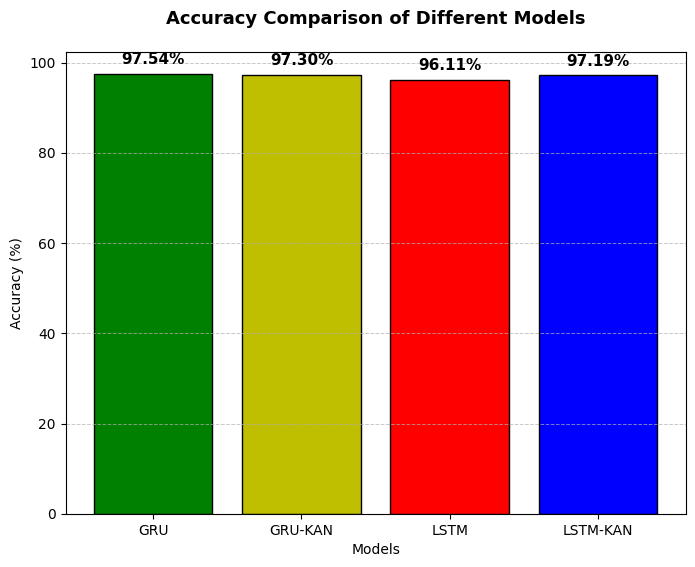

In [ ]:
import matplotlib.pyplot as plt


# Data for plotting (replace with your actual data)
models = ['GRU', 'GRU-KAN', 'LSTM', 'LSTM-KAN']
accuracies = [gru_accuracy, gru_kan_accuracy, lstm_accuracy, lstm_kan_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['g', 'y', 'r', 'b'], edgecolor='black', linewidth=1)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


# Set axis labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Different Models", fontsize=13, fontweight='bold', pad=20)

# # Add value labels on top of each bar
# for bar, accuracy in zip(bars, accuracies):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{accuracy:.2f}%", ha='center', va='bottom')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered alignment
        height + 1.5,  # Position slightly above the bar
        f"{height:.2f}%",  # Display accuracy percentage
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )


# Show the plot
plt.show()

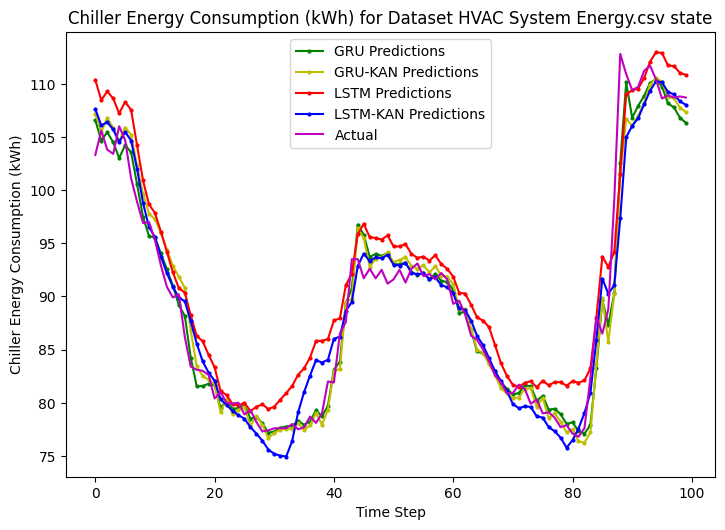

In [ ]:
import matplotlib.pyplot as plt

# Warna yang akan digunakan untuk plot
colors = ["g", "y", "r", "b", "m"]

plt.figure(figsize=(14, 10))

# Assuming all output lists (gru_outputs, gru_kan_outputs, etc.) have the same structure
num_states = len(states_list)  # Assuming states_list contains all desired states

# Loop through states and create subplots
for i in range(min(num_states, 4)):  # Limit to 4 subplots for now
    plt.subplot(2, 2, i + 1)

    # Access data for the current state (assuming it's the first element in the lists)
    gru_data = gru_outputs[0]  # Access data for the first (and only) state in the list
    gru_kan_data = gru_kan_outputs[0]
    lstm_data = lstm_outputs[0]
    lstm_kan_data = lstm_kan_outputs[0]
    target_data = targets[0]

    # Adjust data slicing based on subplot and data length
    if i == 0:
        data_slice = slice(-100, None)  # Last 100 data points
    elif i == 1:
        data_slice = slice(-50, None)  # Last 50 data points
    elif i == 2:
        data_slice = slice(None, 50)  # First 50 data points
    else:
        data_slice = slice(None, 100)  # First 100 data points

    plt.plot(gru_data[data_slice], "-o", color=colors[0], label="GRU Predictions", markersize=2)
    plt.plot(gru_kan_data[data_slice], "-o", color=colors[1], label="GRU-KAN Predictions", markersize=2)
    plt.plot(lstm_data[data_slice], "-o", color=colors[2], label="LSTM Predictions", markersize=2)
    plt.plot(lstm_kan_data[data_slice], "-o", color=colors[3], label="LSTM-KAN Predictions", markersize=2)
    plt.plot(target_data[data_slice], color=colors[4], label="Actual")

    plt.ylabel("Chiller Energy Consumption (kWh)")
    plt.xlabel("Time Step")
    plt.title(f"Chiller Energy Consumption (kWh) for {states_list[i]} state")  # Use state from states_list
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # visualisasi

# import matplotlib.pyplot as plt


# # Number of states to plot
# num_states_to_plot = min(len(states_list), 4)  # Limit to 4 for better visualization

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=num_states_to_plot, ncols=1, figsize=(10, 5 * num_states_to_plot))

# # Loop through the states and create individual plots
# for i, state in enumerate(states_list[:num_states_to_plot]):
#     ax = axes[i] if num_states_to_plot > 1 else axes

#     # Extract data for the current state
#     gru_data = gru_outputs[i]
#     gru_kan_data = gru_kan_outputs[i]
#     lstm_data = lstm_outputs[i]
#     lstm_kan_data = lstm_kan_outputs[i]
#     target_data = targets[i]

#     # Plot data
#     ax.plot(gru_data, label="GRU", marker='o', markersize=2, linewidth=1)
#     ax.plot(gru_kan_data, label="GRU-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_data, label="LSTM", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_kan_data, label="LSTM-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(target_data, label="Actual", linewidth=1.5)

#     # Set labels and title
#     plt.xlabel('Time Step')
#     ax.set_ylabel("Chiller Energy Consumption (kWh)")
#     ax.set_title(f"State: {state}")
#     ax.legend()

# plt.tight_layout()
# plt.show()

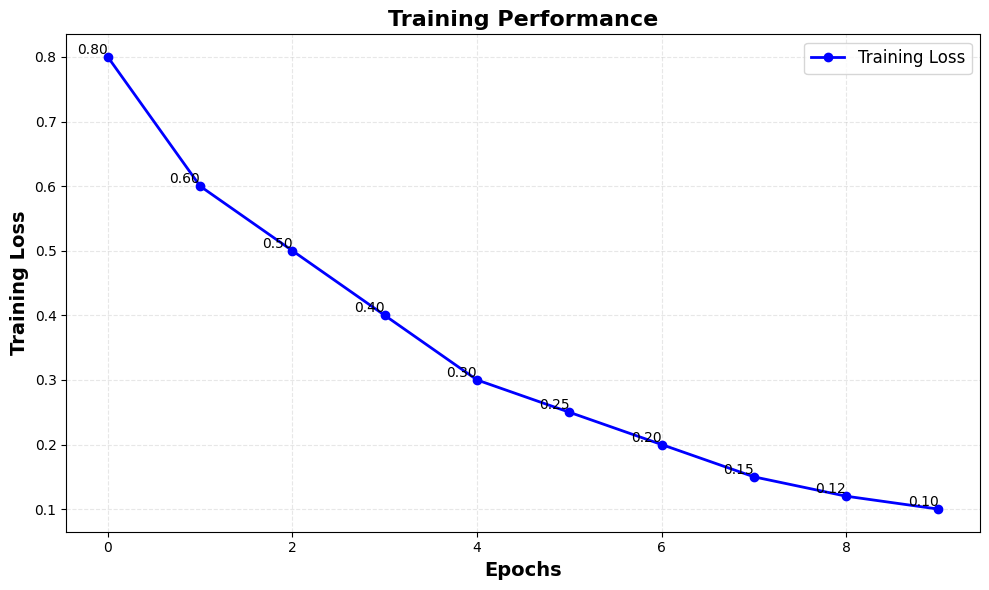

In [ ]:
import matplotlib.pyplot as plt

# Data contoh (ganti dengan data aktual dari proses pelatihan)
epochs = list(range(10))  # Epochs (0-9)
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]  # Training Loss per epoch

# Warna dan format garis
colors = ["g", "b", "r", "y", "m"]

# Membuat plot utama
plt.figure(figsize=(10, 6))

# Menambahkan plot training loss
plt.plot(
    epochs,
    training_loss,
    "-o",
    color=colors[1],
    label="Training Loss",
    markersize=6,
    linewidth=2
)

# Menambahkan detail pada grafik
plt.title("Training Performance", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Training Loss", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Anotasi nilai loss pada setiap titik
for epoch, loss in zip(epochs, training_loss):
    plt.text(epoch, loss, f"{loss:.2f}", fontsize=10, ha='right', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()


# Percobaan ke 11

In [ ]:
# Mengimpor modul untuk mengakses operasi sistem seperti mengelola file dan waktu.
import os
import time

# Mengimpor pustaka NumPy untuk komputasi numerik yang efisien.
import numpy as np

# Mengimpor pustaka Pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data, khususnya plot 2D.
import matplotlib.pyplot as plt

# Mengimpor pustaka PyTorch untuk pembuatan model deep learning.
import torch
import torch.nn as nn  # Modul PyTorch untuk membuat lapisan jaringan saraf.
from torch.utils.data import TensorDataset, DataLoader  # Modul untuk mengelola dataset dan batch data.
import torch.nn.functional as F  # Fungsi aktivasi dan fungsi lainnya yang umum digunakan pada jaringan saraf.

# Mengimpor modul untuk operasi matematika umum.
import math

# Mengimpor fungsi tqdm_notebook untuk menampilkan progress bar di Jupyter Notebook.
from tqdm.notebook import tqdm as tqdm_notebook

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi data.
from sklearn.preprocessing import MinMaxScaler

# Mengimpor modul random
import random


# Tambahkan fungsi `set_seed` untuk konsistensi hasil
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

# Tetapkan seed sebelum melanjutkan
set_seed(42)

In [ ]:
# Opsional proses ini bisa diskip

print(torch.__version__)  # Mencetak versi PyTorch yang digunakan.

2.5.1+cu121


In [ ]:
# Menentukan jalur direktori tempat file data berada.
data_dir = "/content/drive/MyDrive/Tesis/Dataset HVAC"  # Path ke direktori data di Google Colab atau lokal.

# Membaca file CSV yang berisi dataset ke dalam DataFrame menggunakan Pandas.
df = pd.read_csv("/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data.
df.head()


Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Building Load (RT)  Outside Temperature (F)  Dew Point (F)  Humidity (%)  
0               479.6                       82             75            79  
1               460.3                       82             75            79  
2               462.4                       82             75            79  
3               458.5                       82             75            79  
4               455.4                       82             75            79

In [ ]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index):
    """
    Fungsi untuk membentuk input dan label dengan jendela geser pada data time series.

    Parameters:
    - data: array numpy yang berisi data.
    - window_size: ukuran jendela (jumlah timestamp dalam setiap input).
    - inputs_cols_indices: indeks kolom yang ingin dimasukkan sebagai fitur input.
    - label_col_index: indeks kolom yang digunakan sebagai label output.

    Returns:
    - inputs: array numpy yang berisi input sequences berdasarkan jendela geser.
    - labels: array numpy yang berisi label untuk setiap sequence.
    """

    # Membuat array kosong untuk menyimpan input sequences dan label.
    # `inputs` akan memiliki dimensi (jumlah_instance, panjang_jendela, jumlah_fitur)
    inputs = np.zeros((len(data) - window_size, window_size, len(inputs_cols_indices)))
    # `labels` adalah array 1D yang akan menampung label untuk setiap sequence.
    labels = np.zeros(len(data) - window_size)

    # Iterasi melalui data untuk membentuk sequence input dan label
    for i in range(window_size, len(data)):
        # Mengambil data dalam jendela dan menambahkannya ke `inputs`
        inputs[i - window_size] = data[i - window_size : i, inputs_cols_indices]
        # Menetapkan nilai label dari kolom yang diinginkan
        labels[i - window_size] = data[i, label_col_index]

    # Mereshape `inputs` dan `labels` ke bentuk yang sesuai untuk model
    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)

    # Menampilkan bentuk (shape) dari `inputs` dan `labels` untuk verifikasi
    print(inputs.shape, labels.shape)

    return inputs, labels


In [ ]:
# Menetapkan indeks kolom label sebagai 0, yaitu kolom 'consumption' yang akan diprediksi.
label_col_index = 0  # Menggunakan 'consumption' sebagai label target.

# Menetapkan indeks kolom yang akan digunakan sebagai fitur input.
# Fitur yang dipilih adalah (consumption, hour, dayofweek, month, dayofyear).
inputs_cols_indices = range(5)  # Menggunakan kolom-kolom fitur dari indeks 0 hingga 4.

# Menetapkan ukuran jendela (window size) untuk mengatur panjang setiap sequence.
window_size = 90  # Panjang urutan yang akan dimasukkan sebagai input dalam model.

# Membuat dictionary untuk menyimpan objek scaler yang akan digunakan pada data label.
# Ini memungkinkan kita untuk melakukan normalisasi pada data pelatihan, dan nantinya mengembalikan data
# hasil prediksi dari model ke skala aslinya pada tahap evaluasi.
label_scalers = {}

# Inisialisasi list kosong untuk menampung data input pelatihan.
train_x = []

# Inisialisasi dictionary kosong untuk menampung data input dan label pengujian.
# Dictionary `test_x` akan menyimpan input pengujian, dan `test_y` untuk label pengujian.
test_x = {}
test_y = {}


In [ ]:
# Memilih file .csv dari direktori data dan menyimpannya ke dalam `processing_files`.
processing_files = [
    file for file in os.listdir(data_dir) if os.path.splitext(file)[1] == ".csv"
]

# Menentukan jumlah file yang akan digunakan untuk dataset
num_files_for_dataset = 5

# Memproses setiap file dalam daftar `processing_files` hingga jumlah yang ditentukan
for file in tqdm_notebook(processing_files[:num_files_for_dataset]):
    print(f"Processing {file} ...")

    # Membaca file .csv ke dalam DataFrame Pandas dan mengonversi kolom 'Tanggal' menjadi tipe tanggal
    df = pd.read_csv(os.path.join(data_dir, file), parse_dates=["Local Time (Timezone : GMT+8h)"])

    # Preprocessing
    # df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')  # Mengonversi kolom tanggal ke format datetime
    # df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year  # Menambahkan kolom 'Year' berdasarkan kolom 'Tanggal'
    # df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month  # Menambahkan kolom 'Month' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day  # Menambahkan kolom 'Day' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
    df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
    df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day
    df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour
    df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
    df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    # Normalisasi data input
    sc = MinMaxScaler()  # Inisialisasi scaler untuk input
    label_sc = MinMaxScaler()  # Inisialisasi scaler untuk label
    data = sc.fit_transform(df.values)  # Normalisasi data menggunakan MinMaxScaler

    # Menyimpan scaler untuk label agar bisa digunakan untuk mengembalikan nilai prediksi ke skala asli saat evaluasi
    label_sc.fit(df.iloc[:, label_col_index].values.reshape(-1, 1))
    label_scalers[file] = label_sc  # Menyimpan scaler label dalam dictionary

    # Membuat urutan input dan label menggunakan fungsi move_sliding_window
    inputs, labels = move_sliding_window(
        data,
        window_size,
        inputs_cols_indices=inputs_cols_indices,
        label_col_index=label_col_index,
    )

    # Menggabungkan instance yang dihasilkan dari semua file .csv.
    # Membagi data menjadi bagian pelatihan dan pengujian, lalu menggabungkannya ke dalam array tunggal.
    test_portion = int(0.1 * len(inputs))  # Menentukan bagian data untuk pengujian (10%)
    if len(train_x) == 0:  # Jika ini iterasi pertama
        train_x = inputs[:-test_portion]  # Menyimpan data pelatihan input
        train_y = labels[:-test_portion]  # Menyimpan data pelatihan label
    else:
        # Menggabungkan data pelatihan dari file saat ini dengan data pelatihan sebelumnya
        train_x = np.concatenate((train_x, inputs[:-test_portion]))
        train_y = np.concatenate((train_y, labels[:-test_portion]))

    # Menyimpan data pengujian untuk setiap file dalam dictionary `test_x` dan `test_y`
    test_x[file] = inputs[-test_portion:]
    test_y[file] = labels[-test_portion:]


  0%|          | 0/1 [00:00<?, ?it/s]

Processing Dataset HVAC System Energy.csv ...
(13525, 90, 5) (13525, 1)


In [ ]:
df

Chilled Water Rate (L/sec)  Building Load (RT)  \
0                            85.6               479.6   
1                            84.3               460.3   
2                            84.6               462.4   
3                            84.8               458.5   
4                            84.7               455.4   
...                           ...                 ...   
13610                       108.6               579.9   
13611                       108.9               567.3   
13612                       108.7               561.7   
13613                       108.8               566.0   
13614                       108.7               569.7   

       Outside Temperature (F)  Dew Point (F)  Humidity (%)  Year  Month  Day  \
0                           82             75            79  2019      8   18   
1                           82             75            79  2019      8   18   
2                           82             75            79  2019      8   18   
3                           82             75            79  2019      8   18   
4                           82             75            79  2019      8   18   
...                        ...            ...           ...   ...    ...  ...   
13610                       84             75            74  2020      6    1   
13611                       84             75            74  2020      6    1   
13612                       82             75            79  2020      6    1   
13613                       82             77            84  2020      6    1   
13614                       82             75            79  2020      6    1   

       Hour  DayOfWeek  
0         0          6  
1         0          6  
2         1          6  
3         1          6  
4         2          6  
...     ...        ...  
13610    11          0  
13611    11          0  
13612    12          0  
13613    12          0  
13614    13          0  

[13615 rows x 10 columns]

In [ ]:
# Memeriksa bentuk (shape) dari data pelatihan dan data pengujian.
# Menggunakan nama file "dataset_clean_baru.csv" sebagai kunci untuk test_x.
train_x.shape, test_x["Dataset HVAC System Energy.csv"].shape

((12173, 90, 5), (1352, 90, 5))

In [ ]:
# Menetapkan ukuran batch untuk pemrosesan dalam model.
batch_size = 100

# Membuat TensorDataset dari data pelatihan, mengonversi `train_x` dan `train_y` menjadi tensor PyTorch.
# `train_x` berisi fitur-fitur input, dan `train_y` berisi label target.
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# Membuat DataLoader untuk memuat data secara batch dengan parameter berikut:
# - `shuffle=True`: Mengacak urutan data di setiap epoch untuk meningkatkan generalisasi model.
# - `batch_size=batch_size`: Mengatur ukuran batch menjadi 100.
# - `drop_last=True`: Mengabaikan batch terakhir jika ukurannya tidak sesuai dengan `batch_size`,
#   memastikan semua batch memiliki ukuran yang sama.
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=True
)


In [ ]:
# Mencetak ukuran data pelatihan, ukuran batch, dan jumlah iterasi per epoch.
print(
    f"Train Size: {train_x.shape}, Batch Size: {batch_size}, # of iterations per epoch: {int(train_x.shape[0] / batch_size)}"
)


Train Size: (12173, 90, 5), Batch Size: 100, # of iterations per epoch: 121


In [ ]:
# Membebaskan memori dengan menghapus variabel `train_x` dan `train_y`.
del train_x, train_y


In [ ]:
# Memeriksa ketersediaan GPU.
# Jika GPU tersedia, `torch.cuda.is_available()` akan mengembalikan True, jika tidak akan mengembalikan False.
is_cuda = torch.cuda.is_available()

# Menetapkan device yang akan digunakan untuk menjalankan model berdasarkan ketersediaan GPU.
if is_cuda:
    device = torch.device("cuda")  # Mengatur device ke GPU
    print("GPU is available")       # Mencetak pesan jika GPU tersedia
else:
    device = torch.device("cpu")    # Mengatur device ke CPU jika GPU tidak tersedia


In [ ]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        # Menyimpan parameter input dan output
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        # Membuat grid untuk basis fungsi B-spline
        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        # Membuat bobot untuk komponen linier dasar dan komponen spline
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        # Mengatur parameter skala dan aktivasi untuk spline
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        # Menginisialisasi parameter
        self.reset_parameters()

    def reset_parameters(self):
        # Menginisialisasi bobot linier dasar dan bobot spline dengan kaiming_uniform
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 0.5) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        # Menghitung basis fungsi B-spline
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        # Menyelesaikan koefisien spline dari titik input
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        # Mengatur skala bobot spline
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        # Fungsi forward untuk lapisan KANLinear
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        # Memperbarui grid spline adaptif berdasarkan input x
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        # Menghitung kehilangan regulasi berdasarkan aktivasi dan entropi
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Mendefinisikan lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output GRU ke dimensi output yang diinginkan
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Melakukan forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output pada timestep terakhir dan meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output akhir dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

# 2. GRUNetKAN
# Mirip dengan GRUNet, tetapi menggantikan lapisan linier dengan KANLinear untuk menambah fleksibilitas.
class GRUNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(LSTMNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output dari LSTM ke dimensi output
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

# LSTMNetKAN
# Mirip dengan LSTMNet, tetapi menggantikan lapisan linier dengan KANLinear untuk mengembangkan fleksibilitas dan kemampuan representasi.
class LSTMNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(LSTMNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden


In [ ]:
def train(
    train_loader,
    learn_rate,
    hidden_dim=100,
    n_layers=3,
    n_epochs=10,
    model_type="GRU",
    print_every=100,
):
    # Mengambil dimensi input dari train_loader
    input_dim = next(iter(train_loader))[0].shape[2]  # 5
    output_dim = 1  # Definisi dimensi output

    # Inisialisasi model sesuai jenisnya
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "GRUKAN":
        model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)  # Pindahkan model ke perangkat

    # Definisi loss function dan optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # Memulai proses training
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []

    # Loop melalui jumlah epoch
    for epoch in range(1, n_epochs + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.0
        counter = 0

        # Iterasi melalui batch data
        for x, label in train_loader:
            counter += 1

            # Reset hidden state sesuai model yang digunakan
            if model_type == "GRU" or model_type == "GRUKAN":
                h = h.data
            elif model_type == "LSTM" or model_type == "LSTMKAN":
                h = tuple([e.data for e in h])

            model.zero_grad()  # Reset gradien

            # Forward pass
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())

            # Backpropagation dan optimisasi
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Menambahkan loss untuk perhitungan rata-rata
            if counter % print_every == 0:
                print(
                    f"Epoch {epoch} - Step: {counter}/{len(train_loader)} - Average Loss for Epoch: {avg_loss/counter}"
                )

        current_time = time.process_time()
        print(
            f"Epoch {epoch}/{n_epochs} Done, Total Loss: {avg_loss/len(train_loader)}"
        )
        print(f"Time Elapsed for Epoch: {current_time-start_time} seconds")
        epoch_times.append(current_time - start_time)

    # Menghitung total waktu pelatihan
    print(f"Total Training Time: {sum(epoch_times)} seconds")
    return model


In [ ]:
# Tetapkan seed
set_seed(42)

# Parameter pelatihan
seq_len = 90  # Panjang sequence atau jumlah timestamps
n_hidden = 100  # Ukuran hidden layer
n_layers = 3  # Jumlah lapisan RNN
n_epochs = 10  # Jumlah epoch
print_every = 100  # Frekuensi menampilkan loss
lr = 0.005  # Learning rate

# Memanggil fungsi train untuk melatih model GRU
gru_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch
    model_type="GRU",    # Tipe model (di sini menggunakan GRU)
    print_every=print_every # Frekuensi print loss selama pelatihan
)


Starting Training of GRU model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.012711021020077169
Epoch 1/10 Done, Total Loss: 0.011795346863752554
Time Elapsed for Epoch: 61.03211133600001 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.0065242016175761815
Epoch 2/10 Done, Total Loss: 0.006500965623138857
Time Elapsed for Epoch: 60.26492972199999 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.00592132345540449
Epoch 3/10 Done, Total Loss: 0.005822164285543167
Time Elapsed for Epoch: 49.60707381899999 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.0051725855725817385
Epoch 4/10 Done, Total Loss: 0.005155486751286205
Time Elapsed for Epoch: 44.45790777000002 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.004798189518041908
Epoch 5/10 Done, Total Loss: 0.004840482790253995
Time Elapsed for Epoch: 44.46030786500003 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.00475194793078117
Epoch 6/10 Done, Total Loss: 0.004761117223

In [ ]:
# Menyimpan parameter model yang sudah dilatih ke file
torch.save(gru_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRU11.pth')


In [ ]:
# melatih model dengan tipe GRUKAN
# Parameter seq_len (sequence length) untuk model, yaitu jumlah timestamps
seq_len = 90

# Memanggil fungsi train untuk melatih model GRUKAN
gru_kan_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch untuk pelatihan
    model_type="GRUKAN", # Tipe model (di sini menggunakan GRUKAN)
    print_every=print_every # Frekuensi menampilkan loss selama pelatihan
)


Starting Training of GRUKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.0157962845498696
Epoch 1/10 Done, Total Loss: 0.014223296260692117
Time Elapsed for Epoch: 46.92217718999996 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007246733696665615
Epoch 2/10 Done, Total Loss: 0.007133164164063729
Time Elapsed for Epoch: 45.61671331700006 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006022706916555762
Epoch 3/10 Done, Total Loss: 0.005911596350310262
Time Elapsed for Epoch: 45.518312455 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005380099742906168
Epoch 4/10 Done, Total Loss: 0.005415013515051793
Time Elapsed for Epoch: 45.30422556899998 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005138046556385234
Epoch 5/10 Done, Total Loss: 0.0049953158638894185
Time Elapsed for Epoch: 46.08967277499994 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005082720012869686
Epoch 6/10 Done, Total Loss: 0.005034606299586

In [ ]:
# Menyimpan parameter model GRUKAN yang telah dilatih ke dalam file
torch.save(gru_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRUkan11.pth')


In [ ]:
lstm_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTM",
    print_every=print_every,
)

Starting Training of LSTM model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.03194964658934623
Epoch 1/10 Done, Total Loss: 0.027852548559558047
Time Elapsed for Epoch: 61.59510315499995 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007307695394847542
Epoch 2/10 Done, Total Loss: 0.0073171948979431686
Time Elapsed for Epoch: 61.27540207700008 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006610830358695239
Epoch 3/10 Done, Total Loss: 0.00656747256313289
Time Elapsed for Epoch: 61.320418030000155 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006074400132056326
Epoch 4/10 Done, Total Loss: 0.005865468770604242
Time Elapsed for Epoch: 74.23454930100002 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005730697549879551
Epoch 5/10 Done, Total Loss: 0.005593632526834272
Time Elapsed for Epoch: 61.39192826699991 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005366676733829081
Epoch 6/10 Done, Total Loss: 0.00533639179

In [ ]:
torch.save(lstm_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm11.pth')

In [ ]:
lstm_kan_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTMKAN",
    print_every=print_every,
)

Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.03068519455846399
Epoch 1/10 Done, Total Loss: 0.026924162889515196
Time Elapsed for Epoch: 62.800931042 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.0071108464570716024
Epoch 2/10 Done, Total Loss: 0.007109086491044395
Time Elapsed for Epoch: 80.84180193700013 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.0063961460953578355
Epoch 3/10 Done, Total Loss: 0.006335030840940712
Time Elapsed for Epoch: 81.01789108399998 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005868208145257086
Epoch 4/10 Done, Total Loss: 0.00579638123389118
Time Elapsed for Epoch: 73.55437670300012 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.0054493959550745786
Epoch 5/10 Done, Total Loss: 0.005412305151073893
Time Elapsed for Epoch: 64.5807087510002 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005446485162246972
Epoch 6/10 Done, Total Loss: 0.005397405694739139
Time Elapsed for Epoch: 63.33

In [ ]:
torch.save(lstm_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm_kan11.pth')

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# move device to cpu for evaluation to avoid GPU memory run
device = "cpu"

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
gru_model2 = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU11.pth"))

<ipython-input-32-d896c074777b>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU11.pth"))

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_model.to(device)

GRUNet(
  (gru): GRU(5, 100, num_layers=3, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
gru_kan_model2 = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan11.pth"))

<ipython-input-34-cf67b0f2c3ee>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan11

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_kan_model2.to(device)

GRUNetKAN(
  (gru): GRU(5, 100, num_layers=3, batch_first=True, dropout=0.2)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
lstm_model2 = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm11.pth"))

<ipython-input-36-d31582dcb960>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm11.pth"

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_model2.to(device)

LSTMNet(
  (lstm): LSTM(5, 100, num_layers=3, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
lstm_kan_model2 = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_kan11.pth"))

<ipython-input-38-2ad36c195720>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_ka

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_kan_model2.to(device)

LSTMNetKAN(
  (lstm): LSTM(5, 100, num_layers=3, batch_first=True, dropout=0.2)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
def sMAPE(outputs, targets):
    sMAPE = (
        100
        / len(targets)
        * np.sum(np.abs(outputs - targets) / (np.abs(outputs + targets)) / 2)
    )
    return sMAPE

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate(model, test_x, test_y, label_scalers):
    model.to(device)
    outputs = []
    targets = []
    start_time = time.process_time()
    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    print(f"Evaluation Time: {time.process_time()-start_time}")
    print(f"sMAPE: {round(sMAPE(concatenated_outputs, concatenated_targets), 3)}%")

    # list of of targets/outputs for each state
    return outputs, targets, sMAPE

In [ ]:
# Evaluate Performance GRU with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    # Move the model to the device before the loop
    model.to(device)
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

Evaluation Time: 2.1674520020001182
MAE: 2.63
RMSE: 4.419
R²: 0.797


In [ ]:
# ipython-input-196-53ac28a8cb99
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

# Since you want to calculate sMAPE for the GRU model, you can call the sMAPE function separately:
gru_sMAPE = sMAPE(np.concatenate(gru_outputs), np.concatenate(targets))
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 2.1077263919996767
MAE: 2.63
RMSE: 4.419
R²: 0.797
GRU sMAPE: 0.688%


In [ ]:
#Evaluate Performance GRUKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 2.11628649100021
MAE: 2.63
RMSE: 4.419
R²: 0.797
GRU sMAPE: 0.688%


In [ ]:
# Evaluate Performance LSTM with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTM sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 2.188489134000065
MAE: 2.63
RMSE: 4.419
R²: 0.797
LSTM sMAPE: 0.688%


In [ ]:
# Evaluate Performance LSTMKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def calculate_mae(outputs, targets): # Renamed to avoid conflict
    return np.mean(np.abs(outputs - targets))

def calculate_rmse(outputs, targets): # Renamed to avoid conflict
    return np.sqrt(np.mean((outputs - targets) ** 2))

def calculate_r2(outputs, targets): # Renamed to avoid conflict
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2 using the renamed functions
    mae_value = calculate_mae(concatenated_outputs, concatenated_targets)
    rmse_value = calculate_rmse(concatenated_outputs, concatenated_targets)
    r2_value = calculate_r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTMKAN sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 2.212532363000264
MAE: 2.63
RMSE: 4.419
R²: 0.797
LSTMKAN sMAPE: 0.688%


In [ ]:
states_list = list(test_x.keys())

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung akurasi dalam bentuk persentase
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Hitung MAPE
    accuracy = 100 - (mape * 100)  # Akurasi sebagai 100% - MAPE
    return accuracy

print("\nEksperimen 11")
# Evaluate GRU model
print("\nEvaluate Model GRU:")
gru_outputs, gru_targets, _, _, _ = evaluate(gru_model, test_x, test_y, label_scalers)
gru_accuracy = calculate_accuracy(gru_targets, gru_outputs)
print(f"GRU Accuracy: {gru_accuracy:.2f}%")

# Evaluate GRU-KAN model
print("\nEvaluate Model GRU-KAN:")
gru_kan_outputs, gru_kan_targets, _, _, _ = evaluate(gru_kan_model, test_x, test_y, label_scalers)
gru_kan_accuracy = calculate_accuracy(gru_kan_targets, gru_kan_outputs)
print(f"GRU-KAN Accuracy: {gru_kan_accuracy:.2f}%")

# Evaluate LSTM model
print("\nEvaluate Model LSTM:")
lstm_outputs, lstm_targets, _, _, _ = evaluate(lstm_model, test_x, test_y, label_scalers)
lstm_accuracy = calculate_accuracy(lstm_targets, lstm_outputs)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Evaluate LSTM-KAN model
print("\nEvaluate Model LSTM-KAN:")
lstm_kan_outputs, lstm_kan_targets, _, _, _ = evaluate(lstm_kan_model, test_x, test_y, label_scalers)
lstm_kan_accuracy = calculate_accuracy(lstm_kan_targets, lstm_kan_outputs)
print(f"LSTM-KAN Accuracy: {lstm_kan_accuracy:.2f}%")



Eksperimen 11

Evaluate Model GRU:
Evaluation Time: 2.138015902999996
MAE: 2.63
RMSE: 4.419
R²: 0.797
GRU Accuracy: 97.24%

Evaluate Model GRU-KAN:
Evaluation Time: 2.06248099000004
MAE: 2.531
RMSE: 4.312
R²: 0.807
GRU-KAN Accuracy: 97.35%

Evaluate Model LSTM:
Evaluation Time: 3.165113003999977
MAE: 2.355
RMSE: 4.471
R²: 0.792
LSTM Accuracy: 97.57%

Evaluate Model LSTM-KAN:
Evaluation Time: 3.2917292830002225
MAE: 2.369
RMSE: 4.389
R²: 0.8
LSTM-KAN Accuracy: 97.55%


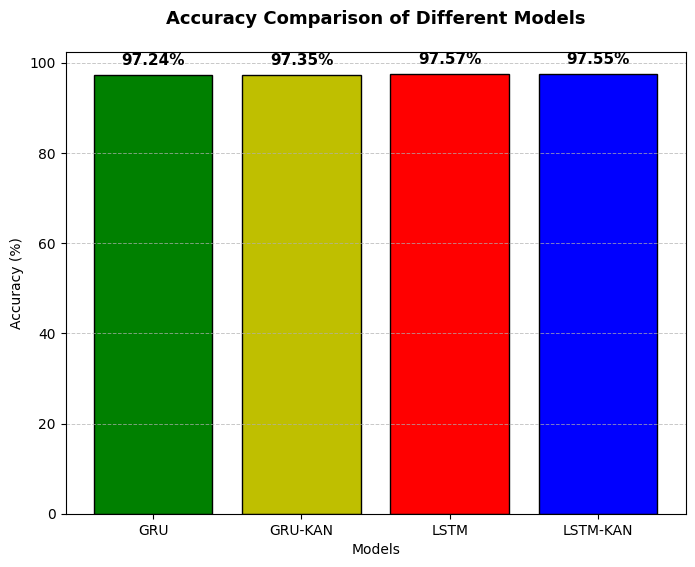

In [ ]:
import matplotlib.pyplot as plt


# Data for plotting (replace with your actual data)
models = ['GRU', 'GRU-KAN', 'LSTM', 'LSTM-KAN']
accuracies = [gru_accuracy, gru_kan_accuracy, lstm_accuracy, lstm_kan_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['g', 'y', 'r', 'b'], edgecolor='black', linewidth=1)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


# Set axis labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Different Models", fontsize=13, fontweight='bold', pad=20)

# # Add value labels on top of each bar
# for bar, accuracy in zip(bars, accuracies):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{accuracy:.2f}%", ha='center', va='bottom')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered alignment
        height + 1.5,  # Position slightly above the bar
        f"{height:.2f}%",  # Display accuracy percentage
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )


# Show the plot
plt.show()

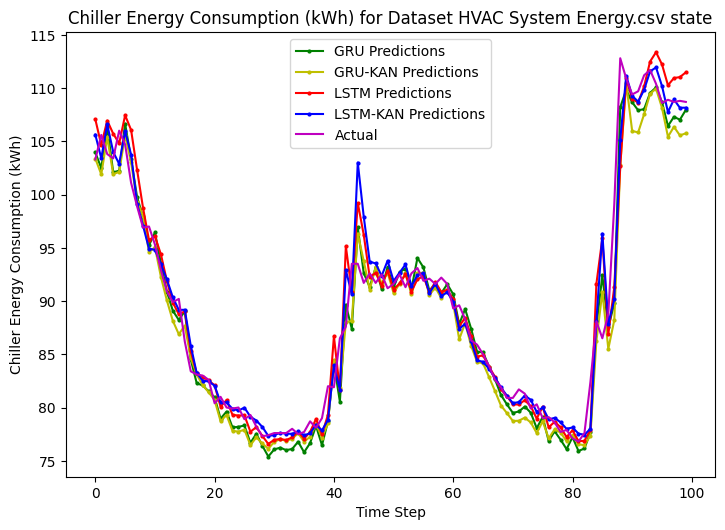

In [ ]:
import matplotlib.pyplot as plt

# Warna yang akan digunakan untuk plot
colors = ["g", "y", "r", "b", "m"]

plt.figure(figsize=(14, 10))

# Assuming all output lists (gru_outputs, gru_kan_outputs, etc.) have the same structure
num_states = len(states_list)  # Assuming states_list contains all desired states

# Loop through states and create subplots
for i in range(min(num_states, 4)):  # Limit to 4 subplots for now
    plt.subplot(2, 2, i + 1)

    # Access data for the current state (assuming it's the first element in the lists)
    gru_data = gru_outputs[0]  # Access data for the first (and only) state in the list
    gru_kan_data = gru_kan_outputs[0]
    lstm_data = lstm_outputs[0]
    lstm_kan_data = lstm_kan_outputs[0]
    target_data = targets[0]

    # Adjust data slicing based on subplot and data length
    if i == 0:
        data_slice = slice(-100, None)  # Last 100 data points
    elif i == 1:
        data_slice = slice(-50, None)  # Last 50 data points
    elif i == 2:
        data_slice = slice(None, 50)  # First 50 data points
    else:
        data_slice = slice(None, 100)  # First 100 data points

    plt.plot(gru_data[data_slice], "-o", color=colors[0], label="GRU Predictions", markersize=2)
    plt.plot(gru_kan_data[data_slice], "-o", color=colors[1], label="GRU-KAN Predictions", markersize=2)
    plt.plot(lstm_data[data_slice], "-o", color=colors[2], label="LSTM Predictions", markersize=2)
    plt.plot(lstm_kan_data[data_slice], "-o", color=colors[3], label="LSTM-KAN Predictions", markersize=2)
    plt.plot(target_data[data_slice], color=colors[4], label="Actual")

    plt.ylabel("Chiller Energy Consumption (kWh)")
    plt.xlabel("Time Step")
    plt.title(f"Chiller Energy Consumption (kWh) for {states_list[i]} state")  # Use state from states_list
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # visualisasi

# import matplotlib.pyplot as plt


# # Number of states to plot
# num_states_to_plot = min(len(states_list), 4)  # Limit to 4 for better visualization

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=num_states_to_plot, ncols=1, figsize=(10, 5 * num_states_to_plot))

# # Loop through the states and create individual plots
# for i, state in enumerate(states_list[:num_states_to_plot]):
#     ax = axes[i] if num_states_to_plot > 1 else axes

#     # Extract data for the current state
#     gru_data = gru_outputs[i]
#     gru_kan_data = gru_kan_outputs[i]
#     lstm_data = lstm_outputs[i]
#     lstm_kan_data = lstm_kan_outputs[i]
#     target_data = targets[i]

#     # Plot data
#     ax.plot(gru_data, label="GRU", marker='o', markersize=2, linewidth=1)
#     ax.plot(gru_kan_data, label="GRU-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_data, label="LSTM", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_kan_data, label="LSTM-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(target_data, label="Actual", linewidth=1.5)

#     # Set labels and title
#     plt.xlabel('Time Step')
#     ax.set_ylabel("Chiller Energy Consumption (kWh)")
#     ax.set_title(f"State: {state}")
#     ax.legend()

# plt.tight_layout()
# plt.show()

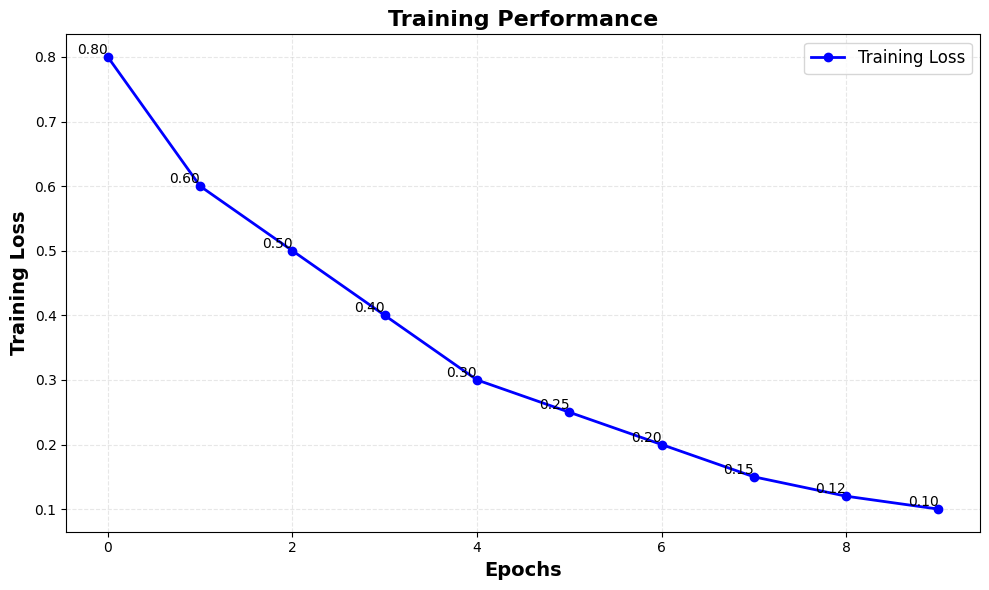

In [ ]:
import matplotlib.pyplot as plt

# Data contoh (ganti dengan data aktual dari proses pelatihan)
epochs = list(range(10))  # Epochs (0-9)
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]  # Training Loss per epoch

# Warna dan format garis
colors = ["g", "b", "r", "y", "m"]

# Membuat plot utama
plt.figure(figsize=(10, 6))

# Menambahkan plot training loss
plt.plot(
    epochs,
    training_loss,
    "-o",
    color=colors[1],
    label="Training Loss",
    markersize=6,
    linewidth=2
)

# Menambahkan detail pada grafik
plt.title("Training Performance", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Training Loss", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Anotasi nilai loss pada setiap titik
for epoch, loss in zip(epochs, training_loss):
    plt.text(epoch, loss, f"{loss:.2f}", fontsize=10, ha='right', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()


# Percobaan ke 12

In [ ]:
# Mengimpor modul untuk mengakses operasi sistem seperti mengelola file dan waktu.
import os
import time

# Mengimpor pustaka NumPy untuk komputasi numerik yang efisien.
import numpy as np

# Mengimpor pustaka Pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data, khususnya plot 2D.
import matplotlib.pyplot as plt

# Mengimpor pustaka PyTorch untuk pembuatan model deep learning.
import torch
import torch.nn as nn  # Modul PyTorch untuk membuat lapisan jaringan saraf.
from torch.utils.data import TensorDataset, DataLoader  # Modul untuk mengelola dataset dan batch data.
import torch.nn.functional as F  # Fungsi aktivasi dan fungsi lainnya yang umum digunakan pada jaringan saraf.

# Mengimpor modul untuk operasi matematika umum.
import math

# Mengimpor fungsi tqdm_notebook untuk menampilkan progress bar di Jupyter Notebook.
from tqdm.notebook import tqdm as tqdm_notebook

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi data.
from sklearn.preprocessing import MinMaxScaler

# Mengimpor modul random
import random


# Tambahkan fungsi `set_seed` untuk konsistensi hasil
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

# Tetapkan seed sebelum melanjutkan
set_seed(42)

In [ ]:
# Opsional proses ini bisa diskip

print(torch.__version__)  # Mencetak versi PyTorch yang digunakan.

2.5.1+cu121


In [ ]:
# Menentukan jalur direktori tempat file data berada.
data_dir = "/content/drive/MyDrive/Tesis/Dataset HVAC"  # Path ke direktori data di Google Colab atau lokal.

# Membaca file CSV yang berisi dataset ke dalam DataFrame menggunakan Pandas.
df = pd.read_csv("/content/drive/MyDrive/Tesis/Dataset HVAC/Dataset HVAC System Energy.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data.
df.head()


Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Building Load (RT)  Outside Temperature (F)  Dew Point (F)  Humidity (%)  
0               479.6                       82             75            79  
1               460.3                       82             75            79  
2               462.4                       82             75            79  
3               458.5                       82             75            79  
4               455.4                       82             75            79

In [ ]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index):
    """
    Fungsi untuk membentuk input dan label dengan jendela geser pada data time series.

    Parameters:
    - data: array numpy yang berisi data.
    - window_size: ukuran jendela (jumlah timestamp dalam setiap input).
    - inputs_cols_indices: indeks kolom yang ingin dimasukkan sebagai fitur input.
    - label_col_index: indeks kolom yang digunakan sebagai label output.

    Returns:
    - inputs: array numpy yang berisi input sequences berdasarkan jendela geser.
    - labels: array numpy yang berisi label untuk setiap sequence.
    """

    # Membuat array kosong untuk menyimpan input sequences dan label.
    # `inputs` akan memiliki dimensi (jumlah_instance, panjang_jendela, jumlah_fitur)
    inputs = np.zeros((len(data) - window_size, window_size, len(inputs_cols_indices)))
    # `labels` adalah array 1D yang akan menampung label untuk setiap sequence.
    labels = np.zeros(len(data) - window_size)

    # Iterasi melalui data untuk membentuk sequence input dan label
    for i in range(window_size, len(data)):
        # Mengambil data dalam jendela dan menambahkannya ke `inputs`
        inputs[i - window_size] = data[i - window_size : i, inputs_cols_indices]
        # Menetapkan nilai label dari kolom yang diinginkan
        labels[i - window_size] = data[i, label_col_index]

    # Mereshape `inputs` dan `labels` ke bentuk yang sesuai untuk model
    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)

    # Menampilkan bentuk (shape) dari `inputs` dan `labels` untuk verifikasi
    print(inputs.shape, labels.shape)

    return inputs, labels


In [ ]:
# Menetapkan indeks kolom label sebagai 0, yaitu kolom 'consumption' yang akan diprediksi.
label_col_index = 0  # Menggunakan 'consumption' sebagai label target.

# Menetapkan indeks kolom yang akan digunakan sebagai fitur input.
# Fitur yang dipilih adalah (consumption, hour, dayofweek, month, dayofyear).
inputs_cols_indices = range(5)  # Menggunakan kolom-kolom fitur dari indeks 0 hingga 4.

# Menetapkan ukuran jendela (window size) untuk mengatur panjang setiap sequence.
window_size = 90  # Panjang urutan yang akan dimasukkan sebagai input dalam model.

# Membuat dictionary untuk menyimpan objek scaler yang akan digunakan pada data label.
# Ini memungkinkan kita untuk melakukan normalisasi pada data pelatihan, dan nantinya mengembalikan data
# hasil prediksi dari model ke skala aslinya pada tahap evaluasi.
label_scalers = {}

# Inisialisasi list kosong untuk menampung data input pelatihan.
train_x = []

# Inisialisasi dictionary kosong untuk menampung data input dan label pengujian.
# Dictionary `test_x` akan menyimpan input pengujian, dan `test_y` untuk label pengujian.
test_x = {}
test_y = {}


In [ ]:
# Memilih file .csv dari direktori data dan menyimpannya ke dalam `processing_files`.
processing_files = [
    file for file in os.listdir(data_dir) if os.path.splitext(file)[1] == ".csv"
]

# Menentukan jumlah file yang akan digunakan untuk dataset
num_files_for_dataset = 5

# Memproses setiap file dalam daftar `processing_files` hingga jumlah yang ditentukan
for file in tqdm_notebook(processing_files[:num_files_for_dataset]):
    print(f"Processing {file} ...")

    # Membaca file .csv ke dalam DataFrame Pandas dan mengonversi kolom 'Tanggal' menjadi tipe tanggal
    df = pd.read_csv(os.path.join(data_dir, file), parse_dates=["Local Time (Timezone : GMT+8h)"])

    # Preprocessing
    # df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')  # Mengonversi kolom tanggal ke format datetime
    # df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year  # Menambahkan kolom 'Year' berdasarkan kolom 'Tanggal'
    # df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month  # Menambahkan kolom 'Month' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day  # Menambahkan kolom 'Day' berdasarkan kolom 'Local Time (Timezone : GMT+8h)'
    # df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    df['Year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
    df['Month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
    df['Day'] = df['Local Time (Timezone : GMT+8h)'].dt.day
    df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour
    df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
    df = df.drop(columns=['Local Time (Timezone : GMT+8h)'])  # Menghapus kolom 'Local Time (Timezone : GMT+8h)' setelah mengambil informasinya

    # Normalisasi data input
    sc = MinMaxScaler()  # Inisialisasi scaler untuk input
    label_sc = MinMaxScaler()  # Inisialisasi scaler untuk label
    data = sc.fit_transform(df.values)  # Normalisasi data menggunakan MinMaxScaler

    # Menyimpan scaler untuk label agar bisa digunakan untuk mengembalikan nilai prediksi ke skala asli saat evaluasi
    label_sc.fit(df.iloc[:, label_col_index].values.reshape(-1, 1))
    label_scalers[file] = label_sc  # Menyimpan scaler label dalam dictionary

    # Membuat urutan input dan label menggunakan fungsi move_sliding_window
    inputs, labels = move_sliding_window(
        data,
        window_size,
        inputs_cols_indices=inputs_cols_indices,
        label_col_index=label_col_index,
    )

    # Menggabungkan instance yang dihasilkan dari semua file .csv.
    # Membagi data menjadi bagian pelatihan dan pengujian, lalu menggabungkannya ke dalam array tunggal.
    test_portion = int(0.1 * len(inputs))  # Menentukan bagian data untuk pengujian (10%)
    if len(train_x) == 0:  # Jika ini iterasi pertama
        train_x = inputs[:-test_portion]  # Menyimpan data pelatihan input
        train_y = labels[:-test_portion]  # Menyimpan data pelatihan label
    else:
        # Menggabungkan data pelatihan dari file saat ini dengan data pelatihan sebelumnya
        train_x = np.concatenate((train_x, inputs[:-test_portion]))
        train_y = np.concatenate((train_y, labels[:-test_portion]))

    # Menyimpan data pengujian untuk setiap file dalam dictionary `test_x` dan `test_y`
    test_x[file] = inputs[-test_portion:]
    test_y[file] = labels[-test_portion:]


  0%|          | 0/1 [00:00<?, ?it/s]

Processing Dataset HVAC System Energy.csv ...
(13525, 90, 5) (13525, 1)


In [ ]:
df

Chilled Water Rate (L/sec)  Building Load (RT)  \
0                            85.6               479.6   
1                            84.3               460.3   
2                            84.6               462.4   
3                            84.8               458.5   
4                            84.7               455.4   
...                           ...                 ...   
13610                       108.6               579.9   
13611                       108.9               567.3   
13612                       108.7               561.7   
13613                       108.8               566.0   
13614                       108.7               569.7   

       Outside Temperature (F)  Dew Point (F)  Humidity (%)  Year  Month  Day  \
0                           82             75            79  2019      8   18   
1                           82             75            79  2019      8   18   
2                           82             75            79  2019      8   18   
3                           82             75            79  2019      8   18   
4                           82             75            79  2019      8   18   
...                        ...            ...           ...   ...    ...  ...   
13610                       84             75            74  2020      6    1   
13611                       84             75            74  2020      6    1   
13612                       82             75            79  2020      6    1   
13613                       82             77            84  2020      6    1   
13614                       82             75            79  2020      6    1   

       Hour  DayOfWeek  
0         0          6  
1         0          6  
2         1          6  
3         1          6  
4         2          6  
...     ...        ...  
13610    11          0  
13611    11          0  
13612    12          0  
13613    12          0  
13614    13          0  

[13615 rows x 10 columns]

In [ ]:
# Memeriksa bentuk (shape) dari data pelatihan dan data pengujian.
# Menggunakan nama file "dataset_clean_baru.csv" sebagai kunci untuk test_x.
train_x.shape, test_x["Dataset HVAC System Energy.csv"].shape

((12173, 90, 5), (1352, 90, 5))

In [ ]:
# Menetapkan ukuran batch untuk pemrosesan dalam model.
batch_size = 100

# Membuat TensorDataset dari data pelatihan, mengonversi `train_x` dan `train_y` menjadi tensor PyTorch.
# `train_x` berisi fitur-fitur input, dan `train_y` berisi label target.
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# Membuat DataLoader untuk memuat data secara batch dengan parameter berikut:
# - `shuffle=True`: Mengacak urutan data di setiap epoch untuk meningkatkan generalisasi model.
# - `batch_size=batch_size`: Mengatur ukuran batch menjadi 100.
# - `drop_last=True`: Mengabaikan batch terakhir jika ukurannya tidak sesuai dengan `batch_size`,
#   memastikan semua batch memiliki ukuran yang sama.
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=True
)


In [ ]:
# Mencetak ukuran data pelatihan, ukuran batch, dan jumlah iterasi per epoch.
print(
    f"Train Size: {train_x.shape}, Batch Size: {batch_size}, # of iterations per epoch: {int(train_x.shape[0] / batch_size)}"
)


Train Size: (12173, 90, 5), Batch Size: 100, # of iterations per epoch: 121


In [ ]:
# Membebaskan memori dengan menghapus variabel `train_x` dan `train_y`.
del train_x, train_y


In [ ]:
# Memeriksa ketersediaan GPU.
# Jika GPU tersedia, `torch.cuda.is_available()` akan mengembalikan True, jika tidak akan mengembalikan False.
is_cuda = torch.cuda.is_available()

# Menetapkan device yang akan digunakan untuk menjalankan model berdasarkan ketersediaan GPU.
if is_cuda:
    device = torch.device("cuda")  # Mengatur device ke GPU
    print("GPU is available")       # Mencetak pesan jika GPU tersedia
else:
    device = torch.device("cpu")    # Mengatur device ke CPU jika GPU tidak tersedia


In [ ]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        # Menyimpan parameter input dan output
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        # Membuat grid untuk basis fungsi B-spline
        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        # Membuat bobot untuk komponen linier dasar dan komponen spline
        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        # Mengatur parameter skala dan aktivasi untuk spline
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        # Menginisialisasi parameter
        self.reset_parameters()

    def reset_parameters(self):
        # Menginisialisasi bobot linier dasar dan bobot spline dengan kaiming_uniform
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 0.5) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        # Menghitung basis fungsi B-spline
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        # Menyelesaikan koefisien spline dari titik input
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        # Mengatur skala bobot spline
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        # Fungsi forward untuk lapisan KANLinear
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        # Memperbarui grid spline adaptif berdasarkan input x
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        # Menghitung kehilangan regulasi berdasarkan aktivasi dan entropi
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(GRUNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Mendefinisikan lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output GRU ke dimensi output yang diinginkan
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Melakukan forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output pada timestep terakhir dan meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output akhir dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

# 2. GRUNetKAN
# Mirip dengan GRUNet, tetapi menggantikan lapisan linier dengan KANLinear untuk menambah fleksibilitas.
class GRUNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(GRUNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan GRU dengan dropout
        self.gru = nn.GRU(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan GRU
        out, h = self.gru(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state terakhir

    def init_hidden(self, batch_size):
        # Inisialisasi hidden state dengan nol untuk setiap batch
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        )
        return hidden

class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(LSTMNet, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Lapisan linier untuk mengubah output dari LSTM ke dimensi output
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan lapisan linier
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

# LSTMNetKAN
# Mirip dengan LSTMNet, tetapi menggantikan lapisan linier dengan KANLinear untuk mengembangkan fleksibilitas dan kemampuan representasi.
class LSTMNetKAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.3):
        super(LSTMNetKAN, self).__init__()

        # Menyimpan parameter dimensi tersembunyi dan jumlah lapisan
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Lapisan LSTM dengan dropout
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob
        )

        # Menggunakan KANLinear sebagai lapisan linier yang fleksibel
        self.fc = KANLinear(hidden_dim, output_dim)

        # Fungsi aktivasi ReLU
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass melalui lapisan LSTM
        out, h = self.lstm(x, h)

        # Mengambil output timestep terakhir, lalu meneruskannya melalui ReLU dan KANLinear
        out = self.fc(self.relu(out[:, -1]))

        return out, h  # Mengembalikan output dan hidden state

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        # Inisialisasi hidden state (h_0) dan cell state (c_0) dengan nol
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden


In [ ]:
def train(
    train_loader,
    learn_rate,
    hidden_dim=100,
    n_layers=3,
    n_epochs=10,
    model_type="GRU",
    print_every=100,
):
    # Mengambil dimensi input dari train_loader
    input_dim = next(iter(train_loader))[0].shape[2]  # 5
    output_dim = 1  # Definisi dimensi output

    # Inisialisasi model sesuai jenisnya
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "GRUKAN":
        model = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    elif model_type == "LSTM":
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)  # Pindahkan model ke perangkat

    # Definisi loss function dan optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    # Memulai proses training
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []

    # Loop melalui jumlah epoch
    for epoch in range(1, n_epochs + 1):
        start_time = time.process_time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.0
        counter = 0

        # Iterasi melalui batch data
        for x, label in train_loader:
            counter += 1

            # Reset hidden state sesuai model yang digunakan
            if model_type == "GRU" or model_type == "GRUKAN":
                h = h.data
            elif model_type == "LSTM" or model_type == "LSTMKAN":
                h = tuple([e.data for e in h])

            model.zero_grad()  # Reset gradien

            # Forward pass
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())

            # Backpropagation dan optimisasi
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Menambahkan loss untuk perhitungan rata-rata
            if counter % print_every == 0:
                print(
                    f"Epoch {epoch} - Step: {counter}/{len(train_loader)} - Average Loss for Epoch: {avg_loss/counter}"
                )

        current_time = time.process_time()
        print(
            f"Epoch {epoch}/{n_epochs} Done, Total Loss: {avg_loss/len(train_loader)}"
        )
        print(f"Time Elapsed for Epoch: {current_time-start_time} seconds")
        epoch_times.append(current_time - start_time)

    # Menghitung total waktu pelatihan
    print(f"Total Training Time: {sum(epoch_times)} seconds")
    return model


In [ ]:
# Tetapkan seed
set_seed(42)

# Parameter pelatihan
seq_len = 90  # Panjang sequence atau jumlah timestamps
n_hidden = 100  # Ukuran hidden layer
n_layers = 3  # Jumlah lapisan RNN
n_epochs = 10  # Jumlah epoch
print_every = 100  # Frekuensi menampilkan loss
lr = 0.002  # Learning rate

# Memanggil fungsi train untuk melatih model GRU
gru_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch
    model_type="GRU",    # Tipe model (di sini menggunakan GRU)
    print_every=print_every # Frekuensi print loss selama pelatihan
)


Starting Training of GRU model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.013020259418990463
Epoch 1/10 Done, Total Loss: 0.012160719635950263
Time Elapsed for Epoch: 60.17042220400026 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.0070656393840909
Epoch 2/10 Done, Total Loss: 0.006986917745060295
Time Elapsed for Epoch: 50.07510473000002 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.0064273355854675175
Epoch 3/10 Done, Total Loss: 0.006348643646275332
Time Elapsed for Epoch: 45.913808491000054 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.005942894420586526
Epoch 4/10 Done, Total Loss: 0.005872033041909583
Time Elapsed for Epoch: 48.50239765000015 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.005533396634273231
Epoch 5/10 Done, Total Loss: 0.005478518172205726
Time Elapsed for Epoch: 45.227484154000194 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005251192080322653
Epoch 6/10 Done, Total Loss: 0.00520829480

In [ ]:
# Menyimpan parameter model yang sudah dilatih ke file
torch.save(gru_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRU12.pth')


In [ ]:
# melatih model dengan tipe GRUKAN
# Parameter seq_len (sequence length) untuk model, yaitu jumlah timestamps
seq_len = 90

# Memanggil fungsi train untuk melatih model GRUKAN
gru_kan_model = train(
    train_loader,        # DataLoader untuk data pelatihan
    learn_rate=lr,       # Learning rate untuk optimasi
    hidden_dim=n_hidden, # Dimensi hidden layer
    n_layers=n_layers,   # Jumlah lapisan RNN
    n_epochs=n_epochs,   # Jumlah epoch untuk pelatihan
    model_type="GRUKAN", # Tipe model (di sini menggunakan GRUKAN)
    print_every=print_every # Frekuensi menampilkan loss selama pelatihan
)


Starting Training of GRUKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.019234101749025286
Epoch 1/10 Done, Total Loss: 0.017255655586072977
Time Elapsed for Epoch: 61.827869331999864 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.007540672163013368
Epoch 2/10 Done, Total Loss: 0.007457896607181381
Time Elapsed for Epoch: 62.392710093999995 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006575948742683977
Epoch 3/10 Done, Total Loss: 0.006483233483769923
Time Elapsed for Epoch: 46.45536815600008 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006319362118374556
Epoch 4/10 Done, Total Loss: 0.006306500127923883
Time Elapsed for Epoch: 46.37538861499979 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.006002017410937696
Epoch 5/10 Done, Total Loss: 0.005841167116429934
Time Elapsed for Epoch: 47.30170325100016 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.005481564609799534
Epoch 6/10 Done, Total Loss: 0.0053796

In [ ]:
# Menyimpan parameter model GRUKAN yang telah dilatih ke dalam file
torch.save(gru_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_GRUkan12.pth')


In [ ]:
lstm_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTM",
    print_every=print_every,
)

Starting Training of LSTM model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.03169531827792525
Epoch 1/10 Done, Total Loss: 0.027765390898047155
Time Elapsed for Epoch: 80.73101001099985 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.00867351493332535
Epoch 2/10 Done, Total Loss: 0.008475472284711835
Time Elapsed for Epoch: 82.0791942410001 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.007271308454219252
Epoch 3/10 Done, Total Loss: 0.007235882890387631
Time Elapsed for Epoch: 65.84653920000028 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006713861089665442
Epoch 4/10 Done, Total Loss: 0.006478128077323772
Time Elapsed for Epoch: 63.15740791200005 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.006553195347078144
Epoch 5/10 Done, Total Loss: 0.006445821388124311
Time Elapsed for Epoch: 62.57218221700032 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.0060128861991688605
Epoch 6/10 Done, Total Loss: 0.0059952190980

In [ ]:
torch.save(lstm_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm12.pth')

In [ ]:
lstm_kan_model = train(
    train_loader,
    learn_rate=lr,
    hidden_dim=n_hidden,
    n_layers=n_layers,
    n_epochs=n_epochs,
    model_type="LSTMKAN",
    print_every=print_every,
)

Starting Training of LSTMKAN model
Epoch 1 - Step: 100/121 - Average Loss for Epoch: 0.024697617697529494
Epoch 1/10 Done, Total Loss: 0.02230932062861225
Time Elapsed for Epoch: 83.00899456999923 seconds
Epoch 2 - Step: 100/121 - Average Loss for Epoch: 0.008038468398153783
Epoch 2/10 Done, Total Loss: 0.00803264016516445
Time Elapsed for Epoch: 83.16766874800032 seconds
Epoch 3 - Step: 100/121 - Average Loss for Epoch: 0.006855794785078615
Epoch 3/10 Done, Total Loss: 0.006818707641752914
Time Elapsed for Epoch: 65.94473002300037 seconds
Epoch 4 - Step: 100/121 - Average Loss for Epoch: 0.006495776048395783
Epoch 4/10 Done, Total Loss: 0.006416713337852689
Time Elapsed for Epoch: 65.58035581700005 seconds
Epoch 5 - Step: 100/121 - Average Loss for Epoch: 0.0061907590483315286
Epoch 5/10 Done, Total Loss: 0.006224487061527642
Time Elapsed for Epoch: 62.754641106000236 seconds
Epoch 6 - Step: 100/121 - Average Loss for Epoch: 0.006238332916982472
Epoch 6/10 Done, Total Loss: 0.00609944

In [ ]:
torch.save(lstm_kan_model.state_dict(), '/content/drive/MyDrive/Tesis/model/model_lstm_kan12.pth')

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# move device to cpu for evaluation to avoid GPU memory run
device = "cpu"

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
gru_model2 = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU12.pth"))

<ipython-input-110-669674dae70c>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRU12.pth")

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_model.to(device)

GRUNet(
  (gru): GRU(5, 100, num_layers=3, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
gru_kan_model2 = GRUNetKAN(input_dim, hidden_dim, output_dim, n_layers)
gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan12.pth"))

<ipython-input-112-9c6dff0d2d2c>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gru_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_GRUkan1

<All keys matched successfully>

In [ ]:
device = "cpu"
gru_kan_model2.to(device)

GRUNetKAN(
  (gru): GRU(5, 100, num_layers=3, batch_first=True, dropout=0.3)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
lstm_model2 = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm12.pth"))

<ipython-input-114-e18b7960bf65>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm12.pth

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_model2.to(device)

LSTMNet(
  (lstm): LSTM(5, 100, num_layers=3, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
hidden_dim = 100
input_dim = 5
output_dim = 1
n_layers = 3
lstm_kan_model2 = LSTMNetKAN(input_dim, hidden_dim, output_dim, n_layers)
lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_kan12.pth"))

<ipython-input-116-914c58124a8f>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_kan_model2.load_state_dict(torch.load("/content/drive/MyDrive/Tesis/model/model_lstm_k

<All keys matched successfully>

In [ ]:
device = "cpu"
lstm_kan_model2.to(device)

LSTMNetKAN(
  (lstm): LSTM(5, 100, num_layers=3, batch_first=True, dropout=0.3)
  (fc): KANLinear(
    (base_activation): SiLU()
  )
  (relu): ReLU()
)

In [ ]:
def sMAPE(outputs, targets):
    sMAPE = (
        100
        / len(targets)
        * np.sum(np.abs(outputs - targets) / (np.abs(outputs + targets)) / 2)
    )
    return sMAPE

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate(model, test_x, test_y, label_scalers):
    model.to(device)
    outputs = []
    targets = []
    start_time = time.process_time()
    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    print(f"Evaluation Time: {time.process_time()-start_time}")
    print(f"sMAPE: {round(sMAPE(concatenated_outputs, concatenated_targets), 3)}%")

    # list of of targets/outputs for each state
    return outputs, targets, sMAPE

In [ ]:
# Evaluate Performance GRU with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    # Move the model to the device before the loop
    model.to(device)
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

Evaluation Time: 2.4594717670006503
MAE: 2.558
RMSE: 4.408
R²: 0.798


In [ ]:
# ipython-input-196-53ac28a8cb99
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)

# Since you want to calculate sMAPE for the GRU model, you can call the sMAPE function separately:
gru_sMAPE = sMAPE(np.concatenate(gru_outputs), np.concatenate(targets))
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 2.209042610999859
MAE: 2.558
RMSE: 4.408
R²: 0.798
GRU sMAPE: 0.661%


In [ ]:
#Evaluate Performance GRUKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value
gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"GRU sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 2.2600468480004565
MAE: 2.558
RMSE: 4.408
R²: 0.798
GRU sMAPE: 0.661%


In [ ]:
# Evaluate Performance LSTM with RMSE, MAE, R²

import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2
    mae_value = mae(concatenated_outputs, concatenated_targets)
    rmse_value = rmse(concatenated_outputs, concatenated_targets)
    r2_value = r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTM sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 2.2486263660002805
MAE: 2.558
RMSE: 4.408
R²: 0.798
LSTM sMAPE: 0.661%


In [ ]:
# Evaluate Performance LSTMKAN with RMSE, MAE, R²
import numpy as np
import torch
import time

# Definisikan metrik MAE, RMSE, dan R² secara manual
def calculate_mae(outputs, targets): # Renamed to avoid conflict
    return np.mean(np.abs(outputs - targets))

def calculate_rmse(outputs, targets): # Renamed to avoid conflict
    return np.sqrt(np.mean((outputs - targets) ** 2))

def calculate_r2(outputs, targets): # Renamed to avoid conflict
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

# Definisikan metrik MAE, RMSE, dan R² secara manual
def mae(outputs, targets):
    return np.mean(np.abs(outputs - targets))

def rmse(outputs, targets):
    return np.sqrt(np.mean((outputs - targets) ** 2))

def r2(outputs, targets):
    mean_target = np.mean(targets)
    ss_total = np.sum((targets - mean_target) ** 2)
    ss_residual = np.sum((targets - outputs) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate(model, test_x, test_y, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.process_time()

    # get data of test data for each state
    for file in test_x.keys():
        inputs = torch.from_numpy(np.array(test_x[file]))
        labels = torch.from_numpy(np.array(test_y[file]))

        h = model.init_hidden(inputs.shape[0])

        # predict outputs
        with torch.no_grad():
            out, h = model(inputs.to(device).float(), h)

        outputs.append(
            label_scalers[file]
            .inverse_transform(out.cpu().detach().numpy())
            .reshape(-1)
        )

        targets.append(
            label_scalers[file].inverse_transform(labels.numpy()).reshape(-1)
        )

    # Merge all files
    concatenated_outputs = np.concatenate(outputs)
    concatenated_targets = np.concatenate(targets)

    # Calculate MAE, RMSE, and R2 using the renamed functions
    mae_value = calculate_mae(concatenated_outputs, concatenated_targets)
    rmse_value = calculate_rmse(concatenated_outputs, concatenated_targets)
    r2_value = calculate_r2(concatenated_outputs, concatenated_targets)

    print(f"Evaluation Time: {time.process_time() - start_time}")
    print(f"MAE: {round(mae_value, 3)}")
    print(f"RMSE: {round(rmse_value, 3)}")
    print(f"R²: {round(r2_value, 3)}")

    # Return results
    return outputs, targets, mae_value, rmse_value, r2_value

gru_outputs, targets, mae_value, rmse_value, r2_value = evaluate(gru_model, test_x, test_y, label_scalers)
print(f"LSTMKAN sMAPE: {round(gru_sMAPE, 3)}%")

Evaluation Time: 2.1579562709994207
MAE: 2.558
RMSE: 4.408
R²: 0.798
LSTMKAN sMAPE: 0.661%


In [ ]:
states_list = list(test_x.keys())

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung akurasi dalam bentuk persentase
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Hitung MAPE
    accuracy = 100 - (mape * 100)  # Akurasi sebagai 100% - MAPE
    return accuracy

print("\nEksperimen 12")
# Evaluate GRU model
print("\nEvaluate Model GRU:")
gru_outputs, gru_targets, _, _, _ = evaluate(gru_model, test_x, test_y, label_scalers)
gru_accuracy = calculate_accuracy(gru_targets, gru_outputs)
print(f"GRU Accuracy: {gru_accuracy:.2f}%")

# Evaluate GRU-KAN model
print("\nEvaluate Model GRU-KAN:")
gru_kan_outputs, gru_kan_targets, _, _, _ = evaluate(gru_kan_model, test_x, test_y, label_scalers)
gru_kan_accuracy = calculate_accuracy(gru_kan_targets, gru_kan_outputs)
print(f"GRU-KAN Accuracy: {gru_kan_accuracy:.2f}%")

# Evaluate LSTM model
print("\nEvaluate Model LSTM:")
lstm_outputs, lstm_targets, _, _, _ = evaluate(lstm_model, test_x, test_y, label_scalers)
lstm_accuracy = calculate_accuracy(lstm_targets, lstm_outputs)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Evaluate LSTM-KAN model
print("\nEvaluate Model LSTM-KAN:")
lstm_kan_outputs, lstm_kan_targets, _, _, _ = evaluate(lstm_kan_model, test_x, test_y, label_scalers)
lstm_kan_accuracy = calculate_accuracy(lstm_kan_targets, lstm_kan_outputs)
print(f"LSTM-KAN Accuracy: {lstm_kan_accuracy:.2f}%")



Eksperimen 12

Evaluate Model GRU:
Evaluation Time: 2.2221516830004475
MAE: 2.558
RMSE: 4.408
R²: 0.798
GRU Accuracy: 97.32%

Evaluate Model GRU-KAN:
Evaluation Time: 2.23099650200038
MAE: 2.286
RMSE: 4.244
R²: 0.813
GRU-KAN Accuracy: 97.63%

Evaluate Model LSTM:
Evaluation Time: 3.1853212949999943
MAE: 2.512
RMSE: 4.436
R²: 0.795
LSTM Accuracy: 97.38%

Evaluate Model LSTM-KAN:
Evaluation Time: 3.2647618499995588
MAE: 2.574
RMSE: 4.394
R²: 0.799
LSTM-KAN Accuracy: 97.35%


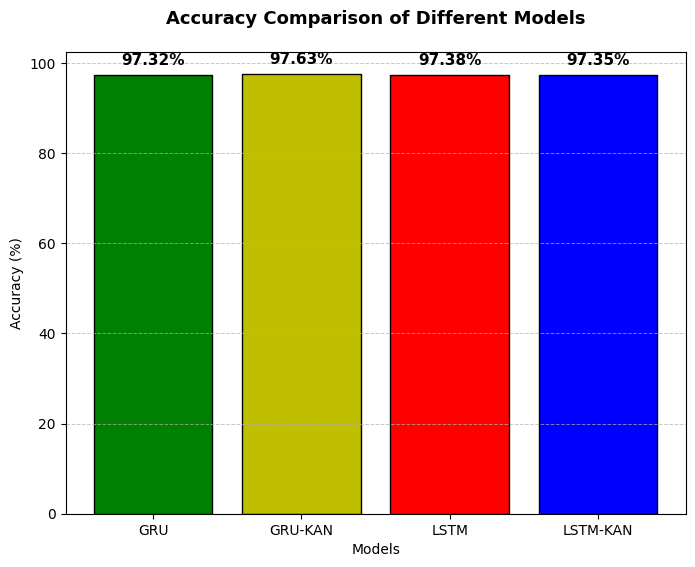

In [ ]:
import matplotlib.pyplot as plt


# Data for plotting (replace with your actual data)
models = ['GRU', 'GRU-KAN', 'LSTM', 'LSTM-KAN']
accuracies = [gru_accuracy, gru_kan_accuracy, lstm_accuracy, lstm_kan_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['g', 'y', 'r', 'b'], edgecolor='black', linewidth=1)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


# Set axis labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Different Models", fontsize=13, fontweight='bold', pad=20)

# # Add value labels on top of each bar
# for bar, accuracy in zip(bars, accuracies):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{accuracy:.2f}%", ha='center', va='bottom')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Centered alignment
        height + 1.5,  # Position slightly above the bar
        f"{height:.2f}%",  # Display accuracy percentage
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )


# Show the plot
plt.show()

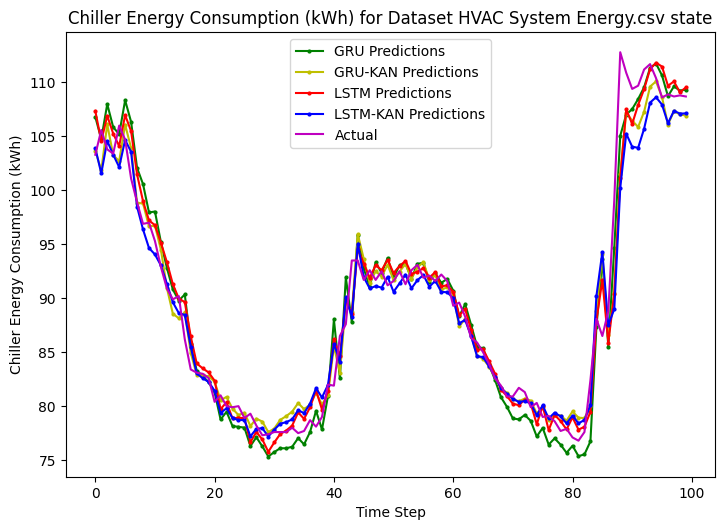

In [ ]:
import matplotlib.pyplot as plt

# Warna yang akan digunakan untuk plot
colors = ["g", "y", "r", "b", "m"]

plt.figure(figsize=(14, 10))

# Assuming all output lists (gru_outputs, gru_kan_outputs, etc.) have the same structure
num_states = len(states_list)  # Assuming states_list contains all desired states

# Loop through states and create subplots
for i in range(min(num_states, 4)):  # Limit to 4 subplots for now
    plt.subplot(2, 2, i + 1)

    # Access data for the current state (assuming it's the first element in the lists)
    gru_data = gru_outputs[0]  # Access data for the first (and only) state in the list
    gru_kan_data = gru_kan_outputs[0]
    lstm_data = lstm_outputs[0]
    lstm_kan_data = lstm_kan_outputs[0]
    target_data = targets[0]

    # Adjust data slicing based on subplot and data length
    if i == 0:
        data_slice = slice(-100, None)  # Last 100 data points
    elif i == 1:
        data_slice = slice(-50, None)  # Last 50 data points
    elif i == 2:
        data_slice = slice(None, 50)  # First 50 data points
    else:
        data_slice = slice(None, 100)  # First 100 data points

    plt.plot(gru_data[data_slice], "-o", color=colors[0], label="GRU Predictions", markersize=2)
    plt.plot(gru_kan_data[data_slice], "-o", color=colors[1], label="GRU-KAN Predictions", markersize=2)
    plt.plot(lstm_data[data_slice], "-o", color=colors[2], label="LSTM Predictions", markersize=2)
    plt.plot(lstm_kan_data[data_slice], "-o", color=colors[3], label="LSTM-KAN Predictions", markersize=2)
    plt.plot(target_data[data_slice], color=colors[4], label="Actual")

    plt.ylabel("Chiller Energy Consumption (kWh)")
    plt.xlabel("Time Step")
    plt.title(f"Chiller Energy Consumption (kWh) for {states_list[i]} state")  # Use state from states_list
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # visualisasi

# import matplotlib.pyplot as plt


# # Number of states to plot
# num_states_to_plot = min(len(states_list), 4)  # Limit to 4 for better visualization

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=num_states_to_plot, ncols=1, figsize=(10, 5 * num_states_to_plot))

# # Loop through the states and create individual plots
# for i, state in enumerate(states_list[:num_states_to_plot]):
#     ax = axes[i] if num_states_to_plot > 1 else axes

#     # Extract data for the current state
#     gru_data = gru_outputs[i]
#     gru_kan_data = gru_kan_outputs[i]
#     lstm_data = lstm_outputs[i]
#     lstm_kan_data = lstm_kan_outputs[i]
#     target_data = targets[i]

#     # Plot data
#     ax.plot(gru_data, label="GRU", marker='o', markersize=2, linewidth=1)
#     ax.plot(gru_kan_data, label="GRU-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_data, label="LSTM", marker='o', markersize=2, linewidth=1)
#     ax.plot(lstm_kan_data, label="LSTM-KAN", marker='o', markersize=2, linewidth=1)
#     ax.plot(target_data, label="Actual", linewidth=1.5)

#     # Set labels and title
#     plt.xlabel('Time Step')
#     ax.set_ylabel("Chiller Energy Consumption (kWh)")
#     ax.set_title(f"State: {state}")
#     ax.legend()

# plt.tight_layout()
# plt.show()

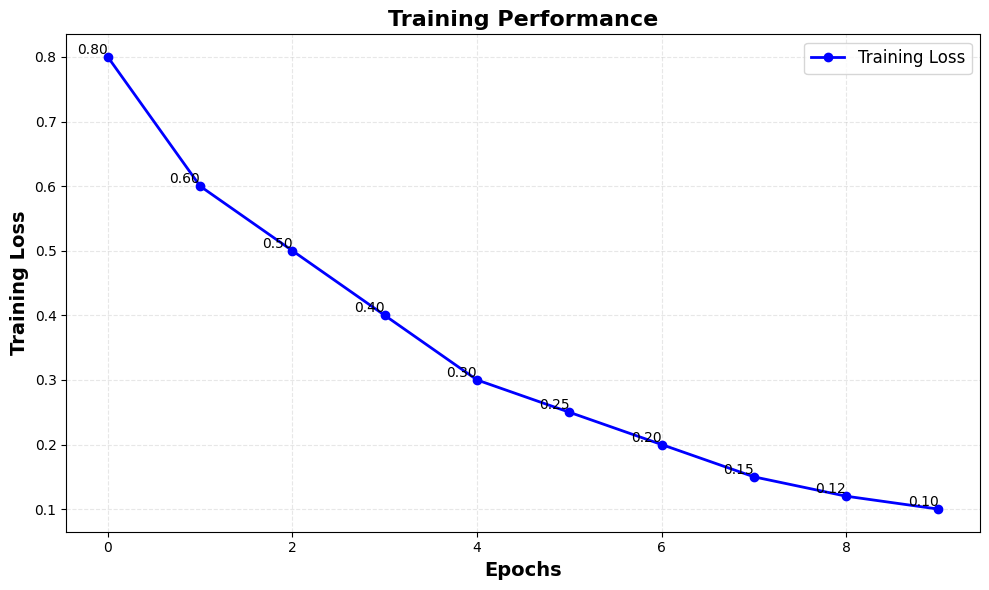

In [ ]:
import matplotlib.pyplot as plt

# Data contoh (ganti dengan data aktual dari proses pelatihan)
epochs = list(range(10))  # Epochs (0-9)
training_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]  # Training Loss per epoch

# Warna dan format garis
colors = ["g", "b", "r", "y", "m"]

# Membuat plot utama
plt.figure(figsize=(10, 6))

# Menambahkan plot training loss
plt.plot(
    epochs,
    training_loss,
    "-o",
    color=colors[1],
    label="Training Loss",
    markersize=6,
    linewidth=2
)

# Menambahkan detail pada grafik
plt.title("Training Performance", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14, fontweight='bold')
plt.ylabel("Training Loss", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Anotasi nilai loss pada setiap titik
for epoch, loss in zip(epochs, training_loss):
    plt.text(epoch, loss, f"{loss:.2f}", fontsize=10, ha='right', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()
